In [5]:
#### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images1/Feature_correlation_mutual.png
/kaggle/input/images1/Feature_correlation_diabete.png
/kaggle/input/datasetkaggle/additional_data_BRFSS2013_2015.csv
/kaggle/input/datasetkaggle/train.csv
/kaggle/input/datasetkaggle/test.csv
/kaggle/input/datasetkaggle/labels.csv


<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [Data](#0)
* [What Problem We Have and Which Metric to Use?](#1)

* [Exploratory Data Analysis](#2)
    * [Target Variable](#3)
    * [Categorical Features and Numerical feature analysis](#4)
    * [Overall Insights](#5)
      
      
* [How Famous Trio (Logistic Regression & XGBoost & Random Forest) Deal With Imbalanced Data?](#7) 

* [XGBOOST](#12)    
    * [XGBoost (with default Parameters) Deals With Imbalanced Data](#13)    
    * [XGBoost (with adjusted Scale_Pos_Weight) Deals With Imbalanced Data](#14)
    * [XGBoost (with adjusted Scale_Pos_Weight = 5) Deals With Imbalanced Data](#15)


* [XGBOOST](#12)    
    * [XGBoost (with default Parameters) Deals With Imbalanced Data](#13)    
    * [XGBoost (with adjusted Scale_Pos_Weight) Deals With Imbalanced Data](#14)
    * [XGBoost (with adjusted Scale_Pos_Weight = 5) Deals With Imbalanced Data](#15)


* [XGBOOST](#12)    
    * [XGBoost (with default Parameters) Deals With Imbalanced Data](#13)    
    * [XGBoost (with adjusted Scale_Pos_Weight) Deals With Imbalanced Data](#14)
    * [XGBoost (with adjusted Scale_Pos_Weight = 5) Deals With Imbalanced Data](#15)
 
* [Final Result Table and Model Comparison](#20)

* [Conclusion](#21)




# 1.Data

### **Data Dictionary**

#### **Categorical Features**

1. **`BMI_Category`**: Indicates the category of Body Mass Index (BMI) the individual falls into.  
   Categories: `['Normal weight', 'Obese', 'Overweight', 'Underweight']`

2. **`Age_Group`**: The age group of the individual.  
   Categories: `['Young']`

3. **`Education_Level`**: The highest level of education attained by the individual.  
   Categories: `['Some College', 'High School Graduate', 'No High School']`

4. **`Income_Group`**: The income group of the individual.  
   Categories: `['High Income', 'Middle Income', 'Low Income']`

#### **Numerical Features**

1. **`HighBP`**: Diagnosed with high blood pressure.  
   Values: `0 (No)`, `1 (Yes)`

2. **`HighChol`**: Diagnosed with high cholesterol.  
   Values: `0 (No)`, `1 (Yes)`

3. **`CholCheck`**: Cholesterol checked in the last 5 years.  
   Values: `0 (No)`, `1 (Yes)`

4. **`BMI`**: Body Mass Index as a continuous numerical value.  
   Example values: `[20.69, 28.38, 24.63, ...]`

5. **`Smoker`**: Currently smokes.  
   Values: `0 (No)`, `1 (Yes)`

6. **`Stroke`**: Has ever had a stroke.  
   Values: `0 (No)`, `1 (Yes)`

7. **`HeartDiseaseorAttack`**: Diagnosed with heart disease or suffered a heart attack.  
   Values: `0 (No)`, `1 (Yes)`

8. **`PhysActivity`**: Engaged in physical activity in the last 30 days (excluding regular job).  
   Values: `0 (No)`, `1 (Yes)`

9. **`Fruits`**: Consumes fruits at least once per day.  
   Values: `0 (No)`, `1 (Yes)`

10. **`Veggies`**: Consumes vegetables at least once per day.  
    Values: `0 (No)`, `1 (Yes)`

11. **`HvyAlcoholConsump`**: Engages in heavy alcohol consumption.  
    Values: `0 (No)`, `1 (Yes)`

12. **`AnyHealthcare`**: Has access to any form of healthcare coverage.  
    Values: `0 (No)`, `1 (Yes)`

13. **`NoDocbcCost`**: Did not see a doctor due to cost.  
    Values: `0 (No)`, `1 (Yes)`

14. **`GenHlth`**: Self-reported general health status (ordinal).  
    Values: `[1 (Excellent), 2 (Very Good), 3 (Good), 4 (Fair), 5 (Poor)]`

15. **`MentHlth`**: Number of days mental health was not good in the past 30 days.  
    Example values: `[0.04, 0.20, 15.28, ...]`

16. **`PhysHlth`**: Number of days physical health was not good in the past 30 days.  
    Example values: `[0.58, -0.05, 5.07, ...]`

17. **`DiffWalk`**: Difficulty walking or climbing stairs.  
    Values: `0 (No)`, `1 (Yes)`

18. **`Sex`**: Biological sex of the individual.  
    Values: `0 (Female)`, `1 (Male)`

19. **`Age`**: Age of the individual (continuous).  
    Example values: `[11.73, 8.16, 4.73, ...]`

20. **`Education`**: Years of education completed.  
    Example values: `[6, 5, 4, 2, 3, 1]`

21. **`Income`**: Income level (ordinal).  
    Example values: `[8 (Highest), 7, 6, ..., 1 (Lowest)]`

22. **`Healthy_Diet`**: Follows a healthy diet.  
    Values: `0 (No)`, `1 (Yes)`

23. **`Mental_Health_Risk`**: Risk of poor mental health.  
    Values: `0 (No)`, `1 (Yes)`

24. **`Heart_Disease_Risk`**: Risk of developing heart disease.  
    Values: `[0 (None), 1 (Low), 2 (Moderate), 3 (High), 4 (Very High), 5 (Extreme)]`


# 2.What problem we have and Which metric to use ?

- Based on the data and its dictionary, we have a classification problem.
- We aim to classify the target variable, **'Diabetes_binary'**
- Our goal is to build a model that achieves the best possible classification performance on the target variable.
- As we will see later, the dataset is imbalanced, with class 1 (diabetic persons) being the minority class.
-  Therefore, the accuracy score is not the most suitable metric for this problem. A metric that provides more insight into both precision and recall will be more appropriate.
- For that reason, the Accuracy score is not the best suitable metric for this problem and a metric which can provide more information about the precision and the recall will be more suitable for our case.  
- Considering the nature of the problem, the **`F1 Score`**, which is the harmonic mean of precision and recall, is a more effective metric for evaluating the performance of our classification model(s) in this competition.


# 3.Exploratory Data Analysis

In [ ]:
pip install imbalanced-learn

-First, we must import all the libraries needed and initialize the seed=42

In [6]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer,f1_score, accuracy_score, auc, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score

from tqdm import tqdm
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, KMeansSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

import time
import pickle
import contextlib 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.DataConversionWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.exceptions import ConvergenceWarning
import logging
optuna.logging.set_verbosity(optuna.logging.WARNING)


seed=42 # To ensure reproducibility, we are using a fixed random state seed (random_state=42).



In [93]:
#We load the training data

df_x=pd.read_csv("/kaggle/input/datasetkaggle/train.csv")
df_y=pd.read_csv("/kaggle/input/datasetkaggle/labels.csv")
df_train=pd.concat([df_x,df_y["Diabetes_binary"]],axis=1)

# We are splitting our competition train dataset into two main subsets:
# (1) Mega Training Set: 85% of the data, which will be used for training and validating the model.
# (2) Internal Test Set: 15% of the data, reserved for the final evaluation of the selected model.
# Furthermore, the Mega Training Set (85%) will be further divided into:
# (1) Training Set: 85% of the Mega Training Set, used for training the model.
# (2) Validation Set: 15% of the Mega Training Set, used to validate the model during training.
# To ensure reproducibility, we are using a fixed random state seed (random_state=42).

# Splitting the dataset (Train/Test) -seed=42
df_x_mega_train_base, df_x_test_base, df_y_mega_train_base, df_y_test_base = train_test_split(df_x, df_y, test_size=0.15,random_state=seed,  shuffle=True, stratify=df_y['Diabetes_binary'])

# Splitting the train dataset (Train/Validation) -seed=42
df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base = train_test_split(df_x_mega_train_base, df_y_mega_train_base, test_size=0.15,random_state=seed,  shuffle=True, stratify=df_y_mega_train_base['Diabetes_binary'] )

#Concating the samples with the labels in one dataframe 
df_train_base=pd.concat([df_x_train_base,df_y_train_base.drop(columns=['Unnamed: 0'])],axis=1)
df_validation_base=pd.concat([df_x_validation_base,df_y_validation_base.drop(columns=['Unnamed: 0'])],axis=1)
df_test_base=pd.concat([df_x_test_base,df_y_test_base.drop(columns=['Unnamed: 0'])],axis=1)

## 3.1) Dataset Overview

In [4]:
# 1-Dataset Overview
def dataset_overview(df):
    """
    This function provides a detailed overview of the dataset, including its shape, 
    categorical and numerical feature names, missing values, and descriptive statistics.
    
    Parameters:
        df (pd.DataFrame): Input dataset.

    Returns:
        None: The function  prints:
              - Dataset shape
              - List of categorical and numerical features
              - First 10 rows of the dataset
              - Data types and missing values summary
              - Total missing values per feature
              - Statistical summary of the dataset
              - Number of unique values per feature
              - Number of duplicated samples
    """
    
    #print dataset shape
    print("\033[1;34mShape of the dataset:\033[0m", df.shape)
    
    #Extract the categorical and numberical features names and print them
    categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
    numerical_columns = df.iloc[:,1:].select_dtypes(include=["number"]).columns.tolist()
    print(f"There are {len(categorical_columns)} categorical features :{categorical_columns} \n")
    print(f"There are {len(numerical_columns)} numerical features :{numerical_columns} \n")
    
    #Show the first 10 rows of the dataframe
    print("\n\033[1;34mFirst 10 rows:\033[0m")
    display(df.head(10))
    
    #Show the dataframe data types and the missing values if any
    print("\n\033[1;34mData Types and Missing Values:\033[0m")
    print(df.info())

    # Show the number of missing values
    print("\n\033[1;34mThe Total Missing Values per Feature:\033[0m")
    print(df.isnull().sum())

    #Show a statistical summary of the dataset
    print("\n\033[1;34mDataSet Describtion and Statistical Summary:\033[0m")
    display(df.describe().T)
    
    # Nbre of Unique Values per Feature
    print("\n\033[1;34mNumber of Unique Values per Feature:\033[0m")
    display(df.nunique())

    # Check duplicate
    print("\n\033[1;34mNumber of Duplicated Samples is :\033[0m")
    display(df.duplicated().sum())

dataset_overview(df_x_train_base)

Shape of the dataset: (146626, 29)
There are 4 categorical features :['BMI_Category', 'Age_Group', 'Education_Level', 'Income_Group'] 

There are 24 numerical features :['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Healthy_Diet', 'Mental_Health_Risk', 'Heart_Disease_Risk'] 


First 10 rows:


Unnamed: 0  HighBP  HighChol  CholCheck        BMI  Smoker  Stroke  \
122723        2400       0         1          1  26.843220       0       0   
36489       194952       0         1          1  31.136851       1       0   
121491      144427       1         1          1  34.093554       1       0   
45202       107261       1         0          1  30.265929       0       0   
195570      243438       0         1          1  30.767599       1       0   
144740      216808       0         0          1  20.600226       0       0   
20138       123902       0         0          1  24.066011       0       0   
16860       123985       0         0          1  34.827073       1       0   
77203       166261       0         0          1  23.886999       0       0   
69813       237152       0         1          1  25.519859       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...        Age  Education  \
122723                     0             1       0  ...   7.065822        5.0   
36489                      1             1       0  ...   8.714244        5.0   
121491                     0             1       0  ...   7.115418        5.0   
45202                      0             1       1  ...   8.126856        6.0   
195570                     0             1       1  ...   8.943876        1.0   
144740                     0             0       0  ...   9.130042        4.0   
20138                      0             1       1  ...  11.038268        6.0   
16860                      0             0       0  ...   8.161838        3.0   
77203                      0             1       1  ...   8.161838        6.0   
69813                      0             1       0  ...   7.955140        5.0   

        Income   BMI_Category  Healthy_Diet  Mental_Health_Risk  \
122723     7.0     Overweight             0                   1   
36489      8.0          Obese             0                   1   
121491     8.0          Obese             0                   0   
45202      3.0          Obese             1                   0   
195570     6.0          Obese             1                   1   
144740     5.0  Normal weight             0                   0   
20138      2.0  Normal weight             1                   0   
16860      8.0          Obese             0                   0   
77203      8.0  Normal weight             1                   0   
69813      1.0     Overweight             0                   0   

        Heart_Disease_Risk  Age_Group       Education_Level   Income_Group  
122723                   1      Young          Some College  Middle Income  
36489                    3      Young          Some College    High Income  
121491                   3      Young          Some College    High Income  
45202                    1      Young          Some College     Low Income  
195570                   2      Young        No High School  Middle Income  
144740                   0      Young  High School Graduate  Middle Income  
20138                    0      Young          Some College     Low Income  
16860                    1      Young  High School Graduate    High Income  
77203                    0      Young          Some College    High Income  
69813                    2      Young          Some College     Low Income  

[10 rows x 29 columns]


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
Index: 146626 entries, 122723 to 160397
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            146626 non-null  int64  
 1   HighBP                146626 non-null  int64  
 2   HighChol              146626 non-null  int64  
 3   CholCheck             146626 non-null  int64  
 4   BMI                   146626 non-null  float64
 5   Smoker                146626 non-null  int64  
 6   Stroke                146626 non-null  int64  
 7   HeartDiseaseorAttack  146626 non-null  int64  
 8   PhysActivity          146626 non-null  int64  
 9   Fruits                146626 non-null  int64  
 10  Veggies               146626 non-null  int64  
 11  HvyAlcoholConsump     146626 non-null  int64  
 12  AnyHealthcare         146626 non-null  int64  
 13  NoDocbcCost           146626 non-null  int64  
 14  GenHlth             

count           mean           std        min  \
Unnamed: 0            146626.0  126710.230853  73261.550621   0.000000   
HighBP                146626.0       0.427960      0.494785   0.000000   
HighChol              146626.0       0.422558      0.493968   0.000000   
CholCheck             146626.0       0.962721      0.189444   0.000000   
BMI                   146626.0      28.359405      6.267154  11.665176   
Smoker                146626.0       0.441948      0.496620   0.000000   
Stroke                146626.0       0.040804      0.197838   0.000000   
HeartDiseaseorAttack  146626.0       0.094560      0.292608   0.000000   
PhysActivity          146626.0       0.756394      0.429259   0.000000   
Fruits                146626.0       0.634778      0.481494   0.000000   
Veggies               146626.0       0.810934      0.391562   0.000000   
HvyAlcoholConsump     146626.0       0.055761      0.229460   0.000000   
AnyHealthcare         146626.0       0.950486      0.216939   0.000000   
NoDocbcCost           146626.0       0.083819      0.277117   0.000000   
GenHlth               146626.0       2.513054      1.068765   1.000000   
MentHlth              146626.0       3.187943      7.432548  -1.678270   
PhysHlth              146626.0       4.250416      8.740613  -1.870443   
DiffWalk              146626.0       0.168647      0.374441   0.000000   
Sex                   146626.0       0.440331      0.496429   0.000000   
Age                   146626.0       8.039890      2.902933   0.399947   
Education             146626.0       5.145213      0.977894   1.000000   
Income                146626.0       6.146352      1.986406   1.000000   
Healthy_Diet          146626.0       0.562738      0.496050   0.000000   
Mental_Health_Risk    146626.0       0.189380      0.391811   0.000000   
Heart_Disease_Risk    146626.0       1.427830      1.151361   0.000000   

                               25%            50%            75%  \
Unnamed: 0            63277.250000  126602.000000  190204.750000   
HighBP                    0.000000       0.000000       1.000000   
HighChol                  0.000000       0.000000       1.000000   
CholCheck                 1.000000       1.000000       1.000000   
BMI                      24.378862      27.894594      30.731110   
Smoker                    0.000000       0.000000       1.000000   
Stroke                    0.000000       0.000000       0.000000   
HeartDiseaseorAttack      0.000000       0.000000       0.000000   
PhysActivity              1.000000       1.000000       1.000000   
Fruits                    0.000000       1.000000       1.000000   
Veggies                   1.000000       1.000000       1.000000   
HvyAlcoholConsump         0.000000       0.000000       0.000000   
AnyHealthcare             1.000000       1.000000       1.000000   
NoDocbcCost               0.000000       0.000000       0.000000   
GenHlth                   2.000000       2.000000       3.000000   
MentHlth                 -0.132745       0.216795       1.957226   
PhysHlth                 -0.116207       0.346046       3.005223   
DiffWalk                  0.000000       0.000000       0.000000   
Sex                       0.000000       0.000000       1.000000   
Age                       6.132326       8.161838      10.030122   
Education                 4.000000       5.000000       6.000000   
Income                    5.000000       7.000000       8.000000   
Healthy_Diet              0.000000       1.000000       1.000000   
Mental_Health_Risk        0.000000       0.000000       0.000000   
Heart_Disease_Risk        1.000000       1.000000       2.000000   

                                max  
Unnamed: 0            253678.000000  
HighBP                     1.000000  
HighChol                   1.000000  
CholCheck                  1.000000  
BMI                       98.307165  
Smoker                     1.000000  
Stroke                     1.000000  
HeartDiseaseorAttack       


Number of Unique Values per Feature:


Unnamed: 0              146626
HighBP                       2
HighChol                     2
CholCheck                    2
BMI                     132071
Smoker                       2
Stroke                       2
HeartDiseaseorAttack         2
PhysActivity                 2
Fruits                       2
Veggies                      2
HvyAlcoholConsump            2
AnyHealthcare                2
NoDocbcCost                  2
GenHlth                      5
MentHlth                146626
PhysHlth                146626
DiffWalk                     2
Sex                          2
Age                     131927
Education                    6
Income                       8
BMI_Category                 4
Healthy_Diet                 2
Mental_Health_Risk           2
Heart_Disease_Risk           6
Age_Group                    1
Education_Level              3
Income_Group                 3
dtype: int64


Number of Duplicated Samples is :


0

-The dataset has 28 features

-We can see that there are some categorical features but also and mostly numerical features

-No missing values

-No duplicate values

## 3.2) Data Distribution and Outliers

In [94]:
def analyze_distributions(df, save_path=None):
    """
    Analyze and visualize feature distributions:
    This function creates distribution plots for numerical features and bar plots for categorical features
    from the given DataFrame. It allows saving the resulting visualization as an image file if a save path is provided.

    Parameters:
        df (pd.DataFrame): Input dataset.
        save_path (str, optional): File path to save the generated plot as an image.
                                   If None, the plot will not be saved. Default is None.

    Returns:
        None: The function directly displays the plots for all numerical and categorical features.
    """
    
    numerical_columns = df.iloc[:, 1:].select_dtypes(include=["number"]).columns.tolist()
    categorical_columns = df.iloc[:, 1:].select_dtypes(include=["object", "category"]).columns.tolist()
    
    # We are calculating the number of rows and columns needed for the subplots
    num_plots = len(numerical_columns) + len(categorical_columns)
    num_cols = min(6,df.shape[1]-1)  # Number of columns in the subplot
    num_rows = (num_plots + num_cols-1)//num_cols 

    # Create the subplot grid
    # fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 2.5))
    if num_rows * num_cols == 1:
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(3, 3))
        axes = np.array([axes])
    else: 
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 2.5))
    axes = axes.flatten()

    plot_idx = 0
    
    for i, feature in enumerate(numerical_columns):
        # We plot the histogram and KDE on the corresponding subplot
        if len(df[feature].unique())<10:
            value_counts = df[feature].value_counts(normalize=True) #* 100  
            sns.barplot(x=value_counts.index.astype(int), y=value_counts.values, ax=axes[i])
        else:  
            sns.histplot(data=df[feature], bins=20, kde=True, stat='density', ax=axes[i])
        plot_idx = i
        if i % num_cols == 0:
            axes[i].set_ylabel("Density")
        else:
            axes[i].set_ylabel("")
        # axes[i].set_title(f"Distribution of {feature}")

    for feature in categorical_columns:
        plot_idx += 1
        value_counts = df[feature].value_counts(normalize=True)
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[plot_idx])
        axes[plot_idx].tick_params(axis='x', rotation=50)
            
        if plot_idx % num_cols == 0:
            axes[plot_idx].set_ylabel("Density")
        else:
            axes[plot_idx].set_ylabel("")

    # Hiding unused axes
    for i in range(plot_idx+1, len(axes)):
        axes[i].axis('off')
    
    
    plt.tight_layout()
    # Saving the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

The positive class (Diabetes_binary=1) represents 13.97% of the training dataset

The Normalized Data Distribution Of The Target Variable- Diabetes_binary:


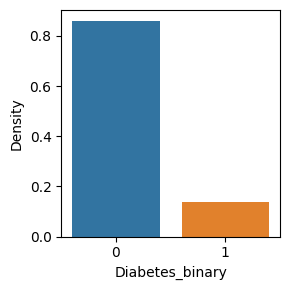


The Normalized Data Distributions of The Target Variable and All The Features:


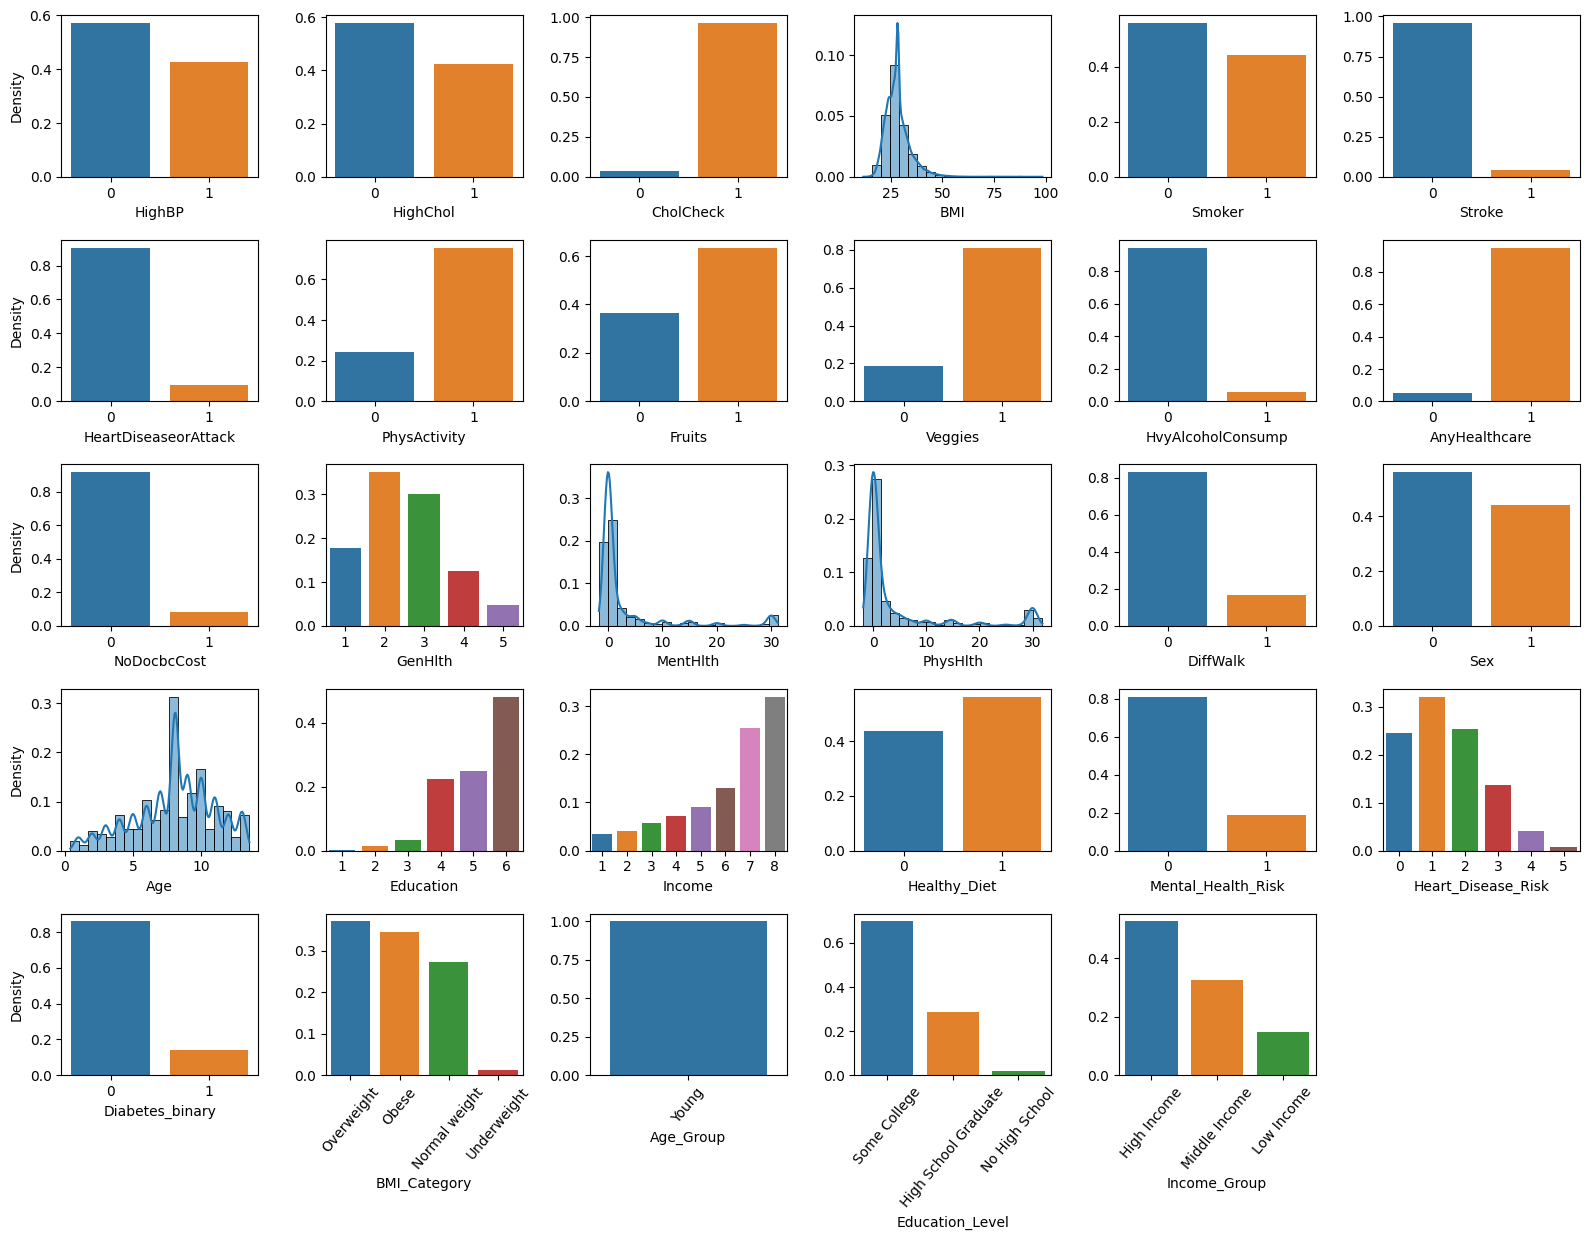

In [6]:
# Calculating Class 1 Weight in the Training set

print(f"The positive class (Diabetes_binary=1) represents {df_y_train_base['Diabetes_binary'].sum()/df_y_train_base.shape[0]*100:.2f}% of the training dataset")
print("\n\033[1;34mThe Normalized Data Distribution Of The Target Variable- Diabetes_binary:\033[0m")
analyze_distributions(df_y_train_base, save_path="2.1.target_distribution.png")
# print("\n\033[1;34mThe Normalized Data Distribution of the Numerical Features:\033[0m")
# analyze_distributions(df_x_train_base, save_path="2.1.numerical_features_distribution.png")
print("\n\033[1;34mThe Normalized Data Distributions of The Target Variable and All The Features:\033[0m")
analyze_distributions(df_train_base, save_path="2.1.all_features_distribution.png")

-The dataset is clearly imbalanced with a vast majority of examples where the person doesn't have Diabete

In [6]:
def correlation_analysis(df, save_path=None):
    """
    Analyze the correlations between numerical features in the dataset and visualize them using a heatmap.

    Parameters:
        df (pd.DataFrame): Input dataset.
        save_path (str, optional): File path to save the generated heatmap. Default is None.

    Returns:
        None: Displays a heatmap of the correlation matrix and optionally saves it to the specified path.
    """
    
    numerical_columns=df.iloc[:,1:].select_dtypes(include=["number"]).columns.tolist()
    correlation_matrix = df[numerical_columns].corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f") #"coolwarm","Blues", "RdBu_r"
    plt.title("Correlation Matrix")

    # plt.tight_layout()
    # Saving the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

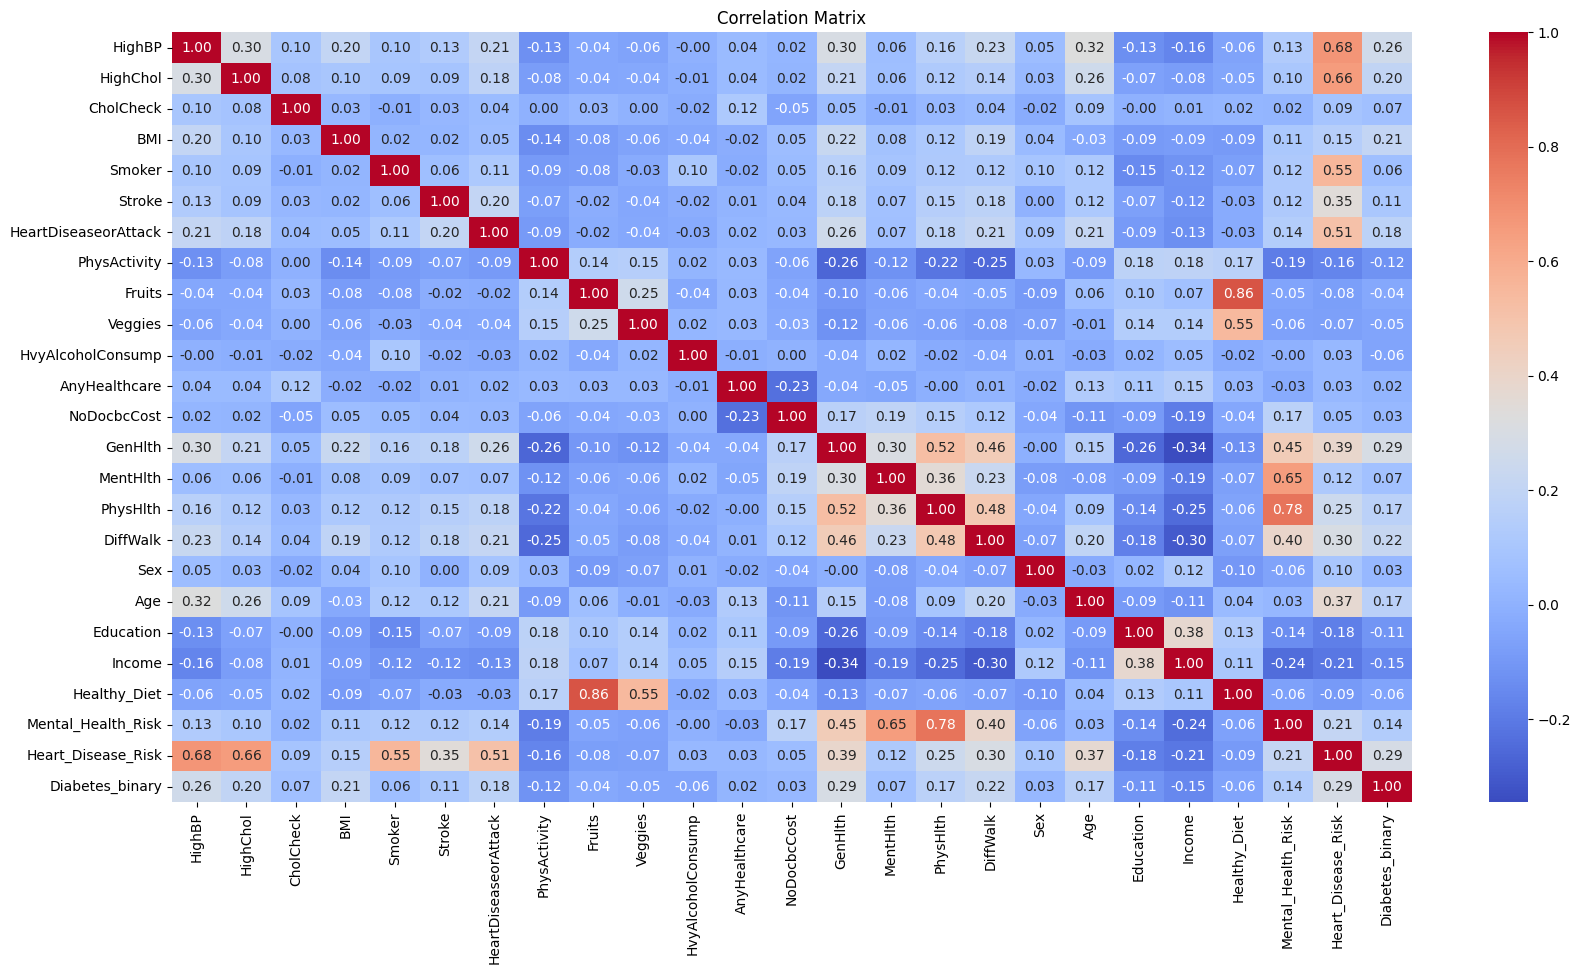

In [6]:
correlation_analysis(df_train_base)

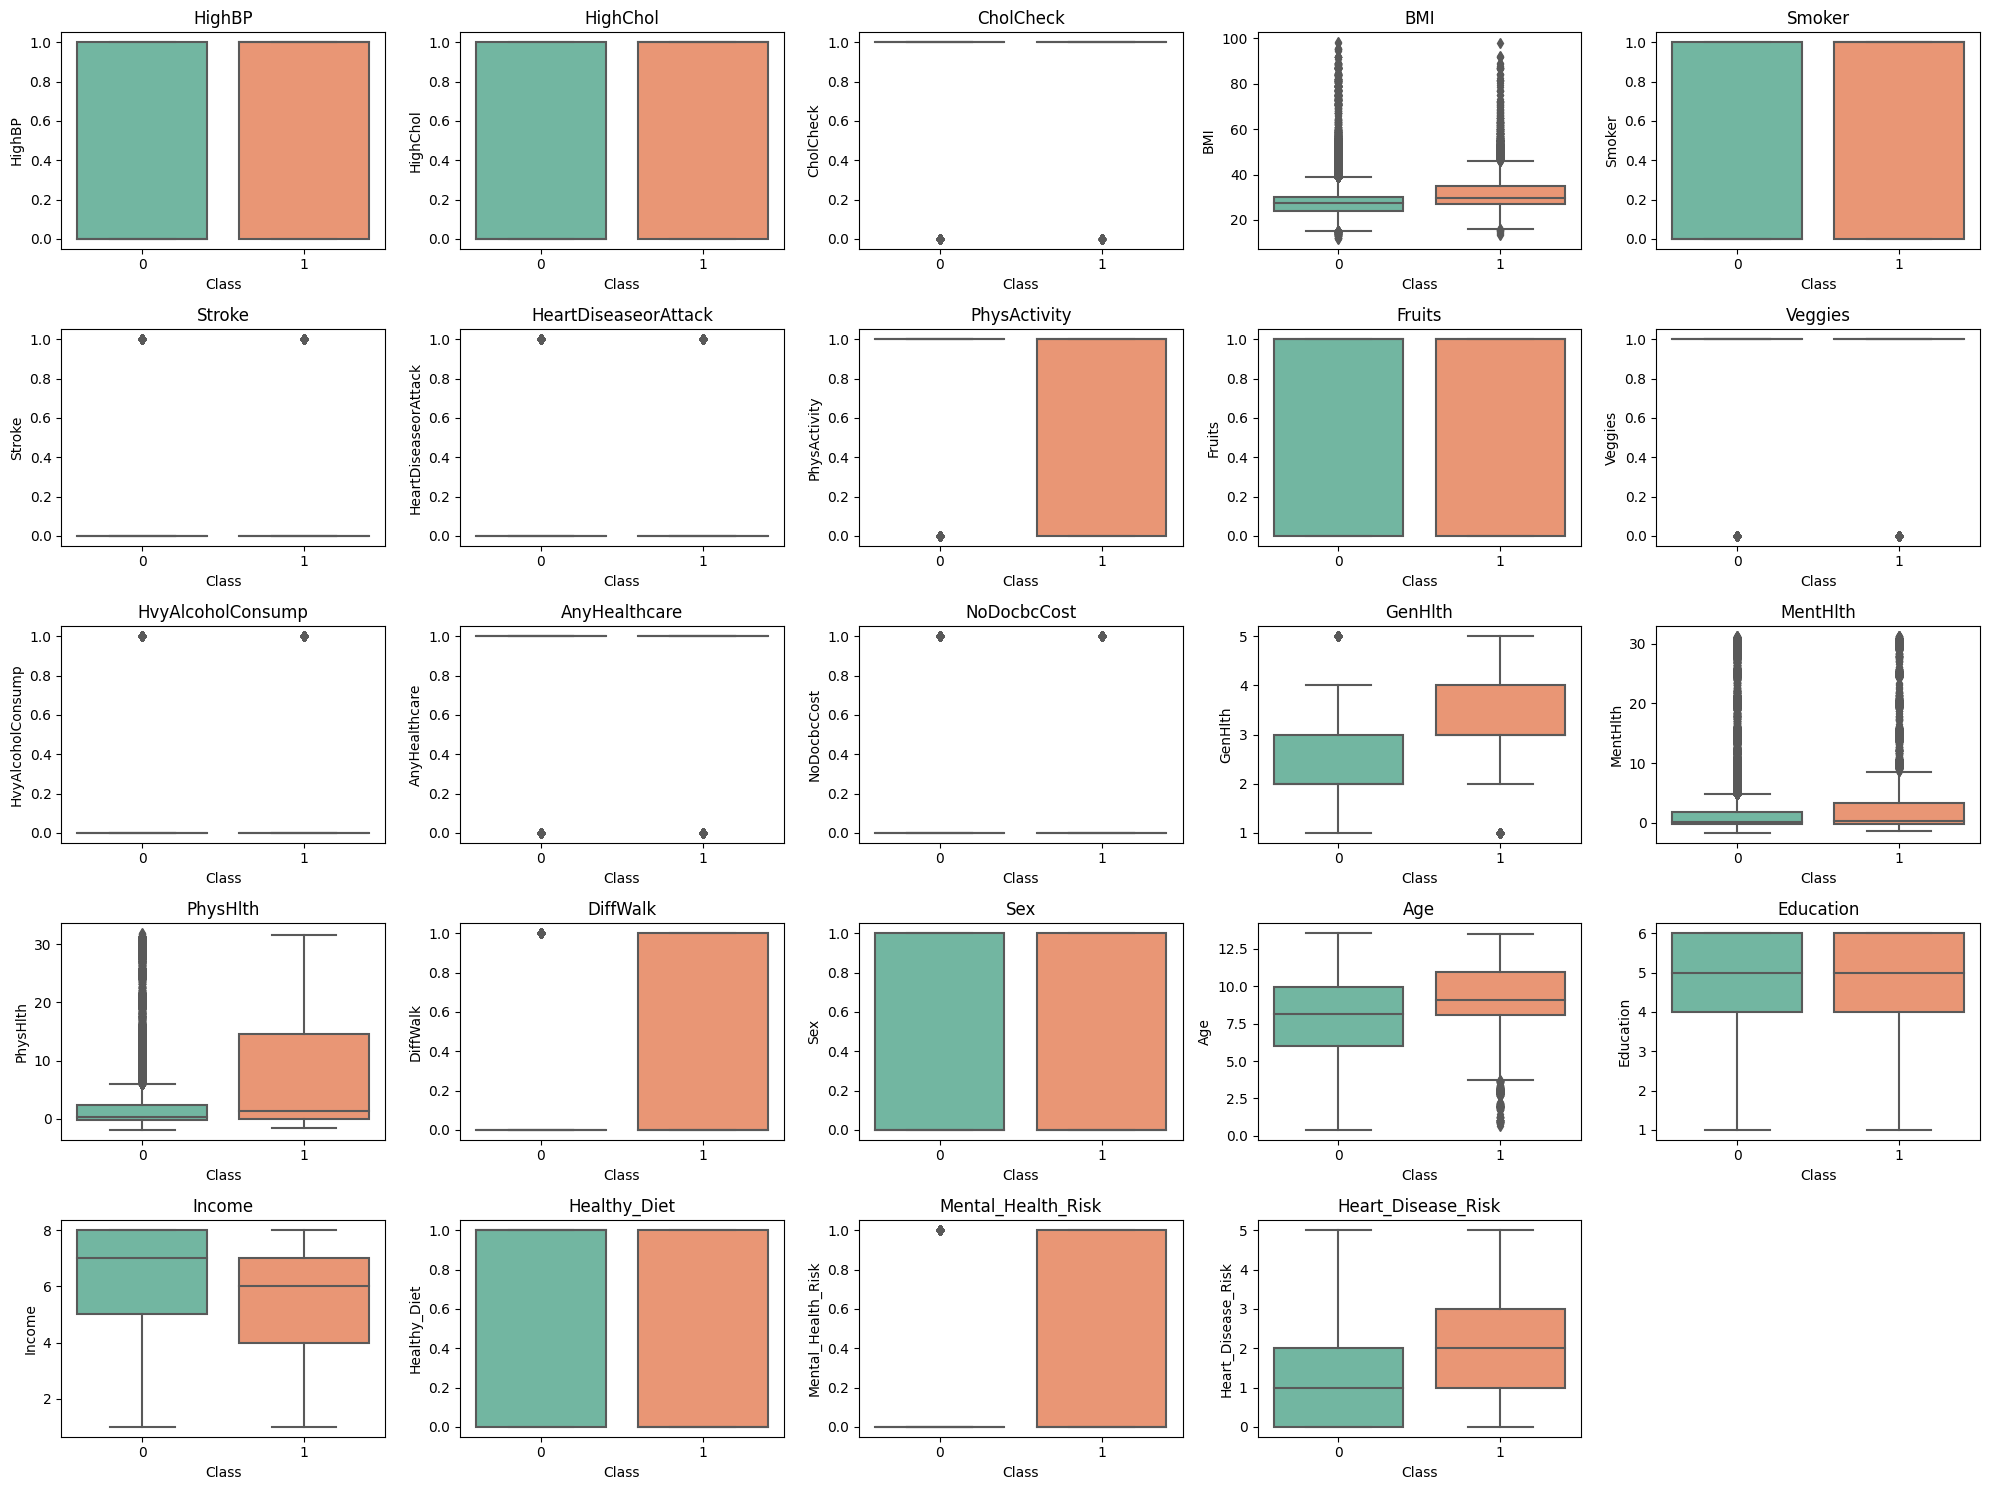

In [7]:
# Selecting numerical features
numerical_features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
                      'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                      'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                      'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 
                      'Income', 'Healthy_Diet', 'Mental_Health_Risk', 'Heart_Disease_Risk']

# Boxplot for each numerical feature
class_column = 'Diabetes_binary'

# Boxplot for each numerical feature based on class
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)  # Adjusting rows and columns based on the number of features
    sns.boxplot(data=df_train_base, y=feature, x=class_column, palette='Set2')  # Using class_column as hue
    plt.title(feature)
    plt.xlabel('Class')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [9]:
def plot_boxplots(df, feature_pairs, order=None):
    """
    Plots boxplots for multiple pairs of numerical and categorical features.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        feature_pairs (list of tuples): Each tuple contains a numerical feature (str) and a categorical feature (str).
        order (dict, optional): Dictionary specifying the order of categories for each categorical feature. Default is None.
    
    Returns:
        None: Displays boxplots comparing each numerical feature against its corresponding categorical feature.
    """
    
    num_plots = len(feature_pairs)
    n_cols = 2  
    n_rows = (num_plots + n_cols - 1) // n_cols 
    
    # Set the figure size
    plt.figure(figsize=(n_cols * 6, n_rows * 5))
    
    for idx, (numerical_feature, categorical_feature) in enumerate(feature_pairs, 1):
        plt.subplot(n_rows, n_cols, idx)
        order = orders.get(categorical_feature) if orders else None
        
        sns.boxplot(data=df, x=categorical_feature, y=numerical_feature, palette='Set2', order=order, showfliers=True)
        
        # To customize the subplot
        plt.title(f'{numerical_feature} vs {categorical_feature}', fontsize=12)
        plt.xlabel(categorical_feature, fontsize=10)
        plt.ylabel(numerical_feature, fontsize=10)
        plt.xticks(rotation=45, fontsize=8)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjusting layout to prevent overlapping
    plt.tight_layout()
    plt.show()

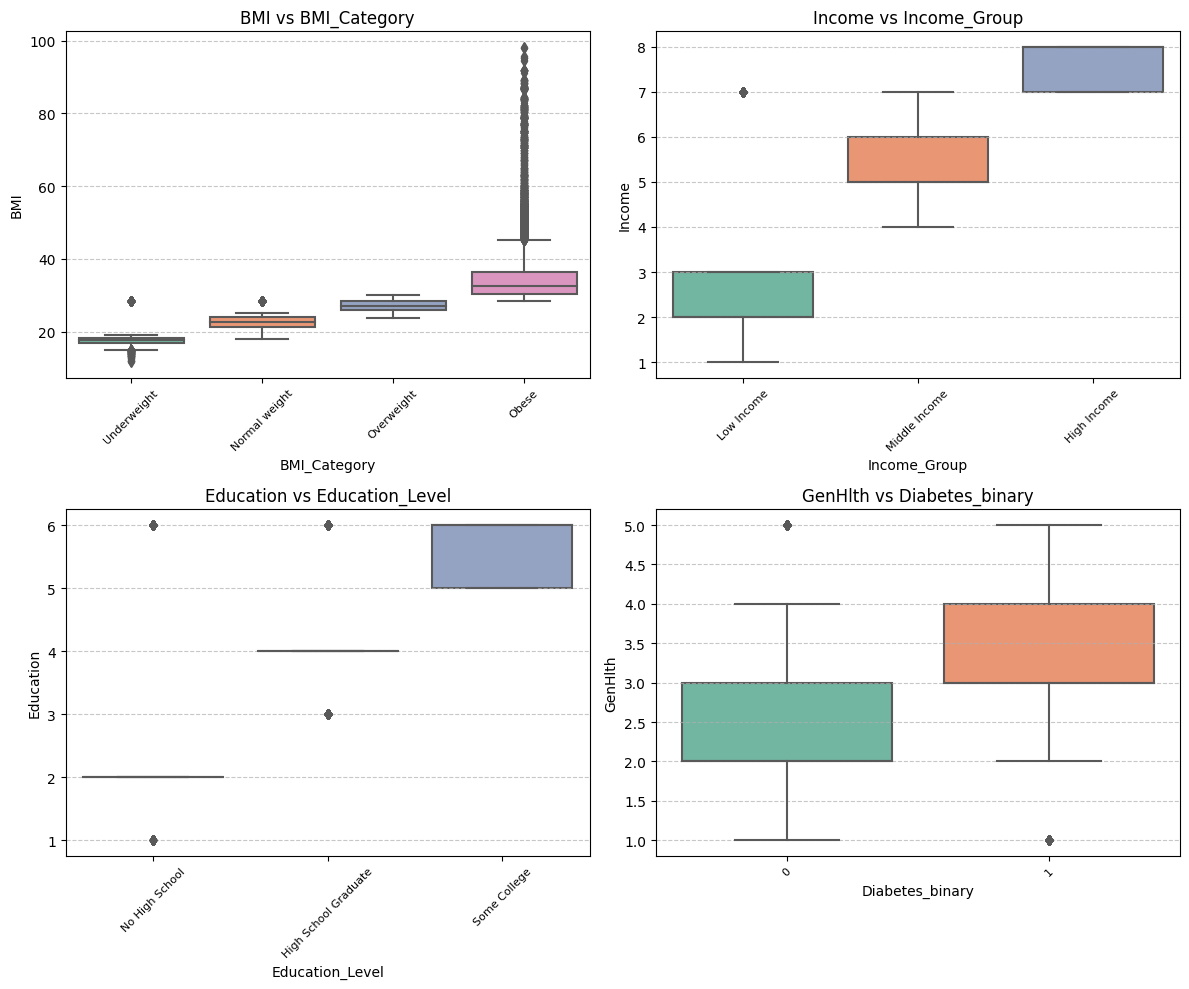

In [10]:
# Defining the feature pairs to plot
feature_pairs = [
    ('BMI', 'BMI_Category'),
    ('Income', 'Income_Group'),
    ('Education', 'Education_Level'),
    ('GenHlth', 'Diabetes_binary'),
]
orders = {
    'BMI_Category': ['Underweight', 'Normal weight', 'Overweight', 'Obese'],
    'Income_Group': ['Low Income', 'Middle Income', 'High Income'],
    'Education_Level': ['No High School', 'High School Graduate', 'Some College'],
    'Diabetes_binary': [0, 1]
}
# Calling the function plot_boxplots to plot results
plot_boxplots(df_train_base, feature_pairs, orders)

## 3.2) Features Transformation

### 3.2.1) Categorical Feature Encoding 

In [95]:
# Function to encode the categorical features of the train dataset

def encode_categorical_features_train(df, print_results=True):
    """
    Encodes categorical features in the training dataset using ordinal encoding.
    
    Parameters:
        df (pd.DataFrame): Original training dataset with categorical features.
        print_results (bool): If True, displays the first 10 rows of the encoded DataFrame. Default is True.
    
    Returns:
        df_encoded (pd.DataFrame): DataFrame with encoded categorical features.
        categorical_encoding_dict (dict): Dictionary storing the encoder used for each categorical feature.
    """
    
    df_encoded=df.copy()
    # We will define the order for each of the categorical features
    categorical_order_dict = {
        'BMI_Category': ['Underweight', 'Normal weight', 'Overweight', 'Obese'],
        'Education_Level': ['No High School', 'High School Graduate', 'Some College'],
        'Income_Group': ['Low Income', 'Middle Income', 'High Income'],
        'Age_Group': ['Young'],
    }
    #Initializing an encoder dict to store the encoder of each encoded feature
    categorical_encoding_dict={}
    columns_categorical=df_encoded.select_dtypes(include=["object", "category"]).columns.tolist()
    for feature in columns_categorical:
        if feature in df_encoded.columns:
            # we initialize encoder for the feature
            if feature in categorical_order_dict:    
                encoder = OrdinalEncoder(categories=[categorical_order_dict[feature]])
            else: 
                encoder = OrdinalEncoder()
                
            # we apply encoding to the feature column
            df_encoded[feature] = encoder.fit_transform(df_encoded[[feature]])
            # we save the encoder in the dictionary
            categorical_encoding_dict[feature] = encoder

        else: 
            print(f"The dataframe does not have this feature: {feature}")

    if print_results==True:
        #We display the encoded df
        print("\n\033[1;34mEncoded Training Dataframe:\033[0m")
        display(df_encoded.head(10))
    
    return df_encoded, categorical_encoding_dict



# Function to encode the categorical features of the validation/test dataset

def encode_categorical_features_test(df, categorical_encoding_dict, print_results=True):
    """
    Encodes categorical features in the test or validation dataset using pre-fitted encoders.
    
    Parameters:
        df (pd.DataFrame): Test or validation dataset with categorical features.
        categorical_encoding_dict (dict): Dictionary of pre-fitted encoders for each categorical feature.
        print_results (bool): If True, displays the first 10 rows of the encoded DataFrame. Default is True.
    
    Returns:
        df_encoded (pd.DataFrame): DataFrame with encoded categorical features.
    """
    
    df_encoded=df.copy()
    for (feature, encoder) in categorical_encoding_dict.items():
        if feature in df_encoded.columns:
            df_encoded[feature] = encoder.transform(df_encoded[[feature]])
        else: 
            print(f"The dataframe does not have this feature: {feature}")

    if print_results==True:
        #We display the encoded df
        print("\n\033[1;34mEncoded Validation/Test Dataframe:\033[0m")
        display(df_encoded.head(10))
    
    return df_encoded



In [96]:
# We encode the train set & validation set and display the encoded dataframes
df_x_train_encoded, encoders = encode_categorical_features_train(df_x_train_base)
df_x_validation_encoded = encode_categorical_features_test(df_x_validation_base, encoders)
display(encoders)



Encoded Training Dataframe:


Unnamed: 0  HighBP  HighChol  CholCheck        BMI  Smoker  Stroke  \
122723        2400       0         1          1  26.843220       0       0   
36489       194952       0         1          1  31.136851       1       0   
121491      144427       1         1          1  34.093554       1       0   
45202       107261       1         0          1  30.265929       0       0   
195570      243438       0         1          1  30.767599       1       0   
144740      216808       0         0          1  20.600226       0       0   
20138       123902       0         0          1  24.066011       0       0   
16860       123985       0         0          1  34.827073       1       0   
77203       166261       0         0          1  23.886999       0       0   
69813       237152       0         1          1  25.519859       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...        Age  Education  \
122723                     0             1       0  ...   7.065822        5.0   
36489                      1             1       0  ...   8.714244        5.0   
121491                     0             1       0  ...   7.115418        5.0   
45202                      0             1       1  ...   8.126856        6.0   
195570                     0             1       1  ...   8.943876        1.0   
144740                     0             0       0  ...   9.130042        4.0   
20138                      0             1       1  ...  11.038268        6.0   
16860                      0             0       0  ...   8.161838        3.0   
77203                      0             1       1  ...   8.161838        6.0   
69813                      0             1       0  ...   7.955140        5.0   

        Income  BMI_Category  Healthy_Diet  Mental_Health_Risk  \
122723     7.0           2.0             0                   1   
36489      8.0           3.0             0                   1   
121491     8.0           3.0             0                   0   
45202      3.0           3.0             1                   0   
195570     6.0           3.0             1                   1   
144740     5.0           1.0             0                   0   
20138      2.0           1.0             1                   0   
16860      8.0           3.0             0                   0   
77203      8.0           1.0             1                   0   
69813      1.0           2.0             0                   0   

        Heart_Disease_Risk  Age_Group  Education_Level  Income_Group  
122723                   1        0.0              2.0           1.0  
36489                    3        0.0              2.0           2.0  
121491                   3        0.0              2.0           2.0  
45202                    1        0.0              2.0           0.0  
195570                   2        0.0              0.0           1.0  
144740                   0        0.0              1.0           1.0  
20138                    0        0.0              2.0           0.0  
16860                    1        0.0              1.0           2.0  
77203                    0        0.0              2.0           2.0  
69813                    2        0.0              2.0           0.0  

[10 rows x 29 columns]


Encoded Validation/Test Dataframe:


Unnamed: 0  HighBP  HighChol  CholCheck        BMI  Smoker  Stroke  \
42807       209680       0         1          1  30.325253       1       0   
37052       242090       0         0          1  29.786941       0       0   
86524        60696       1         0          1  33.686706       0       0   
87291       155809       1         1          1  30.016330       0       0   
184806       50151       1         0          1  23.415839       1       1   
137531      127281       1         0          1  23.161038       1       0   
23478        27321       0         0          1  28.375985       0       0   
67793       180096       0         0          1  28.375985       1       0   
84815        67906       1         1          1  27.017722       1       0   
77187       147067       0         1          1  18.262118       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...        Age  Education  \
42807                      0             0       0  ...   8.161838        4.0   
37052                      0             1       0  ...   7.876307        6.0   
86524                      0             1       0  ...   9.995372        6.0   
87291                      0             0       0  ...  12.985029        6.0   
184806                     0             0       0  ...   7.098353        5.0   
137531                     0             1       0  ...   6.876281        5.0   
23478                      0             1       0  ...   9.138797        6.0   
67793                      0             1       0  ...   5.017423        6.0   
84815                      0             1       1  ...   8.161838        6.0   
77187                      0             1       0  ...   6.131844        5.0   

        Income  BMI_Category  Healthy_Diet  Mental_Health_Risk  \
42807      5.0           3.0             0                   1   
37052      7.0           3.0             0                   0   
86524      4.0           3.0             0                   0   
87291      7.0           3.0             0                   0   
184806     3.0           1.0             0                   1   
137531     8.0           1.0             0                   1   
23478      7.0           2.0             0                   0   
67793      7.0           2.0             0                   0   
84815      8.0           2.0             1                   0   
77187      1.0           0.0             0                   0   

        Heart_Disease_Risk  Age_Group  Education_Level  Income_Group  
42807                    2        0.0              1.0           1.0  
37052                    0        0.0              2.0           2.0  
86524                    1        0.0              1.0           1.0  
87291                    2        0.0              2.0           2.0  
184806                   3        0.0              2.0           0.0  
137531                   2        0.0              2.0           2.0  
23478                    0        0.0              2.0           2.0  
67793                    1        0.0              2.0           2.0  
84815                    3        0.0              2.0           2.0  
77187                    2        0.0              2.0           0.0  

[10 rows x 29 columns]

{'BMI_Category': OrdinalEncoder(categories=[['Underweight', 'Normal weight', 'Overweight',
                             'Obese']]),
 'Age_Group': OrdinalEncoder(categories=[['Young']]),
 'Education_Level': OrdinalEncoder(categories=[['No High School', 'High School Graduate',
                             'Some College']]),
 'Income_Group': OrdinalEncoder(categories=[['Low Income', 'Middle Income', 'High Income']])}

### 3.2.2) Feature Scaling and Normalization

In [97]:
# Function to scale and normalize all features of the train dataset

def scaler_features_train(df, scaler='MinMaxScaler', print_results=True):
    """
    Scales and normalizes numerical features in the training dataset.
    
    Parameters:
        df (pd.DataFrame): Training dataset containing the features to be scaled.
        scaler (str): The scaler to use for normalization. Options are:
                      'MinMaxScaler', 'StandardScaler', 'MaxAbsScaler', 
                      'RobustScaler', 'QuantileTransformer', 'PowerTransformer'.
                      Default is 'MinMaxScaler'.
        print_results (bool): If True, displays the first 10 rows of the scaled DataFrame. Default is True.
    
    Returns:
        df_scaled (pd.DataFrame): DataFrame with scaled features.
        scaler_dict (dict): Dictionary containing the scaler object for each scaled feature.
    """
    
    df_scaled=df.copy()
    # As discussed in the report, only these features will be scaled
    # df_scaled.columns[df_scaled.nunique() > 2].drop('Unnamed: 0')
    features_to_scale = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income','BMI_Category', 'Heart_Disease_Risk', 'Education_Level','Income_Group'] 
    
    #Initializing the selected Scaler
    if scaler == "MinMaxScaler":
        scaler_selected = MinMaxScaler()
    elif scaler == "StandardScaler":
        scaler_selected = StandardScaler()
    elif scaler == "MaxAbsScaler":
        scaler_selected = MaxAbsScaler()
    elif scaler == "RobustScaler":
        scaler_selected = RobustScaler()
    elif scaler == "QuantileTransformer":
        scaler_selected = QuantileTransformer(output_distribution='normal')
    elif scaler == "PowerTransformer":
        scaler_selected = PowerTransformer()
    else:
        raise ValueError(f"Scaler '{scaler}' is not recognized. Please choose from: 'MinMaxScaler', 'StandardScaler', 'MaxAbsScaler', 'RobustScaler', 'QuantileTransformer', or 'PowerTransformer'.")

    #Initialize a scaler dict to store the scaler of each scaled feature
    scaler_dict={}
    for feature in features_to_scale:
        if feature in df_scaled.columns:
            # we initialize encoder for the feature
            scaler = scaler_selected.__class__(**scaler_selected.get_params())                
            # we apply encoding to the feature column
            df_scaled[feature] = scaler.fit_transform(df_scaled[[feature]])
            # we save the encoder in the dictionary
            scaler_dict[feature] = scaler

    if print_results==True:
        #We display the encoded df
        print("\n\033[1;34mScaled Training Dataframe:\033[0m")
        display(df_scaled.head(10))
    
    return df_scaled, scaler_dict



# Function to scale the features of the validation/test dataset

def scaler_features_test(df, scaler_dict, print_results=True):
    """
    Scales the features of the validation/test dataset using the fitted scalers from the training dataset.
    
    Parameters:
        df (pd.DataFrame): Validation or test dataset containing the features to be scaled.
        scaler_dict (dict): Dictionary containing the fitted scaler objects for each feature.
        print_results (bool): If True, displays the first 10 rows of the scaled DataFrame. Default is True.
    
    Returns:
        df_scaled (pd.DataFrame): Dataset with scaled features.
    """
    
    df_scaled=df.copy()
    
    for feature, scaler in scaler_dict.items():
        if feature in df_scaled.columns:
            df_scaled[feature] = scaler.transform(df_scaled[[feature]])
        else: 
            print(f"The dataframe does not have this feature: {feature}")

    if print_results==True:
        #We display the encoded df
        print("\n\033[1;34mScaled Validation/Test Dataframe:\033[0m")
        display(df_scaled.head(10))
    
    return df_scaled


In [98]:
# Encode the train set & validation set and display the encoded dataframes
df_x_train_scaled, scalers = scaler_features_train(df_x_train_encoded, scaler='MinMaxScaler')
df_x_validation_scaled = scaler_features_test(df_x_validation_encoded, scalers)
display(scalers)

# Concatenate the df_x and labels together
df_train_scaled=pd.concat([df_x_train_scaled,df_y_train_base[['Diabetes_binary']]], axis=1)
df_validation_scaled=pd.concat([df_x_validation_scaled,df_y_validation_base[['Diabetes_binary']]], axis=1)


Scaled Training Dataframe:


Unnamed: 0  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
122723        2400       0         1          1  0.175181       0       0   
36489       194952       0         1          1  0.224737       1       0   
121491      144427       1         1          1  0.258863       1       0   
45202       107261       1         0          1  0.214685       0       0   
195570      243438       0         1          1  0.220475       1       0   
144740      216808       0         0          1  0.103126       0       0   
20138       123902       0         0          1  0.143127       0       0   
16860       123985       0         0          1  0.267329       1       0   
77203       166261       0         0          1  0.141061       0       0   
69813       237152       0         1          1  0.159907       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...       Age  Education  \
122723                     0             1       0  ...  0.507222        0.8   
36489                      1             1       0  ...  0.632654        0.8   
121491                     0             1       0  ...  0.510996        0.8   
45202                      0             1       1  ...  0.587958        1.0   
195570                     0             1       1  ...  0.650127        0.0   
144740                     0             0       0  ...  0.664293        0.6   
20138                      0             1       1  ...  0.809494        1.0   
16860                      0             0       0  ...  0.590620        0.4   
77203                      0             1       1  ...  0.590620        1.0   
69813                      0             1       0  ...  0.574892        0.8   

          Income  BMI_Category  Healthy_Diet  Mental_Health_Risk  \
122723  0.857143      0.666667             0                   1   
36489   1.000000      1.000000             0                   1   
121491  1.000000      1.000000             0                   0   
45202   0.285714      1.000000             1                   0   
195570  0.714286      1.000000             1                   1   
144740  0.571429      0.333333             0                   0   
20138   0.142857      0.333333             1                   0   
16860   1.000000      1.000000             0                   0   
77203   1.000000      0.333333             1                   0   
69813   0.000000      0.666667             0                   0   

        Heart_Disease_Risk  Age_Group  Education_Level  Income_Group  
122723                 0.2        0.0              1.0           0.5  
36489                  0.6        0.0              1.0           1.0  
121491                 0.6        0.0              1.0           1.0  
45202                  0.2        0.0              1.0           0.0  
195570                 0.4        0.0              0.0           0.5  
144740                 0.0        0.0              0.5           0.5  
20138                  0.0        0.0              1.0           0.0  
16860                  0.2        0.0              0.5           1.0  
77203                  0.0        0.0              1.0           1.0  
69813                  0.4        0.0              1.0           0.0  

[10 rows x 29 columns]


Scaled Validation/Test Dataframe:


Unnamed: 0  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
42807       209680       0         1          1  0.215370       1       0   
37052       242090       0         0          1  0.209157       0       0   
86524        60696       1         0          1  0.254167       0       0   
87291       155809       1         1          1  0.211804       0       0   
184806       50151       1         0          1  0.135623       1       1   
137531      127281       1         0          1  0.132682       1       0   
23478        27321       0         0          1  0.192872       0       0   
67793       180096       0         0          1  0.192872       1       0   
84815        67906       1         1          1  0.177195       1       0   
77187       147067       0         1          1  0.076140       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...       Age  Education  \
42807                      0             0       0  ...  0.590620        0.6   
37052                      0             1       0  ...  0.568894        1.0   
86524                      0             1       0  ...  0.730138        1.0   
87291                      0             0       0  ...  0.957628        1.0   
184806                     0             0       0  ...  0.509697        0.8   
137531                     0             1       0  ...  0.492799        0.8   
23478                      0             1       0  ...  0.664959        1.0   
67793                      0             1       0  ...  0.351354        1.0   
84815                      0             1       1  ...  0.590620        1.0   
77187                      0             1       0  ...  0.436153        0.8   

          Income  BMI_Category  Healthy_Diet  Mental_Health_Risk  \
42807   0.571429      1.000000             0                   1   
37052   0.857143      1.000000             0                   0   
86524   0.428571      1.000000             0                   0   
87291   0.857143      1.000000             0                   0   
184806  0.285714      0.333333             0                   1   
137531  1.000000      0.333333             0                   1   
23478   0.857143      0.666667             0                   0   
67793   0.857143      0.666667             0                   0   
84815   1.000000      0.666667             1                   0   
77187   0.000000      0.000000             0                   0   

        Heart_Disease_Risk  Age_Group  Education_Level  Income_Group  
42807                  0.4        0.0              0.5           0.5  
37052                  0.0        0.0              1.0           1.0  
86524                  0.2        0.0              0.5           0.5  
87291                  0.4        0.0              1.0           1.0  
184806                 0.6        0.0              1.0           0.0  
137531                 0.4        0.0              1.0           1.0  
23478                  0.0        0.0              1.0           1.0  
67793                  0.2        0.0              1.0           1.0  
84815                  0.6        0.0              1.0           1.0  
77187                  0.4        0.0              1.0           0.0  

[10 rows x 29 columns]

{'BMI': MinMaxScaler(),
 'GenHlth': MinMaxScaler(),
 'MentHlth': MinMaxScaler(),
 'PhysHlth': MinMaxScaler(),
 'Age': MinMaxScaler(),
 'Education': MinMaxScaler(),
 'Income': MinMaxScaler(),
 'BMI_Category': MinMaxScaler(),
 'Heart_Disease_Risk': MinMaxScaler(),
 'Education_Level': MinMaxScaler(),
 'Income_Group': MinMaxScaler()}

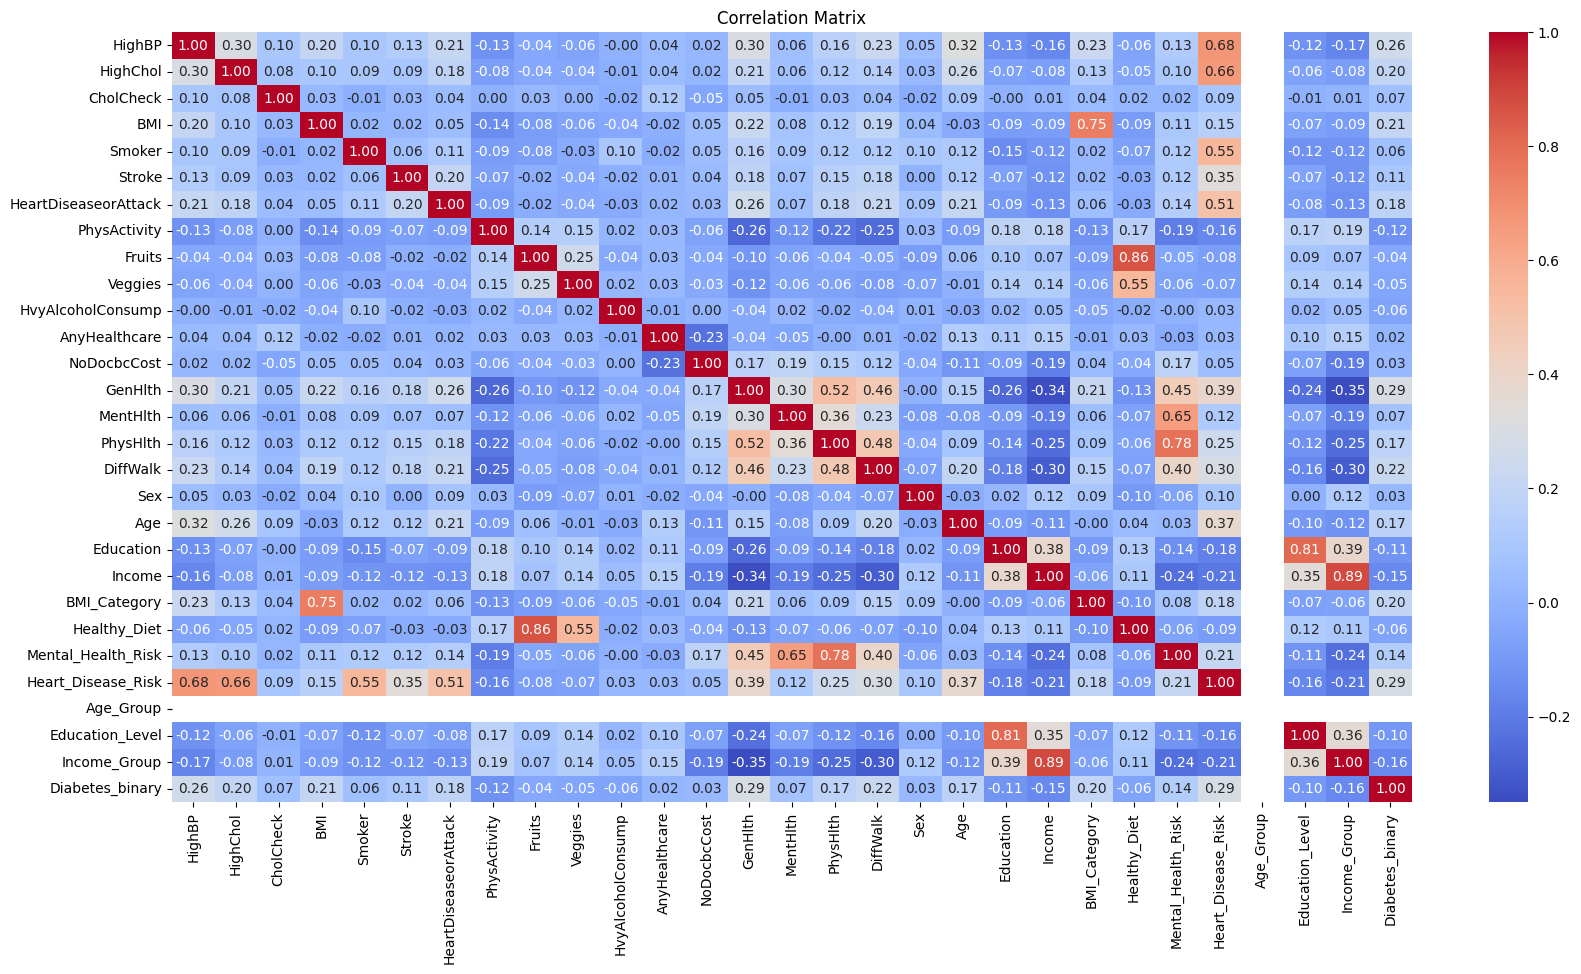

In [15]:
#Show the coorelation Matrix of the scaled Train Set
correlation_analysis(pd.concat([df_x_train_scaled, df_y_train_base['Diabetes_binary']],axis=1), save_path="2.1.correlation_matrix_scaled_dt_train.png")

## 3.3) Feature Engineering

In [99]:
# Create a function that can add the interaction and squared of features

def poly_engineered_features_train(df, columns_to_transform=None, degree=2, print_results=True):
    """
    Create polynomial interaction features and squared features from the specified columns in the training dataset.

    Parameters:
        df (pd.DataFrame): The original training dataset containing the features to be transformed.
        columns_to_transform (list, optional): List of numerical columns to apply polynomial feature engineering. 
                                               If None, all numerical columns will be selected.
        degree (int): The degree of the polynomial features to create. Default is 2.
        print_results (bool): If True, displays the first 10 rows of the transformed DataFrame. Default is True.

    Returns:
        df_poly (pd.DataFrame): DataFrame with original and newly created polynomial interaction features.
        poly (PolynomialFeatures): The fitted PolynomialFeatures object used for transformation.
        columns_to_transform (list): List of columns that were transformed.
    """
    
    df_poly=df.copy()
    # If no specific columns are given, we will select all the numerical columns
    if columns_to_transform==None:
        columns_to_transform = df_poly.iloc[:,1:].select_dtypes(include=["number"]).columns.tolist()
    
    # Initialize PolynomialFeatures with degree
    poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    
    # Fit and transform the columns_to_transform
    poly_features = poly.fit_transform(df_poly[columns_to_transform])
    
    # Get the names of the new features
    feature_names = poly.get_feature_names_out(columns_to_transform)
    
    # Create a DataFrame with the new features and concat it with the original df
    poly_df_new = pd.DataFrame(poly_features, columns=feature_names, index=df.index)

    # Check if the feature exists already to avoid duplication
    existing_columns = set(df_poly.columns)
    new_columns = set(poly_df_new.columns)
    unique_columns = new_columns - existing_columns  
    # Select only unique new features
    df_poly = pd.concat([df_poly, poly_df_new[list(unique_columns)]], axis=1)
    
    # df_poly = pd.concat([df_poly, poly_df_new], axis=1)

    if print_results==True:
        #We display the new df
        print("\n\033[1;34mTransformed Training Dataframe with New Polynomial Interaction and Feature Engineering:\033[0m")
        display(df_poly.head(10))
        print(poly)
    
    return df_poly, poly, columns_to_transform




# Function to transform the features of the validation/test dataset

def poly_engineered_features_test(df, poly, columns_to_transform, print_results=True):
    """
    Transform the features of the validation/test dataset using polynomial feature engineering.

    Parameters:
        df (pd.DataFrame): The original validation/test dataset containing the features to be transformed.
        poly (PolynomialFeatures): The fitted PolynomialFeatures object used for transformation
        columns_to_transform (list): List of numerical columns to apply polynomial feature engineering.
        print_results (bool): If True, displays the first 10 rows of the transformed DataFrame. Default is True.

    Returns:
        df_poly (pd.DataFrame): DataFrame with original and newly created polynomial interaction features 
                                added to the validation/test dataset.
    """
    
    df_poly=df.copy()

    # Transform the Validation/Test Set
    poly_features = poly.transform(df_poly[columns_to_transform])
    
    # Get the names of the new features
    feature_names = poly.get_feature_names_out(columns_to_transform)
    
    # Create a DataFrame with the new features and concat it with the original df
    poly_df_new = pd.DataFrame(poly_features, columns=feature_names, index=df.index)

    # Check if the feature exists already to avoid duplication
    existing_columns = set(df_poly.columns)
    new_columns = set(poly_df_new.columns)
    unique_columns = new_columns - existing_columns  
    # Select only unique new features
    df_poly = pd.concat([df_poly, poly_df_new[list(unique_columns)]], axis=1)
    
    # df_poly = pd.concat([df_poly, poly_df_new], axis=1)
    
    if print_results==True:
        #We display the encoded df
        print("\n\033[1;34mTransformed Validation/Test Dataframe:\033[0m")
        display(df_poly.head(10))
    
    return df_poly


In [100]:
columns_to_transform=['BMI', 'Age', 'GenHlth', 'Heart_Disease_Risk']
# Encode the train set & validation set and display the encoded dataframes
df_x_train_scaled_poly_fe, poly, columns_to_transform = poly_engineered_features_train(df_x_train_scaled, columns_to_transform)

df_x_validation_scaled_poly_fe = poly_engineered_features_test(df_x_validation_scaled, poly, columns_to_transform)



Transformed Training Dataframe with New Polynomial Interaction and Feature Engineering:


Unnamed: 0  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
122723        2400       0         1          1  0.175181       0       0   
36489       194952       0         1          1  0.224737       1       0   
121491      144427       1         1          1  0.258863       1       0   
45202       107261       1         0          1  0.214685       0       0   
195570      243438       0         1          1  0.220475       1       0   
144740      216808       0         0          1  0.103126       0       0   
20138       123902       0         0          1  0.143127       0       0   
16860       123985       0         0          1  0.267329       1       0   
77203       166261       0         0          1  0.141061       0       0   
69813       237152       0         1          1  0.159907       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  Heart_Disease_Risk  \
122723                     0             1       0  ...                 0.2   
36489                      1             1       0  ...                 0.6   
121491                     0             1       0  ...                 0.6   
45202                      0             1       1  ...                 0.2   
195570                     0             1       1  ...                 0.4   
144740                     0             0       0  ...                 0.0   
20138                      0             1       1  ...                 0.0   
16860                      0             0       0  ...                 0.2   
77203                      0             1       1  ...                 0.0   
69813                      0             1       0  ...                 0.4   

        Age_Group  Education_Level  Income_Group  BMI GenHlth  \
122723        0.0              1.0           0.5     0.000000   
36489         0.0              1.0           1.0     0.112369   
121491        0.0              1.0           1.0     0.129431   
45202         0.0              1.0           0.0     0.107343   
195570        0.0              0.0           0.5     0.110238   
144740        0.0              0.5           0.5     0.025782   
20138         0.0              1.0           0.0     0.035782   
16860         0.0              0.5           1.0     0.000000   
77203         0.0              1.0           1.0     0.000000   
69813         0.0              1.0           0.0     0.079954   

        GenHlth Heart_Disease_Risk  Age GenHlth  Age Heart_Disease_Risk  \
122723                         0.0     0.000000                0.101444   
36489                          0.3     0.316327                0.379592   
121491                         0.3     0.255498                0.306597   
45202                          0.1     0.293979                0.117592   
195570                         0.2     0.325064                0.260051   
144740                         0.0     0.166073                0.000000   
20138                          0.0     0.202374                0.000000   
16860                          0.0     0.000000                0.118124   
77203                          0.0     0.000000                0.000000   
69813                          0.2     0.287446                0.229957   

         BMI Age  BMI Heart_Disease_Risk  
122723  0.088856                0.035036  
36489   0.142181                0.134842  
121491  0.132278                0.155318  
45202   0.126226                0.042937  
195570  0.143337                0.088190  
144740  0.068506                0.000000  
20138   0.115861                0.000000  
16860   0.157890                0.053466  
77203   0.083314                0.000000  
69813   0.091929                0.063963  

[10 rows x 35 columns]

PolynomialFeatures(include_bias=False, interaction_only=True)

Transformed Validation/Test Dataframe:


Unnamed: 0  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
42807       209680       0         1          1  0.215370       1       0   
37052       242090       0         0          1  0.209157       0       0   
86524        60696       1         0          1  0.254167       0       0   
87291       155809       1         1          1  0.211804       0       0   
184806       50151       1         0          1  0.135623       1       1   
137531      127281       1         0          1  0.132682       1       0   
23478        27321       0         0          1  0.192872       0       0   
67793       180096       0         0          1  0.192872       1       0   
84815        67906       1         1          1  0.177195       1       0   
77187       147067       0         1          1  0.076140       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  Heart_Disease_Risk  \
42807                      0             0       0  ...                 0.4   
37052                      0             1       0  ...                 0.0   
86524                      0             1       0  ...                 0.2   
87291                      0             0       0  ...                 0.4   
184806                     0             0       0  ...                 0.6   
137531                     0             1       0  ...                 0.4   
23478                      0             1       0  ...                 0.0   
67793                      0             1       0  ...                 0.2   
84815                      0             1       1  ...                 0.6   
77187                      0             1       0  ...                 0.4   

        Age_Group  Education_Level  Income_Group  BMI GenHlth  \
42807         0.0              0.5           0.5     0.107685   
37052         0.0              1.0           1.0     0.052289   
86524         0.0              0.5           0.5     0.127083   
87291         0.0              1.0           1.0     0.105902   
184806        0.0              1.0           0.0     0.101717   
137531        0.0              1.0           1.0     0.033171   
23478         0.0              1.0           1.0     0.000000   
67793         0.0              1.0           1.0     0.096436   
84815         0.0              1.0           1.0     0.044299   
77187         0.0              1.0           0.0     0.038070   

        GenHlth Heart_Disease_Risk  Age GenHlth  Age Heart_Disease_Risk  \
42807                         0.20     0.295310                0.236248   
37052                         0.00     0.142223                0.000000   
86524                         0.10     0.365069                0.146028   
87291                         0.20     0.478814                0.383051   
184806                        0.45     0.382273                0.305818   
137531                        0.10     0.123200                0.197120   
23478                         0.00     0.000000                0.000000   
67793                         0.10     0.175677                0.070271   
84815                         0.15     0.147655                0.354372   
77187                         0.20     0.218077                0.174461   

         BMI Age  BMI Heart_Disease_Risk  
42807   0.127202                0.086148  
37052   0.118988                0.000000  
86524   0.185577                0.050833  
87291   0.202830                0.084722  
184806  0.069127                0.081374  
137531  0.065386                0.053073  
23478   0.128252                0.000000  
67793   0.067766                0.038574  
84815   0.104655                0.106317  
77187   0.033209                0.030456  

[10 rows x 35 columns]

## 3.4) Feature Selection

In [10]:
# Analyse the feature importance 

def get_feature_importance(X, y, save_path=None, random_state=seed):
    """
    Analyze feature importance using Decision Tree, Random Forest, and Logistic Regression classifiers.

    Parameters:
        X (pd.DataFrame): Dataset used for training the classifiers.
        y (pd.DataFrame): Dataset of the Target variable.
        save_path (str, optional): Path to save the plot. If None, the plot will not be saved. Default is None.
        random_state (int): Seed for random number generators to ensure reproducibility. Default is set to `seed` which is equal to 42.

    Returns:
        None: Displays feature importance plots for each model.
    """

    start_time=time.time()
    # Decision Tree
    cls_decision_tree=DecisionTreeClassifier(class_weight='balanced',random_state=seed)
    cls_decision_tree.fit(X,y)
    # Random Forest
    cls_random_forest=RandomForestClassifier(class_weight='balanced',random_state=seed)
    cls_random_forest.fit(X,y)

    # Logistic Regression
    cls_logistic_regression = LogisticRegression(class_weight='balanced', random_state=seed, max_iter=1000)
    cls_logistic_regression.fit(X, y)
    
    # Extract the feature importances of each classifier
    feature_importances_decision_tree = cls_decision_tree.feature_importances_
    feature_importances_random_forest = cls_random_forest.feature_importances_
    feature_importances_logistic_regression = np.abs(cls_logistic_regression.coef_[0])
    feature_importances_logistic_regression/=feature_importances_logistic_regression.max() 
    
    # Sort feature importances according to feature importances of random forest
    sorted_idx_random_forest = np.argsort(feature_importances_random_forest)[::-1]
    
    # Create figure with two subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 12), sharey=True)
    colors = cm.viridis(np.linspace(0, 1, len(feature_importances_random_forest)))

    # Plot feature importance for Random Forest
    ax1.barh(range(len(feature_importances_random_forest)), feature_importances_random_forest[sorted_idx_random_forest] , color=colors)
    ax1.set_yticks(range(len(feature_importances_random_forest)))
    ax1.set_yticklabels(X.columns[sorted_idx_random_forest], fontsize=16)
    ax1.set_title("Feature Importance Using Random Forest  Model", fontsize=16)
    ax1.grid(True, axis='x')
    
    # Plot feature importance for Decision Tree
    ax2.barh(range(len(feature_importances_decision_tree)), feature_importances_decision_tree[sorted_idx_random_forest] , color=colors)
    ax2.set_yticks(range(len(feature_importances_decision_tree)))
    ax2.set_yticklabels(X.columns[sorted_idx_random_forest], fontsize=16)
    ax2.set_title("Feature Importance Using Decision Tree Model", fontsize=16)
    ax2.grid(True, axis='x')
    
    
    # Plot feature importance for Logistic Regression
    ax3.barh(range(len(feature_importances_logistic_regression)), feature_importances_logistic_regression[sorted_idx_random_forest] , color=colors)
    ax3.set_yticks(range(len(feature_importances_logistic_regression)))
    ax3.set_yticklabels(X.columns[sorted_idx_random_forest], fontsize=16)
    ax3.set_title("Feature Importance Using Logistic Regression Model", fontsize=16)
    ax3.grid(True, axis='x')

    
    plt.tight_layout()

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

    print (f"This code took: {time.time()-start_time} secs")


    #return feature_importances_random_forest, feature_importances_decision_tree, feature_importances_logistic_regression



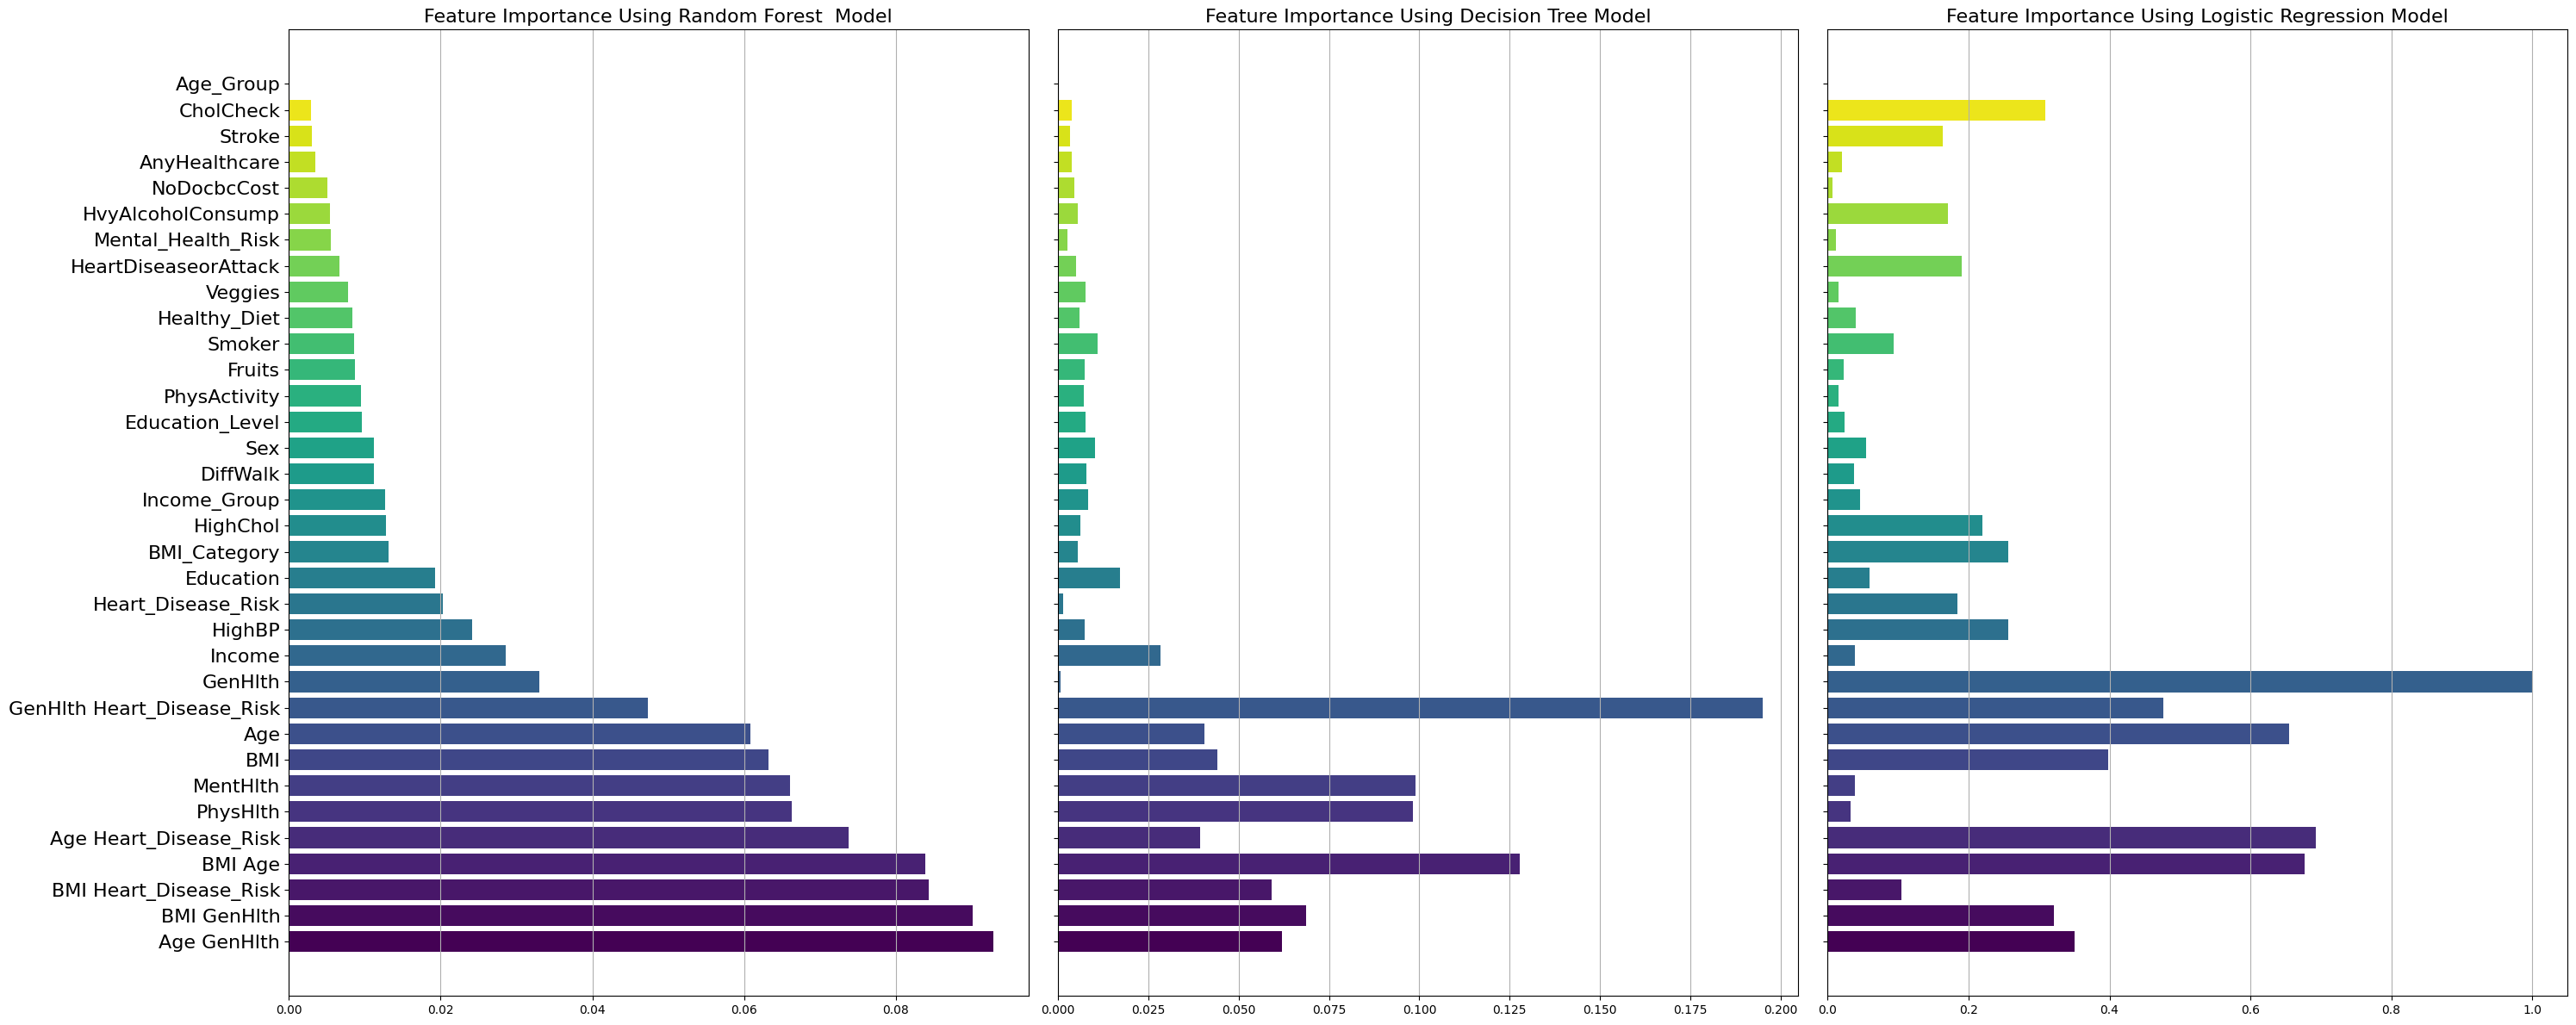

This code took: 44.46837639808655 secs


In [9]:
#Extract the final scaled Training Set
df_x_train_final=df_x_train_scaled_poly_fe.drop(columns="Unnamed: 0")
df_y_train_final=df_y_train_base.drop(columns="Unnamed: 0")
get_feature_importance(df_x_train_final, df_y_train_final, save_path="2.4.feature_selection.png", random_state=seed)

## 3.5) Data Balancing and Augmentation Strategies

In [101]:
#Apply resampling to balance classes

def apply_resampling(X, y, method='Oversampling', plot=True, random_state=seed):
    """
    Apply resampling to balance classes.
    
    Parameters:
        X (pd.DataFrame): Training dataset.
        y (pd.DataFrame): Target dataset.
        method (str): Resampling technique ('Oversampling', 'Undersampling', 'SMOTE', 'Borderline-SMOTE', 'ADASYN', 'RENN'). Default is 'Oversampling'.
        random_state (int): Seed for reproducibility. Default is set to 42.

    Returns:
        X_resampled (pd.DataFrame): Resampled Training dataset.
        y_resampled (pd.Series): Resampled target dataset.
    """
    
    if method == 'Oversampling':
        sampler = RandomOverSampler(random_state=random_state)
    elif method == 'Undersampling':
        sampler = RandomUnderSampler(random_state=random_state)
    elif method == 'SMOTE':
        sampler = SMOTE(random_state=random_state)
    elif method == 'Borderline-SMOTE':
        sampler = BorderlineSMOTE(random_state=random_state, kind='borderline-1')
    elif method == 'ADASYN':
        sampler = ADASYN(random_state=random_state)
    elif method == 'RENN':
        sampler = RepeatedEditedNearestNeighbours()
    else:
        raise ValueError(f"Unsupported method: {method}")
    
    X_resampled, y_resampled = sampler.fit_resample(X, y)

    # Plot the classes before and after the sampling
    if plot==True:
        plt.figure(figsize=(8,3))
        plt.subplot(1,2,1)
        sns.barplot(x=y['Diabetes_binary'].value_counts().index, y=y['Diabetes_binary'].value_counts().values)
        plt.title('Original')
        
        plt.subplot(1,2,2)
        sns.barplot(x=y_resampled['Diabetes_binary'].value_counts().index, y=y_resampled['Diabetes_binary'].value_counts().values)
        plt.title('After Sampling')
        plt.suptitle(f"Sampling Method = {method} ", fontsize=12)
        
        plt.tight_layout()
        plt.show()
    return X_resampled, y_resampled

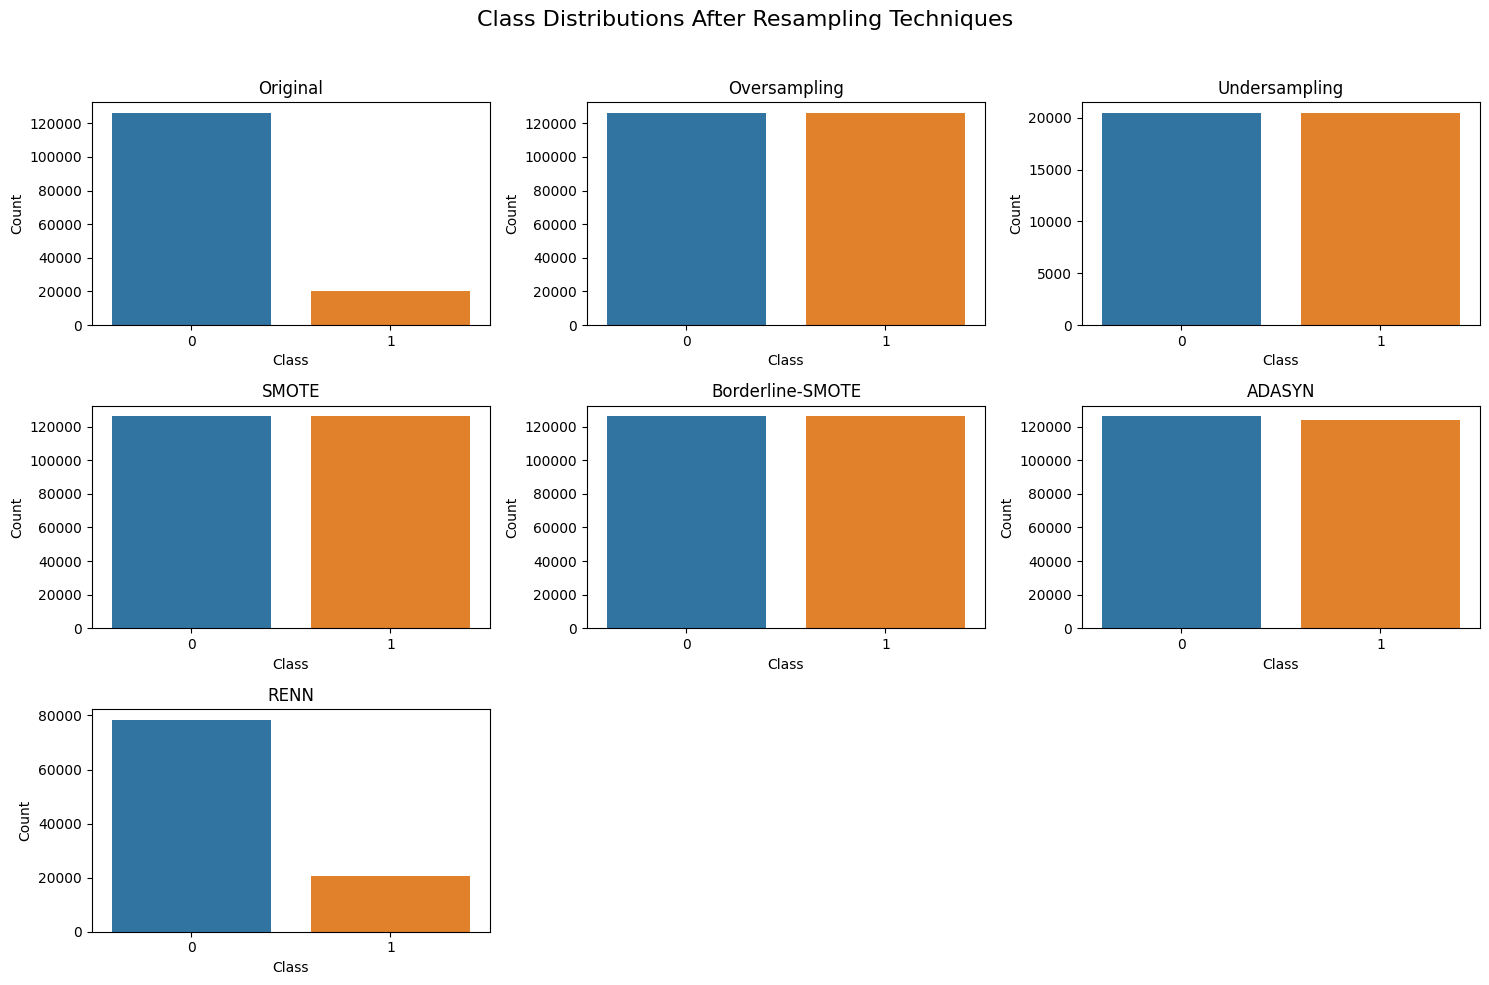

This code took: 298.17325925827026 secs


In [102]:
#Extract the final scaled Training Set

df_x_train_final=df_x_train_scaled_poly_fe.drop(columns=["Unnamed: 0", "Age_Group"])
df_y_train_final=df_y_train_base.drop(columns="Unnamed: 0")
sampling_techniques=['Oversampling','Undersampling','SMOTE','Borderline-SMOTE','ADASYN','RENN']

X_resampled_dict={}
y_resampled_dict={}

X_resampled_dict['Original']=df_x_train_final
y_resampled_dict['Original']=df_y_train_final

start_time=time.time()
for idx, technique in enumerate(sampling_techniques):
    # Apply resampling
    X_resampled, y_resampled = apply_resampling(df_x_train_final, df_y_train_final, method=technique,plot=False, random_state=seed)
    X_resampled_dict[technique] = X_resampled
    y_resampled_dict[technique] = y_resampled

#Plot the Results
plt.figure(figsize=(15, 10))
for idx, technique in enumerate(y_resampled_dict):
    # Plot original and resampled distributions
    plt.subplot(3, 3, idx + 1)  # 3 rows, 2 columns, position idx+1
    sns.barplot(
        x=[0, 1],
        y=y_resampled_dict[technique].value_counts().sort_index().values
    )
    plt.title(f"{technique}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    
# Add a suptitle
plt.suptitle("Class Distributions After Resampling Techniques", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"This code took: {time.time()-start_time} secs")

  
# X_resampled_over, y_resampled_over=apply_resampling(df_x_train_final, df_y_train_final, method='Oversampling', random_state=seed)


In [103]:
#Import and handle the additonal samples for an external dataset 

def df_preparation(df, print_results=True):
    """
    Add BMI_Category, Healthy_Diet, Mental_Health_Risk, Heart_Disease_Risk, 
    Age_Group, Education_Level, and Income_Group to the dataset.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame containing the raw data.
    
    Returns:
        df_new (pd.DataFrame): Transformed DataFrame with additional features.
    """
    
    df_new = df.copy()

    # Initializing new columns as empty or with appropriate categories
    df_new['BMI_Category'] = ''#np.nan
    df_new['Healthy_Diet'] = np.nan
    df_new['Heart_Disease_Risk'] = np.nan
    df_new['Mental_Health_Risk'] = np.nan
    df_new['Age_Group'] = ''#np.nan
    df_new['Education_Level'] = ''#np.nan
    df_new['Income_Group'] = ''#np.nan

    # Adding BMI_Category based on the BMI values
    df_new.loc[df_new['BMI'] < 18.5, 'BMI_Category'] = 'Underweight'
    df_new.loc[(df_new['BMI'] >= 18.5) & (df_new['BMI'] < 25), 'BMI_Category'] = 'Normal weight'
    df_new.loc[(df_new['BMI'] >= 25) & (df_new['BMI'] < 30), 'BMI_Category'] = 'Overweight'
    df_new.loc[df_new['BMI'] >= 30, 'BMI_Category'] = 'Obese'

    # Adding Healthy_Diet = Fruits x Veggies
    df_new['Healthy_Diet'] = df_new['Fruits'] * df_new['Veggies']

    # Adding Heart_Disease_Risk = HighBP + HighChol + Smoker + Stroke + HeartDiseaseorAttack
    df_new['Heart_Disease_Risk'] = (df_new['HighBP'] + df_new['HighChol'] + 
                                    df_new['Smoker'] + df_new['Stroke'] + 
                                    df_new['HeartDiseaseorAttack'])

    # Adding Mental_Health_Risk based on the values of MentHlth and PhysHlth
    df_new.loc[(df_new['MentHlth'] <= 11) & (df_new['PhysHlth'] <= 11), 'Mental_Health_Risk'] = 0
    df_new.loc[(df_new['MentHlth'] > 11) | (df_new['PhysHlth'] > 11), 'Mental_Health_Risk'] = 1

    # Adding Age_Group as 'Young' (Assuming placeholder; replace logic as needed)
    df_new['Age_Group'] = 'Young'  # Replace this with the actual logic if available

    # Adding Education_Level based on the Education column
    df_new.loc[df_new['Education'] < 3, 'Education_Level'] = 'No High School'
    df_new.loc[(df_new['Education'] >= 3) & (df_new['Education'] < 5), 'Education_Level'] = 'High School Graduate'
    df_new.loc[df_new['Education'] >= 5, 'Education_Level'] = 'Some College'

    # Adding Income_Group based on the Income column
    df_new.loc[df_new['Income'] < 4, 'Income_Group'] = 'Low Income'
    df_new.loc[(df_new['Income'] >= 4) & (df_new['Income'] < 7), 'Income_Group'] = 'Middle Income'
    df_new.loc[df_new['Income'] >= 7, 'Income_Group'] = 'High Income'

    if print_results==True:
        print("\n\033[1;34mDataframe:\033[0m")
        display(df_new.head(10))

    return df_new



Dataframe:


Unnamed: 0  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  \
0           0                0       0         0          1   34       0   
1           1                0       0         1          0   21       0   
2           2                0       1         1          1   27       0   
3           3                1       1         1          1   29       1   
4           4                0       0         0          1   24       0   
5           5                0       0         0          1   37       0   
6           6                0       1         1          1   30       0   
7           7                1       0         1          1   32       0   
8           8                0       0         0          1   25       1   
9           9                0       0         0          1   20       0   

   Stroke  HeartDiseaseorAttack  PhysActivity  ...  Age  Education  Income  \
0       0                     0             1  ...    4          6       8   
1       0                     0             1  ...   12          6       6   
2       0                     1             1  ...   11          6       8   
3       0                     0             1  ...   10          5       8   
4       0                     0             1  ...    3          5       8   
5       0                     0             1  ...    6          4       8   
6       0                     0             1  ...    8          6       6   
7       0                     0             0  ...    8          5       1   
8       0                     0             1  ...   11          4       4   
9       1                     0             0  ...    9          5       7   

    BMI_Category  Healthy_Diet  Heart_Disease_Risk  Mental_Health_Risk  \
0          Obese             1                   0                 0.0   
1  Normal weight             1                   1                 0.0   
2     Overweight             1                   3                 0.0   
3     Overweight             1                   3                 1.0   
4  Normal weight             0                   0                 0.0   
5          Obese             0                   0                 1.0   
6          Obese             1                   2                 0.0   
7          Obese             1                   1                 1.0   
8     Overweight             1                   1                 0.0   
9  Normal weight             1                   1                 0.0   

   Age_Group       Education_Level   Income_Group  
0      Young          Some College    High Income  
1      Young          Some College  Middle Income  
2      Young          Some College    High Income  
3      Young          Some College    High Income  
4      Young          Some College    High Income  
5      Young  High School Graduate    High Income  
6      Young          Some College  Middle Income  
7      Young          Some College     Low Income  
8      Young  High School Graduate  Middle Income  
9      Young          Some College    High Income  

[10 rows x 30 columns]


Encoded Validation/Test Dataframe:


Unnamed: 0  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  \
0           0                0       0         0          1   34       0   
1           1                0       0         1          0   21       0   
2           2                0       1         1          1   27       0   
3           3                1       1         1          1   29       1   
4           4                0       0         0          1   24       0   
5           5                0       0         0          1   37       0   
6           6                0       1         1          1   30       0   
7           7                1       0         1          1   32       0   
8           8                0       0         0          1   25       1   
9           9                0       0         0          1   20       0   

   Stroke  HeartDiseaseorAttack  PhysActivity  ...  Age  Education  Income  \
0       0                     0             1  ...    4          6       8   
1       0                     0             1  ...   12          6       6   
2       0                     1             1  ...   11          6       8   
3       0                     0             1  ...   10          5       8   
4       0                     0             1  ...    3          5       8   
5       0                     0             1  ...    6          4       8   
6       0                     0             1  ...    8          6       6   
7       0                     0             0  ...    8          5       1   
8       0                     0             1  ...   11          4       4   
9       1                     0             0  ...    9          5       7   

   BMI_Category  Healthy_Diet  Heart_Disease_Risk  Mental_Health_Risk  \
0           3.0             1                   0                 0.0   
1           1.0             1                   1                 0.0   
2           2.0             1                   3                 0.0   
3           2.0             1                   3                 1.0   
4           1.0             0                   0                 0.0   
5           3.0             0                   0                 1.0   
6           3.0             1                   2                 0.0   
7           3.0             1                   1                 1.0   
8           2.0             1                   1                 0.0   
9           1.0             1                   1                 0.0   

   Age_Group  Education_Level  Income_Group  
0        0.0              2.0           2.0  
1        0.0              2.0           1.0  
2        0.0              2.0           2.0  
3        0.0              2.0           2.0  
4        0.0              2.0           2.0  
5        0.0              1.0           2.0  
6        0.0              2.0           1.0  
7        0.0              2.0           0.0  
8        0.0              1.0           1.0  
9        0.0              2.0           2.0  

[10 rows x 30 columns]


Scaled Validation/Test Dataframe:


Unnamed: 0  Diabetes_binary  HighBP  HighChol  CholCheck       BMI  Smoker  \
0           0                0       0         0          1  0.257783       0   
1           1                0       0         1          0  0.107740       0   
2           2                0       1         1          1  0.176991       0   
3           3                1       1         1          1  0.200074       1   
4           4                0       0         0          1  0.142365       0   
5           5                0       0         0          1  0.292408       0   
6           6                0       1         1          1  0.211616       0   
7           7                1       0         1          1  0.234699       0   
8           8                0       0         0          1  0.153907       1   
9           9                0       0         0          1  0.096198       0   

   Stroke  HeartDiseaseorAttack  PhysActivity  ...       Age  Education  \
0       0                     0             1  ...  0.273936        1.0   
1       0                     0             1  ...  0.882675        1.0   
2       0                     1             1  ...  0.806583        1.0   
3       0                     0             1  ...  0.730490        0.8   
4       0                     0             1  ...  0.197844        0.8   
5       0                     0             1  ...  0.426121        0.6   
6       0                     0             1  ...  0.578306        1.0   
7       0                     0             0  ...  0.578306        0.8   
8       0                     0             1  ...  0.806583        0.6   
9       1                     0             0  ...  0.654398        0.8   

     Income  BMI_Category  Healthy_Diet  Heart_Disease_Risk  \
0  1.000000      1.000000             1                 0.0   
1  0.714286      0.333333             1                 0.2   
2  1.000000      0.666667             1                 0.6   
3  1.000000      0.666667             1                 0.6   
4  1.000000      0.333333             0                 0.0   
5  1.000000      1.000000             0                 0.0   
6  0.714286      1.000000             1                 0.4   
7  0.000000      1.000000             1                 0.2   
8  0.428571      0.666667             1                 0.2   
9  0.857143      0.333333             1                 0.2   

   Mental_Health_Risk  Age_Group  Education_Level  Income_Group  
0                 0.0        0.0              1.0           1.0  
1                 0.0        0.0              1.0           0.5  
2                 0.0        0.0              1.0           1.0  
3                 1.0        0.0              1.0           1.0  
4                 0.0        0.0              1.0           1.0  
5                 1.0        0.0              0.5           1.0  
6                 0.0        0.0              1.0           0.5  
7                 1.0        0.0              1.0           0.0  
8                 0.0        0.0              0.5           0.5  
9                 0.0        0.0              1.0           1.0  

[10 rows x 30 columns]


Transformed Validation/Test Dataframe:


Unnamed: 0  Diabetes_binary  HighBP  HighChol  CholCheck       BMI  Smoker  \
0           0                0       0         0          1  0.257783       0   
1           1                0       0         1          0  0.107740       0   
2           2                0       1         1          1  0.176991       0   
3           3                1       1         1          1  0.200074       1   
4           4                0       0         0          1  0.142365       0   
5           5                0       0         0          1  0.292408       0   
6           6                0       1         1          1  0.211616       0   
7           7                1       0         1          1  0.234699       0   
8           8                0       0         0          1  0.153907       1   
9           9                0       0         0          1  0.096198       0   

   Stroke  HeartDiseaseorAttack  PhysActivity  ...  Mental_Health_Risk  \
0       0                     0             1  ...                 0.0   
1       0                     0             1  ...                 0.0   
2       0                     1             1  ...                 0.0   
3       0                     0             1  ...                 1.0   
4       0                     0             1  ...                 0.0   
5       0                     0             1  ...                 1.0   
6       0                     0             1  ...                 0.0   
7       0                     0             0  ...                 1.0   
8       0                     0             1  ...                 0.0   
9       1                     0             0  ...                 0.0   

   Age_Group  Education_Level  Income_Group  BMI GenHlth  \
0        0.0              1.0           1.0     0.128891   
1        0.0              1.0           0.5     0.026935   
2        0.0              1.0           1.0     0.088495   
3        0.0              1.0           1.0     0.150056   
4        0.0              1.0           1.0     0.000000   
5        0.0              0.5           1.0     0.219306   
6        0.0              1.0           0.5     0.052904   
7        0.0              1.0           0.0     0.176025   
8        0.0              0.5           0.5     0.038477   
9        0.0              1.0           1.0     0.024050   

   GenHlth Heart_Disease_Risk  Age GenHlth  Age Heart_Disease_Risk   BMI Age  \
0                        0.00     0.136968                0.000000  0.070616   
1                        0.05     0.220669                0.176535  0.095100   
2                        0.30     0.403291                0.483950  0.142758   
3                        0.45     0.547868                0.438294  0.146152   
4                        0.00     0.000000                0.000000  0.028166   
5                        0.00     0.319591                0.000000  0.124601   
6                        0.10     0.144576                0.231322  0.122379   
7                        0.15     0.433729                0.115661  0.135728   
8                        0.05     0.201646                0.161317  0.124139   
9                        0.05     0.163599                0.130880  0.062952   

   BMI Heart_Disease_Risk  
0                0.000000  
1                0.021548  
2                0.106194  
3                0.120045  
4                0.000000  
5                0.000000  
6                0.084646  
7                0.046940  
8                0.030781  
9                0.019240  

[10 rows x 36 columns]

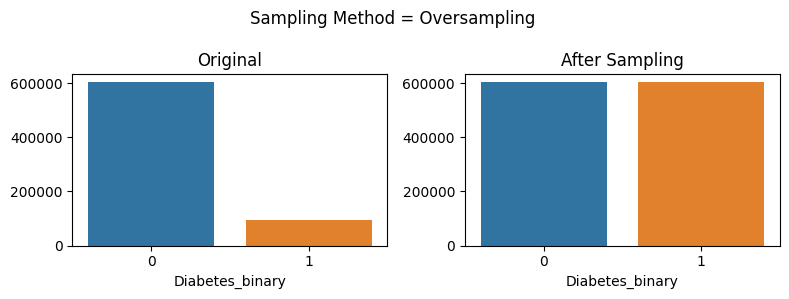

In [104]:
#Importing and handle the additonal samples for an external dataset 
df_train_new=pd.read_csv('/kaggle/input/datasetkaggle/additional_data_BRFSS2013_2015.csv')

df_train_new=df_preparation(df_train_new) # Do the data processing to have the same format of Train Test 

# Doing the same encoding, scaling and feature engineering performed to Train Set
df_train_new_encoded = encode_categorical_features_test(df_train_new, encoders)
df_train_new_scaled = scaler_features_test(df_train_new_encoded, scalers)
df_train_new_scaled_poly_fe = poly_engineered_features_test(df_train_new_scaled, poly, columns_to_transform)

#Concatenate the new training set with Training Set 
df_x_train_new_final=pd.concat([df_x_train_scaled_poly_fe, df_train_new_scaled_poly_fe.drop(columns=['Diabetes_binary'])], axis=0)
df_y_train_new_final=pd.concat([df_y_train_base, df_train_new_scaled_poly_fe[['Unnamed: 0', 'Diabetes_binary']]], axis=0)

# Balance the output df by oversampling
df_x_train_new_final=df_x_train_new_final.drop(columns=["Unnamed: 0", "Age_Group"])
df_y_train_new_final=df_y_train_new_final.drop(columns="Unnamed: 0")
df_x_train_new_final_over, df_y_train_new_final_over=apply_resampling(df_x_train_new_final, df_y_train_new_final, method='Oversampling', random_state=seed)

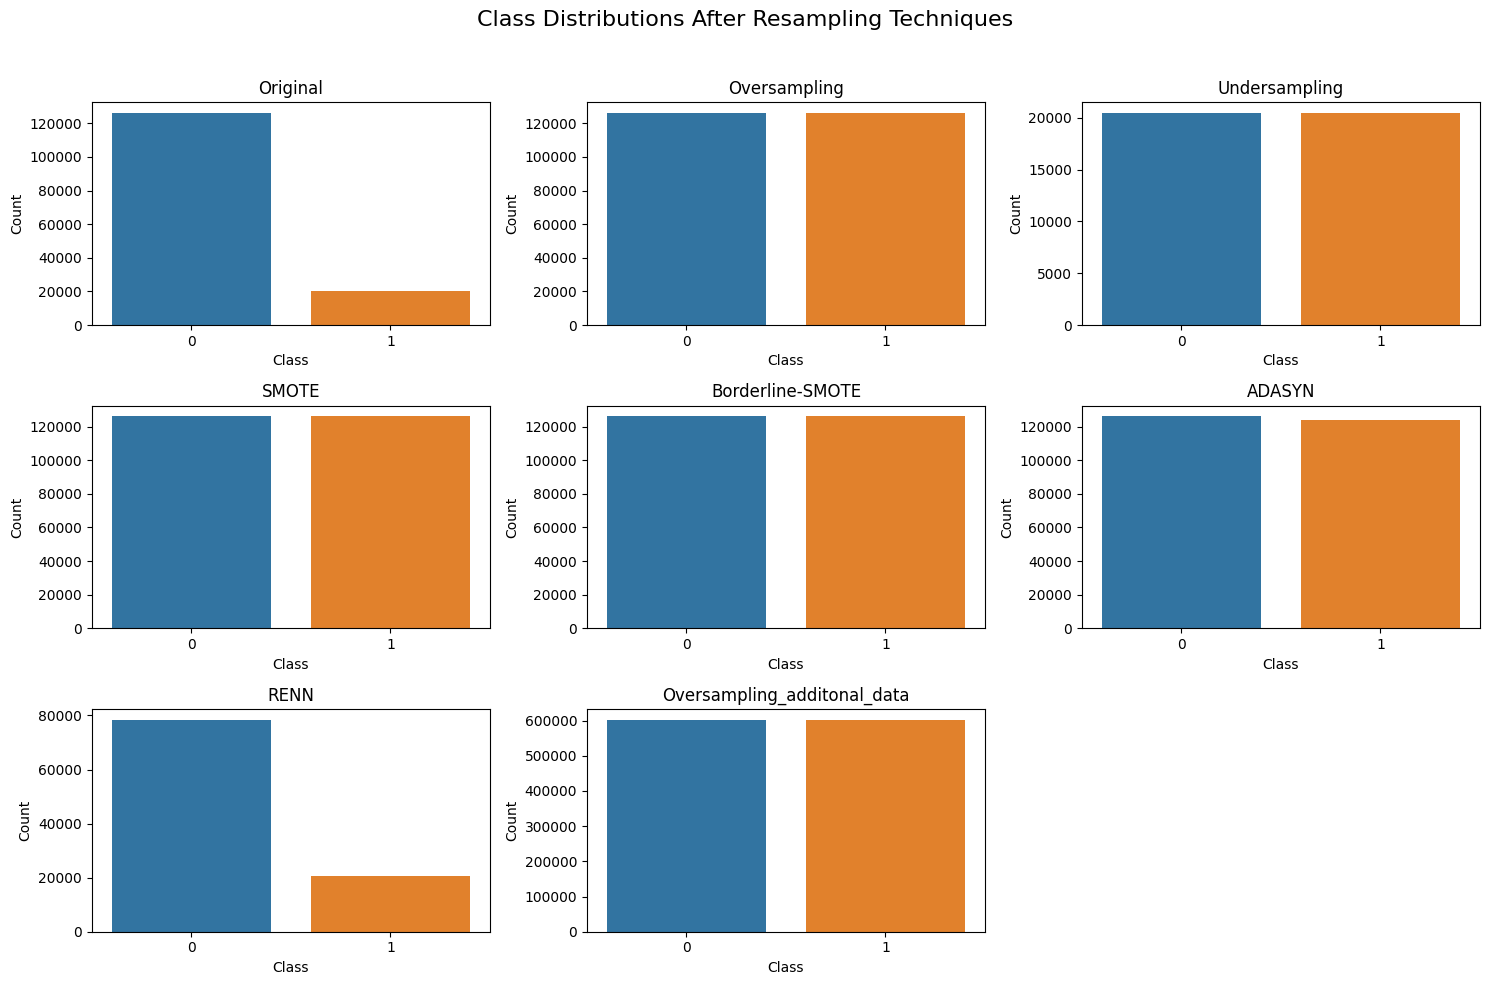

In [105]:
#We append the new dataset in the list of the datasets and plot them all together
X_resampled_dict["Oversampling_additonal_data"]=df_x_train_new_final_over
y_resampled_dict["Oversampling_additonal_data"]=df_y_train_new_final_over

#Plot the Results
plt.figure(figsize=(15, 10))
for idx, technique in enumerate(y_resampled_dict):
    # Plot original and resampled distributions
    plt.subplot(3, 3, idx + 1)  # 3 rows, 2 columns, position idx+1
    sns.barplot(
        x=[0, 1],
        y=y_resampled_dict[technique].value_counts().sort_index().values
    )
    plt.title(f"{technique}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    
# Adding a suptitle
plt.suptitle("Class Distributions After Resampling Techniques", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [106]:
#Import and concatenate the additonal samples for an external dataset 

def df_preparation_add_data(df_x,df_y):
    """
    Import and concatenate additional samples for an external dataset.
    
    Parameters:
        df_x (pd.DataFrame): Original training set.
        df_y (pd.DataFrame): Original Target set.
    
    Returns:
        pd.DataFrame: Concatenated the original training set with additional samples.
        pd.pd.DataFrame: Concatenated the Original target set with additional samples (new targets).
    """
    
    df_train_new=pd.read_csv('/kaggle/input/datasetkaggle/additional_data_BRFSS2013_2015.csv')
    
    df_train_new=df_preparation(df_train_new, print_results=False) # Do the data processing to have the same format of Train Test 
    #Concatenate the new training set with Training Set 
    df_x_train_new_final=pd.concat([df_x, df_train_new.drop(columns=['Diabetes_binary'])], axis=0)
    df_y_train_new_final=pd.concat([df_y, df_train_new[['Unnamed: 0', 'Diabetes_binary']]], axis=0)

    return df_x_train_new_final, df_y_train_new_final
    

In [107]:
# Define a function to do all the preprocessing pipeline

def preprocess_and_transform_train_validation_sets(df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base=None ,scaler_to_use="StandardScaler", sampling_method="Undersampling", seed=seed):
    """
    Preprocesses data using multiple scalers and returns scaled and resampled datasets.

    Parameters:
    ----------
    df_x_train_base (pd.DataFrame): Original unprocessed training dataset.
    df_x_validation_base (pd.DataFrame): Original unprocessed validation dataset.
    df_y_train_base (pd.DataFrame): Target variable (labels) for the training dataset.
    df_y_validation_base (pd.DataFrame): Target variable (labels) for the validation dataset.
    scaler (str) : scaler name (e.g., "StandardScaler", "MinMaxScaler") to apply to the data.
    seed (int, default=seed): Random seed for reproducibility during resampling.

    Returns:
    -------
    X_train_scaler_dict (dict) : Dictionary with scaler names as keys and preprocessed training feature datasets as values.
    y_train_scaler_dict (dict) : Dictionary with scaler names as keys and preprocessed training target datasets as values.
    X_validation_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed validation feature datasets as values.
    y_validation_scaler_dict (dict) : Dictionary with scaler names as keys and preprocessed validation target datasets as values.
    """
    
    start_time = time.time()
    
    if sampling_method=="Oversampling_data":
        df_x_train_base, df_y_train_base= df_preparation_add_data(df_x_train_base,df_y_train_base)
        sampling_method="Oversampling"
    elif sampling_method=="Undersampling_data":
        df_x_train_base, df_y_train_base= df_preparation_add_data(df_x_train_base,df_y_train_base)
        sampling_method="Undersampling"
    elif sampling_method=="RENN_data":
        df_x_train_base, df_y_train_base= df_preparation_add_data(df_x_train_base,df_y_train_base)
        sampling_method="RENN"
        
    # Encode the train set & validation set and display the encoded dataframes
    df_x_train_encoded_, encoders_ = encode_categorical_features_train(df_x_train_base, print_results=False)
    df_x_validation_encoded_ = encode_categorical_features_test(df_x_validation_base, encoders_, print_results=False)
    
    # Scale the train set & validation set
    df_x_train_scaled_, scalers_ = scaler_features_train(df_x_train_encoded_, scaler=scaler_to_use, print_results=False)
    df_x_validation_scaled_ = scaler_features_test(df_x_validation_encoded_, scalers_, print_results=False)
    
    # Polynomial feature engineering
    columns_to_transform_ = ['BMI', 'Age', 'GenHlth', 'Heart_Disease_Risk']
    df_x_train_scaled_poly_fe_, poly_, columns_to_transform_ = poly_engineered_features_train(df_x_train_scaled_, columns_to_transform_, print_results=False)
    df_x_validation_scaled_poly_fe_ = poly_engineered_features_test(df_x_validation_scaled_, poly_, columns_to_transform_, print_results=False)
    
    # Remove "Unnamed: 0" and "Age_Group" columns
    df_x_train_final_ = df_x_train_scaled_poly_fe_.drop(columns=["Unnamed: 0", "Age_Group"])
    df_y_train_final_ = df_y_train_base.drop(columns="Unnamed: 0")
    
    
    df_x_validation_final_ = df_x_validation_scaled_poly_fe_.drop(columns=["Unnamed: 0", "Age_Group"])
    if df_y_validation_base is not None:
        df_y_validation_final_ = df_y_validation_base.drop(columns="Unnamed: 0")
    
    # Balance the Training Set using undersampling
    X_resampled_, y_resampled_ = apply_resampling(df_x_train_final_, df_y_train_final_, method=sampling_method, plot=False, random_state=seed)
    
    # Store the results in dictionaries
    X_train_scaled_normalized = X_resampled_
    y_train_scaled_normalized = y_resampled_
    X_validation_scaled_normalized = df_x_validation_final_
    if df_y_validation_base is not None:
        y_validation_scaled_normalized = df_y_validation_final_
    else: 
        y_validation_scaled_normalized=None
    
    print(f"This code took: {time.time() - start_time} secs")
    
    return X_train_scaled_normalized, y_train_scaled_normalized, X_validation_scaled_normalized, y_validation_scaled_normalized

# X_train_scaled_normalized, y_train_scaled_normalized, X_validation_scaled_normalized, y_validation_scaled_normalized =preprocess_and_transform_train_validation_sets(df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base, scaler_to_use="StandardScaler", sampling_method="Oversampling_data", seed=seed)

In [102]:
for idx, technique in enumerate(y_resampled_dict):
    data=pd.concat([y_resampled_dict[technique],y_resampled_dict[technique]],axis=1)
    data.to_csv(f"{idx}.training_set_{technique}_scaler_MinMax.csv")

# 4. Model Training and Validation

In [108]:
#Prepare the final validation dataset
df_x_validation_final=df_x_validation_scaled_poly_fe.drop(columns=["Unnamed: 0", "Age_Group"])
df_y_validation_final=df_y_validation_base.drop(columns="Unnamed: 0")

## 4.1.) Impact of Training Sampling Technique

In [15]:
def evaluate_techniques(classifier, X_resampled_dict, y_resampled_dict,
                        df_x_validation, df_y_validation, print_all_results=True, print_summary=True):
    """
    Evaluate multiple resampling techniques with a given classifier.

    Parameters:
        classifier: Scikit-learn classifier object (e.g., LogisticRegression()).
        X_resampled_dict (dict): Dictionary containing resampled X set for each technique.
        y_resampled_dict (dict): Dictionary containing resampled labels for each technique.
        df_x_validation (pd.DataFrame): Validation set.
        df_y_validation (pd.DataFrame): Validation labels.
        print_all_results (bool, optional): If True, prints detailed training and validation metrics. Defaults to True.
        print_summary (bool, optional): If True, prints a summary DataFrame of the metrics. Defaults to True.

    Returns:
        results (dict): A dictionary containing metrics for training and validation for each technique.
        summary_df (pd.DataFrame): A DataFrame summarizing the metrics for all techniques.
    """
    
    results = {}
    summary_data = []
    start_time = time.time()
    
    for technique in y_resampled_dict:
        print(f"\n\033[1;34mResults with a Dataset Preprocessed Using the {technique} Technique\033[0m")
        df_x_train = X_resampled_dict[technique]
        df_y_train = y_resampled_dict[technique]
        
        # Train the classifier
        clf = classifier
        clf.fit(df_x_train, df_y_train)
        
        # Predict on training data
        y_train_pred = clf.predict(df_x_train)
        train_metrics = {
            "accuracy": accuracy_score(df_y_train, y_train_pred),
            "f1_score": f1_score(df_y_train, y_train_pred),
            "precision": precision_score(df_y_train, y_train_pred),
            "recall": recall_score(df_y_train, y_train_pred)
        }
        
        # Predict on validation data
        y_val_pred = clf.predict(df_x_validation)
        val_metrics = {
            "accuracy": accuracy_score(df_y_validation, y_val_pred),
            "f1_score": f1_score(df_y_validation, y_val_pred),
            "precision": precision_score(df_y_validation, y_val_pred),
            "recall": recall_score(df_y_validation, y_val_pred)
        }
        
        # Print results
        if print_all_results==True: 
            print("\033[1;32mTraining Metrics:\033[0m")
            print(classification_report(df_y_train, y_train_pred, digits=4))
            print("Confusion Matrix:")
            print(confusion_matrix(df_y_train, y_train_pred))
            
            print("\n\033[1;32mValidation Metrics:\033[0m")
            print(classification_report(df_y_validation, y_val_pred, digits=4))
            print("Confusion Matrix:")
            print(confusion_matrix(df_y_validation, y_val_pred))
            
        # Store results for summary
        summary_data.append([
            technique,
            train_metrics["accuracy"], train_metrics["f1_score"],
            train_metrics["precision"], train_metrics["recall"],
            val_metrics["accuracy"], val_metrics["f1_score"],
            val_metrics["precision"], val_metrics["recall"]
        ])
        
        # Store results for detailed analysis
        results[technique] = {
            "train": train_metrics,
            "validation": val_metrics
        }
    
    # Create summary DataFrame
    summary_df = pd.DataFrame(
        summary_data,
        columns=[
            "Technique", 
            "Train Accuracy", "Train F1 Score", "Train Precision", "Train Recall",
            "Validation Accuracy", "Validation F1 Score", "Validation Precision", "Validation Recall"
        ]
    )
    
    print(f"\n\033[1;33mThis code took: {time.time() - start_time:.2f} seconds\033[0m")
    if print_summary==True:
        print("\n\033[1;36mSummary Report:\033[0m")
        display(summary_df)
        
    return results, summary_df



In [77]:

results_decision_tree, summary_decision_tree=evaluate_techniques(DecisionTreeClassifier(random_state=seed), X_resampled_dict, y_resampled_dict, df_x_validation_final, df_y_validation_final)



Results with the Balanced Dataset Using Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    126144
           1     1.0000    1.0000    1.0000     20482

    accuracy                         1.0000    146626
   macro avg     1.0000    1.0000    1.0000    146626
weighted avg     1.0000    1.0000    1.0000    146626

Confusion Matrix:
[[126144      0]
 [     0  20482]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8864    0.8705    0.8784     22261
           1     0.2818    0.3129    0.2965      3615

    accuracy                         0.7926     25876
   macro avg     0.5841    0.5917    0.5874     25876
weighted avg     0.8019    0.7926    0.7971     25876

Confusion Matrix:
[[19378  2883]
 [ 2484  1131]]

Results with the Balanced Dataset Using Oversampling Technique
Training Metrics:
              precision    recall  f1-score   support

        

Technique  Train Accuracy  Train F1 Score  \
0                     Original         1.00000        1.000000   
1                 Oversampling         1.00000        1.000000   
2                Undersampling         1.00000        1.000000   
3                        SMOTE         1.00000        1.000000   
4             Borderline-SMOTE         1.00000        1.000000   
5                       ADASYN         1.00000        1.000000   
6                         RENN         1.00000        1.000000   
7  Oversampling_additonal_data         0.99384        0.993862   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         1.000000      1.000000             0.792588             0.296500   
1         1.000000      1.000000             0.802558             0.285954   
2         1.000000      1.000000             0.655665             0.337546   
3         1.000000      1.000000             0.772183             0.304261   
4         1.000000      1.000000             0.776009             0.309178   
5         1.000000      1.000000             0.770791             0.304445   
6         1.000000      1.000000             0.733962             0.394547   
7         0.990307      0.997443             0.860952             0.487318   

   Validation Precision  Validation Recall  
0              0.281764           0.312863  
1              0.288983           0.282988  
2              0.230808           0.627939  
3              0.265336           0.356570  
4              0.271623           0.358783  
5              0.264251           0.359059  
6              0.289233           0.620470  
7              0.502498           0.473029

In [88]:

results_knn, summary_knn=evaluate_techniques(KNeighborsClassifier(), X_resampled_dict, y_resampled_dict, df_x_validation_final, df_y_validation_final)



Results with the Balanced Dataset Using Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.9015    0.9728    0.9358    126144
           1     0.6733    0.3451    0.4563     20482

    accuracy                         0.8851    146626
   macro avg     0.7874    0.6590    0.6961    146626
weighted avg     0.8696    0.8851    0.8688    146626

Confusion Matrix:
[[122714   3430]
 [ 13413   7069]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8796    0.9488    0.9129     22261
           1     0.3883    0.2000    0.2640      3615

    accuracy                         0.8442     25876
   macro avg     0.6339    0.5744    0.5885     25876
weighted avg     0.8109    0.8442    0.8222     25876

Confusion Matrix:
[[21122  1139]
 [ 2892   723]]

Results with the Balanced Dataset Using Oversampling Technique
Training Metrics:
              precision    recall  f1-score   support

        

Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.885130        0.456344   
1                 Oversampling        0.899195        0.908080   
2                Undersampling        0.788107        0.793579   
3                        SMOTE        0.891220        0.900414   
4             Borderline-SMOTE        0.895746        0.903628   
5                       ADASYN        0.885737        0.895413   
6                         RENN        0.949921        0.862396   
7  Oversampling_additonal_data        0.919289        0.924443   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         0.673302      0.345132             0.844219             0.264013   
1         0.834520      0.995862             0.716649             0.363431   
2         0.773600      0.814618             0.682370             0.391501   
3         0.830237      0.983551             0.713248             0.369584   
4         0.840112      0.977534             0.730561             0.382790   
5         0.819304      0.987111             0.702543             0.366346   
6         1.000000      0.758080             0.740377             0.408418   
7         0.868954      0.987504             0.831581             0.607529   

   Validation Precision  Validation Recall  
0              0.388292           0.200000  
1              0.264836           0.578976  
2              0.267287           0.731397  
3              0.266708           0.601660  
4              0.281474           0.598064  
5              0.260783           0.615491  
6              0.299574           0.641494  
7              0.450394           0.933057

In [82]:
#Prepare the list of classifiers to be tested
cls_logistic_regression=LogisticRegression(random_state=seed)
cls_decision_tree = DecisionTreeClassifier(random_state=seed)
cls_random_forest = RandomForestClassifier(random_state=seed)
# cls_svm = SVC(random_state=seed)
cls_knn = KNeighborsClassifier()
cls_extra_trees = ExtraTreesClassifier(random_state=seed)
cls_balanced_random_forest = BalancedRandomForestClassifier(random_state=seed)
cls_lgbm = LGBMClassifier(random_state=seed)
cls_xgboost = XGBClassifier(random_state=seed)
cls_catboost = CatBoostClassifier(random_state=seed, verbose=0)
cls_adaboost=AdaBoostClassifier(random_state=seed)
cls_mlp = MLPClassifier(hidden_layer_sizes=(100,),random_state=seed)
trained_models = {
        'Logistic Regression': cls_logistic_regression,
        'LGBM': cls_lgbm,
        'XGBoost': cls_xgboost,
        'CatBoost': cls_catboost,
        'AdaBoost': cls_adaboost,
        'Decision Tree': cls_decision_tree,        
        'Random Forest': cls_random_forest,        
        'Extra Trees': cls_extra_trees,
        'Balanced Random Forest': cls_balanced_random_forest,
        'Multi-layer Perceptron': cls_mlp,
        'KNN':cls_knn, 
        # 'SVM': cls_svm,
        }

# Initialize an empty list for storing the results
Results_multiple_classifiers = pd.DataFrame()

for classifier_name, classifier in trained_models.items():
    print (f"Results for {classifier_name} Classifier")
    results_, summary_=evaluate_techniques(classifier, X_resampled_dict, y_resampled_dict,
                                                                df_x_validation_final, df_y_validation_final,
                                                                print_all_results=False, print_summary=False)
    summary_['Classifier']=classifier_name 
    # Append the results to the main DataFrame
    Results_multiple_classifiers = pd.concat([Results_multiple_classifiers, summary_], axis=0)

# Display the final results
display(Results_multiple_classifiers)



Results with the Balanced Dataset Using Original Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results with the Balanced Dataset Using Oversampling Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results with the Balanced Dataset Using Undersampling Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results with the Balanced Dataset Using SMOTE Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results with the Balanced Dataset Using Borderline-SMOTE Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results with the Balanced Dataset Using ADASYN Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results with the Balanced Dataset Using RENN Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Results with the Balanced Dataset Using Oversampling_additonal_data Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



This code took: 37.84 seconds

Results with the Balanced Dataset Using Original Technique

Results with the Balanced Dataset Using Oversampling Technique

Results with the Balanced Dataset Using Undersampling Technique

Results with the Balanced Dataset Using SMOTE Technique

Results with the Balanced Dataset Using Borderline-SMOTE Technique

Results with the Balanced Dataset Using ADASYN Technique

Results with the Balanced Dataset Using RENN Technique

Results with the Balanced Dataset Using Oversampling_additonal_data Technique

This code took: 68.48 seconds


Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.864185        0.233251   
1                 Oversampling        0.745787        0.754912   
2                Undersampling        0.743702        0.752423   
3                        SMOTE        0.757773        0.765949   
4             Borderline-SMOTE        0.775106        0.784749   
5                       ADASYN        0.738539        0.745883   
6                         RENN        0.892544        0.714792   
7  Oversampling_additonal_data        0.749654        0.758681   
0                     Original        1.000000        1.000000   
1                 Oversampling        1.000000        1.000000   
2                Undersampling        1.000000        1.000000   
3                        SMOTE        1.000000        1.000000   
4             Borderline-SMOTE        1.000000        1.000000   
5                       ADASYN        1.000000        1.000000   
6                         RENN        1.000000        1.000000   
7  Oversampling_additonal_data        0.993840        0.993862   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         0.551730      0.147886             0.864469             0.234781   
1         0.728753      0.783018             0.718890             0.435687   
2         0.727662      0.778928             0.722484             0.438238   
3         0.740940      0.792705             0.729324             0.438242   
4         0.752485      0.819904             0.732571             0.439585   
5         0.719405      0.774384             0.713016             0.428593   
6         0.793225      0.650474             0.784897             0.454741   
7         0.732276      0.787063             0.711354             0.434980   
0         1.000000      1.000000             0.792588             0.296500   
1         1.000000      1.000000             0.802558             0.285954   
2         1.000000      1.000000             0.655665             0.337546   
3         1.000000      1.000000             0.772183             0.304261   
4         1.000000      1.000000             0.776009             0.309178   
5         1.000000      1.000000             0.770791             0.304445   
6         1.000000      1.000000             0.733962             0.394547   
7         0.990307      0.997443             0.860952             0.487318   

   Validation Precision  Validation Recall           Classifier  
0              0.555785           0.148824  Logistic Regression  
1              0.302749           0.776763  Logistic Regression  
2              0.305519           0.774827  Logistic Regression  
3              0.308596           0.755740  Logistic Regression  
4              0.310775           0.750761  Logistic Regression  
5              0.296877           0.770401  Logistic Regression  
6              0.352040           0.642047  Logistic Regression  
7              0.299354           0.795297  Logistic Regression  
0              0.281764           0.312863        Decision Tree  
1              0.288983           0.282988        Decision Tree  
2              0.230808           0.627939        Decision Tree  
3              0.265336           0.356570        Decision Tree  
4              0.271623           0.358783        Decision Tree  
5              0.264251           0.359059        Decision Tree  
6              0.289233           0.620470        Decision Tree  
7              0.502498           0.473029        Decision Tree

In [ ]:
#Prepare the list of classifiers to be tested

cls_logistic_regression=LogisticRegression(random_state=seed)
cls_decision_tree = DecisionTreeClassifier(random_state=seed)
cls_random_forest = RandomForestClassifier(random_state=seed)
# cls_svm = SVC(random_state=seed)
cls_knn = KNeighborsClassifier()
cls_extra_trees = ExtraTreesClassifier(random_state=seed)
cls_balanced_random_forest = BalancedRandomForestClassifier(random_state=seed)
cls_lgbm = LGBMClassifier(random_state=seed, verbose=-1)
cls_xgboost = XGBClassifier(random_state=seed)
cls_catboost = CatBoostClassifier(random_state=seed, verbose=0)
cls_adaboost=AdaBoostClassifier(random_state=seed)
cls_mlp = MLPClassifier(hidden_layer_sizes=(100,),random_state=seed)
trained_models = {
        'Logistic Regression': cls_logistic_regression,
        'LGBM': cls_lgbm,
        'XGBoost': cls_xgboost,
        'CatBoost': cls_catboost,
        'AdaBoost': cls_adaboost,
        'Decision Tree': cls_decision_tree,        
        'Random Forest': cls_random_forest,        
        'Extra Trees': cls_extra_trees,
        'Balanced Random Forest': cls_balanced_random_forest,
        'Multi-layer Perceptron': cls_mlp,
        # 'KNN':cls_knn, 
        # 'SVM': cls_svm,
        }

# Initialize an empty list for storing the results
Results_multiple_classifiers = pd.DataFrame()

for classifier_name, classifier in trained_models.items():
    print (f"Results for {classifier_name} Classifier")
    results_, summary_=evaluate_techniques(classifier, X_resampled_dict, y_resampled_dict,
                                                                df_x_validation_final, df_y_validation_final,
                                                                print_all_results=True, print_summary=True)
    summary_['Classifier']=classifier_name 
    # Append the results to the main DataFrame
    Results_multiple_classifiers = pd.concat([Results_multiple_classifiers, summary_], axis=0)

# Display the final results
display(Results_multiple_classifiers)


Results for Logistic Regression Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.8763    0.9805    0.9255    126144
           1     0.5517    0.1479    0.2333     20482

    accuracy                         0.8642    146626
   macro avg     0.7140    0.5642    0.5794    146626
weighted avg     0.8310    0.8642    0.8288    146626

Confusion Matrix:
[[123683   2461]
 [ 17453   3029]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8765    0.9807    0.9257     22261
           1     0.5558    0.1488    0.2348      3615

    accuracy                         0.8645     25876
   macro avg     0.7161    0.5648    0.5802     25876
weighted avg     0.8317    0.8645    0.8291     25876

Confusion Matrix:
[[21831   430]
 [ 3077   538]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
        

Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.864185        0.233251   
1                 Oversampling        0.745818        0.754951   
2                Undersampling        0.743531        0.752275   
3                        SMOTE        0.757761        0.765935   
4             Borderline-SMOTE        0.775122        0.784753   
5                       ADASYN        0.738259        0.745723   
6                         RENN        0.892544        0.714792   
7  Oversampling_additonal_data        0.749662        0.758691   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         0.551730      0.147886             0.864469             0.234781   
1         0.728766      0.783089             0.719006             0.435788   
2         0.727472      0.778830             0.722214             0.437998   
3         0.740934      0.792681             0.729324             0.438242   
4         0.752525      0.819865             0.732571             0.439495   
5         0.718955      0.774562             0.713248             0.429055   
6         0.793225      0.650474             0.784897             0.454741   
7         0.732280      0.787079             0.711354             0.434980   

   Validation Precision  Validation Recall  
0              0.555785           0.148824  
1              0.302847           0.776763  
2              0.305286           0.774827  
3              0.308596           0.755740  
4              0.310732           0.750484  
5              0.297196           0.771231  
6              0.352040           0.642047  
7              0.299354           0.795297

Results for LGBM Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.8787    0.9847    0.9287    126144
           1     0.6340    0.1627    0.2590     20482

    accuracy                         0.8699    146626
   macro avg     0.7564    0.5737    0.5938    146626
weighted avg     0.8445    0.8699    0.8352    146626

Confusion Matrix:
[[124220   1924]
 [ 17149   3333]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8772    0.9830    0.9271     22261
           1     0.5935    0.1527    0.2429      3615

    accuracy                         0.8670     25876
   macro avg     0.7354    0.5679    0.5850     25876
weighted avg     0.8376    0.8670    0.8315     25876

Confusion Matrix:
[[21883   378]
 [ 3063   552]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
              precision

Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.869921        0.258984   
1                 Oversampling        0.765621        0.776425   
2                Undersampling        0.772068        0.782278   
3                        SMOTE        0.895734        0.890834   
4             Borderline-SMOTE        0.896618        0.892125   
5                       ADASYN        0.894271        0.887500   
6                         RENN        0.905420        0.749947   
7  Oversampling_additonal_data        0.757936        0.769523   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         0.634012      0.162728             0.867020             0.242904   
1         0.742213      0.813943             0.723837             0.440758   
2         0.748739      0.818963             0.714910             0.436052   
3         0.934767      0.850845             0.848895             0.362985   
4         0.932659      0.854967             0.846846             0.362349   
5         0.938656      0.841632             0.849436             0.343887   
6         0.828297      0.685138             0.781458             0.458178   
7         0.734370      0.808211             0.713286             0.438593   

   Validation Precision  Validation Recall  
0              0.593548           0.152697  
1              0.307323           0.778976  
2              0.301289           0.788935  
3              0.441538           0.308160  
4              0.433077           0.311480  
5              0.439518           0.282434  
6              0.350484           0.661411  
7              0.301875           0.801660

Results for XGBoost Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.8887    0.9864    0.9350    126144
           1     0.7412    0.2394    0.3619     20482

    accuracy                         0.8821    146626
   macro avg     0.8150    0.6129    0.6485    146626
weighted avg     0.8681    0.8821    0.8550    146626

Confusion Matrix:
[[124432   1712]
 [ 15578   4904]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8784    0.9770    0.9251     22261
           1     0.5416    0.1674    0.2557      3615

    accuracy                         0.8639     25876
   macro avg     0.7100    0.5722    0.5904     25876
weighted avg     0.8314    0.8639    0.8316     25876

Confusion Matrix:
[[21749   512]
 [ 3010   605]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
              precis

Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.882081        0.361946   
1                 Oversampling        0.808073        0.817063   
2                Undersampling        0.823162        0.829191   
3                        SMOTE        0.906123        0.901568   
4             Borderline-SMOTE        0.906864        0.902712   
5                       ADASYN        0.903221        0.896980   
6                         RENN        0.921672        0.793366   
7  Oversampling_additonal_data        0.768323        0.779351   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         0.741233      0.239430             0.863889             0.255706   
1         0.780501      0.857219             0.740184             0.439142   
2         0.801852      0.858461             0.710813             0.426810   
3         0.947541      0.859851             0.847503             0.344736   
4         0.944833      0.864187             0.847658             0.352709   
5         0.949124      0.850268             0.849900             0.341695   
6         0.873943      0.726394             0.778443             0.454260   
7         0.743939      0.818302             0.726117             0.443677   

   Validation Precision  Validation Recall  
0              0.541629           0.167358  
1              0.314381           0.728077  
2              0.295127           0.770678  
3              0.431242           0.287137  
4              0.433939           0.297095  
5              0.441138           0.278838  
6              0.346299           0.660028  
7              0.309733           0.781743

Results for CatBoost Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.8925    0.9908    0.9391    126144
           1     0.8245    0.2650    0.4011     20482

    accuracy                         0.8895    146626
   macro avg     0.8585    0.6279    0.6701    146626
weighted avg     0.8830    0.8895    0.8640    146626

Confusion Matrix:
[[124989   1155]
 [ 15054   5428]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8786    0.9782    0.9257     22261
           1     0.5545    0.1674    0.2571      3615

    accuracy                         0.8649     25876
   macro avg     0.7165    0.5728    0.5914     25876
weighted avg     0.8333    0.8649    0.8323     25876

Confusion Matrix:
[[21775   486]
 [ 3010   605]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
              preci

Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.889453        0.401108   
1                 Oversampling        0.814466        0.822870   
2                Undersampling        0.793502        0.801790   
3                        SMOTE        0.914364        0.910153   
4             Borderline-SMOTE        0.915347        0.911398   
5                       ADASYN        0.912640        0.907097   
6                         RENN        0.922380        0.793781   
7  Oversampling_additonal_data        0.781895        0.791694   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         0.824548      0.265013             0.864894             0.257119   
1         0.787212      0.861912             0.743314             0.439304   
2         0.770849      0.835319             0.716765             0.435319   
3         0.957217      0.867501             0.850634             0.340331   
4         0.955996      0.870775             0.849706             0.333276   
5         0.958786      0.860695             0.848701             0.319958   
6         0.881921      0.721658             0.780182             0.454964   
7         0.757654      0.828937             0.739527             0.443894   

   Validation Precision  Validation Recall  
0              0.554537           0.167358  
1              0.316122           0.719779  
2              0.301687           0.781466  
3              0.444296           0.275795  
4              0.438233           0.268880  
5              0.429972           0.254772  
6              0.348043           0.656708  
7              0.316285           0.744122

Results for AdaBoost Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.8776    0.9799    0.9259    126144
           1     0.5611    0.1583    0.2470     20482

    accuracy                         0.8651    146626
   macro avg     0.7193    0.5691    0.5865    146626
weighted avg     0.8334    0.8651    0.8311    146626

Confusion Matrix:
[[123607   2537]
 [ 17239   3243]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8780    0.9808    0.9265     22261
           1     0.5760    0.1604    0.2510      3615

    accuracy                         0.8662     25876
   macro avg     0.7270    0.5706    0.5888     25876
weighted avg     0.8358    0.8662    0.8322     25876

Confusion Matrix:
[[21834   427]
 [ 3035   580]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
              preci

Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.865126        0.246973   
1                 Oversampling        0.744066        0.752132   
2                Undersampling        0.743091        0.751300   
3                        SMOTE        0.834951        0.836779   
4             Borderline-SMOTE        0.836310        0.839974   
5                       ADASYN        0.825987        0.828901   
6                         RENN        0.892625        0.715829   
7  Oversampling_additonal_data        0.749029        0.756933   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         0.561073      0.158334             0.866208             0.250974   
1         0.729154      0.776605             0.722252             0.438823   
2         0.728039      0.776096             0.723450             0.440150   
3         0.827611      0.846152             0.790926             0.443072   
4         0.821583      0.859209             0.785631             0.444578   
5         0.808239      0.850647             0.776086             0.434952   
6         0.791588      0.653305             0.785206             0.457014   
7         0.733822      0.781547             0.716108             0.435010   

   Validation Precision  Validation Recall  
0              0.575968           0.160443  
1              0.305701           0.777317  
2              0.306862           0.778147  
3              0.352845           0.595297  
4              0.348399           0.614108  
5              0.335894           0.616874  
6              0.353270           0.647026  
7              0.301268           0.782296

Results for Decision Tree Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    126144
           1     1.0000    1.0000    1.0000     20482

    accuracy                         1.0000    146626
   macro avg     1.0000    1.0000    1.0000    146626
weighted avg     1.0000    1.0000    1.0000    146626

Confusion Matrix:
[[126144      0]
 [     0  20482]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8873    0.8714    0.8793     22261
           1     0.2870    0.3187    0.3020      3615

    accuracy                         0.7942     25876
   macro avg     0.5872    0.5951    0.5907     25876
weighted avg     0.8035    0.7942    0.7987     25876

Confusion Matrix:
[[19399  2862]
 [ 2463  1152]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
              

Technique  Train Accuracy  Train F1 Score  \
0                     Original         1.00000        1.000000   
1                 Oversampling         1.00000        1.000000   
2                Undersampling         1.00000        1.000000   
3                        SMOTE         1.00000        1.000000   
4             Borderline-SMOTE         1.00000        1.000000   
5                       ADASYN         1.00000        1.000000   
6                         RENN         1.00000        1.000000   
7  Oversampling_additonal_data         0.99384        0.993862   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         1.000000      1.000000             0.794211             0.302006   
1         1.000000      1.000000             0.803331             0.290336   
2         1.000000      1.000000             0.655859             0.338558   
3         1.000000      1.000000             0.773844             0.309743   
4         1.000000      1.000000             0.778057             0.314923   
5         1.000000      1.000000             0.771874             0.305121   
6         1.000000      1.000000             0.735083             0.392341   
7         0.990307      0.997443             0.862575             0.488934   

   Validation Precision  Validation Recall  
0              0.286996           0.318672  
1              0.292745           0.287967  
2              0.231418           0.630429  
3              0.269998           0.363209  
4              0.276846           0.365145  
5              0.265574           0.358506  
6              0.288677           0.612172  
7              0.508824           0.470539

Results for Random Forest Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.9999    1.0000    1.0000    126144
           1     1.0000    0.9996    0.9998     20482

    accuracy                         0.9999    146626
   macro avg     1.0000    0.9998    0.9999    146626
weighted avg     0.9999    0.9999    0.9999    146626

Confusion Matrix:
[[126144      0]
 [     8  20474]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8771    0.9781    0.9249     22261
           1     0.5366    0.1563    0.2421      3615

    accuracy                         0.8633     25876
   macro avg     0.7068    0.5672    0.5835     25876
weighted avg     0.8296    0.8633    0.8295     25876

Confusion Matrix:
[[21773   488]
 [ 3050   565]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
              

Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.999945        0.999805   
1                 Oversampling        1.000000        1.000000   
2                Undersampling        1.000000        1.000000   
3                        SMOTE        0.999988        0.999988   
4             Borderline-SMOTE        0.999988        0.999988   
5                       ADASYN        0.999996        0.999996   
6                         RENN        0.999980        0.999951   
7  Oversampling_additonal_data        0.993840        0.993864   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         1.000000      0.999609             0.863271             0.242074   
1         1.000000      1.000000             0.852064             0.343846   
2         1.000000      1.000000             0.713634             0.426559   
3         1.000000      0.999976             0.838499             0.374495   
4         1.000000      0.999976             0.837378             0.371377   
5         1.000000      0.999992             0.837494             0.366621   
6         1.000000      0.999902             0.781071             0.451119   
7         0.989955      0.997805             0.937548             0.740193   

   Validation Precision  Validation Recall  
0              0.536562           0.156293  
1              0.452005           0.277455  
2              0.296121           0.762379  
3              0.408023           0.346058  
4              0.403703           0.343845  
5              0.402447           0.336653  
6              0.347152           0.643983  
7              0.883685           0.636791

Results for Extra Trees Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    126144
           1     1.0000    1.0000    1.0000     20482

    accuracy                         1.0000    146626
   macro avg     1.0000    1.0000    1.0000    146626
weighted avg     1.0000    1.0000    1.0000    146626

Confusion Matrix:
[[126144      0]
 [     0  20482]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8791    0.9689    0.9218     22261
           1     0.4832    0.1793    0.2615      3615

    accuracy                         0.8586     25876
   macro avg     0.6811    0.5741    0.5916     25876
weighted avg     0.8238    0.8586    0.8295     25876

Confusion Matrix:
[[21568   693]
 [ 2967   648]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
              pr

Technique  Train Accuracy  Train F1 Score  \
0                     Original         1.00000        1.000000   
1                 Oversampling         1.00000        1.000000   
2                Undersampling         1.00000        1.000000   
3                        SMOTE         1.00000        1.000000   
4             Borderline-SMOTE         1.00000        1.000000   
5                       ADASYN         1.00000        1.000000   
6                         RENN         1.00000        1.000000   
7  Oversampling_additonal_data         0.99384        0.993862   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         1.000000      1.000000             0.858556             0.261501   
1         1.000000      1.000000             0.858788             0.237161   
2         1.000000      1.000000             0.706176             0.419308   
3         1.000000      1.000000             0.832548             0.376457   
4         1.000000      1.000000             0.832818             0.382882   
5         1.000000      1.000000             0.832084             0.373649   
6         1.000000      1.000000             0.757227             0.435580   
7         0.990307      0.997443             0.961006             0.844889   

   Validation Precision  Validation Recall  
0              0.483221           0.179253  
1              0.483404           0.157123  
2              0.289618           0.759336  
3              0.392322           0.361826  
4              0.395287           0.371231  
5              0.390126           0.358506  
6              0.322555           0.670539  
7              0.950865           0.760166

Results for Balanced Random Forest Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     1.0000    0.7607    0.8641    126144
           1     0.4043    1.0000    0.5758     20482

    accuracy                         0.7941    146626
   macro avg     0.7021    0.8804    0.7199    146626
weighted avg     0.9168    0.7941    0.8238    146626

Confusion Matrix:
[[95961 30183]
 [    0 20482]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9512    0.7060    0.8105     22261
           1     0.3003    0.7770    0.4332      3615

    accuracy                         0.7159     25876
   macro avg     0.6258    0.7415    0.6218     25876
weighted avg     0.8603    0.7159    0.7578     25876

Confusion Matrix:
[[15716  6545]
 [  806  2809]]

Results with a Dataset Preprocessed Using the Oversampling Technique
Training Metrics:
         

Technique  Train Accuracy  Train F1 Score  \
0                     Original        0.794150        0.575766   
1                 Oversampling        1.000000        1.000000   
2                Undersampling        1.000000        1.000000   
3                        SMOTE        0.999992        0.999992   
4             Borderline-SMOTE        0.999984        0.999984   
5                       ADASYN        1.000000        1.000000   
6                         RENN        0.924007        0.844908   
7  Oversampling_additonal_data        0.993840        0.993864   

   Train Precision  Train Recall  Validation Accuracy  Validation F1 Score  \
0         0.404263      1.000000             0.715914             0.433187   
1         1.000000      1.000000             0.853725             0.349991   
2         1.000000      1.000000             0.711625             0.424228   
3         1.000000      0.999984             0.837262             0.375315   
4         1.000000      0.999968             0.836876             0.376422   
5         1.000000      1.000000             0.837765             0.374739   
6         0.731490      0.999951             0.670969             0.414765   
7         0.989982      0.997777             0.937973             0.742500   

   Validation Precision  Validation Recall  
0              0.300299           0.777040  
1              0.461504           0.281881  
2              0.294168           0.760443  
3              0.404671           0.349931  
4              0.403932           0.352420  
5              0.405937           0.347994  
6              0.275954           0.834578  
7              0.883881           0.640111

Results for Multi-layer Perceptron Classifier

Results with a Dataset Preprocessed Using the Original Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.8837    0.9781    0.9285    126144
           1     0.6052    0.2072    0.3087     20482

    accuracy                         0.8704    146626
   macro avg     0.7445    0.5926    0.6186    146626
weighted avg     0.8448    0.8704    0.8419    146626

Confusion Matrix:
[[123376   2768]
 [ 16238   4244]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.8815    0.9751    0.9259     22261
           1     0.5564    0.1925    0.2861      3615

    accuracy                         0.8657     25876
   macro avg     0.7189    0.5838    0.6060     25876
weighted avg     0.8360    0.8657    0.8365     25876

Confusion Matrix:
[[21706   555]
 [ 2919   696]]

Results with a Dataset Preprocessed Using the Oversampling Technique


## 4.2.) Impact of Scaler

In [7]:
# Define a function to do all the preprocessing pipeline

def preprocess_with_scalers(scaler_list, df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base, sampling_method="Undersampling", seed=seed):
    """
    Preprocesses data using multiple scalers and returns scaled and resampled datasets.
    
    Parameters:
    ----------
        scaler_list (list): List of scaler names (e.g., "StandardScaler", "MinMaxScaler") to apply to the data.
        df_x_train_base (pd.DataFrame): Original unprocessed training dataset.
        df_x_validation_base (pd.DataFrame): Original unprocessed validation dataset.
        df_y_train_base (pd.DataFrame): Target labels for the training dataset.
        df_y_validation_base (pd.DataFrame): Target labels for the validation dataset.
        sampling_method (str, default="Undersampling"): Resampling method to use for balancing the training set.
        seed (int, default=42): Random seed for reproducibility during resampling.

    Returns:
    -------
        X_train_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed training feature datasets as values.
        y_train_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed training target datasets as values.
        X_validation_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed validation feature datasets as values.
        y_validation_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed validation target datasets as values.
    """
    
    X_train_scaler_dict = {}
    y_train_scaler_dict = {}
    X_validation_scaler_dict = {}
    y_validation_scaler_dict = {}
    
    start_time = time.time()
    
    for scaler_to_use in scaler_list:
        # Encode the train set & validation set and display the encoded dataframes
        df_x_train_encoded_, encoders_ = encode_categorical_features_train(df_x_train_base, print_results=False)
        df_x_validation_encoded_ = encode_categorical_features_test(df_x_validation_base, encoders_, print_results=False)
        
        # Scale the train set & validation set
        df_x_train_scaled_, scalers_ = scaler_features_train(df_x_train_encoded_, scaler=scaler_to_use, print_results=False)
        df_x_validation_scaled_ = scaler_features_test(df_x_validation_encoded_, scalers_, print_results=False)
        
        # Polynomial feature engineering
        columns_to_transform_ = ['BMI', 'Age', 'GenHlth', 'Heart_Disease_Risk']
        df_x_train_scaled_poly_fe_, poly_, columns_to_transform_ = poly_engineered_features_train(df_x_train_scaled_, columns_to_transform_, print_results=False)
        df_x_validation_scaled_poly_fe_ = poly_engineered_features_test(df_x_validation_scaled_, poly_, columns_to_transform_, print_results=False)
    
        # Remove unnecessary columns
        df_x_train_final_ = df_x_train_scaled_poly_fe_.drop(columns=["Unnamed: 0", "Age_Group"])
        df_y_train_final_ = df_y_train_base.drop(columns="Unnamed: 0")
    
        df_x_validation_final_ = df_x_validation_scaled_poly_fe_.drop(columns=["Unnamed: 0", "Age_Group"])
        df_y_validation_final_ = df_y_validation_base.drop(columns="Unnamed: 0")
    
        # Balance the Training Set using undersampling
        X_resampled_, y_resampled_ = apply_resampling(df_x_train_final_, df_y_train_final_, method=sampling_method, plot=False, random_state=seed)
    
        # Store the results in dictionaries
        X_train_scaler_dict[scaler_to_use] = X_resampled_
        y_train_scaler_dict[scaler_to_use] = y_resampled_
        X_validation_scaler_dict[scaler_to_use] = df_x_validation_final_
        y_validation_scaler_dict[scaler_to_use] = df_y_validation_final_
    
    print(f"This code took: {time.time() - start_time} secs")
    
    return X_train_scaler_dict, y_train_scaler_dict, X_validation_scaler_dict, y_validation_scaler_dict


def evaluate_classifiers_scalers(X_train_scaler_dict, y_train_scaler_dict, X_validation_scaler_dict, y_validation_scaler_dict, trained_models, print_results=True):
    """
    Evaluates multiple classifiers using datasets preprocessed with different scalers.
    
    Parameters:
    ----------
        X_train_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed training feature datasets as values.
        y_train_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed training target datasets as values.
        X_validation_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed validation feature datasets as values.
        y_validation_scaler_dict (dict): Dictionary with scaler names as keys and preprocessed validation target datasets as values.
        trained_models (dict): Dictionary of classifiers to evaluate, with keys as classifier names and values as classifier objects.
        print_results (bool, default=True): Whether to print the results.

    Returns:
    -------
        Results_multiple_classifiers (pd.DataFrame): DataFrame containing the evaluation results for each classifier and scaler combination.
        f1score_results (pd.DataFrame): DataFrame containing the F1 scores for each classifier and scaler combination.
    """
    
    Results_multiple_classifiers = pd.DataFrame()
    f1score_results = pd.DataFrame(columns=["Classifier"] + list(X_train_scaler_dict.keys()))  # Only the validation F1 score will be stored here
    f1score_results['Classifier'] = list(trained_models.keys())
    
    for classifier_name, classifier in trained_models.items():
        print(f"\n\033[1;32mResults for {classifier_name} Classifier\033[0m")
        for scaler_name in X_train_scaler_dict.keys():
            print(f"\n\033[1;34mResults Using {scaler_name} Scaler\033[0m")
            XX_train_dict = {scaler_name: X_train_scaler_dict[scaler_name]}
            yy_train_dict = {scaler_name: y_train_scaler_dict[scaler_name]}
            XX_validation = X_validation_scaler_dict[scaler_name]
            yy_validation = y_validation_scaler_dict[scaler_name]
    
            results_, summary_ = evaluate_techniques(classifier, XX_train_dict, yy_train_dict,
                                                     XX_validation, yy_validation,
                                                     print_all_results=False, print_summary=False)
            
            summary_['Classifier'] = classifier_name
            summary_['Scaler'] = scaler_name 
            
            # Update f1score_results DataFrame correctly
            f1score_results.loc[f1score_results['Classifier'] == classifier_name, scaler_name] = summary_.loc[summary_['Scaler'] == scaler_name, 'Validation F1 Score'].values[0]
            
            Results_multiple_classifiers = pd.concat([Results_multiple_classifiers, summary_], axis=0)
    
    # Display the final results
    if print_results:
        display(Results_multiple_classifiers)
        display(f1score_results)
        
    return Results_multiple_classifiers, f1score_results


In [91]:
#Prepare the list of classifiers to be tested

cls_logistic_regression=LogisticRegression(random_state=seed)
cls_decision_tree = DecisionTreeClassifier(random_state=seed)
cls_random_forest = RandomForestClassifier(random_state=seed)
# cls_svm = SVC(random_state=seed)
cls_knn = KNeighborsClassifier()
cls_extra_trees = ExtraTreesClassifier(random_state=seed)
cls_balanced_random_forest = BalancedRandomForestClassifier(random_state=seed)
cls_lgbm = LGBMClassifier(random_state=seed)
cls_xgboost = XGBClassifier(random_state=seed)
cls_catboost = CatBoostClassifier(random_state=seed, verbose=0)
cls_adaboost=AdaBoostClassifier(random_state=seed)
cls_mlp = MLPClassifier(hidden_layer_sizes=(100,),random_state=seed)

trained_models = {
        'Logistic Regression': cls_logistic_regression,
        'LGBM': cls_lgbm,
        'XGBoost': cls_xgboost,
        'CatBoost': cls_catboost,
        'AdaBoost': cls_adaboost,
        'Decision Tree': cls_decision_tree,        
        'Random Forest': cls_random_forest,        
        'Extra Trees': cls_extra_trees,
        'Balanced Random Forest': cls_balanced_random_forest,
        'Multi-layer Perceptron': cls_mlp,
        'KNN':cls_knn, 
        # 'SVM': cls_svm,
        }

# List of scalers to be tested
scaler_list = ["StandardScaler", "MinMaxScaler", "RobustScaler", "MaxAbsScaler", "QuantileTransformer", "PowerTransformer"]

# Preprocess data
X_train_scaler_dict, y_train_scaler_dict, X_validation_scaler_dict, y_validation_scaler_dict = preprocess_with_scalers(
    scaler_list, df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base, seed=seed)

# Evaluate models with each scaler
Results_multiple_classifiers, f1score_results = evaluate_classifiers_scalers(X_train_scaler_dict, y_train_scaler_dict, X_validation_scaler_dict, y_validation_scaler_dict, trained_models)


This code took: 4.845718145370483 secs

Results for Logistic Regression Classifier

Results Using StandardScaler Scaler

Results with a Dataset Preprocessed Using the StandardScaler Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



This code took: 0.95 seconds

Results Using MinMaxScaler Scaler

Results with a Dataset Preprocessed Using the MinMaxScaler Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



This code took: 1.01 seconds

Results Using RobustScaler Scaler

Results with a Dataset Preprocessed Using the RobustScaler Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



This code took: 0.97 seconds

Results Using MaxAbsScaler Scaler

Results with a Dataset Preprocessed Using the MaxAbsScaler Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



This code took: 1.02 seconds

Results Using QuantileTransformer Scaler

Results with a Dataset Preprocessed Using the QuantileTransformer Technique


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



This code took: 1.04 seconds

Results Using PowerTransformer Scaler

Results with a Dataset Preprocessed Using the PowerTransformer Technique

This code took: 0.97 seconds

Results for LGBM Classifier

Results Using StandardScaler Scaler

Results with a Dataset Preprocessed Using the StandardScaler Technique
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20482, number of negative: 20482
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2400
[LightGBM] [Info] Number of data points in the train set: 40964, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

This code took: 1.49 seconds

Results Using MinMaxScaler Scaler

Results with a Dataset Preprocessed Usin

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



This code took: 82.47 seconds

Results Using MinMaxScaler Scaler

Results with a Dataset Preprocessed Using the MinMaxScaler Technique


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



This code took: 87.97 seconds

Results Using RobustScaler Scaler

Results with a Dataset Preprocessed Using the RobustScaler Technique


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



This code took: 85.88 seconds

Results Using MaxAbsScaler Scaler

Results with a Dataset Preprocessed Using the MaxAbsScaler Technique


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



This code took: 89.89 seconds

Results Using QuantileTransformer Scaler

Results with a Dataset Preprocessed Using the QuantileTransformer Technique


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



This code took: 84.16 seconds

Results Using PowerTransformer Scaler

Results with a Dataset Preprocessed Using the PowerTransformer Technique


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



This code took: 83.03 seconds

Results for KNN Classifier

Results Using StandardScaler Scaler

Results with a Dataset Preprocessed Using the StandardScaler Technique

This code took: 20.48 seconds

Results Using MinMaxScaler Scaler

Results with a Dataset Preprocessed Using the MinMaxScaler Technique

This code took: 21.28 seconds

Results Using RobustScaler Scaler

Results with a Dataset Preprocessed Using the RobustScaler Technique

This code took: 20.29 seconds

Results Using MaxAbsScaler Scaler

Results with a Dataset Preprocessed Using the MaxAbsScaler Technique

This code took: 20.49 seconds

Results Using QuantileTransformer Scaler

Results with a Dataset Preprocessed Using the QuantileTransformer Technique

This code took: 20.32 seconds

Results Using PowerTransformer Scaler

Results with a Dataset Preprocessed Using the PowerTransformer Technique

This code took: 20.31 seconds


Technique  Train Accuracy  Train F1 Score  Train Precision  \
0        StandardScaler        0.743458        0.752944         0.726094   
0          MinMaxScaler        0.743726        0.752382         0.727800   
0          RobustScaler        0.743677        0.753104         0.726390   
0          MaxAbsScaler        0.743531        0.751995         0.727971   
0   QuantileTransformer        0.739112        0.748937         0.721757   
..                  ...             ...             ...              ...   
0          MinMaxScaler        0.788107        0.793579         0.773600   
0          RobustScaler        0.792965        0.798182         0.778562   
0          MaxAbsScaler        0.788937        0.794094         0.775153   
0   QuantileTransformer        0.787716        0.792844         0.774144   
0      PowerTransformer        0.790890        0.795395         0.778620   

    Train Recall  Validation Accuracy  Validation F1 Score  \
0       0.781857             0.719856             0.437320   
0       0.778684             0.722330             0.437925   
0       0.781857             0.719663             0.437238   
0       0.777658             0.722793             0.437897   
0       0.778244             0.715296             0.433002   
..           ...                  ...                  ...   
0       0.814618             0.682370             0.391501   
0       0.818817             0.692302             0.399366   
0       0.813983             0.683375             0.392436   
0       0.812469             0.679665             0.385773   
0       0.812909             0.687587             0.388595   

    Validation Precision  Validation Recall           Classifier  \
0               0.303949           0.779253  Logistic Regression   
0               0.305301           0.774274  Logistic Regression   
0               0.303827           0.779530  Logistic Regression   
0               0.305489           0.772891  Logistic Regression   
0               0.299957           0.778147  Logistic Regression   
..                   ...                ...                  ...   
0               0.267287           0.731397                  KNN   
0               0.274557           0.732227                  KNN   
0               0.268085           0.731950                  KNN   
0               0.263462           0.720055                  KNN   
0               0.267409           0.710650                  KNN   

                 Scaler  
0        StandardScaler  
0          MinMaxScaler  
0          RobustScaler  
0          MaxAbsScaler  
0   QuantileTransformer  
..                  ...  
0          MinMaxScaler  
0          RobustScaler  
0          MaxAbsScaler  
0   QuantileTransformer  
0      PowerTransformer  

[66 rows x 11 columns]

Classifier StandardScaler MinMaxScaler RobustScaler  \
0      Logistic Regression        0.43732     0.437925     0.437238   
1                     LGBM       0.436275     0.436052     0.435116   
2                  XGBoost       0.427074      0.42681     0.428825   
3                 CatBoost       0.439409     0.436137     0.439687   
4                 AdaBoost       0.435091      0.44015      0.43583   
5            Decision Tree       0.346168     0.339841     0.345405   
6            Random Forest       0.427443     0.424756     0.425279   
7              Extra Trees       0.415547     0.415212     0.418346   
8   Balanced Random Forest       0.427356     0.426935     0.424351   
9   Multi-layer Perceptron       0.423247     0.431893     0.423298   
10                     KNN       0.393677     0.391501     0.399366   

   MaxAbsScaler QuantileTransformer PowerTransformer  
0      0.437897            0.433002          0.43652  
1      0.435426            0.437764         0.436959  
2      0.427818            0.426134         0.426363  
3      0.438382            0.436676         0.436682  
4      0.437422            0.436361         0.436156  
5      0.337151            0.344105         0.338876  
6      0.426078            0.426439         0.426906  
7      0.411818            0.416501         0.418516  
8      0.426202            0.426675         0.426841  
9      0.432312            0.417295         0.415122  
10     0.392436            0.385773         0.388595

In [103]:
f1score_results_copy=f1score_results .copy()
f1score_results_copy.iloc[:,1:]=f1score_results_copy.iloc[:,1:].applymap(lambda x: round(x * 100, 2))
f1score_results_copy

Classifier StandardScaler MinMaxScaler RobustScaler  \
0      Logistic Regression          43.73        43.79        43.72   
1                     LGBM          43.63        43.61        43.51   
2                  XGBoost          42.71        42.68        42.88   
3                 CatBoost          43.94        43.61        43.97   
4                 AdaBoost          43.51        44.02        43.58   
5            Decision Tree          34.62        33.98        34.54   
6            Random Forest          42.74        42.48        42.53   
7              Extra Trees          41.55        41.52        41.83   
8   Balanced Random Forest          42.74        42.69        42.44   
9   Multi-layer Perceptron          42.32        43.19        42.33   
10                     KNN          39.37        39.15        39.94   

   MaxAbsScaler QuantileTransformer PowerTransformer  
0         43.79                43.3            43.65  
1         43.54               43.78             43.7  
2         42.78               42.61            42.64  
3         43.84               43.67            43.67  
4         43.74               43.64            43.62  
5         33.72               34.41            33.89  
6         42.61               42.64            42.69  
7         41.18               41.65            41.85  
8         42.62               42.67            42.68  
9         43.23               41.73            41.51  
10        39.24               38.58            38.86

## 4.3.) Hyperparameter Tuning

In [16]:
#Prepare the training data and validation data based on the sampling technique
X_train_normalized_oversampling, y_train_normalized_oversampling, X_validation_normalized_oversampling, y_validation_normalized_oversampling =preprocess_and_transform_train_validation_sets(df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base, scaler_to_use="StandardScaler", sampling_method="Oversampling_data", seed=seed)
X_train_normalized_renn, y_train_normalized_renn, X_validation_normalized_renn, y_validation_normalized_renn =preprocess_and_transform_train_validation_sets(df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base, scaler_to_use="MinMaxScaler", sampling_method="RENN", seed=seed)


This code took: 3.2228658199310303 secs
This code took: 249.76736569404602 secs


In [26]:
def evaluate_model_validation(model_name, model, df_x_train, df_y_train, df_x_validation, df_y_validation,
                              print_all_results=True, print_summary=True):
    """
    Evaluates the performance of a classifier model on training and validation datasets.

    Parameters:
    ----------
        model_name (str): Name of the model being evaluated.
        model: The classifier model to be evaluated.
        df_x_train (pd.DataFrame): Training dataset.
        df_y_train (pd.DataFrame): Training target dataset.
        df_x_validation (pd.DataFrame): Validation dataset.
        df_y_validation (pd.DataFrame): Validation target dataset.
        print_all_results (bool, default=True): Whether to print detailed results for training and validation metrics.
        print_summary (bool, default=True): Whether to print the summary report.

    Returns:
    -------
        results (dict): A dictionary containing the training and validation metrics.
        summary_df (pd.DataFrame): A DataFrame summarizing the metrics for the model.
    """
    
    # Predict on training data
    y_train_pred = model.predict(df_x_train)
    train_metrics = {
        "accuracy": accuracy_score(df_y_train, y_train_pred),
        "f1_score": f1_score(df_y_train, y_train_pred),
        "precision": precision_score(df_y_train, y_train_pred),
        "recall": recall_score(df_y_train, y_train_pred)
    }

    # Predict on validation data
    y_val_pred = model.predict(df_x_validation)
    val_metrics = {
        "accuracy": accuracy_score(df_y_validation, y_val_pred),
        "f1_score": f1_score(df_y_validation, y_val_pred),
        "precision": precision_score(df_y_validation, y_val_pred),
        "recall": recall_score(df_y_validation, y_val_pred)
    }

    # Print results
    if print_all_results:
        print("\033[1;32mTraining Metrics:\033[0m")
        print(classification_report(df_y_train, y_train_pred, digits=4))
        print("Confusion Matrix:")
        print(confusion_matrix(df_y_train, y_train_pred))

        print("\n\033[1;32mValidation Metrics:\033[0m")
        print(classification_report(df_y_validation, y_val_pred, digits=4))
        print("Confusion Matrix:")
        print(confusion_matrix(df_y_validation, y_val_pred))

    # Store results for summary (adjusted format)
    summary_data = {
        model_name: [
            train_metrics["accuracy"], train_metrics["f1_score"],
            train_metrics["precision"], train_metrics["recall"],
            val_metrics["accuracy"], val_metrics["f1_score"],
            val_metrics["precision"], val_metrics["recall"]
        ]
    }

    # Store results for detailed analysis
    results = {
        model_name: {
            "train": train_metrics,
            "validation": val_metrics
        }
    }

    # Create summary DataFrame
    summary_df = pd.DataFrame(
        summary_data
    ).T  # Transpose to have models as rows, metrics as columns

    # Set the correct column names
    summary_df.columns = [
        "Train Accuracy", "Train F1 Score", "Train Precision", "Train Recall",
        "Validation Accuracy", "Validation F1 Score", "Validation Precision", "Validation Recall"
    ]

    # Print summary report if requested
    if print_summary:
        print("\n\033[1;36mSummary Report:\033[0m")
        display(summary_df)

    return results, summary_df


In [28]:
#This function can perform hyperparameter search based on the validation set
#or k-fold cross validation if not available or not provided 
# hyperparameter grid for each model is included within the function
def perform_optuna_search(model_name, 
    X_train, y_train, 
    X_val=None, y_val=None, 
    n_trials=10, 
    kfold=None,  # if None, the validation set will be used
    verbose=3, 
    seed=seed, 
    scoring=f1_score):
    """
    Optimizes hyperparameters for a classifier model using Optuna.

    Parameters:
    ----------
        model_name (str): Name of the model to optimize (e.g., "Logistic Regression", "Decision Tree", etc.).
        X_train (pd.DataFrame): Training features.
        y_train (pd.DataFrame): Training labels.
        X_val (pd.DataFrame, optional): Validation dataset. If None, k-fold cross-validation is used.
        y_val (pd.DataFrame, optional): Validation labels. Required if X_val is provided.
        n_trials (int): Number of trials for optimization.
        kfold (int, optional): Number of folds for cross-validation. If None, validation set will be used.
        verbose (int): Verbosity level for logging.
        seed (int): Random seed for reproducibility (42).
        scoring (callable): Scoring function to evaluate model performance. Default is F1 score

    Returns:
    -------
        best_model: The best model found during the optimization.
        best_params (dict): The best hyperparameters found for the model.
        elapsed_time (float): Time taken for the optimization process.
        study : Holds the optimization state and results
    """
    
    start_time = time.time()
    
    # Store the best model
    best_model = None
    best_model_score = 0
    best_params={}
    step=0 #track the trials 

    #Calculate the class imbalance if any and use it to balance the prediction
    negative_class_count = (y_train == 0).sum().sum()
    positive_class_count = (y_train == 1).sum().sum()
    scale_pos_weight = negative_class_count / positive_class_count

    # Define the objective function
    def objective(trial):
        nonlocal best_model_score, best_model, best_params, step
        # Define the hyperparameter range for all the algorithms 
        if model_name=="Logistic Regression":
            model=LogisticRegression(random_state=seed)
            params = {#Initial grid search
                    # 'C': trial.suggest_loguniform('C', 0.001, 100),
                    # 'penalty':trial.suggest_categorical('penalty', [None, 'l1', 'l2', 'elasticnet']), #, 'elasticnet'
                    # 'max_iter': trial.suggest_int('max_iter', 100, 1000),
                    # 'tol': trial.suggest_loguniform('tol', 1e-5, 1e-1),
                    # 'class_weight':trial.suggest_categorical('class_weight', [None, 'balanced']),
                    # 'solver':trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']),

                     #Optimized grid search with optuna
                    'C': trial.suggest_loguniform('C', 0.01, 20),
                    'penalty':trial.suggest_categorical('penalty', [None, 'l2']), 
                    'max_iter': trial.suggest_int('max_iter', 100, 1000),
                    'tol': trial.suggest_loguniform('tol', 1e-3, 1e-1),
                    'class_weight':trial.suggest_categorical('class_weight', [None, 'balanced']),
                    'solver':trial.suggest_categorical('solver', ['lbfgs', 'newton-cg']),
                     }
            
        elif model_name=="Decision Tree":
            model=DecisionTreeClassifier(random_state=seed)
            params = {#Initial grid search
                    # 'criterion': trial.suggest_categorical('criterion', [ 'entropy', 'gini','log_loss']),
                    # 'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
                    # 'max_depth': trial.suggest_categorical('max_depth', [None] + list(range(2, 60))),  #trial.suggest_int('max_depth', 2, 50),
                    # 'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                    # 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
                    # # 'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
                    # 'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),

                    #Optimized grid search with optuna
                    'criterion': 'log_loss', #trial.suggest_categorical('criterion', [ 'entropy', 'gini','log_loss']),
                    'splitter': 'random', #trial.suggest_categorical('splitter', ['random']), #'best', 
                    # 'max_depth': None, #trial.suggest_categorical('max_depth', [None] + list(range(2, 100))),  #trial.suggest_int('max_depth', 2, 50),
                    'max_depth': trial.suggest_categorical('max_depth', [None] + list(range(48, 52))),  #trial.suggest_int('max_depth', 2, 50),
                    'min_samples_split': trial.suggest_int('min_samples_split', 8, 14), #trial.suggest_int('min_samples_split', 2, 20),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 6), #trial.suggest_int('min_samples_leaf', 1, 20),
                    # 'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
                    'class_weight': None, #trial.suggest_categorical('class_weight', [None, 'balanced']),
                    }
            
        elif model_name=="Random Forest":
            model=RandomForestClassifier(random_state=seed)
            params = {#Initial grid search
                    # 'n_estimators': trial.suggest_int('n_estimators', 10, 500),  
                    # 'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
                    # 'max_depth': trial.suggest_categorical('max_depth', [None] + list(range(2, 60))), #'max_depth': trial.suggest_int('max_depth', 2, 50), 
                    # 'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                    # 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
                    # # 'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    # 'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
                    # 'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
                    # 'n_jobs':-1

                    #Optimized grid search with optuna
                    'n_estimators': trial.suggest_int('n_estimators', 300, 500),  
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
                    'max_depth': trial.suggest_categorical('max_depth', [None] + list(range(20, 60))), #'max_depth': trial.suggest_int('max_depth', 2, 50), 
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
                    # 'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
                    'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced_subsample']),
                    'n_jobs':-1
                    }
 
        elif model_name=="Extra Trees":
            model=ExtraTreesClassifier(random_state=seed)
            params = {
                    'n_estimators': trial.suggest_int('n_estimators', 10, 500),
                    'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
                    'max_depth': trial.suggest_categorical('max_depth', [None] + list(range(2, 60))), 
                    'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                    # 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
                    # 'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                    'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
                    'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
                    'n_jobs':-1
                    }

        elif model_name=="XGBoost":
            model=XGBClassifier(random_state=seed) #, tree_method='hist', device='cuda') 
            params = {
                    # 'n_estimators': trial.suggest_int('n_estimators', 10, 500), 
                    # 'max_depth': trial.suggest_int('max_depth', 3, 15),  
                    # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1), 
                    # 'subsample': trial.suggest_uniform('subsample', 0.6, 1.0), 
                    # 'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0), 
                    # 'gamma': trial.suggest_uniform('gamma', 0, 1),  
                    # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  
                    # 'scale_pos_weight': trial.suggest_float('scale_pos_weight', scale_pos_weight/2, scale_pos_weight*2), ##0.5, 10),  
                    # # 'eval_metric': 'logloss',  
                    # # 'objective': 'binary:logistic',  
                    # 'booster': trial.suggest_categorical('booster', ['gbtree', 'dart'])  

                    'n_estimators': trial.suggest_int('n_estimators', 300, 1000), 
                    'max_depth': trial.suggest_int('max_depth', 15, 25),  
                    'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.01), 
                    'subsample': trial.suggest_uniform('subsample', 0.6, 1.0), 
                    'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0), 
                    'gamma': trial.suggest_uniform('gamma', 0, 1),  
                    'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  
                    'scale_pos_weight': trial.suggest_float('scale_pos_weight', scale_pos_weight/6, scale_pos_weight*0.7), ##0.5, 10),  
                    # 'eval_metric': 'logloss',  
                    # 'objective': 'binary:logistic',  
                    'booster': trial.suggest_categorical('booster', ['gbtree', 'dart'])  
                    }
        elif model_name=="CatBoost":
            model=CatBoostClassifier(random_state=seed, verbose=0)
            params = {#Initial grid search
                    # 'iterations': trial.suggest_int('iterations', 100, 2000),  
                    # 'depth': trial.suggest_int('depth', 4, 12),  
                    # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.2),  
                    # 'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
                    # 'border_count': trial.suggest_int('border_count', 32, 255),  
                    # 'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 5), 
                    # "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
                    # 'random_strength': trial.suggest_uniform('random_strength', 0, 10),  
                    # 'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 1, 10),  
                    # "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 20),
                    # "subsample": trial.suggest_float("subsample", 0.5, 1),
                    
                    #Optimized grid search with optuna
                    'iterations': trial.suggest_int('iterations', 500, 1200),  
                    'depth': trial.suggest_int('depth', 4, 7),  
                    'learning_rate': trial.suggest_loguniform('learning_rate', 5*1e-3, 0.03),  
                    'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 1), 
                    'border_count': trial.suggest_int('border_count', 175, 255),  
                    'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1), 
                    "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
                    'random_strength': trial.suggest_uniform('random_strength', 0.5, 10),  
                    'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 4, 9), 
                    "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 20),
                    "subsample": trial.suggest_float("subsample", 0.5, 1),
                    }


        elif model_name=="LGBM":
            model=LGBMClassifier(random_state=seed) #, device='gpu') 
            params = {#Initial grid search
                    # 'n_estimators': trial.suggest_int('n_estimators', 100, 500),  
                    # 'max_depth': trial.suggest_int('max_depth', -1, 15),  
                    # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),  
                    # 'num_leaves': trial.suggest_int('num_leaves', 20, 150),  
                    # 'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),  
                    # 'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),  
                    # 'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),  
                    # 'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),  
                    # 'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 10),              
                    # 'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 10), 
                    # 'scale_pos_weight': trial.suggest_float('scale_pos_weight', scale_pos_weight/2, scale_pos_weight*2),#0.5, 10.0),  
                    # 'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
                    # 'verbose': -1, 

                    #Optimized grid search with optuna
                    'n_estimators': trial.suggest_int('n_estimators', 100, 500),  
                    'max_depth': trial.suggest_int('max_depth', -1, 15),  
                    'learning_rate': trial.suggest_loguniform('learning_rate', 1e-2, 0.2),  
                    'num_leaves': trial.suggest_int('num_leaves', 30, 125),  
                    'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 0.8),  
                    'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 0.85),  
                    'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),  
                    'min_child_samples': trial.suggest_int('min_child_samples', 20, 50),  
                    'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-4, 10),              
                    'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-4, 10), 
                    'scale_pos_weight': trial.suggest_float('scale_pos_weight', scale_pos_weight/8, scale_pos_weight*0.7), #scale_pos_weight/2, scale_pos_weight*2),#0.5, 10.0),  
                    'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
                    'verbose': -1, 
                     }
            
        elif model_name=="AdaBoost":
            model=AdaBoostClassifier(random_state=seed)
            params = {#Initial grid search
                     # 'n_estimators': trial.suggest_int('n_estimators', 50, 1000),  
                     # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-2, 1.0),  
                     # 'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),  
                    
                    #Optimized grid search with optuna
                     'n_estimators': trial.suggest_int('n_estimators', 400, 1200),  
                     'learning_rate': trial.suggest_loguniform('learning_rate', 2*1e-2, 1.5),  
                     'algorithm': trial.suggest_categorical('algorithm', ['SAMME.R']), 
                      }
            
        elif model_name=="KNN":
            model=KNeighborsClassifier()
            params = {
                    'n_neighbors': trial.suggest_int('n_neighbors', 2, 20),  
                    'weights': trial.suggest_categorical('weights', ['uniform', 'distance']), 
                    # 'metric': trial.suggest_categorical('metric', ['minkowski']),  
                    # 'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree']), 
                    'leaf_size': trial.suggest_int('leaf_size', 10, 100), 
                    'p': trial.suggest_int('p', 1, 2), 
                    'n_jobs':-1
                    }
            
        elif model_name=="MLP":
            model=MLPClassifier(random_state=seed, verbose=0)
            params = {
                    # 'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(10,), (20,), (30,), (50,), (100,), (150,), (20,10), (150,50), (30,100), (200, ), (200, 50), (100, 200), (350, 500, 50)]), 
                    # 'activation': trial.suggest_categorical('activation', ['relu', 'logistic']),
                    # 'solver': trial.suggest_categorical('solver', ['adam']),  
                    # 'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
                    # 'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),  
                    # 'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1), 
                    # 'batch_size': trial.suggest_categorical('batch_size', ['auto', 64, 128]),
                    # 'max_iter': trial.suggest_int('max_iter', 200, 500),
                    # 'early_stopping': trial.suggest_categorical('early_stopping', [True]),

                    'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(20,), (10,), (50,), (20,10)]),
                    'activation': trial.suggest_categorical('activation', ['relu', 'logistic']),
                    'solver': trial.suggest_categorical('solver', ['adam']),  
                    'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-3),
                    'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),  
                    'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-1), 
                    'batch_size': trial.suggest_categorical('batch_size', ['auto', 64]),
                    'max_iter': trial.suggest_int('max_iter', 500, 1000),
                    'early_stopping': trial.suggest_categorical('early_stopping', [True]),
                    'warm_start': trial.suggest_categorical('warm_start', [True, False]),
                    }

        print(params)
        try:
            # Set model parameters
            model.set_params(**params)
            
            if kfold is not None:  # Perform k-fold cross-validation
                strat_kfold = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=seed)
                scores = cross_val_score(model, X_train, y_train,cv=strat_kfold, scoring=make_scorer(scoring), n_jobs=-1)
                score = scores.mean()
            else:  # Use validation set
                model.fit(X_train, y_train)
                y_val_pred = model.predict(X_val)
                score = scoring(y_val, y_val_pred)
                print(f"f1_val={score}")
                step+=1

                trial.report(score, step)  # Report the validation score

                if trial.should_prune():
                    raise optuna.TrialPruned()
                
                # Update the best model if current score is better
                if score > best_model_score:
                    best_model_score = score
                    best_model = model
                    best_params=params
                    
        except Exception as e:
            print(f"Skipping trial due to error {e}")
            return 0.0  # Return 0 score if any error occurs
        
        return score
    
    # Initialize the Optuna study
    sampler = optuna.samplers.TPESampler(seed=seed)
    study = optuna.create_study(direction='maximize', sampler=sampler)
    
    # Progress bar for trials
    with tqdm(total=n_trials) as pbar:
        def callback(study, trial):
            pbar.update(1)
        study.optimize(objective, n_trials=n_trials, callbacks=[callback], show_progress_bar=False)
    
    # Get the best parameters and score
    # best_params = study.best_params
    best_score = study.best_value
    
    print(f"Best parameters: {best_params}")
    print(f"Best score: {best_score}")
    print(f"This code took : {time.time() - start_time} secs")

    #Print the summary of the best model
    if kfold is None:
        results_bestparmas, summary_bestparmas=evaluate_model_validation(model_name, best_model,X_train, y_train, X_val, y_val, print_all_results=True,print_summary=True)

    # Visualize optimization history
    try:
        # Visualize optuna Plot optimization history
        optuna.visualization.plot_optimization_history(study).show()
        # Visualize optuna Plot_intermediate_values(study)
        optuna.visualization.plot_intermediate_values(study).show()
        # Visualize optuna countour(study)
        optuna.visualization.plot_contour(study).show()
        # Visualize optuna plot_slice(study)
        optuna.visualization.plot_slice(study).show()
        # Visualize the params importance
        optuna.visualization.plot_param_importances(study).show()
        
       
    except Exception as e:
        print(f"Visualization failed: {e}")

    return study, best_params, best_score, best_model

In [40]:
#Best Grid search params for LGBM
# Best parameters: {'n_estimators': 392, 'max_depth': 4, 'learning_rate': 0.19060193473144568, 'num_leaves': 48, 'feature_fraction': 0.7282260187793446, 'bagging_fraction': 0.8210430083307704, 'bagging_freq': 9, 'min_child_samples': 35, 'lambda_l1': 0.0017932708527137202, 'lambda_l2': 0.000496378062923298, 'scale_pos_weight': 0.8565612870876943, 'boosting_type': 'dart', 'verbose': -1}
# Best score: 0.46259464916708737
# This code took : 819.2451057434082 secs

# Do Grid search for LGBM (RENN_MinMax)
model_name="MLP"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_MLP, best_params_MLP, best_score_MLP, best_model_MLP  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=20, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/20 [00:00<?, ?it/s]

{'hidden_layer_sizes': (10,), 'activation': 'relu', 'solver': 'adam', 'alpha': 1.3066739238053272e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.013311216080736894, 'batch_size': 64, 'max_iter': 917, 'early_stopping': True, 'warm_start': True}


  5%|▌         | 1/20 [00:13<04:21, 13.78s/it]

f1_val=0.4562442561012969
{'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 1.9010245319870364e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0023345864076016252, 'batch_size': 'auto', 'max_iter': 757, 'early_stopping': True, 'warm_start': True}


 10%|█         | 2/20 [00:27<04:12, 14.00s/it]

f1_val=0.45652867936575503
{'hidden_layer_sizes': (20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 4.066563313514796e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0020914981329035616, 'batch_size': 64, 'max_iter': 517, 'early_stopping': True, 'warm_start': True}


 15%|█▌        | 3/20 [00:44<04:15, 15.04s/it]

f1_val=0.4550295285119566
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0003550304858128307, 'learning_rate': 'constant', 'learning_rate_init': 0.00621870472776908, 'batch_size': 'auto', 'max_iter': 598, 'early_stopping': True, 'warm_start': False}


 20%|██        | 4/20 [00:49<03:01, 11.33s/it]

f1_val=0.45860501877099386
{'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 1.913588048769229e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.09133995846860977, 'batch_size': 'auto', 'max_iter': 502, 'early_stopping': True, 'warm_start': True}


 25%|██▌       | 5/20 [01:02<02:55, 11.68s/it]

f1_val=0.45504440674583374
{'hidden_layer_sizes': (10,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00017643967683381525, 'learning_rate': 'constant', 'learning_rate_init': 0.0008569331925053991, 'batch_size': 64, 'max_iter': 819, 'early_stopping': True, 'warm_start': True}


 30%|███       | 6/20 [01:16<02:54, 12.46s/it]

f1_val=0.45589536827613336
{'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00011103647313054615, 'learning_rate': 'constant', 'learning_rate_init': 0.00021070472806578247, 'batch_size': 64, 'max_iter': 657, 'early_stopping': True, 'warm_start': False}


 35%|███▌      | 7/20 [01:28<02:43, 12.59s/it]

f1_val=0.45697145221348784
{'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 2.101079931010355e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.007947147424653748, 'batch_size': 'auto', 'max_iter': 593, 'early_stopping': True, 'warm_start': True}


 40%|████      | 8/20 [01:50<03:03, 15.29s/it]

f1_val=0.4593406593406593
{'hidden_layer_sizes': (10,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0004325432427964555, 'learning_rate': 'constant', 'learning_rate_init': 0.0034059785435329977, 'batch_size': 'auto', 'max_iter': 560, 'early_stopping': True, 'warm_start': False}


 45%|████▌     | 9/20 [01:57<02:21, 12.89s/it]

f1_val=0.45713152938844287
{'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 3.188339735100187e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.000715354779469316, 'batch_size': 64, 'max_iter': 751, 'early_stopping': True, 'warm_start': False}


 50%|█████     | 10/20 [02:06<01:57, 11.70s/it]

f1_val=0.45855846671424194
{'hidden_layer_sizes': (20, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 5.463331403485189e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0345404674300015, 'batch_size': 'auto', 'max_iter': 681, 'early_stopping': True, 'warm_start': True}


 55%|█████▌    | 11/20 [02:17<01:42, 11.38s/it]

f1_val=0.44878147436545657
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0008611382274356358, 'learning_rate': 'constant', 'learning_rate_init': 0.009511916422275472, 'batch_size': 'auto', 'max_iter': 622, 'early_stopping': True, 'warm_start': False}


 60%|██████    | 12/20 [02:25<01:22, 10.27s/it]

f1_val=0.4565133359103209
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00031605137560501115, 'learning_rate': 'constant', 'learning_rate_init': 0.009893752309313466, 'batch_size': 'auto', 'max_iter': 592, 'early_stopping': True, 'warm_start': False}


 65%|██████▌   | 13/20 [02:31<01:03,  9.13s/it]

f1_val=0.4570866141732284
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 9.174385522435317e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.02170237330341361, 'batch_size': 'auto', 'max_iter': 1000, 'early_stopping': True, 'warm_start': False}


 70%|███████   | 14/20 [02:35<00:46,  7.68s/it]

f1_val=0.4555589032841217
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0007126797739944138, 'learning_rate': 'constant', 'learning_rate_init': 0.004775357426131463, 'batch_size': 'auto', 'max_iter': 694, 'early_stopping': True, 'warm_start': True}


 75%|███████▌  | 15/20 [02:48<00:45,  9.14s/it]

f1_val=0.4565845877778886
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00022969397507810352, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0009173826786868063, 'batch_size': 'auto', 'max_iter': 573, 'early_stopping': True, 'warm_start': False}


 80%|████████  | 16/20 [03:09<00:51, 12.87s/it]

f1_val=0.4596742153357171
{'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00020024958145196985, 'learning_rate': 'adaptive', 'learning_rate_init': 0.00011130922167674131, 'batch_size': 'auto', 'max_iter': 825, 'early_stopping': True, 'warm_start': True}


 85%|████████▌ | 17/20 [03:30<00:45, 15.20s/it]

f1_val=0.44963817719538435
{'hidden_layer_sizes': (20, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 7.937088354609575e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0008493806034096678, 'batch_size': 'auto', 'max_iter': 569, 'early_stopping': True, 'warm_start': False}


 90%|█████████ | 18/20 [03:43<00:29, 14.55s/it]

f1_val=0.4596505006872177
{'hidden_layer_sizes': (20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 9.039968302142688e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0006306615675152891, 'batch_size': 'auto', 'max_iter': 536, 'early_stopping': True, 'warm_start': False}


 95%|█████████▌| 19/20 [03:51<00:12, 12.54s/it]

f1_val=0.45649969580206856
{'hidden_layer_sizes': (20, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00017678506718982016, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0003498422473233628, 'batch_size': 'auto', 'max_iter': 703, 'early_stopping': True, 'warm_start': False}


100%|██████████| 20/20 [04:14<00:00, 12.72s/it]

f1_val=0.46053378762067015
Best parameters: {'hidden_layer_sizes': (20, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00017678506718982016, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0003498422473233628, 'batch_size': 'auto', 'max_iter': 703, 'early_stopping': True, 'warm_start': False}
Best score: 0.46053378762067015
This code took : 254.33068823814392 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9178    0.9524    0.9348     78461
           1     0.7868    0.6731    0.7255     20482

    accuracy                         0.8946     98943
   macro avg     0.8523    0.8127    0.8301     98943
weighted avg     0.8906    0.8946    0.8914     98943

Confusion Matrix:
[[74725  3736]
 [ 6696 13786]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9375    0.7970    0.8616     22261
           1     0.3500    0.6730    0.4605      3615

    accuracy                         0.7797     25876
   macro avg     0.6438    0.7350    0.6611     25876
weighted avg     0.8555    0.7797    0.8056     25876

Confusion Matrix:
[[17743  4518]
 [ 1182  2433]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
MLP        0.894566        0.725503         0.786782      0.673079   

     Validation Accuracy  Validation F1 Score  Validation Precision  \
MLP             0.779719             0.460534              0.350022   

     Validation Recall  
MLP           0.673029

[W 2024-12-06 17:08:09,306] Param early_stopping unique value length is less than 2.
[W 2024-12-06 17:08:09,307] Param solver unique value length is less than 2.
[W 2024-12-06 17:08:09,309] Param early_stopping unique value length is less than 2.
[W 2024-12-06 17:08:09,310] Param solver unique value length is less than 2.
[W 2024-12-06 17:08:09,311] Param early_stopping unique value length is less than 2.
[W 2024-12-06 17:08:09,312] Param solver unique value length is less than 2.
[W 2024-12-06 17:08:09,313] Param early_stopping unique value length is less than 2.
[W 2024-12-06 17:08:09,314] Param early_stopping unique value length is less than 2.
[W 2024-12-06 17:08:09,315] Param early_stopping unique value length is less than 2.
[W 2024-12-06 17:08:09,315] Param early_stopping unique value length is less than 2.
[W 2024-12-06 17:08:09,316] Param early_stopping unique value length is less than 2.
[W 2024-12-06 17:08:09,318] Param early_stopping unique value length is less than 2.
[W 2

In [33]:
#Best Grid search params for LGBM
# Best parameters: {'n_estimators': 392, 'max_depth': 4, 'learning_rate': 0.19060193473144568, 'num_leaves': 48, 'feature_fraction': 0.7282260187793446, 'bagging_fraction': 0.8210430083307704, 'bagging_freq': 9, 'min_child_samples': 35, 'lambda_l1': 0.0017932708527137202, 'lambda_l2': 0.000496378062923298, 'scale_pos_weight': 0.8565612870876943, 'boosting_type': 'dart', 'verbose': -1}
# Best score: 0.46259464916708737
# This code took : 819.2451057434082 secs

# Do Grid search for LGBM (RENN_MinMax)
model_name="MLP"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_MLP, best_params_MLP, best_score_MLP, best_model_MLP  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=10, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/10 [00:00<?, ?it/s]

{'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 1.7073967431528103e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.013311216080736894, 'batch_size': 64, 'max_iter': 733, 'early_stopping': True}


 10%|█         | 1/10 [00:10<01:34, 10.49s/it]

f1_val=0.4588164734106358
{'hidden_layer_sizes': (150,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001461896279370495, 'learning_rate': 'constant', 'learning_rate_init': 0.0007523742884534858, 'batch_size': 64, 'max_iter': 714, 'early_stopping': True}


 20%|██        | 2/10 [01:47<08:09, 61.15s/it]

f1_val=0.45356413498006415
{'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 1.8205657658407255e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.026619018884890575, 'batch_size': 'auto', 'max_iter': 674, 'early_stopping': True}


 30%|███       | 3/10 [01:59<04:32, 38.89s/it]

f1_val=0.45756165197583437
{'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.004467752817973905, 'learning_rate': 'adaptive', 'learning_rate_init': 0.004366473592979638, 'batch_size': 64, 'max_iter': 710, 'early_stopping': True}


 40%|████      | 4/10 [03:50<06:44, 67.34s/it]

f1_val=0.4571250389772373
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 1.5167330688076188e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0006516990611177178, 'batch_size': 'auto', 'max_iter': 512, 'early_stopping': True}


 50%|█████     | 5/10 [04:08<04:07, 49.60s/it]

f1_val=0.45953870211102427
{'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 6.235377135673157e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.013199942261535026, 'batch_size': 64, 'max_iter': 429, 'early_stopping': True}


 60%|██████    | 6/10 [04:46<03:02, 45.58s/it]

f1_val=0.45414398685426727
{'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00017535949529764417, 'learning_rate': 'adaptive', 'learning_rate_init': 0.008178476574339543, 'batch_size': 'auto', 'max_iter': 447, 'early_stopping': True}


 70%|███████   | 7/10 [06:02<02:46, 55.55s/it]

f1_val=0.4496156243507168
{'hidden_layer_sizes': (150,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0005130551760589835, 'learning_rate': 'adaptive', 'learning_rate_init': 0.000124247470836602, 'batch_size': 'auto', 'max_iter': 603, 'early_stopping': True}


 80%|████████  | 8/10 [06:45<01:42, 51.47s/it]

f1_val=0.4534546158312367
{'hidden_layer_sizes': (20,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00014421346497969477, 'learning_rate': 'adaptive', 'learning_rate_init': 0.026568139241144935, 'batch_size': 64, 'max_iter': 722, 'early_stopping': True}


 90%|█████████ | 9/10 [07:11<00:43, 43.67s/it]

f1_val=0.45668821481849825
{'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 2.7555462077796642e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.028447512555118206, 'batch_size': 'auto', 'max_iter': 604, 'early_stopping': True}


100%|██████████| 10/10 [07:19<00:00, 43.95s/it]

f1_val=0.46033475289690007
Best parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 2.7555462077796642e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.028447512555118206, 'batch_size': 'auto', 'max_iter': 604, 'early_stopping': True}
Best score: 0.46033475289690007
This code took : 439.5521595478058 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9134    0.9620    0.9371     78461
           1     0.8173    0.6505    0.7244     20482

    accuracy                         0.8975     98943
   macro avg     0.8653    0.8063    0.8307     98943
weighted avg     0.8935    0.8975    0.8931     98943

Confusion Matrix:
[[75483  2978]
 [ 7159 13323]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9334    0.8132    0.8692     22261
           1     0.3585    0.6429    0.4603      3615

    accuracy                         0.7894     25876
   macro avg     0.6460    0.7280    0.6648     25876
weighted avg     0.8531    0.7894    0.8121     25876

Confusion Matrix:
[[18103  4158]
 [ 1291  2324]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
MLP        0.897547        0.724411         0.817312      0.650474   

     Validation Accuracy  Validation F1 Score  Validation Precision  \
MLP             0.789419             0.460335              0.358531   

     Validation Recall  
MLP           0.642877

[W 2024-12-06 16:37:53,809] Param early_stopping unique value length is less than 2.
[W 2024-12-06 16:37:53,810] Param solver unique value length is less than 2.
[W 2024-12-06 16:37:53,811] Param early_stopping unique value length is less than 2.
[W 2024-12-06 16:37:53,812] Param solver unique value length is less than 2.
[W 2024-12-06 16:37:53,813] Param early_stopping unique value length is less than 2.
[W 2024-12-06 16:37:53,814] Param solver unique value length is less than 2.
[W 2024-12-06 16:37:53,815] Param early_stopping unique value length is less than 2.
[W 2024-12-06 16:37:53,815] Param early_stopping unique value length is less than 2.
[W 2024-12-06 16:37:53,816] Param early_stopping unique value length is less than 2.
[W 2024-12-06 16:37:53,817] Param early_stopping unique value length is less than 2.
[W 2024-12-06 16:37:53,818] Param early_stopping unique value length is less than 2.
[W 2024-12-06 16:37:53,818] Param early_stopping unique value length is less than 2.
[W 2

In [26]:
#Best Grid search params for Logistic Regression
# Best parameters: {'C': 1.5381756551300383, 'penalty': 'l2', 'max_iter': 592, 'tol': 0.0023426581058204046, 'class_weight': None, 'solver': 'lbfgs'}
# Best score: 0.4549085167641868
# This code took : 49.99807834625244 secs

# Do Grid search for LGBM (RENN_MinMax)
model_name="LGBM"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_LGBM, best_params_LGBM, best_score_LGBM, best_model_LGBM  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=40, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/40 [00:00<?, ?it/s]

{'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.029106359131330698, 'num_leaves': 98, 'feature_fraction': 0.6624074561769746, 'bagging_fraction': 0.6389986300840507, 'bagging_freq': 1, 'min_child_samples': 44, 'lambda_l1': 0.10129197956845731, 'lambda_l2': 0.3470266988650412, 'scale_pos_weight': 0.7593637996279269, 'boosting_type': 'gbdt', 'verbose': -1}


  2%|▎         | 1/40 [00:04<02:47,  4.30s/it]

f1_val=0.4592728011375177
{'n_estimators': 185, 'max_depth': 2, 'learning_rate': 0.002327067708383781, 'num_leaves': 59, 'feature_fraction': 0.8099025726528951, 'bagging_fraction': 0.7079862546605289, 'bagging_freq': 3, 'min_child_samples': 33, 'lambda_l1': 0.0004982752357076451, 'lambda_l2': 0.0028888383623653178, 'scale_pos_weight': 2.790385644283846, 'boosting_type': 'dart', 'verbose': -1}


  5%|▌         | 2/40 [00:08<02:47,  4.41s/it]

f1_val=0.0
{'n_estimators': 180, 'max_depth': 7, 'learning_rate': 0.015304852121831466, 'num_leaves': 26, 'feature_fraction': 0.8430179407605753, 'bagging_fraction': 0.6426310309218228, 'bagging_freq': 1, 'min_child_samples': 48, 'lambda_l1': 6.732248920775331, 'lambda_l2': 1.1015056790269626, 'scale_pos_weight': 2.4276907258131444, 'boosting_type': 'dart', 'verbose': -1}


  8%|▊         | 3/40 [00:15<03:21,  5.46s/it]

f1_val=0.4404931644720288
{'n_estimators': 276, 'max_depth': 1, 'learning_rate': 0.009780337016659405, 'num_leaves': 24, 'feature_fraction': 0.9637281608315128, 'bagging_fraction': 0.6646949954000042, 'bagging_freq': 7, 'min_child_samples': 19, 'lambda_l1': 0.039841905944346875, 'lambda_l2': 0.05414413211338523, 'scale_pos_weight': 1.724250252269416, 'boosting_type': 'gbdt', 'verbose': -1}


 10%|█         | 4/40 [00:16<02:19,  3.89s/it]

f1_val=0.43954636912383394
{'n_estimators': 476, 'max_depth': 14, 'learning_rate': 0.015696396388661146, 'num_leaves': 140, 'feature_fraction': 0.6353970008207678, 'bagging_fraction': 0.6489957156047863, 'bagging_freq': 1, 'min_child_samples': 19, 'lambda_l1': 0.00877781550471966, 'lambda_l2': 0.002273762810253686, 'scale_pos_weight': 5.506280946613609, 'boosting_type': 'gbdt', 'verbose': -1}


 12%|█▎        | 5/40 [00:26<03:31,  6.03s/it]

f1_val=0.4137564025809885
{'n_estimators': 317, 'max_depth': 1, 'learning_rate': 0.040215545266902894, 'num_leaves': 29, 'feature_fraction': 0.9947547746402069, 'bagging_fraction': 0.7930611923241644, 'bagging_freq': 2, 'min_child_samples': 5, 'lambda_l1': 1.194832816854544, 'lambda_l2': 0.3422052903270694, 'scale_pos_weight': 4.920486353768414, 'boosting_type': 'gbdt', 'verbose': -1}


 15%|█▌        | 6/40 [00:29<02:49,  4.99s/it]

f1_val=0.4065826421994384
{'n_estimators': 243, 'max_depth': 0, 'learning_rate': 0.05323617594751501, 'num_leaves': 101, 'feature_fraction': 0.7323592099410596, 'bagging_fraction': 0.6158895875715059, 'bagging_freq': 4, 'min_child_samples': 19, 'lambda_l1': 0.44466289554754435, 'lambda_l2': 0.1540945776288154, 'scale_pos_weight': 5.849751902130217, 'boosting_type': 'gbdt', 'verbose': -1}


 18%|█▊        | 7/40 [00:34<02:44,  4.99s/it]

f1_val=0.41083521444695265
{'n_estimators': 386, 'max_depth': 11, 'learning_rate': 0.013260331922696548, 'num_leaves': 120, 'feature_fraction': 0.7975182385457563, 'bagging_fraction': 0.7306832073454985, 'bagging_freq': 5, 'min_child_samples': 6, 'lambda_l1': 0.00034630370261191863, 'lambda_l2': 0.00014359718569878106, 'scale_pos_weight': 4.376592902378843, 'boosting_type': 'dart', 'verbose': -1}


 20%|██        | 8/40 [01:16<08:57, 16.79s/it]

f1_val=0.418973969481461
{'n_estimators': 463, 'max_depth': 3, 'learning_rate': 0.006618595597183482, 'num_leaves': 118, 'feature_fraction': 0.6915192661966489, 'bagging_fraction': 0.6192449774571982, 'bagging_freq': 3, 'min_child_samples': 12, 'lambda_l1': 4.4513143156492045, 'lambda_l2': 1.0979988817809656, 'scale_pos_weight': 4.358932458451258, 'boosting_type': 'gbdt', 'verbose': -1}


 22%|██▎       | 9/40 [01:22<06:51, 13.26s/it]

f1_val=0.41102891728312035
{'n_estimators': 174, 'max_depth': 14, 'learning_rate': 0.011986281799901188, 'num_leaves': 125, 'feature_fraction': 0.9584365199693973, 'bagging_fraction': 0.679500868742966, 'bagging_freq': 2, 'min_child_samples': 15, 'lambda_l1': 0.013662775841358913, 'lambda_l2': 1.230477933008369, 'scale_pos_weight': 5.69420138897942, 'boosting_type': 'dart', 'verbose': -1}


 25%|██▌       | 10/40 [01:35<06:40, 13.36s/it]

f1_val=0.4154919939783769
{'n_estimators': 117, 'max_depth': 8, 'learning_rate': 0.08691089486124963, 'num_leaves': 69, 'feature_fraction': 0.6061470949312417, 'bagging_fraction': 0.8269161988206294, 'bagging_freq': 10, 'min_child_samples': 49, 'lambda_l1': 0.13627563818737473, 'lambda_l2': 9.15826755902664, 'scale_pos_weight': 0.7969970324128459, 'boosting_type': 'gbdt', 'verbose': -1}


 28%|██▊       | 11/40 [01:38<04:47,  9.93s/it]

f1_val=0.4584423425236466
{'n_estimators': 119, 'max_depth': 8, 'learning_rate': 0.09577100694213544, 'num_leaves': 74, 'feature_fraction': 0.6045893925085323, 'bagging_fraction': 0.8495278529916976, 'bagging_freq': 10, 'min_child_samples': 49, 'lambda_l1': 0.11339937641366615, 'lambda_l2': 9.762175821163575, 'scale_pos_weight': 0.8411326853737241, 'boosting_type': 'gbdt', 'verbose': -1}


 30%|███       | 12/40 [01:40<03:32,  7.59s/it]

f1_val=0.46044162788394893
{'n_estimators': 108, 'max_depth': 6, 'learning_rate': 0.03498317056382214, 'num_leaves': 85, 'feature_fraction': 0.6770068277466438, 'bagging_fraction': 0.761226405650811, 'bagging_freq': 8, 'min_child_samples': 39, 'lambda_l1': 0.0026783831312714667, 'lambda_l2': 9.348624398769934, 'scale_pos_weight': 0.7972809266462896, 'boosting_type': 'gbdt', 'verbose': -1}


 32%|███▎      | 13/40 [01:42<02:37,  5.82s/it]

f1_val=0.45817805383022775
{'n_estimators': 356, 'max_depth': 11, 'learning_rate': 0.09767237359932357, 'num_leaves': 85, 'feature_fraction': 0.7337344348736515, 'bagging_fraction': 0.8359850969336704, 'bagging_freq': 10, 'min_child_samples': 41, 'lambda_l1': 0.12346267479577583, 'lambda_l2': 0.011330462516051078, 'scale_pos_weight': 1.773382526498813, 'boosting_type': 'gbdt', 'verbose': -1}


 35%|███▌      | 14/40 [01:48<02:32,  5.87s/it]

f1_val=0.44516960068699013
{'n_estimators': 238, 'max_depth': 10, 'learning_rate': 0.027707205843832083, 'num_leaves': 58, 'feature_fraction': 0.6022544480653375, 'bagging_fraction': 0.7606777995815162, 'bagging_freq': 7, 'min_child_samples': 42, 'lambda_l1': 0.4904486856884545, 'lambda_l2': 6.33216777471842, 'scale_pos_weight': 3.341025867422486, 'boosting_type': 'gbdt', 'verbose': -1}


 38%|███▊      | 15/40 [01:52<02:13,  5.34s/it]

f1_val=0.42930202405820067
{'n_estimators': 142, 'max_depth': 15, 'learning_rate': 0.0010625721497327487, 'num_leaves': 98, 'feature_fraction': 0.6592859512646043, 'bagging_fraction': 0.7076130207259027, 'bagging_freq': 8, 'min_child_samples': 29, 'lambda_l1': 0.06699936532938107, 'lambda_l2': 0.1855872255177352, 'scale_pos_weight': 1.8160820829403872, 'boosting_type': 'gbdt', 'verbose': -1}


 40%|████      | 16/40 [01:55<01:51,  4.65s/it]

f1_val=0.0
{'n_estimators': 217, 'max_depth': 4, 'learning_rate': 0.05868079503602196, 'num_leaves': 71, 'feature_fraction': 0.7250401499378812, 'bagging_fraction': 0.8028265869968191, 'bagging_freq': 6, 'min_child_samples': 45, 'lambda_l1': 0.003124510091610367, 'lambda_l2': 1.9248632749795014, 'scale_pos_weight': 0.6947588841775465, 'boosting_type': 'gbdt', 'verbose': -1}


 42%|████▎     | 17/40 [01:57<01:30,  3.94s/it]

f1_val=0.4574705320165658
{'n_estimators': 409, 'max_depth': 9, 'learning_rate': 0.027572544293304645, 'num_leaves': 46, 'feature_fraction': 0.8615535851701885, 'bagging_fraction': 0.7519871470256303, 'bagging_freq': 9, 'min_child_samples': 34, 'lambda_l1': 1.0107369630143017, 'lambda_l2': 0.028076590241763812, 'scale_pos_weight': 1.505922320401116, 'boosting_type': 'gbdt', 'verbose': -1}


 45%|████▌     | 18/40 [02:03<01:37,  4.44s/it]

f1_val=0.44953409387790644
{'n_estimators': 304, 'max_depth': 5, 'learning_rate': 0.00494364990408322, 'num_leaves': 102, 'feature_fraction': 0.6405813498313104, 'bagging_fraction': 0.6040033721357885, 'bagging_freq': 5, 'min_child_samples': 50, 'lambda_l1': 0.2073789081273418, 'lambda_l2': 0.41238309116771354, 'scale_pos_weight': 2.5441908648855645, 'boosting_type': 'dart', 'verbose': -1}


 48%|████▊     | 19/40 [02:19<02:50,  8.13s/it]

f1_val=0.45128300483451095
{'n_estimators': 279, 'max_depth': 12, 'learning_rate': 0.02196894014959021, 'num_leaves': 149, 'feature_fraction': 0.7658313612926887, 'bagging_fraction': 0.6929200955456455, 'bagging_freq': 6, 'min_child_samples': 36, 'lambda_l1': 0.017397007763654444, 'lambda_l2': 3.3137803836682087, 'scale_pos_weight': 6.4110255595146555, 'boosting_type': 'gbdt', 'verbose': -1}


 50%|█████     | 20/40 [02:27<02:37,  7.87s/it]

f1_val=0.401834044450105
{'n_estimators': 144, 'max_depth': 13, 'learning_rate': 0.09933308321005598, 'num_leaves': 41, 'feature_fraction': 0.6987621633861895, 'bagging_fraction': 0.7916372015089381, 'bagging_freq': 4, 'min_child_samples': 44, 'lambda_l1': 0.0032982116390237164, 'lambda_l2': 0.06875578435812828, 'scale_pos_weight': 1.2457133169384242, 'boosting_type': 'gbdt', 'verbose': -1}


 52%|█████▎    | 21/40 [02:29<01:57,  6.20s/it]

f1_val=0.4558021098581302
{'n_estimators': 107, 'max_depth': 8, 'learning_rate': 0.06905682718461097, 'num_leaves': 71, 'feature_fraction': 0.6006158108362877, 'bagging_fraction': 0.8459922312294887, 'bagging_freq': 10, 'min_child_samples': 48, 'lambda_l1': 0.1318677674603949, 'lambda_l2': 8.942860162389882, 'scale_pos_weight': 1.0884684458813645, 'boosting_type': 'gbdt', 'verbose': -1}


 55%|█████▌    | 22/40 [02:31<01:29,  4.97s/it]

f1_val=0.45671361502347413
{'n_estimators': 142, 'max_depth': 8, 'learning_rate': 0.0640516117452353, 'num_leaves': 76, 'feature_fraction': 0.6281032392215822, 'bagging_fraction': 0.822217592904146, 'bagging_freq': 9, 'min_child_samples': 46, 'lambda_l1': 0.045852618075297155, 'lambda_l2': 3.9354155695650253, 'scale_pos_weight': 0.6762988181964151, 'boosting_type': 'gbdt', 'verbose': -1}


 57%|█████▊    | 23/40 [02:34<01:12,  4.28s/it]

f1_val=0.4619236386396829
{'n_estimators': 207, 'max_depth': 6, 'learning_rate': 0.04514642560012363, 'num_leaves': 89, 'feature_fraction': 0.6395376612118004, 'bagging_fraction': 0.8187495316147391, 'bagging_freq': 8, 'min_child_samples': 38, 'lambda_l1': 0.02901637484859278, 'lambda_l2': 2.950398752523227, 'scale_pos_weight': 2.1209792219892636, 'boosting_type': 'gbdt', 'verbose': -1}


 60%|██████    | 24/40 [02:37<01:02,  3.91s/it]

f1_val=0.4460420032310178
{'n_estimators': 147, 'max_depth': 10, 'learning_rate': 0.06302344737673472, 'num_leaves': 110, 'feature_fraction': 0.6515536085983175, 'bagging_fraction': 0.8130729280265877, 'bagging_freq': 9, 'min_child_samples': 28, 'lambda_l1': 0.3687111106251704, 'lambda_l2': 0.5570738487515653, 'scale_pos_weight': 1.244776849625362, 'boosting_type': 'gbdt', 'verbose': -1}


 62%|██████▎   | 25/40 [02:40<00:56,  3.74s/it]

f1_val=0.45558086560364464
{'n_estimators': 161, 'max_depth': 8, 'learning_rate': 0.021370776728811172, 'num_leaves': 80, 'feature_fraction': 0.6987761912144852, 'bagging_fraction': 0.8479322739682184, 'bagging_freq': 9, 'min_child_samples': 45, 'lambda_l1': 1.9713935476801425, 'lambda_l2': 2.9948906615239568, 'scale_pos_weight': 3.1046847191572278, 'boosting_type': 'gbdt', 'verbose': -1}


 65%|██████▌   | 26/40 [02:43<00:49,  3.56s/it]

f1_val=0.43103831616393684
{'n_estimators': 207, 'max_depth': 4, 'learning_rate': 0.03633687974136483, 'num_leaves': 58, 'feature_fraction': 0.6224402505829955, 'bagging_fraction': 0.7768524246152102, 'bagging_freq': 7, 'min_child_samples': 45, 'lambda_l1': 0.0537280872833858, 'lambda_l2': 0.7766716392596167, 'scale_pos_weight': 0.6534113898620486, 'boosting_type': 'dart', 'verbose': -1}


 68%|██████▊   | 27/40 [02:51<01:04,  4.97s/it]

f1_val=0.445306262119311
{'n_estimators': 254, 'max_depth': -1, 'learning_rate': 0.07807653215493769, 'num_leaves': 92, 'feature_fraction': 0.6739483718279213, 'bagging_fraction': 0.7335805597247236, 'bagging_freq': 9, 'min_child_samples': 24, 'lambda_l1': 0.006544963330212746, 'lambda_l2': 0.2065632025758395, 'scale_pos_weight': 2.068807068177115, 'boosting_type': 'gbdt', 'verbose': -1}


 70%|███████   | 28/40 [02:56<00:57,  4.79s/it]

f1_val=0.4443343244136108
{'n_estimators': 335, 'max_depth': 12, 'learning_rate': 0.053152724595645955, 'num_leaves': 73, 'feature_fraction': 0.9075441855661845, 'bagging_fraction': 0.7856437862267461, 'bagging_freq': 10, 'min_child_samples': 41, 'lambda_l1': 0.06274931464828773, 'lambda_l2': 3.967183605914591, 'scale_pos_weight': 3.822150828385226, 'boosting_type': 'gbdt', 'verbose': -1}


 72%|███████▎  | 29/40 [03:01<00:54,  5.00s/it]

f1_val=0.42621303474016653
{'n_estimators': 195, 'max_depth': 9, 'learning_rate': 0.003650716677024498, 'num_leaves': 47, 'feature_fraction': 0.7850533221612909, 'bagging_fraction': 0.7106289368121658, 'bagging_freq': 3, 'min_child_samples': 32, 'lambda_l1': 0.02207516826843997, 'lambda_l2': 0.01258453272789865, 'scale_pos_weight': 1.385268454651197, 'boosting_type': 'dart', 'verbose': -1}


 75%|███████▌  | 30/40 [03:11<01:04,  6.48s/it]

f1_val=0.39894606323620585
{'n_estimators': 101, 'max_depth': 15, 'learning_rate': 0.02803487670017973, 'num_leaves': 63, 'feature_fraction': 0.7148201855030852, 'bagging_fraction': 0.830602086896419, 'bagging_freq': 8, 'min_child_samples': 50, 'lambda_l1': 0.001708374028740401, 'lambda_l2': 0.00010479635130896187, 'scale_pos_weight': 2.7706508733852937, 'boosting_type': 'gbdt', 'verbose': -1}


 78%|███████▊  | 31/40 [03:13<00:46,  5.17s/it]

f1_val=0.4387512464524047
{'n_estimators': 128, 'max_depth': 7, 'learning_rate': 0.07881202182206373, 'num_leaves': 75, 'feature_fraction': 0.6166548887246963, 'bagging_fraction': 0.8234922436736529, 'bagging_freq': 10, 'min_child_samples': 47, 'lambda_l1': 0.00012233601818462437, 'lambda_l2': 5.811211236481238, 'scale_pos_weight': 0.9965926335073843, 'boosting_type': 'gbdt', 'verbose': -1}


 80%|████████  | 32/40 [03:16<00:34,  4.28s/it]

f1_val=0.4578336371486137
{'n_estimators': 125, 'max_depth': 8, 'learning_rate': 0.09515368557862086, 'num_leaves': 64, 'feature_fraction': 0.6009683790453534, 'bagging_fraction': 0.8052449289912111, 'bagging_freq': 10, 'min_child_samples': 50, 'lambda_l1': 0.3457647014690217, 'lambda_l2': 9.880547268529549, 'scale_pos_weight': 1.0537612578298352, 'boosting_type': 'gbdt', 'verbose': -1}


 82%|████████▎ | 33/40 [03:18<00:25,  3.66s/it]

f1_val=0.4567330376521658
{'n_estimators': 172, 'max_depth': 6, 'learning_rate': 0.05141002937227906, 'num_leaves': 94, 'feature_fraction': 0.6662419894658423, 'bagging_fraction': 0.8355431377295183, 'bagging_freq': 9, 'min_child_samples': 47, 'lambda_l1': 0.11635457080559303, 'lambda_l2': 1.6664130226035014, 'scale_pos_weight': 2.2318893038891954, 'boosting_type': 'gbdt', 'verbose': -1}


 85%|████████▌ | 34/40 [03:20<00:19,  3.32s/it]

f1_val=0.44248069421224423
{'n_estimators': 129, 'max_depth': 9, 'learning_rate': 0.07261322361986813, 'num_leaves': 106, 'feature_fraction': 0.6308666637278725, 'bagging_fraction': 0.8473558233861828, 'bagging_freq': 10, 'min_child_samples': 43, 'lambda_l1': 0.17449481660516342, 'lambda_l2': 2.3201642393729385, 'scale_pos_weight': 1.522489110587812, 'boosting_type': 'gbdt', 'verbose': -1}


 88%|████████▊ | 35/40 [03:24<00:16,  3.30s/it]

f1_val=0.4538166608574416
{'n_estimators': 163, 'max_depth': 5, 'learning_rate': 0.019326495886097528, 'num_leaves': 79, 'feature_fraction': 0.6250752244677005, 'bagging_fraction': 0.6308591107483712, 'bagging_freq': 1, 'min_child_samples': 39, 'lambda_l1': 0.03905090989076884, 'lambda_l2': 4.577958476626635, 'scale_pos_weight': 0.7528808026839143, 'boosting_type': 'gbdt', 'verbose': -1}


 90%|█████████ | 36/40 [03:25<00:11,  2.84s/it]

f1_val=0.45753187810676466
{'n_estimators': 185, 'max_depth': 2, 'learning_rate': 0.008715578003605602, 'num_leaves': 52, 'feature_fraction': 0.6506116090370675, 'bagging_fraction': 0.6511562250159664, 'bagging_freq': 9, 'min_child_samples': 48, 'lambda_l1': 1.069647284980147, 'lambda_l2': 0.8876725518679385, 'scale_pos_weight': 1.7635733823439228, 'boosting_type': 'dart', 'verbose': -1}


 92%|█████████▎| 37/40 [03:29<00:09,  3.08s/it]

f1_val=0.4322554236594351
{'n_estimators': 261, 'max_depth': 7, 'learning_rate': 0.04349891753589284, 'num_leaves': 67, 'feature_fraction': 0.7579525959330009, 'bagging_fraction': 0.773758861435501, 'bagging_freq': 2, 'min_child_samples': 23, 'lambda_l1': 0.07447736521888458, 'lambda_l2': 0.002021029106853772, 'scale_pos_weight': 0.9782341351054802, 'boosting_type': 'gbdt', 'verbose': -1}


 95%|█████████▌| 38/40 [03:34<00:07,  3.66s/it]

f1_val=0.45537340619307837
{'n_estimators': 223, 'max_depth': 10, 'learning_rate': 0.03546087755839762, 'num_leaves': 81, 'feature_fraction': 0.8321047860888016, 'bagging_fraction': 0.8033491181748558, 'bagging_freq': 4, 'min_child_samples': 46, 'lambda_l1': 0.2598801889395068, 'lambda_l2': 0.0008722242877037324, 'scale_pos_weight': 1.3436968890565182, 'boosting_type': 'gbdt', 'verbose': -1}


 98%|█████████▊| 39/40 [03:38<00:03,  3.90s/it]

f1_val=0.4526410026857654
{'n_estimators': 285, 'max_depth': 13, 'learning_rate': 0.08072357086805113, 'num_leaves': 111, 'feature_fraction': 0.6757765095308745, 'bagging_fraction': 0.6701204440982936, 'bagging_freq': 7, 'min_child_samples': 35, 'lambda_l1': 0.01050318088381787, 'lambda_l2': 0.08474426797988448, 'scale_pos_weight': 2.4492019762082364, 'boosting_type': 'gbdt', 'verbose': -1}


100%|██████████| 40/40 [03:44<00:00,  5.61s/it]

f1_val=0.44056565656565655
Best parameters: {'n_estimators': 142, 'max_depth': 8, 'learning_rate': 0.0640516117452353, 'num_leaves': 76, 'feature_fraction': 0.6281032392215822, 'bagging_fraction': 0.822217592904146, 'bagging_freq': 9, 'min_child_samples': 46, 'lambda_l1': 0.045852618075297155, 'lambda_l2': 3.9354155695650253, 'scale_pos_weight': 0.6762988181964151, 'boosting_type': 'gbdt', 'verbose': -1}
Best score: 0.4619236386396829
This code took : 224.3653359413147 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9126    0.9782    0.9443     78461
           1     0.8846    0.6413    0.7436     20482

    accuracy                         0.9084     98943
   macro avg     0.8986    0.8098    0.8439     98943
weighted avg     0.9068    0.9084    0.9027     98943

Confusion Matrix:
[[76748  1713]
 [ 7346 13136]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9296    0.8312    0.8777     22261
           1     0.3708    0.6124    0.4619      3615

    accuracy                         0.8007     25876
   macro avg     0.6502    0.7218    0.6698     25876
weighted avg     0.8515    0.8007    0.8196     25876

Confusion Matrix:
[[18504  3757]
 [ 1401  2214]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
LGBM        0.908442        0.743596         0.884639      0.641344   

      Validation Accuracy  Validation F1 Score  Validation Precision  \
LGBM             0.800665             0.461924              0.370792   

      Validation Recall  
LGBM           0.612448

In [ ]:
#Best Grid search params for Logistic Regression
# Best parameters: {'C': 1.5381756551300383, 'penalty': 'l2', 'max_iter': 592, 'tol': 0.0023426581058204046, 'class_weight': None, 'solver': 'lbfgs'}
# Best score: 0.4549085167641868
# This code took : 49.99807834625244 secs

# Do Grid search for XGBoost (RENN_MinMax)
model_name="XGBoost"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_XGBoost, best_params_XGBoost, best_score_XGBoost, best_model_XGBoost  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=40, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


In [108]:
#Best Grid search params for Logistic Regression
# Best parameters: {'C': 1.5381756551300383, 'penalty': 'l2', 'max_iter': 592, 'tol': 0.0023426581058204046, 'class_weight': None, 'solver': 'lbfgs'}
# Best score: 0.4549085167641868
# This code took : 49.99807834625244 secs

# Do Grid search for Logistic Regression
model_name="Random Forest"
df_x_train_final= X_train_normalized_oversampling
df_y_train_final= y_train_normalized_oversampling
df_x_validation_final= X_validation_normalized_oversampling
df_y_validation_final= y_validation_normalized_oversampling

study_RF, best_params_RF, best_score_RF, best_model_RF  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=10, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/10 [00:00<?, ?it/s]

{'n_estimators': 193, 'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 6, 'bootstrap': True, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


 10%|█         | 1/10 [09:37<1:26:38, 577.66s/it]

f1_val=0.4349362421262866
{'n_estimators': 389, 'criterion': 'log_loss', 'max_depth': 39, 'min_samples_split': 8, 'min_samples_leaf': 19, 'bootstrap': False, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


 20%|██        | 2/10 [47:25<3:29:33, 1571.74s/it]

f1_val=0.5218661731761957
{'n_estimators': 482, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 13, 'bootstrap': False, 'class_weight': None, 'n_jobs': -1}


 30%|███       | 3/10 [1:15:49<3:10:25, 1632.28s/it]

f1_val=0.4446347920884598
{'n_estimators': 279, 'criterion': 'gini', 'max_depth': 48, 'min_samples_split': 19, 'min_samples_leaf': 11, 'bootstrap': False, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


 40%|████      | 4/10 [1:41:50<2:40:24, 1604.12s/it]

f1_val=0.559277789862954
{'n_estimators': 446, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 8, 'bootstrap': False, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


 50%|█████     | 5/10 [2:35:01<3:01:22, 2176.51s/it]

f1_val=0.5490572067753275
{'n_estimators': 257, 'criterion': 'gini', 'max_depth': 37, 'min_samples_split': 12, 'min_samples_leaf': 13, 'bootstrap': True, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


 60%|██████    | 6/10 [2:52:10<1:59:05, 1786.26s/it]

f1_val=0.5128739113971981
{'n_estimators': 398, 'criterion': 'gini', 'max_depth': 52, 'min_samples_split': 13, 'min_samples_leaf': 12, 'bootstrap': True, 'class_weight': 'balanced', 'n_jobs': -1}


 70%|███████   | 7/10 [3:20:17<1:27:41, 1753.67s/it]

f1_val=0.5181574923547401
{'n_estimators': 233, 'criterion': 'gini', 'max_depth': 38, 'min_samples_split': 12, 'min_samples_leaf': 18, 'bootstrap': True, 'class_weight': 'balanced', 'n_jobs': -1}


 80%|████████  | 8/10 [3:36:26<50:07, 1503.89s/it]  

f1_val=0.4959554197375516
{'n_estimators': 355, 'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 13, 'bootstrap': False, 'class_weight': None, 'n_jobs': -1}


 90%|█████████ | 9/10 [4:00:56<24:53, 1493.36s/it]

f1_val=0.5034514496088357
{'n_estimators': 360, 'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True, 'class_weight': None, 'n_jobs': -1}


100%|██████████| 10/10 [4:28:06<00:00, 1608.64s/it]

f1_val=0.6213905068781758
Best parameters: {'n_estimators': 360, 'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True, 'class_weight': None, 'n_jobs': -1}
Best score: 0.6213905068781758
This code took : 16086.40431022644 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9806    0.9405    0.9601    602666
           1     0.9428    0.9814    0.9617    602666

    accuracy                         0.9609   1205332
   macro avg     0.9617    0.9609    0.9609   1205332
weighted avg     0.9617    0.9609    0.9609   1205332

Confusion Matrix:
[[566793  35873]
 [ 11226 591440]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9483    0.9125    0.9301     22261
           1     0.5629    0.6935    0.6214      3615

    accuracy                         0.8819     25876
   macro avg     0.7556    0.8030    0.7757     25876
weighted avg     0.8944    0.8819    0.8869     25876

Confusion Matrix:
[[20314  1947]
 [ 1108  2507]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
Random Forest        0.960924        0.961707         0.942815      0.981373   

               Validation Accuracy  Validation F1 Score  Validation Precision  \
Random Forest             0.881937             0.621391              0.562865   

               Validation Recall  
Random Forest           0.693499

In [107]:
#Best Grid search params for Logistic Regression
# Best parameters: {'C': 1.5381756551300383, 'penalty': 'l2', 'max_iter': 592, 'tol': 0.0023426581058204046, 'class_weight': None, 'solver': 'lbfgs'}
# Best score: 0.4549085167641868
# This code took : 49.99807834625244 secs

# Do Grid search for Logistic Regression
model_name="Random Forest"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_RF, best_params_RF, best_score_RF, best_model_RF  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=10, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/10 [00:00<?, ?it/s]

{'n_estimators': 193, 'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 6, 'bootstrap': True, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


 10%|█         | 1/10 [00:33<05:05, 33.93s/it]

f1_val=0.4199207696661007
{'n_estimators': 389, 'criterion': 'log_loss', 'max_depth': 39, 'min_samples_split': 8, 'min_samples_leaf': 19, 'bootstrap': False, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


 20%|██        | 2/10 [03:31<15:47, 118.41s/it]

f1_val=0.42381259402536
{'n_estimators': 482, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 13, 'bootstrap': False, 'class_weight': None, 'n_jobs': -1}


 30%|███       | 3/10 [06:23<16:40, 142.89s/it]

f1_val=0.44979158772262223
{'n_estimators': 279, 'criterion': 'gini', 'max_depth': 48, 'min_samples_split': 19, 'min_samples_leaf': 11, 'bootstrap': False, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


 40%|████      | 4/10 [08:15<13:03, 130.60s/it]

f1_val=0.4276349709066804
{'n_estimators': 446, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 8, 'bootstrap': False, 'class_weight': 'balanced_subsample', 'n_jobs': -1}


[W 2024-12-06 09:04:03,501] Trial 4 failed with parameters: {'n_estimators': 446, 'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 8, 'bootstrap': False, 'class_weight': 'balanced_subsample'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_24/1167590925.py", line 212, in objective
    model.fit(X_train, y_train)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
  File "/opt/conda/lib/python3.10/s

KeyboardInterrupt: 

In [103]:
#Best Grid search params for Logistic Regression
# Best parameters: {'C': 1.5381756551300383, 'penalty': 'l2', 'max_iter': 592, 'tol': 0.0023426581058204046, 'class_weight': None, 'solver': 'lbfgs'}
# Best score: 0.4549085167641868
# This code took : 49.99807834625244 secs

# Do Grid search for Logistic Regression
model_name="AdaBoost"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_AdaBoost, best_params_AdaBoost, best_score_AdaBoost, best_model_AdaBoost  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=10, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/10 [00:00<?, ?it/s]

{'n_estimators': 406, 'learning_rate': 0.7969454818643931, 'algorithm': 'SAMME'}


 10%|█         | 1/10 [01:30<13:35, 90.57s/it]

f1_val=0.453073845034558
{'n_estimators': 198, 'learning_rate': 0.020511104188433976, 'algorithm': 'SAMME.R'}


 20%|██        | 2/10 [02:16<08:34, 64.37s/it]

f1_val=0.4330646076984217
{'n_estimators': 621, 'learning_rate': 0.2607024758370766, 'algorithm': 'SAMME.R'}


 30%|███       | 3/10 [04:38<11:39, 99.92s/it]

f1_val=0.4547619047619048
{'n_estimators': 841, 'learning_rate': 0.0265875439832727, 'algorithm': 'SAMME.R'}


 40%|████      | 4/10 [07:51<13:38, 136.45s/it]

f1_val=0.4557964184731385
{'n_estimators': 339, 'learning_rate': 0.11207606211860566, 'algorithm': 'SAMME'}


 50%|█████     | 5/10 [09:06<09:31, 114.23s/it]

f1_val=0.4526245338942538
{'n_estimators': 631, 'learning_rate': 0.01901024531987036, 'algorithm': 'SAMME.R'}


 60%|██████    | 6/10 [11:31<08:19, 124.85s/it]

f1_val=0.4515753756665051
{'n_estimators': 483, 'learning_rate': 0.3718364180573207, 'algorithm': 'SAMME.R'}


 70%|███████   | 7/10 [13:22<06:00, 120.23s/it]

f1_val=0.45562889622295555
{'n_estimators': 613, 'learning_rate': 0.012385137298860933, 'algorithm': 'SAMME'}


 80%|████████  | 8/10 [15:36<04:09, 124.84s/it]

f1_val=0.44220472440944886
{'n_estimators': 111, 'learning_rate': 0.7902619549708229, 'algorithm': 'SAMME'}


 90%|█████████ | 9/10 [16:01<01:33, 93.49s/it] 

f1_val=0.4520547945205479
{'n_estimators': 339, 'learning_rate': 0.015679933916723017, 'algorithm': 'SAMME'}


100%|██████████| 10/10 [17:16<00:00, 103.65s/it]

f1_val=0.4307862679955703
Best parameters: {'n_estimators': 841, 'learning_rate': 0.0265875439832727, 'algorithm': 'SAMME.R'}
Best score: 0.4557964184731385
This code took : 1036.5366652011871 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9184    0.9679    0.9425     77545
           1     0.8473    0.6746    0.7511     20482

    accuracy                         0.9066     98027
   macro avg     0.8828    0.8212    0.8468     98027
weighted avg     0.9036    0.9066    0.9025     98027

Confusion Matrix:
[[75054  2491]
 [ 6665 13817]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9366    0.7944    0.8597     22261
           1     0.3457    0.6689    0.4558      3615

    accuracy                         0.7769     25876
   macro avg     0.6411    0.7316    0.6577     25876
weighted avg     0.8540    0.7769    0.8032     25876

Confusion Matrix:
[[17684  4577]
 [ 1197  2418]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
AdaBoost        0.906597        0.751128         0.847253      0.674592   

          Validation Accuracy  Validation F1 Score  Validation Precision  \
AdaBoost             0.776859             0.455796              0.345675   

          Validation Recall  
AdaBoost            0.66888

In [60]:
# Do Grid search for Decision Tree
model_name="Decision Tree"
df_x_train_final= X_train_normalized_oversampling
df_y_train_final= y_train_normalized_oversampling
df_x_validation_final= X_validation_normalized_oversampling
df_y_validation_final= y_validation_normalized_oversampling

study_DT, best_params_DT, best_score_DT, best_model_DT  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=10, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/10 [00:00<?, ?it/s]

{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 6, 'class_weight': None}


 10%|█         | 1/10 [00:10<01:32, 10.26s/it]

f1_val=0.5331316187594554
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 13, 'min_samples_leaf': 4, 'class_weight': None}


 20%|██        | 2/10 [00:20<01:23, 10.45s/it]

f1_val=0.5412979351032449
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': None}


 30%|███       | 3/10 [00:31<01:14, 10.71s/it]

f1_val=0.5847718136675337
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 8, 'min_samples_leaf': 6, 'class_weight': None}


 40%|████      | 4/10 [00:42<01:03, 10.59s/it]

f1_val=0.5331316187594554
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 5, 'class_weight': None}


 50%|█████     | 5/10 [00:52<00:52, 10.50s/it]

f1_val=0.5430340557275541
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 8, 'min_samples_leaf': 6, 'class_weight': None}


 60%|██████    | 6/10 [01:03<00:41, 10.47s/it]

f1_val=0.5331316187594554
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 13, 'min_samples_leaf': 3, 'class_weight': None}


 70%|███████   | 7/10 [01:13<00:31, 10.51s/it]

f1_val=0.5556279878313776
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': None}


 80%|████████  | 8/10 [01:24<00:21, 10.58s/it]

f1_val=0.5847718136675337
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 4, 'class_weight': None}


 90%|█████████ | 9/10 [01:34<00:10, 10.57s/it]

f1_val=0.5609730075749494
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 11, 'min_samples_leaf': 3, 'class_weight': None}


100%|██████████| 10/10 [01:45<00:00, 10.54s/it]

f1_val=0.593265396544085
Best parameters: {'min_samples_split': 11, 'min_samples_leaf': 3}
Best score: 0.593265396544085
This code took : 105.43342113494873 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9758    0.9233    0.9488    602666
           1     0.9272    0.9771    0.9515    602666

    accuracy                         0.9502   1205332
   macro avg     0.9515    0.9502    0.9502   1205332
weighted avg     0.9515    0.9502    0.9502   1205332

Confusion Matrix:
[[556442  46224]
 [ 13814 588852]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9542    0.8771    0.9141     22261
           1     0.4947    0.7408    0.5933      3615

    accuracy                         0.8581     25876
   macro avg     0.7245    0.8090    0.7537     25876
weighted avg     0.8900    0.8581    0.8692     25876

Confusion Matrix:
[[19526  2735]
 [  937  2678]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
Decision Tree         0.95019        0.951494         0.927215      0.977079   

               Validation Accuracy  Validation F1 Score  Validation Precision  \
Decision Tree             0.858092             0.593265              0.494735   

               Validation Recall  
Decision Tree           0.740802

In [53]:
# Do Grid search for Decision Tree
model_name="Decision Tree"
df_x_train_final= X_train_normalized_oversampling
df_y_train_final= y_train_normalized_oversampling
df_x_validation_final= X_validation_normalized_oversampling
df_y_validation_final= y_validation_normalized_oversampling

study_DT, best_params_DT, best_score_DT, best_model_DT  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=10, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/10 [00:00<?, ?it/s]

{'criterion': 'gini', 'splitter': 'random', 'max_depth': 67, 'min_samples_split': 7, 'min_samples_leaf': 11}


 10%|█         | 1/10 [00:10<01:31, 10.13s/it]

f1_val=0.48561999057048555
{'criterion': 'entropy', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 3, 'min_samples_leaf': 14}


 20%|██        | 2/10 [00:20<01:21, 10.17s/it]

f1_val=0.47937203358890096
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 51, 'min_samples_split': 10, 'min_samples_leaf': 2}


 30%|███       | 3/10 [00:31<01:15, 10.73s/it]

f1_val=0.5910283941780006
{'criterion': 'gini', 'splitter': 'random', 'max_depth': 76, 'min_samples_split': 14, 'min_samples_leaf': 9}


 40%|████      | 4/10 [00:41<01:03, 10.53s/it]

f1_val=0.48795239488830355
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 57, 'min_samples_split': 20, 'min_samples_leaf': 4}


 50%|█████     | 5/10 [00:52<00:52, 10.58s/it]

f1_val=0.5269886363636364
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 10}


 60%|██████    | 6/10 [00:58<00:35,  8.99s/it]

f1_val=0.41724875267284395
{'criterion': 'entropy', 'splitter': 'random', 'max_depth': 79, 'min_samples_split': 4, 'min_samples_leaf': 16}


 70%|███████   | 7/10 [01:08<00:28,  9.39s/it]

f1_val=0.4769174845510723
{'criterion': 'entropy', 'splitter': 'random', 'max_depth': 80, 'min_samples_split': 6, 'min_samples_leaf': 10}


 80%|████████  | 8/10 [01:19<00:19,  9.69s/it]

f1_val=0.494596680818217
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 6}


 90%|█████████ | 9/10 [01:27<00:09,  9.16s/it]

f1_val=0.435966892400301
{'criterion': 'gini', 'splitter': 'random', 'max_depth': 73, 'min_samples_split': 3, 'min_samples_leaf': 7}


100%|██████████| 10/10 [01:37<00:00,  9.77s/it]

f1_val=0.5082238442822384
Best parameters: {'criterion': 'log_loss', 'max_depth': 51, 'min_samples_split': 10, 'min_samples_leaf': 2}
Best score: 0.5910283941780006
This code took : 97.73504281044006 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9848    0.9442    0.9641    602666
           1     0.9464    0.9855    0.9656    602666

    accuracy                         0.9648   1205332
   macro avg     0.9656    0.9648    0.9648   1205332
weighted avg     0.9656    0.9648    0.9648   1205332

Confusion Matrix:
[[569048  33618]
 [  8755 593911]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9461    0.8971    0.9210     22261
           1     0.5196    0.6852    0.5910      3615

    accuracy                         0.8675     25876
   macro avg     0.7329    0.7912    0.7560     25876
weighted avg     0.8865    0.8675    0.8749     25876

Confusion Matrix:
[[19971  2290]
 [ 1138  2477]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
Decision Tree        0.964845        0.965556         0.946428      0.985473   

               Validation Accuracy  Validation F1 Score  Validation Precision  \
Decision Tree             0.867522             0.591028              0.519614   

               Validation Recall  
Decision Tree           0.685201

In [43]:
# Do Grid search for Decision Tree
model_name="Decision Tree"
df_x_train_final= X_train_normalized_oversampling
df_y_train_final= y_train_normalized_oversampling
df_x_validation_final= X_validation_normalized_oversampling
df_y_validation_final= y_validation_normalized_oversampling

study_DT, best_params_DT, best_score_DT, best_model_DT  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=10, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)

  0%|          | 0/10 [00:00<?, ?it/s]

{'criterion': 'gini', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 8, 'class_weight': 'balanced'}


 10%|█         | 1/10 [00:06<01:02,  6.90s/it]

f1_val=0.4273147457879827
{'criterion': 'gini', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 11, 'class_weight': None}


 20%|██        | 2/10 [00:17<01:12,  9.12s/it]

f1_val=0.48561999057048555
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 7, 'class_weight': 'balanced'}


 30%|███       | 3/10 [00:28<01:09, 10.00s/it]

f1_val=0.4767854127975688
{'criterion': 'entropy', 'splitter': 'random', 'max_depth': 26, 'min_samples_split': 13, 'min_samples_leaf': 20, 'class_weight': 'balanced'}


 40%|████      | 4/10 [00:39<01:02, 10.50s/it]

f1_val=0.4686337284762482
{'criterion': 'entropy', 'splitter': 'random', 'max_depth': 39, 'min_samples_split': 12, 'min_samples_leaf': 13, 'class_weight': None}


 50%|█████     | 5/10 [00:50<00:52, 10.52s/it]

f1_val=0.4719183748506297
{'criterion': 'gini', 'splitter': 'random', 'max_depth': 58, 'min_samples_split': 9, 'min_samples_leaf': 16, 'class_weight': 'balanced'}


 60%|██████    | 6/10 [01:01<00:42, 10.59s/it]

f1_val=0.47587621510746453
{'criterion': 'entropy', 'splitter': 'random', 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 3, 'class_weight': 'balanced'}


 70%|███████   | 7/10 [01:13<00:33, 11.06s/it]

f1_val=0.5818263506683141
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 10, 'class_weight': None}


 80%|████████  | 8/10 [01:21<00:20, 10.10s/it]

f1_val=0.42860331869930796
{'criterion': 'gini', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 4, 'min_samples_leaf': 13, 'class_weight': 'balanced'}


 90%|█████████ | 9/10 [01:32<00:10, 10.57s/it]

f1_val=0.47401704701677205
{'criterion': 'entropy', 'splitter': 'random', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 8, 'class_weight': None}


100%|██████████| 10/10 [01:42<00:00, 10.29s/it]

f1_val=0.46942010846891946
Best parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 3, 'class_weight': 'balanced'}
Best score: 0.5818263506683141
This code took : 102.92153763771057 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9887    0.9336    0.9604    602666
           1     0.9371    0.9893    0.9625    602666

    accuracy                         0.9615   1205332
   macro avg     0.9629    0.9615    0.9614   1205332
weighted avg     0.9629    0.9615    0.9614   1205332

Confusion Matrix:
[[562638  40028]
 [  6421 596245]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9502    0.8788    0.9131     22261
           1     0.4898    0.7165    0.5818      3615

    accuracy                         0.8561     25876
   macro avg     0.7200    0.7976    0.7475     25876
weighted avg     0.8859    0.8561    0.8668     25876

Confusion Matrix:
[[19563  2698]
 [ 1025  2590]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
Decision Tree        0.961464        0.962509          0.93709      0.989346   

               Validation Accuracy  Validation F1 Score  Validation Precision  \
Decision Tree             0.856122             0.581826              0.489788   

               Validation Recall  
Decision Tree           0.716459

[W 2024-12-06 04:05:39,885] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,887] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,888] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,889] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,890] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,891] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,892] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,893] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,894] Param splitter unique value length is less than 2.
[W 2024-12-06 04:05:39,895] Param splitter unique value length is less than 2.


In [51]:
# Do Grid search for Logistic Regression
model_name="Logistic Regression"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_LR, best_params_LR, best_score_LR, best_model_LR  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=3, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)

  0%|          | 0/3 [00:00<?, ?it/s]

{'C': 0.31489116479568624, 'max_iter': 956, 'class_weight': None}


 33%|███▎      | 1/3 [00:01<00:03,  1.60s/it]

f1_val=0.45456234900576103
{'C': 0.04207988669606638, 'max_iter': 240, 'class_weight': 'balanced'}


 67%|██████▋   | 2/3 [00:02<00:01,  1.42s/it]

f1_val=0.4157848023486038
{'C': 2.5378155082656657, 'max_iter': 737, 'class_weight': 'balanced'}


100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

f1_val=0.4156873462694725
Best parameters: {'C': 0.31489116479568624, 'max_iter': 956, 'class_weight': None}
Best score: 0.45456234900576103
This code took : 3.9101779460906982 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9205    0.9645    0.9420     77545
           1     0.8358    0.6845    0.7526     20482

    accuracy                         0.9060     98027
   macro avg     0.8781    0.8245    0.8473     98027
weighted avg     0.9028    0.9060    0.9024     98027

Confusion Matrix:
[[74790  2755]
 [ 6462 14020]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9376    0.7888    0.8568     22261
           1     0.3422    0.6766    0.4546      3615

    accuracy                         0.7731     25876
   macro avg     0.6399    0.7327    0.6557     25876
weighted avg     0.8544    0.7731    0.8006     25876

Confusion Matrix:
[[17560  4701]
 [ 1169  2446]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  \
Logistic Regression        0.905975         0.75261         0.835768   

                     Train Recall  Validation Accuracy  Validation F1 Score  \
Logistic Regression      0.684503             0.773149             0.454562   

                     Validation Precision  Validation Recall  
Logistic Regression              0.342241           0.676625

In [ ]:
# Do Grid search for Decision Tree
model_name="Decision Tree"
df_x_train_final= X_train_normalized_oversampling
df_y_train_final= y_train_normalized_oversampling
df_x_validation_final= X_validation_normalized_oversampling
df_y_validation_final= y_validation_normalized_oversampling

study_DT, best_params_DT, best_score_DT, best_model_DT  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=20, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)

In [77]:
model_name="Extra Trees"
study_ET, best_params_ET, best_score_ET= perform_optuna_search(model_name, df_x_train_final, df_y_train_final, df_x_validation_final, df_y_validation_final, n_trials=1, kfold=None, verbose=-1, seed=seed)


  0%|          | 0/1 [00:00<?, ?it/s]

{}


100%|██████████| 1/1 [06:57<00:00, 417.98s/it]

f1_val=0.842170160295931
Best parameters: {}
Best score: 0.842170160295931
This code took : 417.9857659339905 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9974    0.9902    0.9938    602666
           1     0.9903    0.9974    0.9939    602666

    accuracy                         0.9938   1205332
   macro avg     0.9939    0.9938    0.9938   1205332
weighted avg     0.9939    0.9938    0.9938   1205332

Confusion Matrix:
[[596782   5884]
 [  1541 601125]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9616    0.9937    0.9774     22261
           1     0.9509    0.7557    0.8422      3615

    accuracy                         0.9604     25876
   macro avg     0.9563    0.8747    0.9098     25876
weighted avg     0.9601    0.9604    0.9585     25876

Confusion Matrix:
[[22120   141]
 [  883  2732]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
Extra Trees         0.99384        0.993862         0.990307      0.997443   

             Validation Accuracy  Validation F1 Score  Validation Precision  \
Extra Trees             0.960427              0.84217              0.950922   

             Validation Recall  
Extra Trees            0.75574

In [89]:
model_name="Extra Trees"
study_ET, best_params_ET, best_score_ET= perform_optuna_search(model_name, df_x_train_final, df_y_train_final, df_x_validation_final, df_y_validation_final, n_trials=10, kfold=None, verbose=-1, seed=seed)


  0%|          | 0/10 [00:00<?, ?it/s]

{'n_estimators': 193, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 13, 'min_samples_leaf': 15, 'max_features': 'log2', 'class_weight': None, 'n_jobs': -1}


 10%|█         | 1/10 [03:51<34:39, 231.09s/it]

f1_val=0.5043225199007103
{'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'class_weight': None, 'n_jobs': -1}


 20%|██        | 2/10 [04:55<17:43, 132.89s/it]

f1_val=0.4325753569539926
{'n_estimators': 308, 'criterion': 'log_loss', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'log2', 'class_weight': None, 'n_jobs': -1}


 30%|███       | 3/10 [05:35<10:35, 90.80s/it] 

f1_val=0.41959018938217946
{'n_estimators': 335, 'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'class_weight': 'balanced', 'n_jobs': -1}


 40%|████      | 4/10 [10:28<17:02, 170.47s/it]

f1_val=0.430794677091948
{'n_estimators': 200, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'class_weight': None, 'n_jobs': -1}


 50%|█████     | 5/10 [14:08<15:41, 188.26s/it]

f1_val=0.48811305070656685
{'n_estimators': 367, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2', 'class_weight': None, 'n_jobs': -1}


 60%|██████    | 6/10 [18:08<13:44, 206.02s/it]

f1_val=0.4319291131636255
{'n_estimators': 68, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': 'balanced', 'n_jobs': -1}


 70%|███████   | 7/10 [18:19<07:06, 142.15s/it]

f1_val=0.4099544669492856
{'n_estimators': 132, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'class_weight': None, 'n_jobs': -1}


 80%|████████  | 8/10 [20:45<04:46, 143.46s/it]

f1_val=0.5160390516039051
{'n_estimators': 406, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'class_weight': 'balanced', 'n_jobs': -1}


 90%|█████████ | 9/10 [30:14<04:36, 276.42s/it]

f1_val=0.5287089871611983
{'n_estimators': 168, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2', 'class_weight': 'balanced', 'n_jobs': -1}


100%|██████████| 10/10 [30:39<00:00, 183.95s/it]

f1_val=0.41923916432803243
Best parameters: {'n_estimators': 406, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'class_weight': 'balanced'}
Best score: 0.5287089871611983
This code took : 1839.4805874824524 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.8954    0.8220    0.8571    602666
           1     0.8355    0.9040    0.8684    602666

    accuracy                         0.8630   1205332
   macro avg     0.8654    0.8630    0.8627   1205332
weighted avg     0.8654    0.8630    0.8627   1205332

Confusion Matrix:
[[495385 107281]
 [ 57874 544792]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9644    0.7917    0.8696     22261
           1     0.3901    0.8202    0.5287      3615

    accuracy                         0.7957     25876
   macro avg     0.6773    0.8060    0.6992     25876
weighted avg     0.8842    0.7957    0.8220     25876

Confusion Matrix:
[[17625  4636]
 [  650  2965]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
Extra Trees         0.86298        0.868375         0.835477       0.90397   

             Validation Accuracy  Validation F1 Score  Validation Precision  \
Extra Trees             0.795718             0.528709               0.39008   

             Validation Recall  
Extra Trees           0.820194

In [81]:
model_name="Extra Trees"
study_ET, best_params_ET, best_score_ET= perform_optuna_search(model_name, df_x_train_final, df_y_train_final, df_x_validation_final, df_y_validation_final, n_trials=10, kfold=None, verbose=-1, seed=seed)


  0%|          | 0/10 [00:00<?, ?it/s]

{'n_estimators': 193, 'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'class_weight': None}


 10%|█         | 1/10 [03:33<31:57, 213.07s/it]

f1_val=0.4264012572027239
{'n_estimators': 308, 'criterion': 'log_loss', 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'class_weight': 'balanced'}


 20%|██        | 2/10 [21:17<1:35:08, 713.61s/it]

f1_val=0.4668578712555768
{'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2', 'class_weight': None}


 30%|███       | 3/10 [24:05<54:13, 464.72s/it]  

f1_val=0.423289926657686
{'n_estimators': 68, 'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'class_weight': None}


 40%|████      | 4/10 [26:38<34:10, 341.81s/it]

f1_val=0.47820408163265304
{'n_estimators': 406, 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2', 'class_weight': 'balanced'}


[W 2024-12-05 19:15:22,921] Trial 4 failed with parameters: {'n_estimators': 406, 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2', 'class_weight': 'balanced'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_24/23462040.py", line 143, in objective
    model.fit(X_train, y_train)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
  File "/opt/conda/lib/python3.10/site-packages

KeyboardInterrupt: 

### 4.3.1.) Logistic Regression

In [18]:
#Best Grid search params for Logistic Regression
# Best parameters: {'C': 15.068394059565225, 'penalty': 'l2', 'max_iter': 973, 'tol': 0.012764937047792487, 'class_weight': None, 'solver': 'newton-cg'}
# Best score: 0.4558722695660692
# This code took : 73.87006783485413 secs

# Doing Grid search for Logistic Regression
model_name="Logistic Regression"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_LR, best_params_LR, best_score_LR, best_model_LR  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=30, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/30 [00:00<?, ?it/s]

{'C': 0.17233288831716698, 'penalty': None, 'max_iter': 639, 'tol': 0.0020513382630874496, 'class_weight': None, 'solver': 'lbfgs'}


  3%|▎         | 1/30 [00:03<01:47,  3.69s/it]

f1_val=0.455435847208619
{'C': 2.1745470981373622, 'penalty': 'l2', 'max_iter': 850, 'tol': 0.0026587543983272706, 'class_weight': 'balanced', 'solver': 'newton-cg'}


  7%|▋         | 2/30 [00:05<01:19,  2.83s/it]

f1_val=0.41713934258183555
{'C': 0.26660203678732375, 'penalty': 'l2', 'max_iter': 225, 'tol': 0.00383962929980417, 'class_weight': 'balanced', 'solver': 'lbfgs'}


 10%|█         | 3/30 [00:07<01:05,  2.42s/it]

f1_val=0.41813705375461635
{'C': 0.49831424930448204, 'penalty': None, 'max_iter': 647, 'tol': 0.002193048555664369, 'class_weight': 'balanced', 'solver': 'lbfgs'}


 13%|█▎        | 4/30 [00:10<01:09,  2.68s/it]

f1_val=0.41712253829321666
{'C': 0.10128361392917493, 'penalty': 'l2', 'max_iter': 496, 'tol': 0.0017541893487450805, 'class_weight': None, 'solver': 'lbfgs'}


 17%|█▋        | 5/30 [00:12<00:53,  2.13s/it]

f1_val=0.4549474304804952
{'C': 1.5381756551300383, 'penalty': 'l2', 'max_iter': 592, 'tol': 0.0023426581058204046, 'class_weight': None, 'solver': 'lbfgs'}


 20%|██        | 6/30 [00:15<00:58,  2.44s/it]

f1_val=0.4556416037643369
{'C': 0.9412083349710854, 'penalty': None, 'max_iter': 276, 'tol': 0.0012315571723666018, 'class_weight': 'balanced', 'solver': 'newton-cg'}


 23%|██▎       | 7/30 [00:17<00:57,  2.51s/it]

f1_val=0.417094017094017
{'C': 0.15054052714725993, 'penalty': 'l2', 'max_iter': 226, 'tol': 0.040215545266902894, 'class_weight': 'balanced', 'solver': 'lbfgs'}


 27%|██▋       | 8/30 [00:19<00:49,  2.27s/it]

f1_val=0.41808605239756474
{'C': 0.01042866397762745, 'penalty': None, 'max_iter': 756, 'tol': 0.034877126245459314, 'class_weight': 'balanced', 'solver': 'newton-cg'}


 30%|███       | 9/30 [00:21<00:45,  2.15s/it]

f1_val=0.417094017094017
{'C': 1.1416311570442625, 'penalty': None, 'max_iter': 380, 'tol': 0.004470608546778492, 'class_weight': None, 'solver': 'lbfgs'}


 33%|███▎      | 10/30 [00:25<00:53,  2.70s/it]

f1_val=0.455435847208619
{'C': 15.068394059565225, 'penalty': 'l2', 'max_iter': 973, 'tol': 0.012764937047792487, 'class_weight': None, 'solver': 'newton-cg'}


 37%|███▋      | 11/30 [00:27<00:50,  2.64s/it]

f1_val=0.4558722695660692
{'C': 17.777241260454485, 'penalty': 'l2', 'max_iter': 953, 'tol': 0.012689081933149195, 'class_weight': None, 'solver': 'newton-cg'}


 40%|████      | 12/30 [00:30<00:46,  2.61s/it]

f1_val=0.4558276199804113
{'C': 16.409881409241407, 'penalty': 'l2', 'max_iter': 997, 'tol': 0.013457977029634388, 'class_weight': None, 'solver': 'newton-cg'}


 43%|████▎     | 13/30 [00:32<00:43,  2.54s/it]

f1_val=0.4558276199804113
{'C': 15.432209852884142, 'penalty': 'l2', 'max_iter': 985, 'tol': 0.013752245745771568, 'class_weight': None, 'solver': 'newton-cg'}


 47%|████▋     | 14/30 [00:35<00:41,  2.56s/it]

f1_val=0.4558722695660692
{'C': 6.43689254675224, 'penalty': 'l2', 'max_iter': 831, 'tol': 0.09818226878189122, 'class_weight': None, 'solver': 'newton-cg'}


 50%|█████     | 15/30 [00:37<00:36,  2.44s/it]

f1_val=0.45556970706377975
{'C': 4.717614862643787, 'penalty': 'l2', 'max_iter': 882, 'tol': 0.02538061819785569, 'class_weight': None, 'solver': 'newton-cg'}


 53%|█████▎    | 16/30 [00:40<00:34,  2.46s/it]

f1_val=0.45576565102380723
{'C': 7.522824778138637, 'penalty': 'l2', 'max_iter': 746, 'tol': 0.007065015750262266, 'class_weight': None, 'solver': 'newton-cg'}


 57%|█████▋    | 17/30 [00:42<00:31,  2.45s/it]

f1_val=0.45556970706377975
{'C': 0.047411478012977834, 'penalty': 'l2', 'max_iter': 946, 'tol': 0.020114891611432307, 'class_weight': None, 'solver': 'newton-cg'}


 60%|██████    | 18/30 [00:44<00:26,  2.20s/it]

f1_val=0.45499407816818
{'C': 3.1663136293687426, 'penalty': 'l2', 'max_iter': 744, 'tol': 0.007073370610809005, 'class_weight': None, 'solver': 'newton-cg'}


 63%|██████▎   | 19/30 [00:46<00:25,  2.27s/it]

f1_val=0.45559694177612237
{'C': 9.801011829603985, 'penalty': 'l2', 'max_iter': 480, 'tol': 0.0659708867803711, 'class_weight': None, 'solver': 'newton-cg'}


 67%|██████▋   | 20/30 [00:49<00:25,  2.52s/it]

f1_val=0.4557210031347962
{'C': 19.210234619553347, 'penalty': 'l2', 'max_iter': 111, 'tol': 0.009284256107515257, 'class_weight': None, 'solver': 'newton-cg'}


 70%|███████   | 21/30 [00:52<00:22,  2.53s/it]

f1_val=0.4558276199804113
{'C': 11.420078109822823, 'penalty': 'l2', 'max_iter': 999, 'tol': 0.015110095999307774, 'class_weight': None, 'solver': 'newton-cg'}


 73%|███████▎  | 22/30 [00:54<00:20,  2.51s/it]

f1_val=0.4558722695660692
{'C': 3.303952538460931, 'penalty': 'l2', 'max_iter': 917, 'tol': 0.016929653393866734, 'class_weight': None, 'solver': 'newton-cg'}


 77%|███████▋  | 23/30 [00:57<00:17,  2.47s/it]

f1_val=0.4555522885425855
{'C': 9.431583131905786, 'penalty': 'l2', 'max_iter': 990, 'tol': 0.02965199241111866, 'class_weight': None, 'solver': 'newton-cg'}


 80%|████████  | 24/30 [00:59<00:14,  2.40s/it]

f1_val=0.4557210031347962
{'C': 9.798526899023548, 'penalty': 'l2', 'max_iter': 787, 'tol': 0.007997152306513388, 'class_weight': None, 'solver': 'newton-cg'}


 83%|████████▎ | 25/30 [01:01<00:12,  2.41s/it]

f1_val=0.4557210031347962
{'C': 3.616995787116188, 'penalty': 'l2', 'max_iter': 887, 'tol': 0.004937246488993145, 'class_weight': None, 'solver': 'newton-cg'}


 87%|████████▋ | 26/30 [01:04<00:09,  2.48s/it]

f1_val=0.4555522885425855
{'C': 12.851727174849831, 'penalty': None, 'max_iter': 995, 'tol': 0.014557353407144771, 'class_weight': None, 'solver': 'newton-cg'}


 90%|█████████ | 27/30 [01:06<00:07,  2.50s/it]

f1_val=0.4554978948399099
{'C': 5.435371944879758, 'penalty': 'l2', 'max_iter': 818, 'tol': 0.049758301883742924, 'class_weight': None, 'solver': 'newton-cg'}


 93%|█████████▎| 28/30 [01:09<00:04,  2.42s/it]

f1_val=0.45576565102380723
{'C': 0.5954739551380385, 'penalty': 'l2', 'max_iter': 686, 'tol': 0.019997241660083487, 'class_weight': None, 'solver': 'newton-cg'}


 97%|█████████▋| 29/30 [01:11<00:02,  2.30s/it]

f1_val=0.45422466183101357
{'C': 2.0548290906292856, 'penalty': None, 'max_iter': 916, 'tol': 0.009853363871041418, 'class_weight': None, 'solver': 'newton-cg'}


100%|██████████| 30/30 [01:13<00:00,  2.46s/it]

f1_val=0.4554978948399099
Best parameters: {'C': 15.068394059565225, 'penalty': 'l2', 'max_iter': 973, 'tol': 0.012764937047792487, 'class_weight': None, 'solver': 'newton-cg'}
Best score: 0.4558722695660692
This code took : 73.87006783485413 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9130    0.9559    0.9339     78461
           1     0.7940    0.6509    0.7154     20482

    accuracy                         0.8928     98943
   macro avg     0.8535    0.8034    0.8247     98943
weighted avg     0.8883    0.8928    0.8887     98943

Confusion Matrix:
[[75002  3459]
 [ 7150 13332]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9332    0.8083    0.8663     22261
           1     0.3529    0.6437    0.4559      3615

    accuracy                         0.7853     25876
   macro avg     0.6430    0.7260    0.6611     25876
weighted avg     0.8521    0.7853    0.8089     25876

Confusion Matrix:
[[17994  4267]
 [ 1288  2327]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  \
Logistic Regression        0.892777         0.71537         0.793997   

                     Train Recall  Validation Accuracy  Validation F1 Score  \
Logistic Regression      0.650913             0.785322             0.455872   

                     Validation Precision  Validation Recall  
Logistic Regression              0.352897           0.643707

### 4.3.2.) Decision Tree

In [72]:
# Final Best Results for Decision Tree
# Best parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 2, 'class_weight': None}
# Best score: 0.5982068141063956
# This code took : 338.47211050987244 secs

# Do Grid search for Decision Tree
model_name="Decision Tree"
df_x_train_final= X_train_normalized_oversampling
df_y_train_final= y_train_normalized_oversampling
df_x_validation_final= X_validation_normalized_oversampling
df_y_validation_final= y_validation_normalized_oversampling

study_DT, best_params_DT, best_score_DT, best_model_DT  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=30, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/30 [00:00<?, ?it/s]

{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': None}


  3%|▎         | 1/30 [00:12<05:57, 12.33s/it]

f1_val=0.5949651341449002
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 51, 'min_samples_split': 13, 'min_samples_leaf': 3, 'class_weight': None}


  7%|▋         | 2/30 [00:23<05:20, 11.46s/it]

f1_val=0.5559795050692249
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'class_weight': None}


 10%|█         | 3/30 [00:35<05:18, 11.78s/it]

f1_val=0.5486381322957198
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 51, 'min_samples_split': 9, 'min_samples_leaf': 4, 'class_weight': None}


 13%|█▎        | 4/30 [00:46<04:56, 11.41s/it]

f1_val=0.5587226746678098
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 49, 'min_samples_split': 14, 'min_samples_leaf': 6, 'class_weight': None}


 17%|█▋        | 5/30 [00:57<04:46, 11.48s/it]

f1_val=0.524232633279483
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 8, 'min_samples_leaf': 4, 'class_weight': None}


 20%|██        | 6/30 [01:08<04:27, 11.16s/it]

f1_val=0.5635724182031332
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 11, 'min_samples_leaf': 4, 'class_weight': None}


 23%|██▎       | 7/30 [01:19<04:20, 11.31s/it]

f1_val=0.5547181827831441
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 12, 'min_samples_leaf': 6, 'class_weight': None}


 27%|██▋       | 8/30 [01:30<04:02, 11.03s/it]

f1_val=0.5331316187594554
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 51, 'min_samples_split': 9, 'min_samples_leaf': 6, 'class_weight': None}


 30%|███       | 9/30 [01:41<03:54, 11.15s/it]

f1_val=0.5331316187594554
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 51, 'min_samples_split': 8, 'min_samples_leaf': 6, 'class_weight': None}


 33%|███▎      | 10/30 [01:52<03:38, 10.90s/it]

f1_val=0.5331316187594554
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 11, 'min_samples_leaf': 2, 'class_weight': None}


 37%|███▋      | 11/30 [02:03<03:31, 11.14s/it]

f1_val=0.5706038563676251
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 11, 'min_samples_leaf': 2, 'class_weight': None}


 40%|████      | 12/30 [02:14<03:18, 11.04s/it]

f1_val=0.5706038563676251
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 2, 'class_weight': None}


 43%|████▎     | 13/30 [02:26<03:11, 11.27s/it]

f1_val=0.593908032459132
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 3, 'class_weight': None}


 47%|████▋     | 14/30 [02:37<02:57, 11.12s/it]

f1_val=0.5666481994459834
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': None}


 50%|█████     | 15/30 [02:49<02:50, 11.37s/it]

f1_val=0.5847718136675337
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 49, 'min_samples_split': 10, 'min_samples_leaf': 3, 'class_weight': None}


 53%|█████▎    | 16/30 [02:59<02:36, 11.16s/it]

f1_val=0.5688800792864223
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 50, 'min_samples_split': 12, 'min_samples_leaf': 2, 'class_weight': None}


 57%|█████▋    | 17/30 [03:11<02:28, 11.41s/it]

f1_val=0.5871602082128398
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 3, 'class_weight': None}


 60%|██████    | 18/30 [03:22<02:14, 11.24s/it]

f1_val=0.5817536858441414
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 2, 'class_weight': None}


 63%|██████▎   | 19/30 [03:34<02:06, 11.46s/it]

f1_val=0.5982068141063956
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 5, 'class_weight': None}


 67%|██████▋   | 20/30 [03:45<01:51, 11.18s/it]

f1_val=0.5486381322957198
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': None, 'min_samples_split': 8, 'min_samples_leaf': 3, 'class_weight': None}


 70%|███████   | 21/30 [03:57<01:42, 11.38s/it]

f1_val=0.5799754436879115
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 2, 'class_weight': None}


 73%|███████▎  | 22/30 [04:07<01:29, 11.15s/it]

f1_val=0.593908032459132
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': None}


 77%|███████▋  | 23/30 [04:19<01:19, 11.39s/it]

f1_val=0.5949651341449002
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': None}


 80%|████████  | 24/30 [04:30<01:07, 11.22s/it]

f1_val=0.5949651341449002
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 3, 'class_weight': None}


 83%|████████▎ | 25/30 [04:42<00:57, 11.44s/it]

f1_val=0.5800157003476505
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 49, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': None}


 87%|████████▋ | 26/30 [04:53<00:45, 11.39s/it]

f1_val=0.5932707169183213
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 3, 'class_weight': None}


 90%|█████████ | 27/30 [05:05<00:34, 11.44s/it]

f1_val=0.5876449598572703
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': None}


 93%|█████████▎| 28/30 [05:15<00:22, 11.23s/it]

f1_val=0.5949651341449002
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 5, 'class_weight': None}


 97%|█████████▋| 29/30 [05:27<00:11, 11.36s/it]

f1_val=0.5486381322957198
{'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 12, 'min_samples_leaf': 3, 'class_weight': None}


100%|██████████| 30/30 [05:38<00:00, 11.28s/it]

f1_val=0.5636561479869424
Best parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 2, 'class_weight': None}
Best score: 0.5982068141063956
This code took : 338.47211050987244 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9904    0.9541    0.9719    602666
           1     0.9557    0.9908    0.9730    602666

    accuracy                         0.9725   1205332
   macro avg     0.9731    0.9725    0.9725   1205332
weighted avg     0.9731    0.9725    0.9725   1205332

Confusion Matrix:
[[575018  27648]
 [  5547 597119]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9473    0.8990    0.9225     22261
           1     0.5267    0.6921    0.5982      3615

    accuracy                         0.8701     25876
   macro avg     0.7370    0.7956    0.7604     25876
weighted avg     0.8886    0.8701    0.8772     25876

Confusion Matrix:
[[20013  2248]
 [ 1113  2502]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
Decision Tree         0.97246        0.972956         0.955747      0.990796   

               Validation Accuracy  Validation F1 Score  Validation Precision  \
Decision Tree             0.870111             0.598207              0.526737   

               Validation Recall  
Decision Tree           0.692116

In [37]:
optuna.visualization.plot_contour(study_DT)

In [38]:
optuna.visualization.plot_optimization_history(study_DT).show()
# Visualize optuna Plot_intermediate_values(study)
optuna.visualization.plot_intermediate_values(study_DT).show()

In [210]:

# cls_DT=DecisionTreeClassifier(random_state=seed)

# study_DT, best_params_DT, best_score_DT= perform_optuna_search(cls_DT, df_x_train_final, df_y_train_final, n_trials=20, kfold=3, verbose=-1, seed=seed)

# # Best parameters are: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': None}
# # Best score is: 0.9174083446746716
# # This code took: 484.4608910083771

# model_name="Decision Tree"
# cls_DT_bestparams=DecisionTreeClassifier(random_state=seed, **best_params_DT)
# print(f"\n\033[1;34mHyperparameter Results for {model_name} Classifier:\033[0m")
# print(f"\n\033[1;32mBest Params: {best_params_DT}:\033[0m")
        
# results_DT_bestparmas, summary_DT_bestparmas=evaluate_techniques(cls_DT_bestparams, X_train_dict_DT, y_train_dict_DT, df_x_validation_final, df_y_validation_final)

F1_val=0.752679228777931
F1_val=0.7695946757678729
F1_val=0.7629708703138665
F1_val=0.7499210848846287
F1_val=0.7584418240326093
F1_val=0.9174083446746716
F1_val=0.7233443467086084
F1_val=0.8583290531144833
F1_val=0.7468933307643223
F1_val=0.7657213020581609
F1_val=0.8051074948009308
F1_val=0.883729975125871
F1_val=0.8788751342109764
F1_val=0.8645691972249213
F1_val=0.8239927033281638
F1_val=0.7997232969207984
F1_val=0.8682595772586308
F1_val=0.8018269803379184
F1_val=0.8883579128059592
F1_val=0.8588798454778809
Best parameters are: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': None}
Best score is: 0.9174083446746716
This code took: 479.20979738235474

Hyperparameter Results for Decision Tree Classifier:

Best Params: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'class_weight': None}:

Results wi

Technique  Train Accuracy  Train F1 Score  Train Precision  \
0  StandardScaler        0.990508        0.990559         0.985312   

   Train Recall  Validation Accuracy  Validation F1 Score  \
0      0.995862             0.895695             0.634232   

   Validation Precision  Validation Recall  
0              0.621679           0.647303

### 4.3.3.) Random Forest

In [ ]:
# Do Grid search for Random Forest
model_name="Random Forest"
df_x_train_final= X_train_normalized_oversampling
df_y_train_final= y_train_normalized_oversampling
df_x_validation_final= X_validation_normalized_oversampling
df_y_validation_final= y_validation_normalized_oversampling

study_RF, best_params_RF, best_score_RF, best_model_RF  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=20, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)

### 4.3.4.) Extra Trees

In [76]:
#Prepare and process the training data based on the best scaler and best sampling technique
sacler_name="StandardScaler"
scaler_list=[sacler_name]
sampling="Oversampling"
data_x_train , data_y_train= df_preparation_add_data(df_x_train_base, df_y_train_base)

X_train_dict_ET, y_train_dict_ET, X_validation_dict_ET, y_validation_dict_ET= preprocess_with_scalers(scaler_list, data_x_train, df_x_validation_base, data_y_train, df_y_validation_base, sampling_method=sampling, seed=seed)
df_x_train_final=X_train_dict_ET[sacler_name]
df_y_train_final=y_train_dict_ET[sacler_name]
df_x_validation_final=X_validation_dict_ET[sacler_name]
df_y_validation_final=y_validation_dict_ET[sacler_name]

This code took: 3.126649856567383 secs


In [20]:
cls_ET=ExtraTreesClassifier(random_state=seed)

study_ET, best_params_ET, best_score_ET= perform_optuna_search(cls_ET, df_x_train_final, df_y_train_final.values.ravel(), n_trials=10, kfold=3, verbose=-1, seed=seed)
# best_params_LR={'C': 4.046586937574598, 'penalty': 'l2', 'max_iter': 438, 'tol': 0.03372259235524623, 'class_weight': None}
model_name="Extra Trees"
cls_ET_bestparams=ExtraTreesClassifier(random_state=seed, **best_params_ET)
print(f"\n\033[1;34mHyperparameter Results for {model_name} Classifier:\033[0m")
print(f"\n\033[1;32mBest Params: {best_params_ET}:\033[0m")
        
results_ET_bestparmas, summary_ET_bestparmas=evaluate_techniques(cls_ET_bestparams, X_train_dict_ET, y_train_dict_ET, df_x_validation_final, df_y_validation_final.values.ravel())

  0%|          | 0/10 [00:00<?, ?it/s]

{'n_estimators': 193, 'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'class_weight': 'balanced'}


 10%|█         | 1/10 [04:34<41:09, 274.38s/it]

F1_val=0.7565194319897439
{'n_estimators': 418, 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_features': 'log2', 'class_weight': 'balanced'}


 20%|██        | 2/10 [20:21<1:29:22, 670.35s/it]

F1_val=0.788563199216938
{'n_estimators': 233, 'criterion': 'gini', 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 13, 'max_features': None, 'class_weight': None}


 30%|███       | 3/10 [1:02:55<2:58:30, 1530.14s/it]

F1_val=0.8653059593159128
{'n_estimators': 159, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': 'balanced'}


 40%|████      | 4/10 [1:06:42<1:41:33, 1015.66s/it]

F1_val=0.752334991010223
{'n_estimators': 278, 'criterion': 'entropy', 'max_depth': 48, 'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'class_weight': 'balanced'}


 50%|█████     | 5/10 [1:20:08<1:18:21, 940.26s/it] 

F1_val=0.8223945922143391
{'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': None, 'class_weight': None}


 60%|██████    | 6/10 [1:49:37<1:21:28, 1222.11s/it]

F1_val=0.8112362907780654
{'n_estimators': 12, 'criterion': 'gini', 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'log2', 'class_weight': None}


 70%|███████   | 7/10 [1:50:13<41:42, 834.28s/it]   

F1_val=0.839168698677294
{'n_estimators': 162, 'criterion': 'entropy', 'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': None}


 80%|████████  | 8/10 [1:58:40<24:19, 729.98s/it]

F1_val=0.9042159291601304
{'n_estimators': 266, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': 'log2', 'class_weight': 'balanced'}


 90%|█████████ | 9/10 [2:01:08<09:08, 548.11s/it]

F1_val=0.7423937582854458
{'n_estimators': 122, 'criterion': 'entropy', 'max_depth': 47, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'class_weight': None}


100%|██████████| 10/10 [2:06:38<00:00, 759.81s/it]

F1_val=0.8184733463141286
Best parameters are: {'n_estimators': 162, 'criterion': 'entropy', 'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': None}
Best score is: 0.9042159291601304
This code took: 7598.153204679489

Hyperparameter Results for Extra Trees Classifier:

Best Params: {'n_estimators': 162, 'criterion': 'entropy', 'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': None}:

Results with a Dataset Preprocessed Using the PowerTransformer Technique


Training Metrics:
              precision    recall  f1-score   support

           0     0.9789    0.9604    0.9695    602666
           1     0.9611    0.9793    0.9701    602666

    accuracy                         0.9698   1205332
   macro avg     0.9700    0.9698    0.9698   1205332
weighted avg     0.9700    0.9698    0.9698   1205332

Confusion Matrix:
[[578772  23894]
 [ 12505 590161]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9701    0.9176    0.9431     22261
           1     0.6194    0.8260    0.7079      3615

    accuracy                         0.9048     25876
   macro avg     0.7947    0.8718    0.8255     25876
weighted avg     0.9211    0.9048    0.9103     25876

Confusion Matrix:
[[20426  1835]
 [  629  2986]]

This code took: 686.81 seconds

Summary Report:


Technique  Train Accuracy  Train F1 Score  Train Precision  \
0  PowerTransformer        0.969802        0.970084         0.961088   

   Train Recall  Validation Accuracy  Validation F1 Score  \
0      0.979251             0.904777             0.707918   

   Validation Precision  Validation Recall  
0              0.619374           0.826003

In [23]:
model_name="Extra Trees"
params_ET= {'n_estimators': 162, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3,  'class_weight': None}
cls_params_ET=ExtraTreesClassifier(random_state=seed)#, **params_ET)
print(f"\n\033[1;34mHyperparameter Results for {model_name} Classifier:\033[0m")
# print(f"\n\033[1;32mBest Params: {best_params_ET}:\033[0m")
        
results_params_ET, summary_params_ET=evaluate_techniques(cls_params_ET, X_train_dict_ET, y_train_dict_ET, df_x_validation_final, df_y_validation_final)


Hyperparameter Results for Extra Trees Classifier:

Results with a Dataset Preprocessed Using the PowerTransformer Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.9974    0.9902    0.9938    602666
           1     0.9903    0.9974    0.9939    602666

    accuracy                         0.9938   1205332
   macro avg     0.9939    0.9938    0.9938   1205332
weighted avg     0.9939    0.9938    0.9938   1205332

Confusion Matrix:
[[596782   5884]
 [  1541 601125]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9563    0.9943    0.9749     22261
           1     0.9535    0.7203    0.8207      3615

    accuracy                         0.9560     25876
   macro avg     0.9549    0.8573    0.8978     25876
weighted avg     0.9559    0.9560    0.9534     25876

Confusion Matrix:
[[22134   127]
 [ 1011  2604]]

This code took: 381.90 seconds

Summary Report:


Technique  Train Accuracy  Train F1 Score  Train Precision  \
0  PowerTransformer         0.99384        0.993862         0.990307   

   Train Recall  Validation Accuracy  Validation F1 Score  \
0      0.997443             0.956021             0.820674   

   Validation Precision  Validation Recall  
0              0.953497           0.720332

In [21]:
model_name="Extra Trees"
params_ET= {'n_estimators': 162, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': None}
cls_params_ET=ExtraTreesClassifier(random_state=seed, **params_ET)
print(f"\n\033[1;34mHyperparameter Results for {model_name} Classifier:\033[0m")
# print(f"\n\033[1;32mBest Params: {best_params_ET}:\033[0m")
        
results_params_ET, summary_params_ET=evaluate_techniques(cls_params_ET, X_train_dict_ET, y_train_dict_ET, df_x_validation_final, df_y_validation_final)


Hyperparameter Results for Extra Trees Classifier:

Results with a Dataset Preprocessed Using the PowerTransformer Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.7721    0.7120    0.7408    602666
           1     0.7328    0.7898    0.7602    602666

    accuracy                         0.7509   1205332
   macro avg     0.7524    0.7509    0.7505   1205332
weighted avg     0.7524    0.7509    0.7505   1205332

Confusion Matrix:
[[429074 173592]
 [126675 475991]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9536    0.7005    0.8077     22261
           1     0.2999    0.7903    0.4349      3615

    accuracy                         0.7130     25876
   macro avg     0.6268    0.7454    0.6213     25876
weighted avg     0.8623    0.7130    0.7556     25876

Confusion Matrix:
[[15593  6668]
 [  758  2857]]

This code took: 253.03 seconds

Summary Report:


Technique  Train Accuracy  Train F1 Score  Train Precision  \
0  PowerTransformer        0.750884        0.760218         0.732764   

   Train Recall  Validation Accuracy  Validation F1 Score  \
0      0.789809             0.713016             0.434855   

   Validation Precision  Validation Recall  
0              0.299948           0.790318

### 4.3.5.) XGBoost

In [26]:
#Best Grid search params for XGBoost
# 29/40 [16:11<06:01, 32.83s/it]
# Best parameters: {'n_estimators': 435, 'max_depth': 16, 'learning_rate': 0.007542355807106263, 'subsample': 0.8917778877414083, 'colsample_bytree': 0.8281416157565858, 'gamma': 0.26471719980467895, 'min_child_weight': 9, 'scale_pos_weight': 0.6498922324466886, 'booster': 'dart'}
# Best score: 0.4608501118568233
# This code took : 1595.445394039154 secs

# Do Grid search for XGBoost (RENN_MinMax)
model_name="XGBoost"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_XGBoost, best_params_XGBoost, best_score_XGBoost, best_model_XGBoost  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=40, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/40 [00:00<?, ?it/s]

{'n_estimators': 562, 'max_depth': 25, 'learning_rate': 0.00539503096667023, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'gamma': 0.15599452033620265, 'min_child_weight': 1, 'scale_pos_weight': 2.4081010076788645, 'booster': 'dart'}


  2%|▎         | 1/40 [02:26<1:35:06, 146.33s/it]

f1_val=0.4501838400143485
{'n_estimators': 314, 'max_depth': 25, 'learning_rate': 0.0067989624215911305, 'subsample': 0.6849356442713105, 'colsample_bytree': 0.6727299868828402, 'gamma': 0.18340450985343382, 'min_child_weight': 4, 'scale_pos_weight': 1.7105615176199462, 'booster': 'gbtree'}


  5%|▌         | 2/40 [02:38<42:30, 67.13s/it]   

f1_val=0.452073606152156
{'n_estimators': 728, 'max_depth': 16, 'learning_rate': 0.001959497205867916, 'subsample': 0.7465447373174767, 'colsample_bytree': 0.7824279936868144, 'gamma': 0.7851759613930136, 'min_child_weight': 2, 'scale_pos_weight': 1.6890644994921167, 'booster': 'gbtree'}


  8%|▊         | 3/40 [03:06<30:28, 49.42s/it]

f1_val=0.45356868764389874
{'n_estimators': 725, 'max_depth': 16, 'learning_rate': 0.001161586598924645, 'subsample': 0.9795542149013333, 'colsample_bytree': 0.9862528132298237, 'gamma': 0.8083973481164611, 'min_child_weight': 4, 'scale_pos_weight': 0.8380044718824303, 'booster': 'gbtree'}


 10%|█         | 4/40 [03:24<22:18, 37.19s/it]

f1_val=0.431496062992126
{'n_estimators': 385, 'max_depth': 20, 'learning_rate': 0.0010824018381500957, 'subsample': 0.9637281608315128, 'colsample_bytree': 0.7035119926400067, 'gamma': 0.662522284353982, 'min_child_weight': 4, 'scale_pos_weight': 1.7009828339584603, 'booster': 'gbtree'}


 12%|█▎        | 5/40 [03:39<17:00, 29.17s/it]

f1_val=0.41855730075625364
{'n_estimators': 979, 'max_depth': 23, 'learning_rate': 0.008699593128513324, 'subsample': 0.9579309401710595, 'colsample_bytree': 0.8391599915244341, 'gamma': 0.9218742350231168, 'min_child_weight': 1, 'scale_pos_weight': 1.0388588059308934, 'booster': 'dart'}


 15%|█▌        | 6/40 [07:35<56:25, 99.57s/it]

f1_val=0.45205868433506863
{'n_estimators': 572, 'max_depth': 17, 'learning_rate': 0.006741204610702764, 'subsample': 0.7427013306774357, 'colsample_bytree': 0.7123738038749523, 'gamma': 0.5426960831582485, 'min_child_weight': 2, 'scale_pos_weight': 2.2773880104662356, 'booster': 'dart'}


 18%|█▊        | 7/40 [09:12<54:14, 98.61s/it]

f1_val=0.44909609895337776
{'n_estimators': 841, 'max_depth': 17, 'learning_rate': 0.0010127963257331484, 'subsample': 0.9261845713819337, 'colsample_bytree': 0.8827429375390468, 'gamma': 0.7290071680409873, 'min_child_weight': 8, 'scale_pos_weight': 0.789732250618975, 'booster': 'gbtree'}


 20%|██        | 8/40 [09:26<38:17, 71.79s/it]

f1_val=0.42514970059880236
{'n_estimators': 905, 'max_depth': 21, 'learning_rate': 0.0021423874956449057, 'subsample': 0.6254233401144095, 'colsample_bytree': 0.7243929286862649, 'gamma': 0.32518332202674705, 'min_child_weight': 8, 'scale_pos_weight': 1.9410203237965402, 'booster': 'gbtree'}


 22%|██▎       | 9/40 [09:48<28:59, 56.11s/it]

f1_val=0.45083047719483266
{'n_estimators': 383, 'max_depth': 22, 'learning_rate': 0.005764810670114668, 'subsample': 0.8245108790277985, 'colsample_bytree': 0.9083868719818244, 'gamma': 0.49379559636439074, 'min_child_weight': 6, 'scale_pos_weight': 1.5119450142611115, 'booster': 'dart'}


 25%|██▌       | 10/40 [10:30<25:47, 51.57s/it]

f1_val=0.45287547309147974
{'n_estimators': 712, 'max_depth': 15, 'learning_rate': 0.002691393495645883, 'subsample': 0.7387403565626487, 'colsample_bytree': 0.7859956251031079, 'gamma': 0.9076647952825175, 'min_child_weight': 10, 'scale_pos_weight': 1.3031834990287399, 'booster': 'gbtree'}


 28%|██▊       | 11/40 [10:41<19:03, 39.44s/it]

f1_val=0.4566685967959853
{'n_estimators': 713, 'max_depth': 15, 'learning_rate': 0.0025540245645417274, 'subsample': 0.7493388126781081, 'colsample_bytree': 0.7875376398079459, 'gamma': 0.9927171341565608, 'min_child_weight': 10, 'scale_pos_weight': 1.3697361773973387, 'booster': 'gbtree'}


 30%|███       | 12/40 [10:54<14:32, 31.15s/it]

f1_val=0.4562242847574395
{'n_estimators': 652, 'max_depth': 15, 'learning_rate': 0.0036035986201217174, 'subsample': 0.7576860861537705, 'colsample_bytree': 0.7874820875551369, 'gamma': 0.9573373504939897, 'min_child_weight': 10, 'scale_pos_weight': 1.244641601015031, 'booster': 'gbtree'}


 32%|███▎      | 13/40 [11:04<11:14, 24.97s/it]

f1_val=0.45624404194470924
{'n_estimators': 589, 'max_depth': 18, 'learning_rate': 0.003696898685845491, 'subsample': 0.6507939376004348, 'colsample_bytree': 0.6095756862002889, 'gamma': 0.8803256169594234, 'min_child_weight': 10, 'scale_pos_weight': 1.2090594483083414, 'booster': 'gbtree'}


 35%|███▌      | 14/40 [11:14<08:45, 20.22s/it]

f1_val=0.4576650140954603
{'n_estimators': 531, 'max_depth': 18, 'learning_rate': 0.00382639361776934, 'subsample': 0.6010323331404297, 'colsample_bytree': 0.6199221447647905, 'gamma': 0.5682702628983674, 'min_child_weight': 8, 'scale_pos_weight': 1.1493374819334827, 'booster': 'gbtree'}


 38%|███▊      | 15/40 [11:23<07:01, 16.87s/it]

f1_val=0.4584862612836028
{'n_estimators': 504, 'max_depth': 19, 'learning_rate': 0.0038085993318043533, 'subsample': 0.6043956756975085, 'colsample_bytree': 0.6060763914931222, 'gamma': 0.46841937428020114, 'min_child_weight': 8, 'scale_pos_weight': 0.6564429742336073, 'booster': 'gbtree'}


 40%|████      | 16/40 [11:29<05:31, 13.80s/it]

f1_val=0.45268542199488493
{'n_estimators': 495, 'max_depth': 19, 'learning_rate': 0.004430650664101997, 'subsample': 0.6618897082112805, 'colsample_bytree': 0.6016387646726368, 'gamma': 0.6055520712709676, 'min_child_weight': 7, 'scale_pos_weight': 1.0535525965048218, 'booster': 'gbtree'}


 42%|████▎     | 17/40 [11:39<04:46, 12.44s/it]

f1_val=0.45816572807723255
{'n_estimators': 481, 'max_depth': 19, 'learning_rate': 0.004403737043295262, 'subsample': 0.6773532708063823, 'colsample_bytree': 0.6440502234642165, 'gamma': 0.6246350677553203, 'min_child_weight': 6, 'scale_pos_weight': 1.0591975369103883, 'booster': 'gbtree'}


 45%|████▌     | 18/40 [11:49<04:18, 11.76s/it]

f1_val=0.45832913433437467
{'n_estimators': 453, 'max_depth': 19, 'learning_rate': 0.001600873307432443, 'subsample': 0.6896017885706247, 'colsample_bytree': 0.6555703405916927, 'gamma': 0.34910396732929977, 'min_child_weight': 6, 'scale_pos_weight': 0.9897381731694033, 'booster': 'dart'}


 48%|████▊     | 19/40 [12:36<07:48, 22.32s/it]

f1_val=0.4233820459290188
{'n_estimators': 417, 'max_depth': 21, 'learning_rate': 0.004713534657078383, 'subsample': 0.870443990178826, 'colsample_bytree': 0.6428984636066485, 'gamma': 0.3908325419055633, 'min_child_weight': 5, 'scale_pos_weight': 1.9743762553160926, 'booster': 'gbtree'}


 50%|█████     | 20/40 [12:52<06:50, 20.55s/it]

f1_val=0.4496192668673632
{'n_estimators': 334, 'max_depth': 18, 'learning_rate': 0.009913462872002576, 'subsample': 0.6017659420347703, 'colsample_bytree': 0.7532124084263492, 'gamma': 0.6398425719810307, 'min_child_weight': 7, 'scale_pos_weight': 2.6433321902195086, 'booster': 'gbtree'}


 52%|█████▎    | 21/40 [13:01<05:22, 16.97s/it]

f1_val=0.4442640253308436
{'n_estimators': 496, 'max_depth': 19, 'learning_rate': 0.004874159748577129, 'subsample': 0.6674072765655277, 'colsample_bytree': 0.6000961565345554, 'gamma': 0.596782235779774, 'min_child_weight': 7, 'scale_pos_weight': 1.0175161440345024, 'booster': 'gbtree'}


 55%|█████▌    | 22/40 [13:10<04:23, 14.63s/it]

f1_val=0.4592369477911647
{'n_estimators': 473, 'max_depth': 20, 'learning_rate': 0.0029049271599252587, 'subsample': 0.702126643607912, 'colsample_bytree': 0.6331309476413877, 'gamma': 0.5678815923568954, 'min_child_weight': 7, 'scale_pos_weight': 0.9020415133532754, 'booster': 'gbtree'}


 57%|█████▊    | 23/40 [13:18<03:36, 12.75s/it]

f1_val=0.4538216560509554
{'n_estimators': 557, 'max_depth': 18, 'learning_rate': 0.00439945351047414, 'subsample': 0.6411432745719547, 'colsample_bytree': 0.6894142861991266, 'gamma': 0.7036019749629979, 'min_child_weight': 9, 'scale_pos_weight': 1.467758019153066, 'booster': 'gbtree'}


 60%|██████    | 24/40 [13:29<03:12, 12.04s/it]

f1_val=0.4552307409450267
{'n_estimators': 624, 'max_depth': 21, 'learning_rate': 0.003296543030615179, 'subsample': 0.7027363075269968, 'colsample_bytree': 0.6424948787170298, 'gamma': 0.03162165534769201, 'min_child_weight': 5, 'scale_pos_weight': 1.1418094526055862, 'booster': 'gbtree'}


 62%|██████▎   | 25/40 [13:46<03:24, 13.63s/it]

f1_val=0.458059374377366
{'n_estimators': 513, 'max_depth': 17, 'learning_rate': 0.0069231011718689376, 'subsample': 0.7851322401741176, 'colsample_bytree': 0.7457512305348644, 'gamma': 0.47802708049624393, 'min_child_weight': 6, 'scale_pos_weight': 0.6813443970796862, 'booster': 'gbtree'}


 65%|██████▌   | 26/40 [13:55<02:52, 12.33s/it]

f1_val=0.4585386308837404
{'n_estimators': 523, 'max_depth': 17, 'learning_rate': 0.006736493666744416, 'subsample': 0.7939275602754168, 'colsample_bytree': 0.7458095809806924, 'gamma': 0.43343686498210526, 'min_child_weight': 9, 'scale_pos_weight': 0.6902026342265523, 'booster': 'dart'}


 68%|██████▊   | 27/40 [14:52<05:33, 25.65s/it]

f1_val=0.4604695231076955
{'n_estimators': 427, 'max_depth': 17, 'learning_rate': 0.0073206622297086075, 'subsample': 0.8000759953997473, 'colsample_bytree': 0.8322254418318077, 'gamma': 0.4404864654592384, 'min_child_weight': 9, 'scale_pos_weight': 0.6414384892686903, 'booster': 'dart'}


 70%|███████   | 28/40 [15:31<05:53, 29.49s/it]

f1_val=0.4604595965044773
{'n_estimators': 435, 'max_depth': 16, 'learning_rate': 0.007542355807106263, 'subsample': 0.8917778877414083, 'colsample_bytree': 0.8281416157565858, 'gamma': 0.26471719980467895, 'min_child_weight': 9, 'scale_pos_weight': 0.6498922324466886, 'booster': 'dart'}


 72%|███████▎  | 29/40 [16:11<06:01, 32.83s/it]

f1_val=0.4608501118568233
{'n_estimators': 433, 'max_depth': 16, 'learning_rate': 0.008129861030604415, 'subsample': 0.8766395462965495, 'colsample_bytree': 0.8332720212127811, 'gamma': 0.23944134296330188, 'min_child_weight': 9, 'scale_pos_weight': 0.7845228658037512, 'booster': 'dart'}


 75%|███████▌  | 30/40 [16:53<05:54, 35.40s/it]

f1_val=0.4561689968364118
{'n_estimators': 364, 'max_depth': 16, 'learning_rate': 0.005820856863317503, 'subsample': 0.8575718804047829, 'colsample_bytree': 0.8285484931124333, 'gamma': 0.03703318797122224, 'min_child_weight': 9, 'scale_pos_weight': 0.658483766894965, 'booster': 'dart'}


 78%|███████▊  | 31/40 [17:23<05:03, 33.77s/it]

f1_val=0.4555993247045582
{'n_estimators': 422, 'max_depth': 17, 'learning_rate': 0.007749493205585034, 'subsample': 0.9052060449553033, 'colsample_bytree': 0.8758712711368188, 'gamma': 0.4069999615136648, 'min_child_weight': 9, 'scale_pos_weight': 0.9246222037262981, 'booster': 'dart'}


 80%|████████  | 32/40 [18:04<04:47, 35.98s/it]

f1_val=0.4565604591331882
{'n_estimators': 315, 'max_depth': 17, 'learning_rate': 0.005241108310844212, 'subsample': 0.8121409828695949, 'colsample_bytree': 0.8594563995342843, 'gamma': 0.2840215569064272, 'min_child_weight': 9, 'scale_pos_weight': 0.7587439673377175, 'booster': 'dart'}


 82%|████████▎ | 33/40 [18:27<03:45, 32.18s/it]

f1_val=0.45635459068294887
{'n_estimators': 636, 'max_depth': 16, 'learning_rate': 0.00977976708166321, 'subsample': 0.7934551075163733, 'colsample_bytree': 0.9150526698005562, 'gamma': 0.12786325886680835, 'min_child_weight': 8, 'scale_pos_weight': 0.8760590070338445, 'booster': 'dart'}


 85%|████████▌ | 34/40 [19:51<04:45, 47.60s/it]

f1_val=0.4567143830947512
{'n_estimators': 548, 'max_depth': 25, 'learning_rate': 0.006493952247850068, 'subsample': 0.9142835893906224, 'colsample_bytree': 0.8155964526162747, 'gamma': 0.19506339594608557, 'min_child_weight': 7, 'scale_pos_weight': 0.6458784456830564, 'booster': 'dart'}


 88%|████████▊ | 35/40 [20:59<04:28, 53.70s/it]

f1_val=0.45850052798310453
{'n_estimators': 395, 'max_depth': 16, 'learning_rate': 0.007491146462444819, 'subsample': 0.8409672738758105, 'colsample_bytree': 0.9676272424936648, 'gamma': 0.4383398849970641, 'min_child_weight': 9, 'scale_pos_weight': 0.7862233245611279, 'booster': 'dart'}


 90%|█████████ | 36/40 [21:33<03:12, 48.01s/it]

f1_val=0.4585869004641568
{'n_estimators': 351, 'max_depth': 18, 'learning_rate': 0.0052535980681375095, 'subsample': 0.7772157729273157, 'colsample_bytree': 0.7428840218713078, 'gamma': 0.11731748041768345, 'min_child_weight': 10, 'scale_pos_weight': 0.9353075165616438, 'booster': 'dart'}


 92%|█████████▎| 37/40 [22:02<02:06, 42.19s/it]

f1_val=0.45798629414865577
{'n_estimators': 453, 'max_depth': 20, 'learning_rate': 0.008845002587822493, 'subsample': 0.992223761727528, 'colsample_bytree': 0.6755102394684874, 'gamma': 0.27981636615232913, 'min_child_weight': 8, 'scale_pos_weight': 0.8405540379325274, 'booster': 'dart'}


 95%|█████████▌| 38/40 [22:51<01:28, 44.14s/it]

f1_val=0.456768038163387
{'n_estimators': 584, 'max_depth': 15, 'learning_rate': 0.006598112123628645, 'subsample': 0.7195331111227534, 'colsample_bytree': 0.769121587482435, 'gamma': 0.37170625416836406, 'min_child_weight': 3, 'scale_pos_weight': 0.7470341592339438, 'booster': 'dart'}


 98%|█████████▊| 39/40 [24:07<00:53, 53.82s/it]

f1_val=0.4574869858119832
{'n_estimators': 802, 'max_depth': 17, 'learning_rate': 0.005937160681541517, 'subsample': 0.9501589827166067, 'colsample_bytree': 0.8063099869413024, 'gamma': 0.5161599837117801, 'min_child_weight': 7, 'scale_pos_weight': 1.8489637259417866, 'booster': 'dart'}


100%|██████████| 40/40 [26:35<00:00, 39.89s/it]

f1_val=0.4479958534899792
Best parameters: {'n_estimators': 435, 'max_depth': 16, 'learning_rate': 0.007542355807106263, 'subsample': 0.8917778877414083, 'colsample_bytree': 0.8281416157565858, 'gamma': 0.26471719980467895, 'min_child_weight': 9, 'scale_pos_weight': 0.6498922324466886, 'booster': 'dart'}
Best score: 0.4608501118568233
This code took : 1595.445394039154 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9141    0.9861    0.9487     78461
           1     0.9239    0.6449    0.7596     20482

    accuracy                         0.9155     98943
   macro avg     0.9190    0.8155    0.8541     98943
weighted avg     0.9161    0.9155    0.9096     98943

Confusion Matrix:
[[77373  1088]
 [ 7274 13208]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9278    0.8379    0.8805     22261
           1     0.3747    0.5983    0.4609      3615

    accuracy                         0.8044     25876
   macro avg     0.6513    0.7181    0.6707     25876
weighted avg     0.8505    0.8044    0.8219     25876

Confusion Matrix:
[[18652  3609]
 [ 1452  2163]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
XGBoost        0.915487        0.759561         0.923895      0.644859   

         Validation Accuracy  Validation F1 Score  Validation Precision  \
XGBoost             0.804413              0.46085               0.37474   

         Validation Recall  
XGBoost            0.59834

### 4.3.6.) CatBoost

In [27]:
#Best Grid search params for Catboost
# old with StandardScaler Best parameters: {'iterations': 1069, 'depth': 5, 'learning_rate': 0.011482419948605032, 'l2_leaf_reg': 0.37964539754283594, 'border_count': 255, 'bagging_temperature': 0.6508437815955322, 'grow_policy': 'Lossguide', 'random_strength': 9.917133363364195, 'max_ctr_complexity': 8, 'min_data_in_leaf': 5, 'subsample': 0.8110234107949222}
# Best score: 0.46174970576696744
# This code took : 495.2027544975281 secs

# New with MinMaxScalaer Best parameters: {'iterations': 639, 'depth': 6, 'learning_rate': 0.014453004631242237, 'l2_leaf_reg': 0.1112885317490573, 'border_count': 224, 'bagging_temperature': 0.17052412368729153, 'grow_policy': 'Lossguide', 'random_strength': 8.17977480710638, 'max_ctr_complexity': 5, 'min_data_in_leaf': 2, 'subsample': 0.8421165132560784}
# Best score: 0.4604246159866941
# This code took : 414.6320638656616 secs



# Do Grid search for CatBoost (RENN with MINMaxScaler)
model_name="CatBoost"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_CatBoost, best_params_CatBoost, best_score_CatBoost, best_model_CatBoost  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=20, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/20 [00:00<?, ?it/s]

{'iterations': 762, 'depth': 7, 'learning_rate': 0.018559745019538266, 'l2_leaf_reg': 0.3968793330444371, 'border_count': 187, 'bagging_temperature': 0.15599452033620265, 'grow_policy': 'Depthwise', 'random_strength': 7.226689489062432, 'max_ctr_complexity': 4, 'min_data_in_leaf': 20, 'subsample': 0.9162213204002109}


  5%|▌         | 1/20 [00:24<07:50, 24.78s/it]

f1_val=0.460106640814348
{'iterations': 648, 'depth': 4, 'learning_rate': 0.006945227129221507, 'l2_leaf_reg': 0.20148477884158655, 'border_count': 217, 'bagging_temperature': 0.43194501864211576, 'grow_policy': 'Depthwise', 'random_strength': 3.2753741610845726, 'max_ctr_complexity': 6, 'min_data_in_leaf': 10, 'subsample': 0.8925879806965068}


 10%|█         | 2/20 [00:36<05:12, 17.36s/it]

f1_val=0.456251862151157
{'iterations': 639, 'depth': 6, 'learning_rate': 0.014453004631242237, 'l2_leaf_reg': 0.1112885317490573, 'border_count': 224, 'bagging_temperature': 0.17052412368729153, 'grow_policy': 'Lossguide', 'random_strength': 8.17977480710638, 'max_ctr_complexity': 5, 'min_data_in_leaf': 2, 'subsample': 0.8421165132560784}


 15%|█▌        | 3/20 [00:59<05:34, 19.66s/it]

f1_val=0.4604246159866941
{'iterations': 808, 'depth': 4, 'learning_rate': 0.012142064514998418, 'l2_leaf_reg': 0.10824018381500958, 'border_count': 248, 'bagging_temperature': 0.2587799816000169, 'grow_policy': 'SymmetricTree', 'random_strength': 5.693747653761156, 'max_ctr_complexity': 5, 'min_data_in_leaf': 20, 'subsample': 0.8875664116805573}


 20%|██        | 4/20 [01:07<04:03, 15.19s/it]

f1_val=0.4597384721266346
{'iterations': 1158, 'depth': 7, 'learning_rate': 0.014595756869825135, 'l2_leaf_reg': 0.8353610755311759, 'border_count': 182, 'bagging_temperature': 0.1959828624191452, 'grow_policy': 'Lossguide', 'random_strength': 3.077815801852011, 'max_ctr_complexity': 8, 'min_data_in_leaf': 8, 'subsample': 0.6404672548436904}


 25%|██▌       | 5/20 [01:44<05:43, 22.92s/it]

f1_val=0.45781744889144826
{'iterations': 880, 'depth': 4, 'learning_rate': 0.02104750338142058, 'l2_leaf_reg': 0.11872731425335903, 'border_count': 254, 'bagging_temperature': 0.7722447692966574, 'grow_policy': 'Lossguide', 'random_strength': 7.2151447665523625, 'max_ctr_complexity': 8, 'min_data_in_leaf': 16, 'subsample': 0.5370223258670452}


 30%|███       | 6/20 [02:04<05:06, 21.90s/it]

f1_val=0.45902912621359215
{'iterations': 751, 'depth': 4, 'learning_rate': 0.02347442777041036, 'l2_leaf_reg': 0.42004723167021996, 'border_count': 201, 'bagging_temperature': 0.06355835028602363, 'grow_policy': 'Lossguide', 'random_strength': 6.556795977874525, 'max_ctr_complexity': 9, 'min_data_in_leaf': 10, 'subsample': 0.5597971229691509}


 35%|███▌      | 7/20 [02:21<04:23, 20.27s/it]

f1_val=0.45975007265329854
{'iterations': 999, 'depth': 7, 'learning_rate': 0.013668742353677286, 'l2_leaf_reg': 0.5901564798023388, 'border_count': 214, 'bagging_temperature': 0.5227328293819941, 'grow_policy': 'SymmetricTree', 'random_strength': 0.7985772640239754, 'max_ctr_complexity': 7, 'min_data_in_leaf': 7, 'subsample': 0.7542853455823514}


 40%|████      | 8/20 [02:37<03:50, 19.17s/it]

f1_val=0.4595481753234215
{'iterations': 1136, 'depth': 4, 'learning_rate': 0.010430616762700327, 'l2_leaf_reg': 0.5695752881519842, 'border_count': 193, 'bagging_temperature': 0.07697990982879299, 'grow_policy': 'Lossguide', 'random_strength': 8.17714360586196, 'max_ctr_complexity': 7, 'min_data_in_leaf': 18, 'subsample': 0.9018360384495572}


 45%|████▌     | 9/20 [03:10<04:15, 23.23s/it]

f1_val=0.45844766758134065
{'iterations': 630, 'depth': 7, 'learning_rate': 0.013141951020717808, 'l2_leaf_reg': 0.641859768532441, 'border_count': 247, 'bagging_temperature': 0.3180034749718639, 'grow_policy': 'Lossguide', 'random_strength': 8.271140276263685, 'max_ctr_complexity': 9, 'min_data_in_leaf': 1, 'subsample': 0.7553736512887829}


 50%|█████     | 10/20 [03:30<03:44, 22.43s/it]

f1_val=0.45864366914935323
{'iterations': 516, 'depth': 6, 'learning_rate': 0.005068074149576019, 'l2_leaf_reg': 0.20910257734957155, 'border_count': 230, 'bagging_temperature': 0.9076647952825175, 'grow_policy': 'SymmetricTree', 'random_strength': 9.74771237620175, 'max_ctr_complexity': 4, 'min_data_in_leaf': 1, 'subsample': 0.9933948811557832}


 55%|█████▌    | 11/20 [03:38<02:40, 17.87s/it]

f1_val=0.45615844852486076
{'iterations': 652, 'depth': 6, 'learning_rate': 0.02933451857618987, 'l2_leaf_reg': 0.28455467934770606, 'border_count': 228, 'bagging_temperature': 0.009988007381330655, 'grow_policy': 'Depthwise', 'random_strength': 9.409318958283418, 'max_ctr_complexity': 4, 'min_data_in_leaf': 14, 'subsample': 0.8447683005603209}


 60%|██████    | 12/20 [03:55<02:21, 17.73s/it]

f1_val=0.4591552006157991
{'iterations': 926, 'depth': 6, 'learning_rate': 0.01859822255422273, 'l2_leaf_reg': 0.33341070908970644, 'border_count': 176, 'bagging_temperature': 0.5531657643747618, 'grow_policy': 'Depthwise', 'random_strength': 4.490880132330693, 'max_ctr_complexity': 5, 'min_data_in_leaf': 5, 'subsample': 0.8126460340288978}


 65%|██████▌   | 13/20 [04:19<02:17, 19.66s/it]

f1_val=0.45906376420728184
{'iterations': 737, 'depth': 5, 'learning_rate': 0.008941659372945339, 'l2_leaf_reg': 0.1691815449252616, 'border_count': 205, 'bagging_temperature': 0.36523255236805885, 'grow_policy': 'Depthwise', 'random_strength': 7.888260233315941, 'max_ctr_complexity': 5, 'min_data_in_leaf': 13, 'subsample': 0.9902420464128427}


 70%|███████   | 14/20 [04:36<01:52, 18.76s/it]

f1_val=0.45769382133018494
{'iterations': 559, 'depth': 5, 'learning_rate': 0.016365426362482983, 'l2_leaf_reg': 0.36986616505014536, 'border_count': 232, 'bagging_temperature': 0.18016211765282847, 'grow_policy': 'Depthwise', 'random_strength': 6.189662068394832, 'max_ctr_complexity': 4, 'min_data_in_leaf': 4, 'subsample': 0.6599362867984437}


 75%|███████▌  | 15/20 [04:48<01:23, 16.74s/it]

f1_val=0.45958361841462225
{'iterations': 744, 'depth': 7, 'learning_rate': 0.02806865617983431, 'l2_leaf_reg': 0.14803649986340756, 'border_count': 189, 'bagging_temperature': 0.6571453043275611, 'grow_policy': 'Lossguide', 'random_strength': 9.052040949438545, 'max_ctr_complexity': 6, 'min_data_in_leaf': 13, 'subsample': 0.9535915539206479}


 80%|████████  | 16/20 [05:16<01:20, 20.25s/it]

f1_val=0.4601156069364162
{'iterations': 981, 'depth': 6, 'learning_rate': 0.029924452793879803, 'l2_leaf_reg': 0.1459000819992763, 'border_count': 217, 'bagging_temperature': 0.6712369673505516, 'grow_policy': 'Lossguide', 'random_strength': 9.184756417407401, 'max_ctr_complexity': 6, 'min_data_in_leaf': 12, 'subsample': 0.8247121596598355}


 85%|████████▌ | 17/20 [05:51<01:13, 24.59s/it]

f1_val=0.45685766388329013
{'iterations': 598, 'depth': 5, 'learning_rate': 0.007538548101798381, 'l2_leaf_reg': 0.13468980766474378, 'border_count': 197, 'bagging_temperature': 0.6570383501604534, 'grow_policy': 'Lossguide', 'random_strength': 4.602648966996929, 'max_ctr_complexity': 6, 'min_data_in_leaf': 4, 'subsample': 0.9605669969658468}


 90%|█████████ | 18/20 [06:12<00:47, 23.62s/it]

f1_val=0.4574942962007737
{'iterations': 696, 'depth': 7, 'learning_rate': 0.024276137869678884, 'l2_leaf_reg': 0.10035305733218407, 'border_count': 209, 'bagging_temperature': 0.9372955480459455, 'grow_policy': 'Lossguide', 'random_strength': 8.733925202385036, 'max_ctr_complexity': 5, 'min_data_in_leaf': 16, 'subsample': 0.6771941554290897}


 95%|█████████▌| 19/20 [06:35<00:23, 23.36s/it]

f1_val=0.45973900434992754
{'iterations': 500, 'depth': 6, 'learning_rate': 0.010842436322283122, 'l2_leaf_reg': 0.26715622944183454, 'border_count': 223, 'bagging_temperature': 0.7597325875196544, 'grow_policy': 'Lossguide', 'random_strength': 7.279592432147288, 'max_ctr_complexity': 7, 'min_data_in_leaf': 8, 'subsample': 0.9418267387646555}


100%|██████████| 20/20 [06:54<00:00, 20.73s/it]

f1_val=0.4589386302994367
Best parameters: {'iterations': 639, 'depth': 6, 'learning_rate': 0.014453004631242237, 'l2_leaf_reg': 0.1112885317490573, 'border_count': 224, 'bagging_temperature': 0.17052412368729153, 'grow_policy': 'Lossguide', 'random_strength': 8.17977480710638, 'max_ctr_complexity': 5, 'min_data_in_leaf': 2, 'subsample': 0.8421165132560784}
Best score: 0.4604246159866941
This code took : 414.6320638656616 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9153    0.9592    0.9367     78461
           1     0.8085    0.6599    0.7267     20482

    accuracy                         0.8972     98943
   macro avg     0.8619    0.8096    0.8317     98943
weighted avg     0.8932    0.8972    0.8933     98943

Confusion Matrix:
[[75259  3202]
 [ 6965 13517]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9345    0.8089    0.8672     22261
           1     0.3562    0.6509    0.4604      3615

    accuracy                         0.7869     25876
   macro avg     0.6454    0.7299    0.6638     25876
weighted avg     0.8537    0.7869    0.8104     25876

Confusion Matrix:
[[18008  4253]
 [ 1262  2353]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
CatBoost        0.897244        0.726701         0.808481      0.659945   

          Validation Accuracy  Validation F1 Score  Validation Precision  \
CatBoost             0.786868             0.460425              0.356191   

          Validation Recall  
CatBoost           0.650899

In [19]:
#Best Grid search params for Catboost
# Best parameters: {'iterations': 1069, 'depth': 5, 'learning_rate': 0.011482419948605032, 'l2_leaf_reg': 0.37964539754283594, 'border_count': 255, 'bagging_temperature': 0.6508437815955322, 'grow_policy': 'Lossguide', 'random_strength': 9.917133363364195, 'max_ctr_complexity': 8, 'min_data_in_leaf': 5, 'subsample': 0.8110234107949222}
# Best score: 0.46174970576696744
# This code took : 495.2027544975281 secs

# Do Grid search for CatBoost (RENN with StandardScaler) StandardScaler
model_name="CatBoost"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_CatBoost, best_params_CatBoost, best_score_CatBoost, best_model_CatBoost  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=20, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/20 [00:00<?, ?it/s]

{'iterations': 762, 'depth': 7, 'learning_rate': 0.018559745019538266, 'l2_leaf_reg': 0.3968793330444371, 'border_count': 187, 'bagging_temperature': 0.15599452033620265, 'grow_policy': 'Depthwise', 'random_strength': 7.226689489062432, 'max_ctr_complexity': 4, 'min_data_in_leaf': 20, 'subsample': 0.9162213204002109}


  5%|▌         | 1/20 [00:26<08:31, 26.91s/it]

f1_val=0.4578616352201258
{'iterations': 648, 'depth': 4, 'learning_rate': 0.006945227129221507, 'l2_leaf_reg': 0.20148477884158655, 'border_count': 217, 'bagging_temperature': 0.43194501864211576, 'grow_policy': 'Depthwise', 'random_strength': 3.2753741610845726, 'max_ctr_complexity': 6, 'min_data_in_leaf': 10, 'subsample': 0.8925879806965068}


 10%|█         | 2/20 [00:39<05:36, 18.67s/it]

f1_val=0.4569102462271644
{'iterations': 639, 'depth': 6, 'learning_rate': 0.014453004631242237, 'l2_leaf_reg': 0.1112885317490573, 'border_count': 224, 'bagging_temperature': 0.17052412368729153, 'grow_policy': 'Lossguide', 'random_strength': 8.17977480710638, 'max_ctr_complexity': 5, 'min_data_in_leaf': 2, 'subsample': 0.8421165132560784}


 15%|█▌        | 3/20 [01:02<05:48, 20.52s/it]

f1_val=0.45998826061436116
{'iterations': 808, 'depth': 4, 'learning_rate': 0.012142064514998418, 'l2_leaf_reg': 0.10824018381500958, 'border_count': 248, 'bagging_temperature': 0.2587799816000169, 'grow_policy': 'SymmetricTree', 'random_strength': 5.693747653761156, 'max_ctr_complexity': 5, 'min_data_in_leaf': 20, 'subsample': 0.8875664116805573}


 20%|██        | 4/20 [01:12<04:19, 16.22s/it]

f1_val=0.4593743852055872
{'iterations': 1158, 'depth': 7, 'learning_rate': 0.014595756869825135, 'l2_leaf_reg': 0.8353610755311759, 'border_count': 182, 'bagging_temperature': 0.1959828624191452, 'grow_policy': 'Lossguide', 'random_strength': 3.077815801852011, 'max_ctr_complexity': 8, 'min_data_in_leaf': 8, 'subsample': 0.6404672548436904}


 25%|██▌       | 5/20 [01:50<06:02, 24.14s/it]

f1_val=0.458329328078439
{'iterations': 880, 'depth': 4, 'learning_rate': 0.02104750338142058, 'l2_leaf_reg': 0.11872731425335903, 'border_count': 254, 'bagging_temperature': 0.7722447692966574, 'grow_policy': 'Lossguide', 'random_strength': 7.2151447665523625, 'max_ctr_complexity': 8, 'min_data_in_leaf': 16, 'subsample': 0.5370223258670452}


 30%|███       | 6/20 [02:10<05:19, 22.80s/it]

f1_val=0.4587904086981847
{'iterations': 751, 'depth': 4, 'learning_rate': 0.02347442777041036, 'l2_leaf_reg': 0.42004723167021996, 'border_count': 201, 'bagging_temperature': 0.06355835028602363, 'grow_policy': 'Lossguide', 'random_strength': 6.556795977874525, 'max_ctr_complexity': 9, 'min_data_in_leaf': 10, 'subsample': 0.5597971229691509}


 35%|███▌      | 7/20 [02:27<04:33, 21.05s/it]

f1_val=0.46027131782945735
{'iterations': 999, 'depth': 7, 'learning_rate': 0.013668742353677286, 'l2_leaf_reg': 0.5901564798023388, 'border_count': 214, 'bagging_temperature': 0.5227328293819941, 'grow_policy': 'SymmetricTree', 'random_strength': 0.7985772640239754, 'max_ctr_complexity': 7, 'min_data_in_leaf': 7, 'subsample': 0.7542853455823514}


 40%|████      | 8/20 [02:45<03:59, 19.99s/it]

f1_val=0.4594151143711997
{'iterations': 1136, 'depth': 4, 'learning_rate': 0.010430616762700327, 'l2_leaf_reg': 0.5695752881519842, 'border_count': 193, 'bagging_temperature': 0.07697990982879299, 'grow_policy': 'Lossguide', 'random_strength': 8.17714360586196, 'max_ctr_complexity': 7, 'min_data_in_leaf': 18, 'subsample': 0.9018360384495572}


 45%|████▌     | 9/20 [03:18<04:22, 23.84s/it]

f1_val=0.46058944482522274
{'iterations': 630, 'depth': 7, 'learning_rate': 0.013141951020717808, 'l2_leaf_reg': 0.641859768532441, 'border_count': 247, 'bagging_temperature': 0.3180034749718639, 'grow_policy': 'Lossguide', 'random_strength': 8.271140276263685, 'max_ctr_complexity': 9, 'min_data_in_leaf': 1, 'subsample': 0.7553736512887829}


 50%|█████     | 10/20 [03:39<03:50, 23.02s/it]

f1_val=0.46066313517755536
{'iterations': 516, 'depth': 6, 'learning_rate': 0.005068074149576019, 'l2_leaf_reg': 0.2456773961612506, 'border_count': 238, 'bagging_temperature': 0.9076647952825175, 'grow_policy': 'SymmetricTree', 'random_strength': 9.754578743232805, 'max_ctr_complexity': 9, 'min_data_in_leaf': 1, 'subsample': 0.7238567444426839}


 55%|█████▌    | 11/20 [03:46<02:45, 18.35s/it]

f1_val=0.45621265196785493
{'iterations': 1163, 'depth': 5, 'learning_rate': 0.00959534677886861, 'l2_leaf_reg': 0.9810786842122666, 'border_count': 200, 'bagging_temperature': 0.4108149498131509, 'grow_policy': 'Lossguide', 'random_strength': 9.430332335661763, 'max_ctr_complexity': 7, 'min_data_in_leaf': 15, 'subsample': 0.9992932308084707}


 60%|██████    | 12/20 [04:31<03:29, 26.19s/it]

f1_val=0.45986261040235527
{'iterations': 993, 'depth': 5, 'learning_rate': 0.009050047584314151, 'l2_leaf_reg': 0.5961841646368833, 'border_count': 235, 'bagging_temperature': 0.03536572223570167, 'grow_policy': 'Lossguide', 'random_strength': 8.309342896136945, 'max_ctr_complexity': 8, 'min_data_in_leaf': 5, 'subsample': 0.7916135769831637}


 65%|██████▌   | 13/20 [05:05<03:20, 28.68s/it]

f1_val=0.4606465559595166
{'iterations': 965, 'depth': 5, 'learning_rate': 0.007951961941896152, 'l2_leaf_reg': 0.7287719925471053, 'border_count': 236, 'bagging_temperature': 0.6231029878410923, 'grow_policy': 'Lossguide', 'random_strength': 4.427433947080771, 'max_ctr_complexity': 9, 'min_data_in_leaf': 4, 'subsample': 0.761624119121661}


 70%|███████   | 14/20 [05:38<02:59, 29.97s/it]

f1_val=0.46018735362997654
{'iterations': 1019, 'depth': 6, 'learning_rate': 0.02925106393546431, 'l2_leaf_reg': 0.4939453644669962, 'border_count': 239, 'bagging_temperature': 0.3192075960351716, 'grow_policy': 'Lossguide', 'random_strength': 8.609067656951392, 'max_ctr_complexity': 8, 'min_data_in_leaf': 5, 'subsample': 0.6599362867984437}


 75%|███████▌  | 15/20 [06:12<02:36, 31.27s/it]

f1_val=0.45715939791586263
{'iterations': 506, 'depth': 5, 'learning_rate': 0.006618569181585188, 'l2_leaf_reg': 0.30314916068570996, 'border_count': 228, 'bagging_temperature': 0.0005781647692059272, 'grow_policy': 'Depthwise', 'random_strength': 5.817309985158367, 'max_ctr_complexity': 8, 'min_data_in_leaf': 3, 'subsample': 0.8126726522628793}


 80%|████████  | 16/20 [06:24<01:41, 25.37s/it]

f1_val=0.45550954449045555
{'iterations': 904, 'depth': 6, 'learning_rate': 0.009145581595371037, 'l2_leaf_reg': 0.6986570876916302, 'border_count': 246, 'bagging_temperature': 0.32611341444733233, 'grow_policy': 'Lossguide', 'random_strength': 4.558680013161083, 'max_ctr_complexity': 9, 'min_data_in_leaf': 7, 'subsample': 0.6995682865574706}


 85%|████████▌ | 17/20 [06:55<01:21, 27.05s/it]

f1_val=0.46028196402527954
{'iterations': 1069, 'depth': 5, 'learning_rate': 0.011482419948605032, 'l2_leaf_reg': 0.37964539754283594, 'border_count': 255, 'bagging_temperature': 0.6508437815955322, 'grow_policy': 'Lossguide', 'random_strength': 9.917133363364195, 'max_ctr_complexity': 8, 'min_data_in_leaf': 5, 'subsample': 0.8110234107949222}


 90%|█████████ | 18/20 [07:32<01:00, 30.02s/it]

f1_val=0.46174970576696744
{'iterations': 647, 'depth': 7, 'learning_rate': 0.018087583056095088, 'l2_leaf_reg': 0.17107777603140856, 'border_count': 255, 'bagging_temperature': 0.6634336581590032, 'grow_policy': 'SymmetricTree', 'random_strength': 9.786166452365702, 'max_ctr_complexity': 6, 'min_data_in_leaf': 1, 'subsample': 0.5958412828848025}


 95%|█████████▌| 19/20 [07:42<00:24, 24.19s/it]

f1_val=0.4593245227606462
{'iterations': 1109, 'depth': 6, 'learning_rate': 0.011612306400213662, 'l2_leaf_reg': 0.33771171594764954, 'border_count': 247, 'bagging_temperature': 0.9590073083131245, 'grow_policy': 'Depthwise', 'random_strength': 9.124268409063784, 'max_ctr_complexity': 9, 'min_data_in_leaf': 13, 'subsample': 0.984802431912555}


100%|██████████| 20/20 [08:15<00:00, 24.76s/it]

f1_val=0.46002147808259297
Best parameters: {'iterations': 1069, 'depth': 5, 'learning_rate': 0.011482419948605032, 'l2_leaf_reg': 0.37964539754283594, 'border_count': 255, 'bagging_temperature': 0.6508437815955322, 'grow_policy': 'Lossguide', 'random_strength': 9.917133363364195, 'max_ctr_complexity': 8, 'min_data_in_leaf': 5, 'subsample': 0.8110234107949222}
Best score: 0.46174970576696744
This code took : 495.2027544975281 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9156    0.9597    0.9371     78461
           1     0.8106    0.6613    0.7284     20482

    accuracy                         0.8979     98943
   macro avg     0.8631    0.8105    0.8328     98943
weighted avg     0.8939    0.8979    0.8939     98943

Confusion Matrix:
[[75296  3165]
 [ 6937 13545]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9346    0.8101    0.8679     22261
           1     0.3577    0.6512    0.4617      3615

    accuracy                         0.7879     25876
   macro avg     0.6462    0.7306    0.6648     25876
weighted avg     0.8540    0.7879    0.8112     25876

Confusion Matrix:
[[18034  4227]
 [ 1261  2354]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
CatBoost        0.897901        0.728382         0.810592      0.661312   

          Validation Accuracy  Validation F1 Score  Validation Precision  \
CatBoost             0.787912              0.46175              0.357696   

          Validation Recall  
CatBoost           0.651176

In [72]:
cls_catboost=CatBoostClassifier(random_state=seed, verbose=0, task_type='GPU')

study_catboost, best_params_catboost, best_score_catboost= perform_optuna_search(cls_catboost, df_x_train_final, df_y_train_final, n_trials=10, kfold=2, verbose=-1, seed=seed)
# Best parameters are: {'n_estimators': 279, 'max_depth': 7, 'learning_rate': 0.005987474910461402, 'num_leaves': 26, 'feature_fraction': 0.8430179407605753, 'bagging_fraction': 0.6682096494749166, 'bagging_freq': 1, 'min_child_samples': 48, 'lambda_l1': 6.732248920775331, 'lambda_l2': 1.1015056790269626, 'scale_pos_weight': 3.3938308071470216, 'boosting_type': 'dart'}
# Best score is: 0.7504893549008451
# This code took: 2086.9298696517944
model_name="CatBoost"
cls_catboost_bestparams=CatBoostClassifier(random_state=seed, **best_params_catboost, verbose=0, task_type='GPU')
print(f"\n\033[1;34mHyperparameter Results for {model_name} Classifier:\033[0m")
print(f"\n\033[1;32mBest Params: {best_params_catboost}:\033[0m")
        
results_catboost_bestparmas, summary_catboost_bestparmas=evaluate_techniques(cls_catboost_bestparams, X_train_dict_catboost, y_train_dict_catboost, df_x_validation_final, df_y_validation_final)

{'iterations': 437, 'depth': 12, 'learning_rate': 0.015702970884055395, 'l2_leaf_reg': 0.09846738873614563, 'border_count': 66, 'bagging_temperature': 0.15599452033620265, 'random_strength': 0.05808361216819946, 'max_ctr_complexity': 9, 'verbose': 0}


F1_val=0.7930975963503641
{'iterations': 641, 'depth': 10, 'learning_rate': 0.00011527987128232407, 'l2_leaf_reg': 7.072114131472227, 'border_count': 218, 'bagging_temperature': 0.21233911067827616, 'random_strength': 0.18182496720710062, 'max_ctr_complexity': 2, 'verbose': 0}


F1_val=0.7575425161483789
{'iterations': 374, 'depth': 8, 'learning_rate': 0.0019762189340280074, 'l2_leaf_reg': 0.0028585493941961923, 'border_count': 169, 'bagging_temperature': 0.13949386065204183, 'random_strength': 0.29214464853521815, 'max_ctr_complexity': 4, 'verbose': 0}


F1_val=0.7581954205007995
{'iterations': 510, 'depth': 11, 'learning_rate': 0.0003972110727381913, 'l2_leaf_reg': 0.03725393839578886, 'border_count': 164, 'bagging_temperature': 0.046450412719997725, 'random_strength': 0.6075448519014384, 'max_ctr_complexity': 2, 'verbose': 0}


Application terminated with error: ??+0 (0x7A9B2CA79B94)
??+0 (0x7A9B2E047255)
??+0 (0x7A9B2E04712D)
??+0 (0x7A9B2E041E47)
??+0 (0x7A9B2E040F55)
??+0 (0x7A9B2E0425B8)
??+0 (0x7A9B2CDA3B42)
??+0 (0x7A9B2CDA39AA)
??+0 (0x7A9B49671AC3)
clone+68 (0x7A9B49702A04)

(TCatBoostException) catboost/cuda/cuda_lib/cuda_base.h:183: CUDA error 2: out of memory
uncaught exception:
    address -> 0x5753a530410
    what() -> "catboost/cuda/cuda_lib/cuda_base.h:183: CUDA error 2: out of memory"
    type -> TCatBoostException


{'iterations': 158, 'depth': 12, 'learning_rate': 0.07886714129990492, 'l2_leaf_reg': 1.1015056790269626, 'border_count': 100, 'bagging_temperature': 0.09767211400638387, 'random_strength': 0.6842330265121569, 'max_ctr_complexity': 5, 'verbose': 0}


F1_val=0.8010680179241358
{'iterations': 209, 'depth': 8, 'learning_rate': 0.00012681352169084607, 'l2_leaf_reg': 3.5204810455260365, 'border_count': 89, 'bagging_temperature': 0.662522284353982, 'random_strength': 0.31171107608941095, 'max_ctr_complexity': 6, 'verbose': 0}


F1_val=0.7536947464551031
{'iterations': 592, 'depth': 5, 'learning_rate': 0.08105016126411585, 'l2_leaf_reg': 0.7510418138777541, 'border_count': 242, 'bagging_temperature': 0.8948273504276488, 'random_strength': 0.5978999788110851, 'max_ctr_complexity': 10, 'verbose': 0}


F1_val=0.7688582790413234
{'iterations': 179, 'depth': 5, 'learning_rate': 0.0001366727291545623, 'l2_leaf_reg': 0.004233032996527599, 'border_count': 119, 'bagging_temperature': 0.2713490317738959, 'random_strength': 0.8287375091519293, 'max_ctr_complexity': 4, 'verbose': 0}


F1_val=0.7425883428893059
{'iterations': 353, 'depth': 8, 'learning_rate': 0.00026471141828218194, 'l2_leaf_reg': 1.025616274847307, 'border_count': 48, 'bagging_temperature': 0.9868869366005173, 'random_strength': 0.7722447692966574, 'max_ctr_complexity': 2, 'verbose': 0}


F1_val=0.7554428930033906
{'iterations': 104, 'depth': 11, 'learning_rate': 0.013199942261535026, 'l2_leaf_reg': 0.44160688951185856, 'border_count': 204, 'bagging_temperature': 0.07404465173409036, 'random_strength': 0.3584657285442726, 'max_ctr_complexity': 2, 'verbose': 0}


F1_val=0.7667583114479598
Best parameters are: {'iterations': 158, 'depth': 12, 'learning_rate': 0.07886714129990492, 'l2_leaf_reg': 1.1015056790269626, 'border_count': 100, 'bagging_temperature': 0.09767211400638387, 'random_strength': 0.6842330265121569, 'max_ctr_complexity': 5}
Best score is: 0.8010680179241358
This code took: 340.9762842655182

Hyperparameter Results for CatBoost Classifier:

Best Params: {'iterations': 158, 'depth': 12, 'learning_rate': 0.07886714129990492, 'l2_leaf_reg': 1.1015056790269626, 'border_count': 100, 'bagging_temperature': 0.09767211400638387, 'random_strength': 0.6842330265121569, 'max_ctr_complexity': 5}:

Results with a Dataset Preprocessed Using the StandardScaler Technique
Training Metrics:
              precision    recall  f1-score   support

           0     0.8359    0.7541    0.7929    602666
           1     0.7760    0.8519    0.8122    602666

    accuracy                         0.8030   1205332
   macro avg     0.8059    0.8030    0.8025

Technique  Train Accuracy  Train F1 Score  Train Precision  \
0  StandardScaler        0.803018        0.812202          0.77602   

   Train Recall  Validation Accuracy  Validation F1 Score  \
0      0.851923             0.754715             0.473409   

   Validation Precision  Validation Recall  
0              0.338113           0.789212

### 4.3.7.) LGBM

In [28]:
#Best Grid search params for LGBM
# Best parameters: {'n_estimators': 392, 'max_depth': 4, 'learning_rate': 0.19060193473144568, 'num_leaves': 48, 'feature_fraction': 0.7282260187793446, 'bagging_fraction': 0.8210430083307704, 'bagging_freq': 9, 'min_child_samples': 35, 'lambda_l1': 0.0017932708527137202, 'lambda_l2': 0.000496378062923298, 'scale_pos_weight': 0.8565612870876943, 'boosting_type': 'dart', 'verbose': -1}
# Best score: 0.46259464916708737
# This code took : 819.2451057434082 secs

# Do Grid search for LGBM (RENN_MinMax)
model_name="LGBM"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_LGBM, best_params_LGBM, best_score_LGBM, best_model_LGBM  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=40, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/40 [00:00<?, ?it/s]

{'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.08960785365368121, 'num_leaves': 87, 'feature_fraction': 0.6312037280884872, 'bagging_fraction': 0.6389986300840507, 'bagging_freq': 1, 'min_child_samples': 46, 'lambda_l1': 0.10129197956845731, 'lambda_l2': 0.3470266988650412, 'scale_pos_weight': 0.5241820136701592, 'boosting_type': 'gbdt', 'verbose': -1}


  2%|▎         | 1/40 [00:03<02:29,  3.83s/it]

f1_val=0.4527012598761478
{'n_estimators': 185, 'max_depth': 2, 'learning_rate': 0.017322667470546258, 'num_leaves': 59, 'feature_fraction': 0.7049512863264475, 'bagging_fraction': 0.7079862546605289, 'bagging_freq': 3, 'min_child_samples': 38, 'lambda_l1': 0.0004982752357076451, 'lambda_l2': 0.0028888383623653178, 'scale_pos_weight': 1.2858152054161287, 'boosting_type': 'dart', 'verbose': -1}


  5%|▌         | 2/40 [00:08<02:39,  4.21s/it]

f1_val=0.43504653986240394
{'n_estimators': 180, 'max_depth': 7, 'learning_rate': 0.05898602410432694, 'num_leaves': 34, 'feature_fraction': 0.7215089703802877, 'bagging_fraction': 0.6426310309218228, 'bagging_freq': 1, 'min_child_samples': 49, 'lambda_l1': 6.732248920775331, 'lambda_l2': 1.1015056790269626, 'scale_pos_weight': 1.1498046109896156, 'boosting_type': 'dart', 'verbose': -1}


  8%|▊         | 3/40 [00:15<03:31,  5.71s/it]

f1_val=0.45446727185857616
{'n_estimators': 276, 'max_depth': 1, 'learning_rate': 0.04407984038169244, 'num_leaves': 33, 'feature_fraction': 0.7818640804157564, 'bagging_fraction': 0.6646949954000042, 'bagging_freq': 7, 'min_child_samples': 29, 'lambda_l1': 0.039841905944346875, 'lambda_l2': 0.05414413211338523, 'scale_pos_weight': 0.8860144334107176, 'boosting_type': 'gbdt', 'verbose': -1}


 10%|█         | 4/40 [00:17<02:25,  4.05s/it]

f1_val=0.4570182724252492
{'n_estimators': 476, 'max_depth': 14, 'learning_rate': 0.059963338824126605, 'num_leaves': 118, 'feature_fraction': 0.6176985004103839, 'bagging_fraction': 0.6489957156047863, 'bagging_freq': 1, 'min_child_samples': 30, 'lambda_l1': 0.00877781550471966, 'lambda_l2': 0.002273762810253686, 'scale_pos_weight': 2.30427594378979, 'boosting_type': 'gbdt', 'verbose': -1}


 12%|█▎        | 5/40 [00:25<03:11,  5.47s/it]

f1_val=0.4448290070045323
{'n_estimators': 317, 'max_depth': 1, 'learning_rate': 0.11058146376563001, 'num_leaves': 37, 'feature_fraction': 0.7973773873201035, 'bagging_fraction': 0.7930611923241644, 'bagging_freq': 2, 'min_child_samples': 20, 'lambda_l1': 1.194832816854544, 'lambda_l2': 0.3422052903270694, 'scale_pos_weight': 2.084602971472842, 'boosting_type': 'gbdt', 'verbose': -1}


 15%|█▌        | 6/40 [00:28<02:35,  4.57s/it]

f1_val=0.4424622307939569
{'n_estimators': 243, 'max_depth': 0, 'learning_rate': 0.1327160497040489, 'num_leaves': 89, 'feature_fraction': 0.6661796049705299, 'bagging_fraction': 0.6158895875715059, 'bagging_freq': 4, 'min_child_samples': 30, 'lambda_l1': 0.44466289554754435, 'lambda_l2': 0.1540945776288154, 'scale_pos_weight': 2.433077552108518, 'boosting_type': 'gbdt', 'verbose': -1}


 18%|█▊        | 7/40 [00:32<02:28,  4.49s/it]

f1_val=0.44013258953836204
{'n_estimators': 386, 'max_depth': 11, 'learning_rate': 0.05373267600451109, 'num_leaves': 104, 'feature_fraction': 0.6987591192728781, 'bagging_fraction': 0.7306832073454985, 'bagging_freq': 5, 'min_child_samples': 20, 'lambda_l1': 0.00034630370261191863, 'lambda_l2': 0.00014359718569878106, 'scale_pos_weight': 1.8806429272017526, 'boosting_type': 'dart', 'verbose': -1}


 20%|██        | 8/40 [01:11<08:18, 15.59s/it]

f1_val=0.45075153245444627
{'n_estimators': 463, 'max_depth': 3, 'learning_rate': 0.03419168411765895, 'num_leaves': 102, 'feature_fraction': 0.6457596330983245, 'bagging_fraction': 0.6192449774571982, 'bagging_freq': 3, 'min_child_samples': 24, 'lambda_l1': 4.4513143156492045, 'lambda_l2': 1.0979988817809656, 'scale_pos_weight': 1.874020260728908, 'boosting_type': 'gbdt', 'verbose': -1}


 22%|██▎       | 9/40 [01:16<06:12, 12.03s/it]

f1_val=0.4487232460127262
{'n_estimators': 174, 'max_depth': 14, 'learning_rate': 0.05031534265670323, 'num_leaves': 107, 'feature_fraction': 0.7792182599846986, 'bagging_fraction': 0.679500868742966, 'bagging_freq': 2, 'min_child_samples': 27, 'lambda_l1': 0.013662775841358913, 'lambda_l2': 1.230477933008369, 'scale_pos_weight': 2.374746109676969, 'boosting_type': 'dart', 'verbose': -1}


 25%|██▌       | 10/40 [01:27<05:58, 11.95s/it]

f1_val=0.4424483306836248
{'n_estimators': 339, 'max_depth': 5, 'learning_rate': 0.010228672856993963, 'num_leaves': 60, 'feature_fraction': 0.7559408119780079, 'bagging_fraction': 0.8269161988206294, 'bagging_freq': 8, 'min_child_samples': 39, 'lambda_l1': 0.004720368256012398, 'lambda_l2': 9.15826755902664, 'scale_pos_weight': 0.541569438563209, 'boosting_type': 'gbdt', 'verbose': -1}


 28%|██▊       | 11/40 [01:31<04:35,  9.49s/it]

f1_val=0.4507643085673658
{'n_estimators': 110, 'max_depth': 8, 'learning_rate': 0.027901244948523092, 'num_leaves': 31, 'feature_fraction': 0.7379780846699384, 'bagging_fraction': 0.6853354023514666, 'bagging_freq': 8, 'min_child_samples': 49, 'lambda_l1': 7.186895570680717, 'lambda_l2': 0.016688103068995912, 'scale_pos_weight': 1.1709138879424863, 'boosting_type': 'dart', 'verbose': -1}


 30%|███       | 12/40 [01:34<03:32,  7.60s/it]

f1_val=0.45313432835820894
{'n_estimators': 239, 'max_depth': 7, 'learning_rate': 0.1843668273798702, 'num_leaves': 51, 'feature_fraction': 0.7302031606343189, 'bagging_fraction': 0.7401886998094871, 'bagging_freq': 10, 'min_child_samples': 42, 'lambda_l1': 0.12469222858615583, 'lambda_l2': 0.03480870271889043, 'scale_pos_weight': 0.9836113838186094, 'boosting_type': 'dart', 'verbose': -1}


 32%|███▎      | 13/40 [01:49<04:19,  9.62s/it]

f1_val=0.45825692500723875
{'n_estimators': 270, 'max_depth': -1, 'learning_rate': 0.19459137563355092, 'num_leaves': 52, 'feature_fraction': 0.7639665012174163, 'bagging_fraction': 0.754570625839834, 'bagging_freq': 10, 'min_child_samples': 43, 'lambda_l1': 0.13336118560380814, 'lambda_l2': 0.03490941205854517, 'scale_pos_weight': 0.9044390362467407, 'boosting_type': 'dart', 'verbose': -1}


 35%|███▌      | 14/40 [02:05<05:01, 11.58s/it]

f1_val=0.45760720579596625
{'n_estimators': 377, 'max_depth': -1, 'learning_rate': 0.1898909058706448, 'num_leaves': 57, 'feature_fraction': 0.7522121837995474, 'bagging_fraction': 0.7592283658821758, 'bagging_freq': 10, 'min_child_samples': 42, 'lambda_l1': 0.27350280626574447, 'lambda_l2': 0.006682104857746794, 'scale_pos_weight': 0.8541073410571338, 'boosting_type': 'dart', 'verbose': -1}


 38%|███▊      | 15/40 [02:34<07:00, 16.80s/it]

f1_val=0.45896747239629965
{'n_estimators': 394, 'max_depth': 10, 'learning_rate': 0.153023363343309, 'num_leaves': 73, 'feature_fraction': 0.687241234207407, 'bagging_fraction': 0.7746269268993007, 'bagging_freq': 10, 'min_child_samples': 42, 'lambda_l1': 0.8116983528149503, 'lambda_l2': 0.003996673549441496, 'scale_pos_weight': 1.509263878275726, 'boosting_type': 'dart', 'verbose': -1}


 40%|████      | 16/40 [03:09<08:57, 22.41s/it]

f1_val=0.45262416343783024
{'n_estimators': 392, 'max_depth': 4, 'learning_rate': 0.19060193473144568, 'num_leaves': 48, 'feature_fraction': 0.7282260187793446, 'bagging_fraction': 0.8210430083307704, 'bagging_freq': 9, 'min_child_samples': 35, 'lambda_l1': 0.0017932708527137202, 'lambda_l2': 0.000496378062923298, 'scale_pos_weight': 0.8565612870876943, 'boosting_type': 'dart', 'verbose': -1}


 42%|████▎     | 17/40 [03:30<08:24, 21.92s/it]

f1_val=0.46259464916708737
{'n_estimators': 413, 'max_depth': 4, 'learning_rate': 0.0889710421626779, 'num_leaves': 73, 'feature_fraction': 0.7422092001223991, 'bagging_fraction': 0.8466038566322219, 'bagging_freq': 8, 'min_child_samples': 35, 'lambda_l1': 0.0017489107384475306, 'lambda_l2': 0.00021164579079662133, 'scale_pos_weight': 0.7269047517721805, 'boosting_type': 'dart', 'verbose': -1}


 45%|████▌     | 18/40 [03:53<08:12, 22.37s/it]

f1_val=0.45879970152435773
{'n_estimators': 437, 'max_depth': 5, 'learning_rate': 0.08559985260483534, 'num_leaves': 46, 'feature_fraction': 0.6730646949049117, 'bagging_fraction': 0.804308733460455, 'bagging_freq': 6, 'min_child_samples': 35, 'lambda_l1': 0.00014766694052433687, 'lambda_l2': 0.00042907780463173964, 'scale_pos_weight': 1.4863803523280346, 'boosting_type': 'dart', 'verbose': -1}


 48%|████▊     | 19/40 [04:26<08:52, 25.37s/it]

f1_val=0.4552311651433135
{'n_estimators': 357, 'max_depth': -1, 'learning_rate': 0.12359819238151674, 'num_leaves': 63, 'feature_fraction': 0.7112828965265818, 'bagging_fraction': 0.7711550702425569, 'bagging_freq': 9, 'min_child_samples': 33, 'lambda_l1': 0.0016823525098368327, 'lambda_l2': 0.0005781996181428861, 'scale_pos_weight': 2.643555173627682, 'boosting_type': 'dart', 'verbose': -1}


 50%|█████     | 20/40 [04:54<08:46, 26.32s/it]

f1_val=0.43877867327960324
{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1991408757677432, 'num_leaves': 44, 'feature_fraction': 0.756748880717859, 'bagging_fraction': 0.8148677566717737, 'bagging_freq': 9, 'min_child_samples': 37, 'lambda_l1': 0.019453815098994378, 'lambda_l2': 0.00777472650462969, 'scale_pos_weight': 0.719985223670738, 'boosting_type': 'dart', 'verbose': -1}


 52%|█████▎    | 21/40 [05:18<08:04, 25.48s/it]

f1_val=0.4585148199298842
{'n_estimators': 417, 'max_depth': 5, 'learning_rate': 0.08310187871942566, 'num_leaves': 74, 'feature_fraction': 0.7411815330942192, 'bagging_fraction': 0.8458072367479202, 'bagging_freq': 8, 'min_child_samples': 34, 'lambda_l1': 0.0015875044375329292, 'lambda_l2': 0.00011735126916485212, 'scale_pos_weight': 0.7186063550651138, 'boosting_type': 'dart', 'verbose': -1}


 55%|█████▌    | 22/40 [05:47<08:00, 26.68s/it]

f1_val=0.4593453009503696
{'n_estimators': 378, 'max_depth': 6, 'learning_rate': 0.14977110327892615, 'num_leaves': 82, 'feature_fraction': 0.7461999712854698, 'bagging_fraction': 0.847744415946705, 'bagging_freq': 9, 'min_child_samples': 33, 'lambda_l1': 0.002829125306263808, 'lambda_l2': 0.000831773577779642, 'scale_pos_weight': 0.7135851797067466, 'boosting_type': 'dart', 'verbose': -1}


 57%|█████▊    | 23/40 [06:17<07:49, 27.62s/it]

f1_val=0.46058091286307057
{'n_estimators': 433, 'max_depth': 6, 'learning_rate': 0.07464630604637511, 'num_leaves': 84, 'feature_fraction': 0.724786418287521, 'bagging_fraction': 0.8337750252637748, 'bagging_freq': 7, 'min_child_samples': 33, 'lambda_l1': 0.002690493549342629, 'lambda_l2': 0.0008732430465758677, 'scale_pos_weight': 0.6226996068303404, 'boosting_type': 'dart', 'verbose': -1}


 60%|██████    | 24/40 [06:57<08:21, 31.37s/it]

f1_val=0.45865153829369404
{'n_estimators': 333, 'max_depth': 9, 'learning_rate': 0.11528833611194397, 'num_leaves': 67, 'feature_fraction': 0.7737556279276928, 'bagging_fraction': 0.8451460612270901, 'bagging_freq': 9, 'min_child_samples': 33, 'lambda_l1': 0.0007840851801226437, 'lambda_l2': 0.00010710579306364977, 'scale_pos_weight': 1.0818508703311414, 'boosting_type': 'dart', 'verbose': -1}


 62%|██████▎   | 25/40 [07:23<07:26, 29.78s/it]

f1_val=0.45770106221547796
{'n_estimators': 417, 'max_depth': 5, 'learning_rate': 0.15306921743669574, 'num_leaves': 79, 'feature_fraction': 0.7410459137459255, 'bagging_fraction': 0.7928645392299261, 'bagging_freq': 7, 'min_child_samples': 26, 'lambda_l1': 0.00013458078515033762, 'lambda_l2': 0.0012199175843973173, 'scale_pos_weight': 1.3836390900639737, 'boosting_type': 'dart', 'verbose': -1}


 65%|██████▌   | 26/40 [07:52<06:51, 29.41s/it]

f1_val=0.45490477901545096
{'n_estimators': 370, 'max_depth': 3, 'learning_rate': 0.15043994527328866, 'num_leaves': 93, 'feature_fraction': 0.7148237382592527, 'bagging_fraction': 0.8191589916834149, 'bagging_freq': 6, 'min_child_samples': 39, 'lambda_l1': 0.004807323093282791, 'lambda_l2': 0.0003324743518752019, 'scale_pos_weight': 0.7335340250015912, 'boosting_type': 'dart', 'verbose': -1}


 68%|██████▊   | 27/40 [08:06<05:24, 24.95s/it]

f1_val=0.45681915348439506
{'n_estimators': 457, 'max_depth': 6, 'learning_rate': 0.07179000991507713, 'num_leaves': 98, 'feature_fraction': 0.7967660303584785, 'bagging_fraction': 0.8485587591564037, 'bagging_freq': 9, 'min_child_samples': 32, 'lambda_l1': 0.0012142768441262405, 'lambda_l2': 0.0010675331975949656, 'scale_pos_weight': 1.6559742891389997, 'boosting_type': 'dart', 'verbose': -1}


 70%|███████   | 28/40 [08:51<06:11, 30.96s/it]

f1_val=0.4524941644333017
{'n_estimators': 301, 'max_depth': 12, 'learning_rate': 0.10861482286172928, 'num_leaves': 79, 'feature_fraction': 0.6949928511965556, 'bagging_fraction': 0.8035842343871197, 'bagging_freq': 8, 'min_child_samples': 36, 'lambda_l1': 0.00038021205738140686, 'lambda_l2': 0.00024615126358488304, 'scale_pos_weight': 1.0648841377202647, 'boosting_type': 'dart', 'verbose': -1}


 72%|███████▎  | 29/40 [09:14<05:12, 28.37s/it]

f1_val=0.456751355980588
{'n_estimators': 413, 'max_depth': 9, 'learning_rate': 0.09608951253986617, 'num_leaves': 68, 'feature_fraction': 0.7700566054673329, 'bagging_fraction': 0.8303490005511049, 'bagging_freq': 7, 'min_child_samples': 45, 'lambda_l1': 0.045088721189968275, 'lambda_l2': 0.0012992329052054002, 'scale_pos_weight': 0.5071073437293869, 'boosting_type': 'dart', 'verbose': -1}


 75%|███████▌  | 30/40 [09:53<05:15, 31.55s/it]

f1_val=0.45439246045102655
{'n_estimators': 341, 'max_depth': 4, 'learning_rate': 0.14096195228898378, 'num_leaves': 112, 'feature_fraction': 0.6757439309916404, 'bagging_fraction': 0.7872720402497787, 'bagging_freq': 9, 'min_child_samples': 28, 'lambda_l1': 0.0031208731014597956, 'lambda_l2': 0.00010142780766613774, 'scale_pos_weight': 1.2784146663291716, 'boosting_type': 'dart', 'verbose': -1}


 78%|███████▊  | 31/40 [10:08<04:01, 26.80s/it]

f1_val=0.4568734399556254
{'n_estimators': 381, 'max_depth': 1, 'learning_rate': 0.17288065572000225, 'num_leaves': 53, 'feature_fraction': 0.7486966159782741, 'bagging_fraction': 0.754218394837888, 'bagging_freq': 10, 'min_child_samples': 40, 'lambda_l1': 0.007985781895853134, 'lambda_l2': 0.006637805861750499, 'scale_pos_weight': 0.8377273920491426, 'boosting_type': 'dart', 'verbose': -1}


 80%|████████  | 32/40 [10:15<02:44, 20.60s/it]

f1_val=0.453524441116697
{'n_estimators': 395, 'max_depth': 6, 'learning_rate': 0.1642841689134554, 'num_leaves': 57, 'feature_fraction': 0.7319202591504905, 'bagging_fraction': 0.814642310940806, 'bagging_freq': 10, 'min_child_samples': 45, 'lambda_l1': 0.0007507858118404777, 'lambda_l2': 0.002278139192556811, 'scale_pos_weight': 0.6556897234580568, 'boosting_type': 'dart', 'verbose': -1}


 82%|████████▎ | 33/40 [10:47<02:48, 24.10s/it]

f1_val=0.457672239378128
{'n_estimators': 360, 'max_depth': 2, 'learning_rate': 0.1259570431882902, 'num_leaves': 42, 'feature_fraction': 0.7504031799050723, 'bagging_fraction': 0.7135313579118283, 'bagging_freq': 9, 'min_child_samples': 31, 'lambda_l1': 0.06677396454981256, 'lambda_l2': 0.0005471862273387757, 'scale_pos_weight': 0.7901802280176, 'boosting_type': 'dart', 'verbose': -1}


 85%|████████▌ | 34/40 [10:57<01:59, 19.90s/it]

f1_val=0.4531351001939237
{'n_estimators': 439, 'max_depth': 7, 'learning_rate': 0.1996864269129082, 'num_leaves': 71, 'feature_fraction': 0.7163836172505711, 'bagging_fraction': 0.8328289233378044, 'bagging_freq': 8, 'min_child_samples': 35, 'lambda_l1': 0.25259305959540346, 'lambda_l2': 0.007115305023896694, 'scale_pos_weight': 0.9066620997397529, 'boosting_type': 'dart', 'verbose': -1}


 88%|████████▊ | 35/40 [11:39<02:12, 26.41s/it]

f1_val=0.45967584456160904
{'n_estimators': 498, 'max_depth': 8, 'learning_rate': 0.09926758410217161, 'num_leaves': 86, 'feature_fraction': 0.7157630532517465, 'bagging_fraction': 0.8338515133325818, 'bagging_freq': 6, 'min_child_samples': 35, 'lambda_l1': 0.02572517798486814, 'lambda_l2': 0.013404416731948149, 'scale_pos_weight': 0.9915260978499995, 'boosting_type': 'dart', 'verbose': -1}


 90%|█████████ | 36/40 [12:35<02:21, 35.29s/it]

f1_val=0.4590384615384615
{'n_estimators': 443, 'max_depth': 8, 'learning_rate': 0.07296697981458554, 'num_leaves': 74, 'feature_fraction': 0.7051843604583321, 'bagging_fraction': 0.848370550553734, 'bagging_freq': 8, 'min_child_samples': 37, 'lambda_l1': 0.0066020441694644525, 'lambda_l2': 0.0032234823070569165, 'scale_pos_weight': 1.2475461674471675, 'boosting_type': 'gbdt', 'verbose': -1}


 92%|█████████▎| 37/40 [12:41<01:20, 26.70s/it]

f1_val=0.454487120726006
{'n_estimators': 476, 'max_depth': 4, 'learning_rate': 0.038732360009357245, 'num_leaves': 93, 'feature_fraction': 0.7223559420213659, 'bagging_fraction': 0.805493555200369, 'bagging_freq': 7, 'min_child_samples': 34, 'lambda_l1': 0.01356743954289079, 'lambda_l2': 0.00024011550218359188, 'scale_pos_weight': 0.49890017509792184, 'boosting_type': 'dart', 'verbose': -1}


 95%|█████████▌| 38/40 [13:11<00:55, 27.60s/it]

f1_val=0.4451754385964912
{'n_estimators': 412, 'max_depth': 7, 'learning_rate': 0.020753702696257297, 'num_leaves': 67, 'feature_fraction': 0.6572606162074939, 'bagging_fraction': 0.8245020960113894, 'bagging_freq': 5, 'min_child_samples': 31, 'lambda_l1': 0.00019329276214479822, 'lambda_l2': 0.0017867475826104852, 'scale_pos_weight': 0.5870027955644709, 'boosting_type': 'gbdt', 'verbose': -1}


 98%|█████████▊| 39/40 [13:18<00:21, 21.33s/it]

f1_val=0.45869966351894065
{'n_estimators': 314, 'max_depth': 6, 'learning_rate': 0.13040031525101906, 'num_leaves': 84, 'feature_fraction': 0.7334743630737783, 'bagging_fraction': 0.8376775526673701, 'bagging_freq': 8, 'min_child_samples': 29, 'lambda_l1': 3.023087869625817, 'lambda_l2': 0.08474426797988448, 'scale_pos_weight': 0.9472383075058958, 'boosting_type': 'dart', 'verbose': -1}


100%|██████████| 40/40 [13:39<00:00, 20.48s/it]

f1_val=0.4593799058084772
Best parameters: {'n_estimators': 392, 'max_depth': 4, 'learning_rate': 0.19060193473144568, 'num_leaves': 48, 'feature_fraction': 0.7282260187793446, 'bagging_fraction': 0.8210430083307704, 'bagging_freq': 9, 'min_child_samples': 35, 'lambda_l1': 0.0017932708527137202, 'lambda_l2': 0.000496378062923298, 'scale_pos_weight': 0.8565612870876943, 'boosting_type': 'dart', 'verbose': -1}
Best score: 0.46259464916708737
This code took : 819.2451057434082 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9136    0.9681    0.9400     78461
           1     0.8415    0.6492    0.7329     20482

    accuracy                         0.9021     98943
   macro avg     0.8775    0.8086    0.8365     98943
weighted avg     0.8987    0.9021    0.8972     98943

Confusion Matrix:
[[75957  2504]
 [ 7186 13296]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9324    0.8204    0.8728     22261
           1     0.3642    0.6337    0.4626      3615

    accuracy                         0.7943     25876
   macro avg     0.6483    0.7271    0.6677     25876
weighted avg     0.8530    0.7943    0.8155     25876

Confusion Matrix:
[[18262  3999]
 [ 1324  2291]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
LGBM        0.902065        0.732925         0.841519      0.649155   

      Validation Accuracy  Validation F1 Score  Validation Precision  \
LGBM             0.794288             0.462595              0.364229   

      Validation Recall  
LGBM           0.633748

### 4.3.8.) AdaBoost

In [28]:
#Best Grid search params for Adaboost
# Best parameters: {'n_estimators': 416, 'learning_rate': 1.3172566157410914, 'algorithm': 'SAMME.R'}
# Best score: 0.4609382619721057
# This code took : 2001.1624038219452 secs

# Do Grid search for AdaBoost (RENN_MinMax)
model_name="AdaBoost"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_AdaBoost, best_params_AdaBoost, best_score_AdaBoost, best_model_AdaBoost  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=15, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/15 [00:00<?, ?it/s]

{'n_estimators': 700, 'learning_rate': 1.212488321299996, 'algorithm': 'SAMME.R'}


  7%|▋         | 1/15 [01:59<27:53, 119.56s/it]

f1_val=0.45757250268528465
{'n_estimators': 986, 'learning_rate': 0.26518644990726453, 'algorithm': 'SAMME.R'}


 13%|█▎        | 2/15 [04:47<32:05, 148.11s/it]

f1_val=0.45940671350507417
{'n_estimators': 524, 'learning_rate': 0.039221958700185175, 'algorithm': 'SAMME.R'}


 20%|██        | 3/15 [06:17<24:18, 121.50s/it]

f1_val=0.45731529251435804
{'n_estimators': 446, 'learning_rate': 0.8417116415898068, 'algorithm': 'SAMME.R'}


 27%|██▋       | 4/15 [07:33<18:59, 103.55s/it]

f1_val=0.45719294828089996
{'n_estimators': 881, 'learning_rate': 0.42531378396238273, 'algorithm': 'SAMME.R'}


 33%|███▎      | 5/15 [10:03<20:04, 120.42s/it]

f1_val=0.45707046096871656
{'n_estimators': 416, 'learning_rate': 1.3172566157410914, 'algorithm': 'SAMME.R'}


 40%|████      | 6/15 [11:14<15:32, 103.56s/it]

f1_val=0.4609382619721057
{'n_estimators': 1066, 'learning_rate': 0.050024048507361994, 'algorithm': 'SAMME.R'}


 47%|████▋     | 7/15 [14:16<17:13, 129.23s/it]

f1_val=0.458540387800838
{'n_estimators': 545, 'learning_rate': 0.04414938798657445, 'algorithm': 'SAMME.R'}


 53%|█████▎    | 8/15 [15:50<13:46, 118.03s/it]

f1_val=0.45809403290178147
{'n_estimators': 643, 'learning_rate': 0.19274381613650468, 'algorithm': 'SAMME.R'}


 60%|██████    | 9/15 [17:41<11:35, 115.85s/it]

f1_val=0.4575545171339564
{'n_estimators': 745, 'learning_rate': 0.07032382349358446, 'algorithm': 'SAMME.R'}


 67%|██████▋   | 10/15 [19:52<10:02, 120.53s/it]

f1_val=0.45926214348291633
{'n_estimators': 1157, 'learning_rate': 0.5545845536206764, 'algorithm': 'SAMME.R'}


 73%|███████▎  | 11/15 [23:10<09:36, 144.10s/it]

f1_val=0.45798401247806597
{'n_estimators': 932, 'learning_rate': 0.23179951467162285, 'algorithm': 'SAMME.R'}


 80%|████████  | 12/15 [25:49<07:25, 148.55s/it]

f1_val=0.45980144052949196
{'n_estimators': 863, 'learning_rate': 0.13144158308602902, 'algorithm': 'SAMME.R'}


 87%|████████▋ | 13/15 [28:18<04:57, 148.75s/it]

f1_val=0.45825621042377007
{'n_estimators': 961, 'learning_rate': 1.3732069101493638, 'algorithm': 'SAMME.R'}


 93%|█████████▎| 14/15 [31:03<02:33, 153.56s/it]

f1_val=0.45611998064828246
{'n_estimators': 809, 'learning_rate': 0.021170795460608773, 'algorithm': 'SAMME.R'}


100%|██████████| 15/15 [33:21<00:00, 133.41s/it]

f1_val=0.45737720925690856
Best parameters: {'n_estimators': 416, 'learning_rate': 1.3172566157410914, 'algorithm': 'SAMME.R'}
Best score: 0.4609382619721057
This code took : 2001.1624038219452 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9151    0.9558    0.9350     78461
           1     0.7958    0.6604    0.7218     20482

    accuracy                         0.8946     98943
   macro avg     0.8555    0.8081    0.8284     98943
weighted avg     0.8904    0.8946    0.8909     98943

Confusion Matrix:
[[74991  3470]
 [ 6955 13527]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9349    0.8080    0.8668     22261
           1     0.3560    0.6537    0.4609      3615

    accuracy                         0.7864     25876
   macro avg     0.6455    0.7308    0.6639     25876
weighted avg     0.8540    0.7864    0.8101     25876

Confusion Matrix:
[[17986  4275]
 [ 1252  2363]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
AdaBoost        0.894636        0.721844         0.795846      0.660434   

          Validation Accuracy  Validation F1 Score  Validation Precision  \
AdaBoost             0.786404             0.460938              0.355981   

          Validation Recall  
AdaBoost           0.653665

[W 2024-12-06 22:24:32,020] Param algorithm unique value length is less than 2.
[W 2024-12-06 22:24:32,021] Param algorithm unique value length is less than 2.
[W 2024-12-06 22:24:32,022] Param algorithm unique value length is less than 2.
[W 2024-12-06 22:24:32,023] Param algorithm unique value length is less than 2.


### 4.3.9.) Multi-layer Perceptron

In [20]:
#Best Grid search params for MLP
# Best parameters: {'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0006260320009195322, 'learning_rate': 'constant', 'learning_rate_init': 0.00026703977821798355, 'batch_size': 64, 'max_iter': 973, 'early_stopping': True, 'warm_start': False}
# Best score: 0.4603409202877131
# This code took : 672.9046783447266 secs

# Do Grid search for MLP (RENN_MinMax)
model_name="MLP"
df_x_train_final= X_train_normalized_renn
df_y_train_final= y_train_normalized_renn
df_x_validation_final= X_validation_normalized_renn
df_y_validation_final= y_validation_normalized_renn

study_MLP, best_params_MLP, best_score_MLP, best_model_MLP  = perform_optuna_search(model_name, 
                                                                                df_x_train_final, df_y_train_final, 
                                                                                X_val=df_x_validation_final,
                                                                                y_val=df_y_validation_final, 
                                                                                n_trials=30, 
                                                                                kfold=None,
                                                                                verbose=3, 
                                                                                seed=seed, 
                                                                                scoring=f1_score)


  0%|          | 0/30 [00:00<?, ?it/s]

{'hidden_layer_sizes': (10,), 'activation': 'relu', 'solver': 'adam', 'alpha': 1.3066739238053272e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.013311216080736894, 'batch_size': 64, 'max_iter': 917, 'early_stopping': True, 'warm_start': True}


  3%|▎         | 1/30 [00:12<06:02, 12.51s/it]

f1_val=0.4584313725490196
{'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 1.9010245319870364e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0023345864076016252, 'batch_size': 'auto', 'max_iter': 757, 'early_stopping': True, 'warm_start': True}


  7%|▋         | 2/30 [00:26<06:07, 13.14s/it]

f1_val=0.45607317592001706
{'hidden_layer_sizes': (20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 4.066563313514796e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0020914981329035616, 'batch_size': 64, 'max_iter': 517, 'early_stopping': True, 'warm_start': True}


 10%|█         | 3/30 [00:55<09:12, 20.47s/it]

f1_val=0.4550898203592814
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0003550304858128307, 'learning_rate': 'constant', 'learning_rate_init': 0.00621870472776908, 'batch_size': 'auto', 'max_iter': 598, 'early_stopping': True, 'warm_start': False}


 13%|█▎        | 4/30 [01:00<06:19, 14.60s/it]

f1_val=0.45798816568047335
{'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 1.913588048769229e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.09133995846860977, 'batch_size': 'auto', 'max_iter': 502, 'early_stopping': True, 'warm_start': True}


 17%|█▋        | 5/30 [01:21<07:01, 16.87s/it]

f1_val=0.450199203187251
{'hidden_layer_sizes': (10,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00017643967683381525, 'learning_rate': 'constant', 'learning_rate_init': 0.0008569331925053991, 'batch_size': 64, 'max_iter': 819, 'early_stopping': True, 'warm_start': True}


 20%|██        | 6/30 [01:45<07:43, 19.30s/it]

f1_val=0.4580535231031372
{'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00011103647313054615, 'learning_rate': 'constant', 'learning_rate_init': 0.00021070472806578247, 'batch_size': 64, 'max_iter': 657, 'early_stopping': True, 'warm_start': False}


 23%|██▎       | 7/30 [02:12<08:20, 21.75s/it]

f1_val=0.4592652565529804
{'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 2.101079931010355e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.007947147424653748, 'batch_size': 'auto', 'max_iter': 593, 'early_stopping': True, 'warm_start': True}


 27%|██▋       | 8/30 [02:37<08:21, 22.79s/it]

f1_val=0.4565604591331882
{'hidden_layer_sizes': (10,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0004325432427964555, 'learning_rate': 'constant', 'learning_rate_init': 0.0034059785435329977, 'batch_size': 'auto', 'max_iter': 560, 'early_stopping': True, 'warm_start': False}


 30%|███       | 9/30 [02:46<06:27, 18.44s/it]

f1_val=0.4591280653950954
{'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 3.188339735100187e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.000715354779469316, 'batch_size': 64, 'max_iter': 751, 'early_stopping': True, 'warm_start': False}


 33%|███▎      | 10/30 [03:01<05:45, 17.27s/it]

f1_val=0.45704501963944
{'hidden_layer_sizes': (20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 8.134350741947628e-05, 'learning_rate': 'adaptive', 'learning_rate_init': 0.00011072171141203236, 'batch_size': 64, 'max_iter': 681, 'early_stopping': True, 'warm_start': False}


 37%|███▋      | 11/30 [03:31<06:43, 21.22s/it]

f1_val=0.45303643724696363
{'hidden_layer_sizes': (10,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.000962834426103566, 'learning_rate': 'constant', 'learning_rate_init': 0.00011784535072777184, 'batch_size': 'auto', 'max_iter': 631, 'early_stopping': True, 'warm_start': False}


 40%|████      | 12/30 [03:58<06:57, 23.17s/it]

f1_val=0.45765345765345766
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00037740532542269084, 'learning_rate': 'constant', 'learning_rate_init': 0.0006337935828867954, 'batch_size': 64, 'max_iter': 677, 'early_stopping': True, 'warm_start': False}


 43%|████▎     | 13/30 [04:28<07:04, 25.00s/it]

f1_val=0.4597009127986017
{'hidden_layer_sizes': (20,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00012956856058188223, 'learning_rate': 'constant', 'learning_rate_init': 0.0003652564504167142, 'batch_size': 64, 'max_iter': 686, 'early_stopping': True, 'warm_start': False}


 47%|████▋     | 14/30 [04:40<05:39, 21.21s/it]

f1_val=0.4582127002509168
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00027044864553883144, 'learning_rate': 'constant', 'learning_rate_init': 0.00032414290745968815, 'batch_size': 64, 'max_iter': 832, 'early_stopping': True, 'warm_start': False}


 50%|█████     | 15/30 [05:14<06:15, 25.04s/it]

f1_val=0.4595860991800078
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00029894901962568195, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0006436778098161215, 'batch_size': 64, 'max_iter': 894, 'early_stopping': True, 'warm_start': False}


 53%|█████▎    | 16/30 [05:36<05:37, 24.08s/it]

f1_val=0.45762037405491446
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0008247351983034754, 'learning_rate': 'constant', 'learning_rate_init': 0.00034974307322970633, 'batch_size': 64, 'max_iter': 847, 'early_stopping': True, 'warm_start': False}


 57%|█████▋    | 17/30 [06:08<05:44, 26.48s/it]

f1_val=0.45871735791090623
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00022471092454564917, 'learning_rate': 'constant', 'learning_rate_init': 0.0009374442195748862, 'batch_size': 64, 'max_iter': 810, 'early_stopping': True, 'warm_start': False}


 60%|██████    | 18/30 [06:22<04:33, 22.80s/it]

f1_val=0.4590913609702754
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0005050457413612849, 'learning_rate': 'adaptive', 'learning_rate_init': 0.02441362845159944, 'batch_size': 64, 'max_iter': 998, 'early_stopping': True, 'warm_start': False}


 63%|██████▎   | 19/30 [06:30<03:22, 18.41s/it]

f1_val=0.4585152838427948
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 6.657544802347988e-05, 'learning_rate': 'constant', 'learning_rate_init': 0.001497375512079898, 'batch_size': 64, 'max_iter': 726, 'early_stopping': True, 'warm_start': False}


 67%|██████▋   | 20/30 [06:53<03:17, 19.77s/it]

f1_val=0.45667905339331116
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0006260320009195322, 'learning_rate': 'constant', 'learning_rate_init': 0.00026703977821798355, 'batch_size': 64, 'max_iter': 973, 'early_stopping': True, 'warm_start': False}


 70%|███████   | 21/30 [07:35<03:56, 26.28s/it]

f1_val=0.4603409202877131
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0005668805747513127, 'learning_rate': 'constant', 'learning_rate_init': 0.0002765566329033605, 'batch_size': 64, 'max_iter': 1000, 'early_stopping': True, 'warm_start': False}


 73%|███████▎  | 22/30 [07:54<03:13, 24.23s/it]

f1_val=0.4532600157109191
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0002473605261186601, 'learning_rate': 'constant', 'learning_rate_init': 0.00019017574600075748, 'batch_size': 64, 'max_iter': 937, 'early_stopping': True, 'warm_start': False}


 77%|███████▋  | 23/30 [08:05<02:21, 20.18s/it]

f1_val=0.45103020039514535
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0006608407249854296, 'learning_rate': 'constant', 'learning_rate_init': 0.0005149243098232515, 'batch_size': 64, 'max_iter': 852, 'early_stopping': True, 'warm_start': False}


 80%|████████  | 24/30 [08:25<02:01, 20.27s/it]

f1_val=0.459304622678783
{'hidden_layer_sizes': (20, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00037334189787362535, 'learning_rate': 'constant', 'learning_rate_init': 0.0012468547408796091, 'batch_size': 64, 'max_iter': 951, 'early_stopping': True, 'warm_start': False}


 83%|████████▎ | 25/30 [08:44<01:38, 19.68s/it]

f1_val=0.4592151222519006
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00017914331391942205, 'learning_rate': 'constant', 'learning_rate_init': 0.00017035171438559377, 'batch_size': 64, 'max_iter': 787, 'early_stopping': True, 'warm_start': False}


 87%|████████▋ | 26/30 [09:31<01:52, 28.08s/it]

f1_val=0.458955223880597
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0006862299535316579, 'learning_rate': 'adaptive', 'learning_rate_init': 0.000420061345380495, 'batch_size': 64, 'max_iter': 871, 'early_stopping': True, 'warm_start': False}


 90%|█████████ | 27/30 [09:58<01:22, 27.66s/it]

f1_val=0.4583653108211819
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00016095895696569462, 'learning_rate': 'constant', 'learning_rate_init': 0.00010057100585099946, 'batch_size': 64, 'max_iter': 715, 'early_stopping': True, 'warm_start': False}


 93%|█████████▎| 28/30 [10:12<00:47, 23.67s/it]

f1_val=0.44962704182796714
{'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0002781240184084396, 'learning_rate': 'constant', 'learning_rate_init': 0.0002510063131338226, 'batch_size': 64, 'max_iter': 963, 'early_stopping': True, 'warm_start': False}


 97%|█████████▋| 29/30 [10:45<00:26, 26.37s/it]

f1_val=0.45895192213155045
{'hidden_layer_sizes': (20, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0004431813579459051, 'learning_rate': 'constant', 'learning_rate_init': 0.0005139065420349242, 'batch_size': 64, 'max_iter': 898, 'early_stopping': True, 'warm_start': True}


100%|██████████| 30/30 [11:12<00:00, 22.43s/it]

f1_val=0.45970661078300634
Best parameters: {'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0006260320009195322, 'learning_rate': 'constant', 'learning_rate_init': 0.00026703977821798355, 'batch_size': 64, 'max_iter': 973, 'early_stopping': True, 'warm_start': False}
Best score: 0.4603409202877131
This code took : 672.9046783447266 secs


Training Metrics:
              precision    recall  f1-score   support

           0     0.9130    0.9599    0.9358     78461
           1     0.8086    0.6495    0.7204     20482

    accuracy                         0.8956     98943
   macro avg     0.8608    0.8047    0.8281     98943
weighted avg     0.8914    0.8956    0.8912     98943

Confusion Matrix:
[[75313  3148]
 [ 7179 13303]]

Validation Metrics:
              precision    recall  f1-score   support

           0     0.9339    0.8114    0.8684     22261
           1     0.3575    0.6462    0.4603      3615

    accuracy                         0.7883     25876
   macro avg     0.6457    0.7288    0.6643     25876
weighted avg     0.8534    0.7883    0.8113     25876

Confusion Matrix:
[[18063  4198]
 [ 1279  2336]]

Summary Report:


Train Accuracy  Train F1 Score  Train Precision  Train Recall  \
MLP        0.895627        0.720386         0.808644      0.649497   

     Validation Accuracy  Validation F1 Score  Validation Precision  \
MLP             0.788337             0.460341              0.357515   

     Validation Recall  
MLP           0.646196

[W 2024-12-06 19:57:48,059] Param early_stopping unique value length is less than 2.
[W 2024-12-06 19:57:48,061] Param solver unique value length is less than 2.
[W 2024-12-06 19:57:48,062] Param early_stopping unique value length is less than 2.
[W 2024-12-06 19:57:48,064] Param solver unique value length is less than 2.
[W 2024-12-06 19:57:48,065] Param early_stopping unique value length is less than 2.
[W 2024-12-06 19:57:48,067] Param solver unique value length is less than 2.
[W 2024-12-06 19:57:48,067] Param early_stopping unique value length is less than 2.
[W 2024-12-06 19:57:48,068] Param early_stopping unique value length is less than 2.
[W 2024-12-06 19:57:48,069] Param early_stopping unique value length is less than 2.
[W 2024-12-06 19:57:48,069] Param early_stopping unique value length is less than 2.
[W 2024-12-06 19:57:48,070] Param early_stopping unique value length is less than 2.
[W 2024-12-06 19:57:48,071] Param early_stopping unique value length is less than 2.
[W 2

In [22]:
optuna.visualization.plot_contour(study_MLP,params=['hidden_layer_sizes','learning_rate_init', 'max_iter', 'activation'])

# 5.) Evaluation all the Models with the Best Hyperparameters

In [33]:
#Best Grid search params for Logistic Regression
# Best parameters: {'C': 15.068394059565225, 'penalty': 'l2', 'max_iter': 973, 'tol': 0.012764937047792487, 'class_weight': None, 'solver': 'newton-cg'}
# Best score: 0.4558722695660692
# This code took : 73.87006783485413 secs

best_param_grid_logistic_regression= {
                    'C': 15.068394059565225,
                    'penalty': 'l2',
                    'max_iter': 973,
                    'tol': 0.012764937047792487,
                    'class_weight': None,
                    'solver': 'newton-cg'
                    } #RENN_MinMax # Best score: 0.4558722695660692 time 73.87006783485413 secs

# Do Grid search for Logistic Regression
# model_name="Logistic Regression"
# df_x_train_final= X_train_normalized_renn
# df_y_train_final= y_train_normalized_renn
# df_x_validation_final= X_validation_normalized_renn
# df_y_validation_final= y_validation_normalized_renn

# Final Best Results for Decision Tree
# Best parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 2, 'class_weight': None}
# Best score: 0.5982068141063956
# This code took : 338.47211050987244 secs

best_param_grid_decision_tree={
                            'criterion': 'log_loss',
                            'splitter': 'random',
                            'max_depth': 48,
                            'min_samples_split': 8,
                            'min_samples_leaf': 2,
                            'class_weight': None
                            }##Over_Standard # Best score: 0.5982068141063956 time 338.47211050987244 secs


# Do Grid search for Decision Tree
# model_name="Decision Tree"
# df_x_train_final= X_train_normalized_oversampling
# df_y_train_final= y_train_normalized_oversampling
# df_x_validation_final= X_validation_normalized_oversampling
# df_y_validation_final= y_validation_normalized_oversampling


# best_param_grid_logistic_regression= {
#                     'C': 15.068394059565225,
#                     'penalty': 'l2',
#                     'max_iter': 973,
#                     'tol': 0.012764937047792487,
#                     'class_weight': None,
#                     'solver': 'newton-cg'
#                     } 


#Best Grid search params for XGBoost
#Old Best parameters: {'n_estimators': 938, 'max_depth': 18, 'learning_rate': 0.003700819949009515, 'subsample': 0.8366376196906948, 'colsample_bytree': 0.7342716373875331, 'gamma': 0.2137942803778606, 'min_child_weight': 7, 'scale_pos_weight': 0.6609567145220148, 'booster': 'dart'}
# Best score: 0.45999153259949194
# This code took : 3712.0973563194275 secs
# bestparams_grid_XGBoost={
#                     'n_estimators': 938,
#                     'max_depth': 18,
#                     'learning_rate': 0.003700819949009515,
#                     'subsample': 0.8366376196906948,
#                     'colsample_bytree': 0.7342716373875331,
#                     'gamma': 0.2137942803778606,
#                     'min_child_weight': 7,
#                     'scale_pos_weight': 0.6609567145220148,
#                     'booster': 'dart'
#                     } #RENN_MinMax # Best score: 0.45999153259949194 time : 3712.0973563194275 secs

# New Best parameters: {'n_estimators': 435, 'max_depth': 16, 'learning_rate': 0.007542355807106263, 'subsample': 0.8917778877414083, 'colsample_bytree': 0.8281416157565858, 'gamma': 0.26471719980467895, 'min_child_weight': 9, 'scale_pos_weight': 0.6498922324466886, 'booster': 'dart'}
# Best score: 0.4608501118568233
# This code took : 1595.445394039154 secs

best_param_grid_xgboost={
                        'n_estimators': 435,
                        'max_depth': 16,
                        'learning_rate': 0.007542355807106263,
                        'subsample': 0.8917778877414083,
                        'colsample_bytree': 0.8281416157565858,
                        'gamma': 0.26471719980467895,
                        'min_child_weight': 9,
                        'scale_pos_weight': 0.6498922324466886,
                        'booster': 'dart', 
                        # 'tree_method': 'gpu_hist',
                        } #RENN_MinMax # Best score: 0.4608501118568233 time : 1595.445394039154 secs


# Do Grid search for XGBoost (RENN_MinMax)
# model_name="XGBoost"
# df_x_train_final= X_train_normalized_renn
# df_y_train_final= y_train_normalized_renn
# df_x_validation_final= X_validation_normalized_renn
# df_y_validation_final= y_validation_normalized_renn

#Best Grid search params for Catboost
# Best parameters: {'iterations': 1069, 'depth': 5, 'learning_rate': 0.011482419948605032, 'l2_leaf_reg': 0.37964539754283594, 'border_count': 255, 'bagging_temperature': 0.6508437815955322, 'grow_policy': 'Lossguide', 'random_strength': 9.917133363364195, 'max_ctr_complexity': 8, 'min_data_in_leaf': 5, 'subsample': 0.8110234107949222}
# Best score: 0.46174970576696744
# This code took : 495.2027544975281 secs

# New with MinMaxScalaer Best parameters: {'iterations': 639, 'depth': 6, 'learning_rate': 0.014453004631242237, 'l2_leaf_reg': 0.1112885317490573, 'border_count': 224, 'bagging_temperature': 0.17052412368729153, 'grow_policy': 'Lossguide', 'random_strength': 8.17977480710638, 'max_ctr_complexity': 5, 'min_data_in_leaf': 2, 'subsample': 0.8421165132560784}
# Best score: 0.4604246159866941
# This code took : 414.6320638656616 secs

# best_param_grid_catboost={
#                     'iterations': 1069,
#                     'depth': 5,
#                     'learning_rate': 0.011482419948605032,
#                     'l2_leaf_reg': 0.37964539754283594,
#                     'border_count': 255, 
#                     'bagging_temperature': 0.6508437815955322,
#                     'grow_policy': 'Lossguide',
#                     'random_strength': 9.917133363364195,
#                     'max_ctr_complexity': 8,
#                     'min_data_in_leaf': 5,
#                     'subsample': 0.8110234107949222
#                     } #RENN_StandardScalar # Best score: 0.46174970576696744 time : 495.2027544975281 secs

best_param_grid_catboost={
                         'iterations': 639,
                         'depth': 6,
                         'learning_rate': 0.014453004631242237,
                         'l2_leaf_reg': 0.1112885317490573,
                         'border_count': 224,
                         'bagging_temperature': 0.17052412368729153,
                         'grow_policy': 'Lossguide',
                         'random_strength': 8.17977480710638,
                         'max_ctr_complexity': 5,
                         'min_data_in_leaf': 2, 
                         'subsample': 0.8421165132560784, 
                         #'task_type': 'GPU',
                        } #RENN_MinMax # Best score: 0.4604246159866941 time : 414.6320638656616 secs

# Do Grid search for CatBoost (RENN with MINMaxScaler)
# model_name="CatBoost"
# df_x_train_final= X_train_normalized_renn
# df_y_train_final= y_train_normalized_renn
# df_x_validation_final= X_validation_normalized_renn
# df_y_validation_final= y_validation_normalized_renn


#Best Grid search params for Adaboost
# Best parameters: {'n_estimators': 416, 'learning_rate': 1.3172566157410914, 'algorithm': 'SAMME.R'}
# Best score: 0.4609382619721057
# This code took : 2001.1624038219452 secs

best_param_grid_adaboost= {
                            'n_estimators': 416, 
                            'learning_rate': 1.3172566157410914,
                            'algorithm': 'SAMME.R'
                            } #RENN_MinMax # Best score: 0.4609382619721057 time : 2001.1624038219452 secs

# Do Grid search for AdaBoost
# model_name="AdaBoost"
# df_x_train_final= X_train_normalized_renn
# df_y_train_final= y_train_normalized_renn
# df_x_validation_final= X_validation_normalized_renn
# df_y_validation_final= y_validation_normalized_renn

#Best Grid search params for LGBM
# Best parameters: {'n_estimators': 392, 'max_depth': 4, 'learning_rate': 0.19060193473144568, 'num_leaves': 48, 'feature_fraction': 0.7282260187793446, 'bagging_fraction': 0.8210430083307704, 'bagging_freq': 9, 'min_child_samples': 35, 'lambda_l1': 0.0017932708527137202, 'lambda_l2': 0.000496378062923298, 'scale_pos_weight': 0.8565612870876943, 'boosting_type': 'dart', 'verbose': -1}
# Best score: 0.46259464916708737
# This code took : 819.2451057434082 secs

best_param_grid_lgbm={
                    'n_estimators': 392,
                    'max_depth': 4,
                    'learning_rate': 0.19060193473144568,
                    'num_leaves': 48,
                    'feature_fraction': 0.7282260187793446,
                    'bagging_fraction': 0.8210430083307704,
                    'bagging_freq': 9,
                    'min_child_samples': 35,
                    'lambda_l1': 0.0017932708527137202,
                    'lambda_l2': 0.000496378062923298,
                    'scale_pos_weight': 0.8565612870876943,
                    'boosting_type': 'dart',
                    # 'device': 'gpu', 
                    'verbose': -1, 
                    
                    } #RENN_MinMax # Best score: 0.46259464916708737 time : 819.2451057434082 secs



# Do Grid search for LGBM (RENN_MinMax)
# model_name="LGBM"
# df_x_train_final= X_train_normalized_renn
# df_y_train_final= y_train_normalized_renn
# df_x_validation_final= X_validation_normalized_renn
# df_y_validation_final= y_validation_normalized_renn

#Best Grid search params for MLP
# Best parameters: {'hidden_layer_sizes': (20,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0006260320009195322, 'learning_rate': 'constant', 'learning_rate_init': 0.00026703977821798355, 'batch_size': 64, 'max_iter': 973, 'early_stopping': True, 'warm_start': False}
# Best score: 0.4603409202877131
# This code took : 672.9046783447266 secs

best_param_grid_mlp={
                    'hidden_layer_sizes': (20,),
                    'activation': 'logistic',
                    'solver': 'adam',
                    'alpha': 0.0006260320009195322,
                    'learning_rate': 'constant',
                    'learning_rate_init': 0.00026703977821798355,
                    'batch_size': 64,
                    'max_iter': 973,
                    'early_stopping': True,
                    'warm_start': False
                    }#RENN_MinMax # Best score: 0.4603409202877131 time : 672.9046783447266 secs
 

# Do Grid search for MLP (RENN_MinMax)
# model_name="MLP"
# df_x_train_final= X_train_normalized_renn
# df_y_train_final= y_train_normalized_renn
# df_x_validation_final= X_validation_normalized_renn
# df_y_validation_final= y_validation_normalized_renn

In [51]:
def train_model(model_name, X_train_scaled, y_train,seed=42,**params):
    """
    Trains a classifier model based on the specified algorithm.

    Parameters:
        model_name (str): The name of the learning algorithm to be trained.
        X_train_scaled (pd.DataFrame): Scaled training set.
        y_train (pd.DataFrame): Label training set.
        seed (int, default=42): Random seed for reproducibility.
        **params: Additional parameters to pass to the classifier.

    Returns:
        cls: The trained model.
    """
    
    if model_name == 'Logistic Regression':
        cls = LogisticRegression(random_state=seed, **params)
    elif model_name == 'Decision Tree':
        cls = DecisionTreeClassifier(random_state=seed, **params)
    elif model_name == 'Random Forest':
        cls = RandomForestClassifier(random_state=seed, **params)
    elif model_name == 'SVM':
        cls = SVC(random_state=seed, **params)
    elif model_name == 'Extra Trees':
        cls = ExtraTreesClassifier(random_state=seed, **params)
    elif model_name == 'Balanced Random Forest':
        cls = BalancedRandomForestClassifier(random_state=seed, **params)
    elif model_name == 'LGBM':
        cls = LGBMClassifier(random_state=seed, **params)
        # cls = LGBMClassifier(random_state=seed,is_unbalance=True)
    elif model_name == 'XGBoost':
        cls = XGBClassifier(random_state=seed, **params)
    elif model_name == 'AdaBoost':
        cls = AdaBoostClassifier(random_state=seed, **params)
    elif model_name == 'CatBoost':
        cls = CatBoostClassifier(random_state=seed, verbose=0, **params)
    elif model_name == 'MLP':
        cls = MLPClassifier(random_state=seed, **params)
    else: 
        raise ValueError(f"Model '{model_name}' is not included.")


    cls.fit(X_train_scaled,y_train)

    return cls

In [27]:
def eval_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the performance of a trained classifier model on training and testing datasets.

    Parameters:
        model: The trained classifier model.
        X_train (pd.DataFrame): Training set.
        X_test (pd.DataFrame): Test set.
        y_train (pd.DataFrame): Label training set.
        y_test (pd.DataFrame): Label test set.

    Returns:
        y_train_pred (pd.DataFrame): The predicted labels for the training set of the model.
        y_test_pred (pd.DataFrame): The predicted labels for the test set of the model.
        evaluation_results (dict): A dictionary containing the accuracy and F1 score of the training and test sets for the model.
        y_train_pred_probs (pd.DataFrame): Predicted probabilities for the training set.
        y_test_pred_probs (pd.DataFrame): Predicted probabilities for the test set.
    """
    # Predictions for training and testing sets
    y_train_pred = model.predict(X_train) # predict y train
    y_test_pred = model.predict(X_test) # predict y test

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train,y_train_pred) # find train accuracy
    test_accuracy = accuracy_score(y_test,y_test_pred) # find test accuracy

    # Calculate F1-score
    train_f1 = f1_score(y_train,y_train_pred) # find train f1_score
    test_f1 = f1_score(y_test,y_test_pred) # find test f1_score

    # Prediction probabilities for training and testing sets
    y_train_pred_probs = model.predict_proba(X_train) # predict y train
    y_test_pred_probs = model.predict_proba(X_test) # predict y test


    # Store the evaluation metrics
    evaluation_results = {
        'Train Accuracy': train_accuracy ,
        'Test Accuracy': test_accuracy   ,
        'Train F1 Score': train_f1       ,
        'Test F1 Score': test_f1         
    }

    # Return the evaluation results
    return y_train_pred, y_test_pred, evaluation_results, y_train_pred_probs, y_test_pred_probs

In [28]:
def report_model(y_train, y_test, y_train_pred, y_test_pred, y_train_pred_probs=None, y_test_pred_probs=None, print_report=True):
    '''
    Evaluates and reports the performance of a classification model.

    Parameters:
        y_train (pd.DataFrame): Training set.
        y_test (pd.DataFrame): Test set.
        y_train_pred (pd.DataFrame): Predicted labels for the training set of the model.
        y_test_pred (pd.DataFrame): Predicted labels for the test set of the model.
        y_train_pred_probs (pd.DataFrame, optional): Predicted probabilities for the training set.
        y_test_pred_probs (pd.DataFrame, optional): Predicted probabilities for the test set.
        print_report (bool, optional): Whether to print the reports and plots. Default is True.

    Returns:
        None: Prints evaluation metrics and visualizations.
    '''

    # Print classification report for training set
    print("\nTraining Set Classification Report:")
    print(classification_report(y_train,y_train_pred, digits=4))

    # Print confusion matrix for training set
    print("Training Set Confusion Matrix:")
    print(confusion_matrix(y_train,y_train_pred))

    # Print classification report for testing set
    print("\nTesting Set Classification Report:")
    print(classification_report(y_test,y_test_pred, digits=4))

    # Print confusion matrix for testing set
    print("Testing Set Confusion Matrix:")
    # print(confusion_matrix(y_test,y_test_pred))

    cm=confusion_matrix(y_test,y_test_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)       
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    if (y_train_pred_probs is not None) and (y_test_pred_probs is not None) and (print_report is True):
    
        # Create true and false positive rates
        false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_test_pred)
        
        # Calculate Area Under the Receiver Operating Characteristic Curve 
        roc_auc = roc_auc_score(y_test, y_test_pred_probs[:, 1]) #probs[:, 1])
        print('ROC AUC Score:',roc_auc)
        
        # Obtain precision and recall 
        precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred)
        
        # Calculate average precision 
        average_precision = average_precision_score(y_test,y_test_pred)
        
        # Define a roc_curve function
        def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
            plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
            plt.plot([0,1],[0,1], linewidth=5)
            plt.xlim([-0.01, 1])
            plt.ylim([0, 1.01])
            plt.legend(loc='upper right')
            plt.title('Receiver operating characteristic curve (ROC)')
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            # plt.show()
        
        # Define a precision_recall_curve function
        def plot_pr_curve(recall, precision, average_precision):
            plt.step(recall, precision, color='b', alpha=0.2, where='post')
            plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.ylim([0.0, 1.05])
            plt.xlim([0.0, 1.0])
            plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
            # plt.show()
        
        plt.figure(figsize=(10,3))
        plt.subplot(1,2,1)
        # Plot the roc curve 
        plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)
        plt.subplot(1,2,2)
        # Plot recall precision curve
        plot_pr_curve(recall, precision, average_precision)
        plt.show()

In [20]:
#Prepare the training data and validation data based on the sampling technique
X_train_normalized_oversampling, y_train_normalized_oversampling, X_validation_normalized_oversampling, y_validation_normalized_oversampling =preprocess_and_transform_train_validation_sets(df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base, scaler_to_use="StandardScaler", sampling_method="Oversampling_data", seed=seed)
X_train_normalized_renn, y_train_normalized_renn, X_validation_normalized_renn, y_validation_normalized_renn =preprocess_and_transform_train_validation_sets(df_x_train_base, df_x_validation_base, df_y_train_base, df_y_validation_base, scaler_to_use="MinMaxScaler", sampling_method="RENN", seed=seed)


This code took: 3.3797788619995117 secs
This code took: 285.7379240989685 secs


In [21]:
models_all=["Logistic Regression", "Decision Tree",
            "Random Forest", "Extra Trees", "XGBoost",
            "LGBM", "AdaBoost", "CatBoost", "MLP"]

models_MinMax=["Logistic Regression", "XGBoost","LGBM", "AdaBoost", "CatBoost", "MLP"]
models_Standard=["Decision Tree","Random Forest", "Extra Trees"]
                 
X_train_final_dict={}
y_train_final_dict={}
X_validation_final_dict={}
y_validation_final_dict={}

for model_name in models_MinMax: 
    X_train_final_dict[model_name]=X_train_normalized_renn
    y_train_final_dict[model_name]=y_train_normalized_renn
    X_validation_final_dict[model_name]=X_validation_normalized_renn
    y_validation_final_dict[model_name]=y_validation_normalized_renn

for model_name in models_Standard: 
    X_train_final_dict[model_name]=X_train_normalized_oversampling
    y_train_final_dict[model_name]=y_train_normalized_oversampling
    X_validation_final_dict[model_name]=X_validation_normalized_oversampling
    y_validation_final_dict[model_name]=y_validation_normalized_oversampling

In [29]:
# Train Logistic Regression Model
model_name='Logistic Regression'
print(f"\n\033[1;34m{model_name}:\033[0m")
start_time = time.time()

cls_best_logistic_regression = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name],seed, **best_param_grid_logistic_regression) # train the model

end_time = time.time()
print (f"This code took {end_time-start_time:.2f} sec") 


Logistic Regression:
This code took 2.18 sec


In [30]:
# Train Decision Tree Model
model_name='Decision Tree'
start_time = time.time()

cls_best_decision_tree = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name],seed, **best_param_grid_decision_tree) # train the model

end_time = time.time()
print (f"This code took {end_time-start_time:.2f} sec") 

This code took 8.09 sec


In [ ]:
# Train Random Forest Model
model_name = 'Random Forest'
print(f"\n\033[1;34m{model_name}:\033[0m")
start_time = time.time()

cls_best_random_forest = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_random_forest)  # train the model

end_time = time.time()
print(f"This code took {end_time - start_time:.2f} sec")

In [ ]:
# Train Extra Trees Model
model_name = 'Extra Trees'
print(f"\n\033[1;34m{model_name}:\033[0m")
start_time = time.time()

cls_best_extra_trees = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_extra_trees)  # train the model

end_time = time.time()
print(f"This code took {end_time - start_time:.2f} sec")


In [52]:
# Train XGBoost Model
model_name = 'XGBoost'
print(f"\n\033[1;34m{model_name}:\033[0m")
start_time = time.time()

cls_best_xgboost = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_xgboost)  # train the model

end_time = time.time()
print(f"This code took {end_time - start_time:.2f} sec")


XGBoost:
This code took 37.80 sec


In [34]:
# Train LGBM Model
model_name = 'LGBM'
print(f"\n\033[1;34m{model_name}:\033[0m")
start_time = time.time()

cls_best_lgbm = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_lgbm)  # train the model

end_time = time.time()
print(f"This code took {end_time - start_time:.2f} sec")


LGBM:
This code took 19.52 sec


In [35]:
# Train AdaBoost Model
model_name = 'AdaBoost'
print(f"\n\033[1;34m{model_name}:\033[0m")
start_time = time.time()

cls_best_adaboost = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_adaboost)  # train the model

end_time = time.time()
print(f"This code took {end_time - start_time:.2f} sec")


AdaBoost:
This code took 69.88 sec


In [55]:
# Train CatBoost Model
model_name = 'CatBoost'
print(f"\n\033[1;34m{model_name}:\033[0m")
start_time = time.time()

cls_best_catboost = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_catboost)  # train the model

end_time = time.time()
print(f"This code took {end_time - start_time:.2f} sec")


CatBoost:
This code took 22.58 sec


In [44]:
# Train MLP Model
model_name = 'MLP'
print(f"\n\033[1;34m{model_name}:\033[0m")
start_time = time.time()

cls_best_mlp = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_mlp)  # train the model

end_time = time.time()
print(f"This code took {end_time - start_time:.2f} sec")


MLP:
This code took 41.48 sec



Results for Logistic Regression:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9130    0.9559    0.9339     78461
           1     0.7940    0.6509    0.7154     20482

    accuracy                         0.8928     98943
   macro avg     0.8535    0.8034    0.8247     98943
weighted avg     0.8883    0.8928    0.8887     98943

Training Set Confusion Matrix:
[[75002  3459]
 [ 7150 13332]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9332    0.8083    0.8663     22261
           1     0.3529    0.6437    0.4559      3615

    accuracy                         0.7853     25876
   macro avg     0.6430    0.7260    0.6611     25876
weighted avg     0.8521    0.7853    0.8089     25876

Testing Set Confusion Matrix:


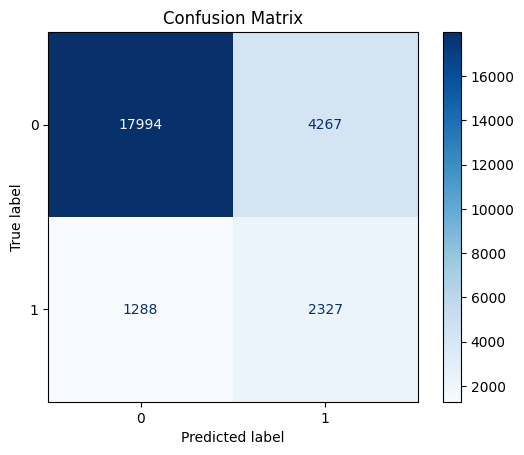

ROC AUC Score: 0.8187906170123176


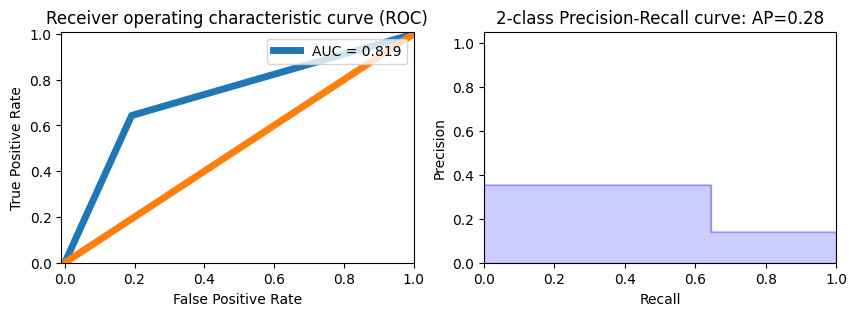


Results for Decision Tree:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9903    0.9539    0.9717    602666
           1     0.9555    0.9906    0.9728    602666

    accuracy                         0.9723   1205332
   macro avg     0.9729    0.9723    0.9722   1205332
weighted avg     0.9729    0.9723    0.9722   1205332

Training Set Confusion Matrix:
[[574875  27791]
 [  5648 597018]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9498    0.9001    0.9243     22261
           1     0.5347    0.7071    0.6089      3615

    accuracy                         0.8731     25876
   macro avg     0.7423    0.8036    0.7666     25876
weighted avg     0.8918    0.8731    0.8802     25876

Testing Set Confusion Matrix:


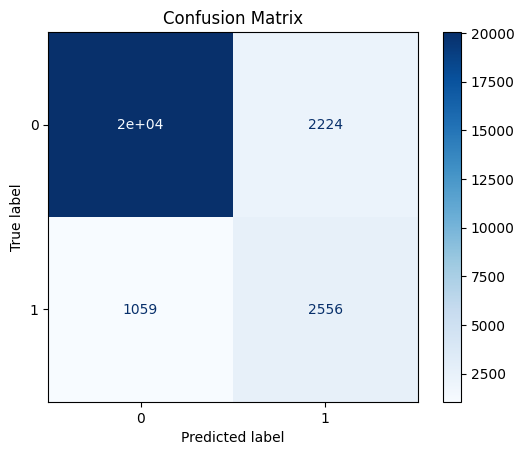

ROC AUC Score: 0.8183493413951162


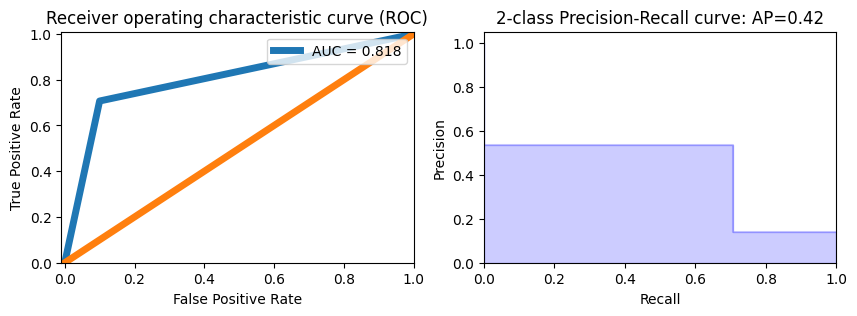


Results for XGBoost:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9142    0.9863    0.9488     78461
           1     0.9246    0.6452    0.7601     20482

    accuracy                         0.9157     98943
   macro avg     0.9194    0.8158    0.8545     98943
weighted avg     0.9163    0.9157    0.9098     98943

Training Set Confusion Matrix:
[[77383  1078]
 [ 7266 13216]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9273    0.8381    0.8805     22261
           1     0.3740    0.5956    0.4595      3615

    accuracy                         0.8043     25876
   macro avg     0.6507    0.7169    0.6700     25876
weighted avg     0.8500    0.8043    0.8217     25876

Testing Set Confusion Matrix:


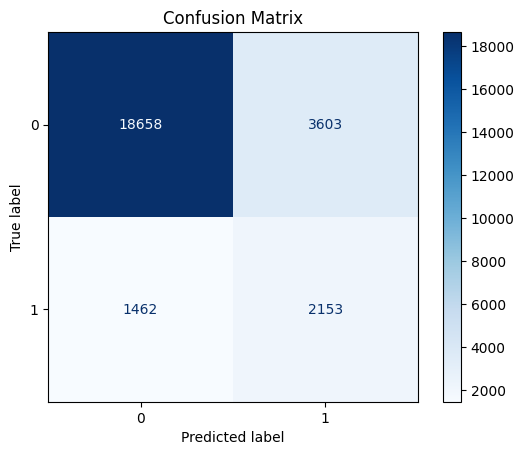

ROC AUC Score: 0.8189215296486057


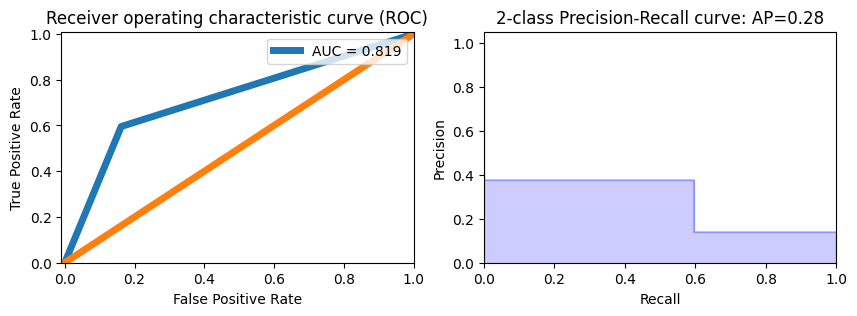


Results for LGBM:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9133    0.9680    0.9398     78461
           1     0.8408    0.6479    0.7319     20482

    accuracy                         0.9017     98943
   macro avg     0.8771    0.8079    0.8358     98943
weighted avg     0.8983    0.9017    0.8968     98943

Training Set Confusion Matrix:
[[75949  2512]
 [ 7212 13270]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9329    0.8200    0.8728     22261
           1     0.3649    0.6368    0.4640      3615

    accuracy                         0.7944     25876
   macro avg     0.6489    0.7284    0.6684     25876
weighted avg     0.8536    0.7944    0.8157     25876

Testing Set Confusion Matrix:


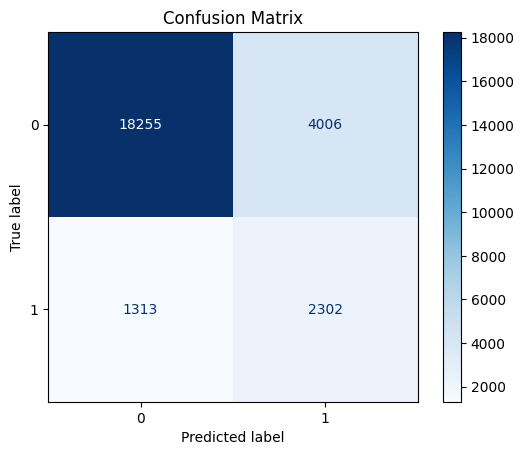

ROC AUC Score: 0.8213819167710023


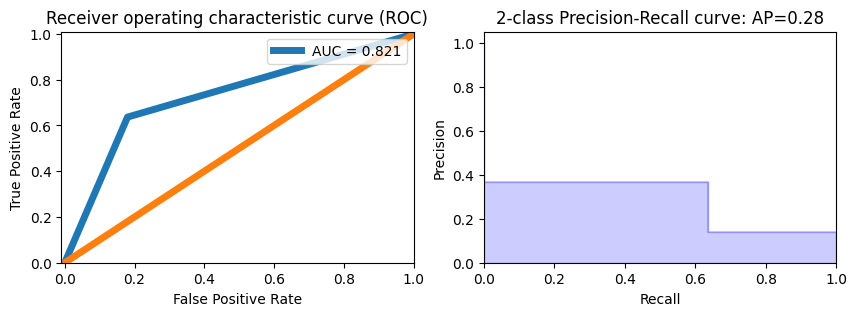


Results for AdaBoost:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9151    0.9558    0.9350     78461
           1     0.7958    0.6604    0.7218     20482

    accuracy                         0.8946     98943
   macro avg     0.8555    0.8081    0.8284     98943
weighted avg     0.8904    0.8946    0.8909     98943

Training Set Confusion Matrix:
[[74991  3470]
 [ 6955 13527]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9349    0.8080    0.8668     22261
           1     0.3560    0.6537    0.4609      3615

    accuracy                         0.7864     25876
   macro avg     0.6455    0.7308    0.6639     25876
weighted avg     0.8540    0.7864    0.8101     25876

Testing Set Confusion Matrix:


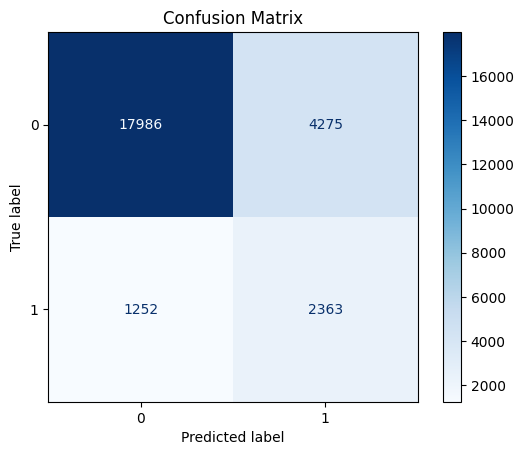

ROC AUC Score: 0.8192632694123029


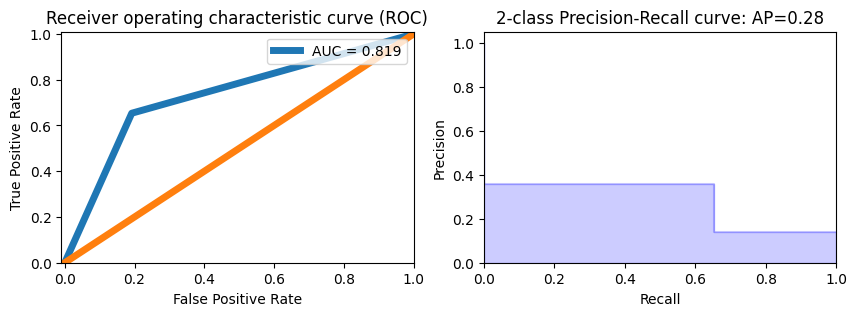


Results for CatBoost:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9153    0.9592    0.9367     78461
           1     0.8086    0.6598    0.7267     20482

    accuracy                         0.8973     98943
   macro avg     0.8619    0.8095    0.8317     98943
weighted avg     0.8932    0.8973    0.8933     98943

Training Set Confusion Matrix:
[[75262  3199]
 [ 6967 13515]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9341    0.8087    0.8669     22261
           1     0.3552    0.6490    0.4591      3615

    accuracy                         0.7864     25876
   macro avg     0.6447    0.7288    0.6630     25876
weighted avg     0.8533    0.7864    0.8099     25876

Testing Set Confusion Matrix:


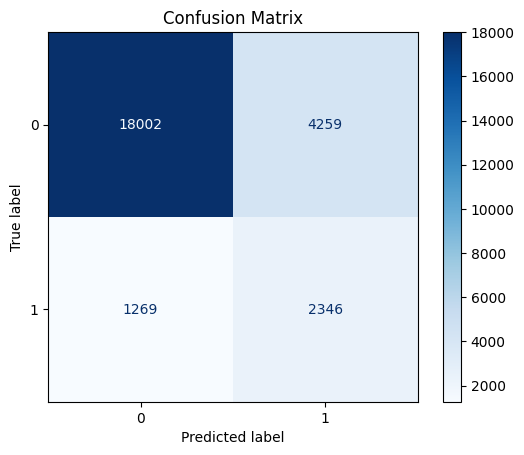

ROC AUC Score: 0.8208268148843753


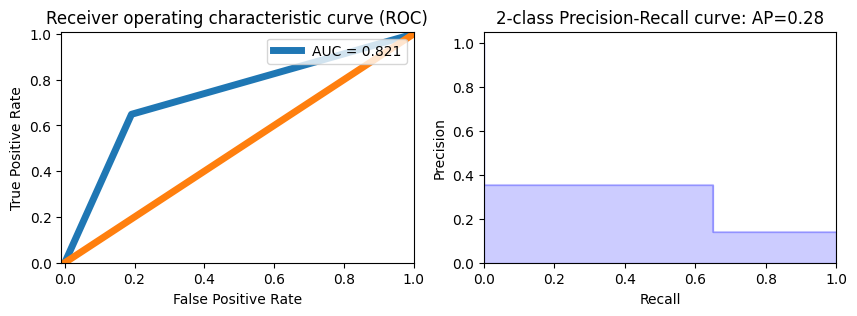


Results for MLP:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9144    0.9577    0.9356     78461
           1     0.8022    0.6565    0.7220     20482

    accuracy                         0.8954     98943
   macro avg     0.8583    0.8071    0.8288     98943
weighted avg     0.8912    0.8954    0.8914     98943

Training Set Confusion Matrix:
[[75145  3316]
 [ 7036 13446]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9345    0.8068    0.8660     22261
           1     0.3540    0.6517    0.4588      3615

    accuracy                         0.7852     25876
   macro avg     0.6442    0.7293    0.6624     25876
weighted avg     0.8534    0.7852    0.8091     25876

Testing Set Confusion Matrix:


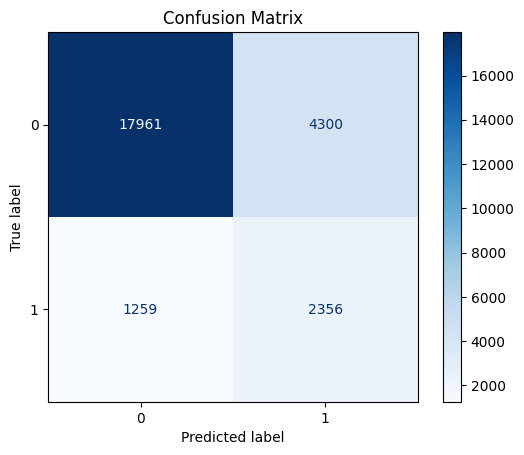

ROC AUC Score: 0.8203842469165166


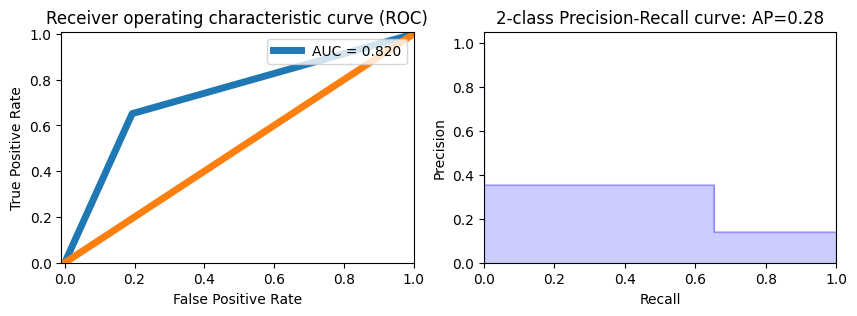

In [56]:
trained_models_grid = {
    'Logistic Regression': cls_best_logistic_regression,
    'Decision Tree': cls_best_decision_tree,
    # 'Random Forest': cls_random_forest,
    # 'Extra Trees': cls_extra_trees,
    'XGBoost': cls_best_xgboost,
    'LGBM': cls_best_lgbm,
    'AdaBoost': cls_best_adaboost,
    'CatBoost': cls_best_catboost,
    'MLP': cls_best_mlp,
}

# Prepare the dict to store results
y_train_pred_dict = {}
y_validation_pred_dict = {}  
evaluation_results_dict = {}
y_train_pred_probs_dict = {}
y_validation_pred_probs_dict = {}

for model_name, model in trained_models_grid.items(): 
    print(f"\n\033[1;34mResults for {model_name}:\033[0m")
    
    # Predict labels and calculate accuracy and F1-score
    (
        y_train_pred_dict[model_name],
        y_validation_pred_dict[model_name],  
        evaluation_results_dict[model_name],
        y_train_pred_probs_dict[model_name],
        y_validation_pred_probs_dict[model_name],
    ) = eval_model(
        model, 
        X_train_final_dict[model_name], 
        X_validation_final_dict[model_name], 
        y_train_final_dict[model_name], 
        y_validation_final_dict[model_name])
    
    # Generate classification report and calculate confusion matrix
    report_model(
        y_train_final_dict[model_name],
        y_validation_final_dict[model_name],
        y_train_pred_dict[model_name],
        y_validation_pred_dict[model_name],
        y_train_pred_probs_dict[model_name],
        y_validation_pred_probs_dict[model_name],
        print_report=True)


In [ ]:
# # Train Logistic Regression Model
# model_name = 'Logistic Regression'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_logistic_regression = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_logistic_regression)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")

# # Train Decision Tree Model
# model_name = 'Decision Tree'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_decision_tree = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_decision_tree)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")

# # Train Random Forest Model
# model_name = 'Random Forest'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_random_forest = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_random_forest)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")

# # Train Extra Trees Model
# model_name = 'Extra Trees'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_extra_trees = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_extra_trees)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")

# # Train XGBoost Model
# model_name = 'XGBoost'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_xgboost = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_xgboost)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")

# # Train LGBM Model
# model_name = 'LGBM'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_lgbm = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_lgbm)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")

# # Train AdaBoost Model
# model_name = 'AdaBoost'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_adaboost = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_adaboost)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")

# # Train CatBoost Model
# model_name = 'CatBoost'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_catboost = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_catboost)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")

# # Train MLP Model
# model_name = 'MLP'
# print(f"\n\033[1;34m{model_name}:\033[0m")
# start_time = time()

# cls_mlp = train_model(model_name, X_train_final_dict[model_name], y_train_final_dict[model_name], seed, **best_param_grid_mlp)  # train the model

# end_time = time()
# print(f"This code took {end_time - start_time:.2f} sec")


# 6.) Optimization of the Decision Boundary

In [ ]:
# # Function to plot the histogram of predicted probabilities
# def plot_predicted_probabilities(predicted_probabilities, title='Distribution of Predicted Probabilities', xlabel='Predicted Probability'):
#     plt.figure(figsize=(10, 6))
#     sns.histplot(predicted_probabilities, bins=100, kde=True, color='blue', stat='density', alpha=0.6)
#     plt.title(title, fontsize=16)
#     plt.xlabel(xlabel, fontsize=14)
#     plt.ylabel('Density', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# # Function to calculate and plot ROC and PR curves
# def plot_metrics(y_true, predicted_probabilities):
#     false_positive_rate, true_positive_rate, _ = roc_curve(y_true, predicted_probabilities)
#     roc_auc = roc_auc_score(y_true, predicted_probabilities)
#     precision, recall, _ = precision_recall_curve(y_true, predicted_probabilities)
#     average_precision = average_precision_score(y_true, predicted_probabilities)

#     plt.figure(figsize=(12, 5))

#     # ROC curve
#     plt.subplot(1, 2, 1)
#     plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {roc_auc:.3f}', linewidth=2)
#     plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1)
#     plt.title('ROC Curve', fontsize=14)
#     plt.xlabel('False Positive Rate', fontsize=12)
#     plt.ylabel('True Positive Rate', fontsize=12)
#     plt.legend(fontsize=12)

#     # Precision-Recall curve
#     plt.subplot(1, 2, 2)
#     plt.step(recall, precision, where='post', color='b', alpha=0.8)
#     plt.fill_between(recall, precision, step='post', alpha=0.3, color='blue')
#     plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})', fontsize=14)
#     plt.xlabel('Recall', fontsize=12)
#     plt.ylabel('Precision', fontsize=12)

#     plt.tight_layout()
#     plt.show()

# # Function to print metrics
# def evaluate_model_metrics(y_true, predicted_probabilities, threshold=0.5):
#     predicted_labels = (predicted_probabilities > threshold).astype(int)
#     print('Classification Report:\n', classification_report(y_true, predicted_labels))
#     print('Confusion Matrix:\n', confusion_matrix(y_true, predicted_labels))
#     return predicted_labels

# # Main function to handle end-to-end evaluation
# def evaluate_and_plot(model, X, y, threshold=0.5, dataset_name='Validation'):
#     print(f'--- {dataset_name} Set Metrics ---')
#     predicted_probabilities = model.predict_proba(X)[:, 1]

#     # Plot predicted probabilities
#     plot_predicted_probabilities(predicted_probabilities, 
#                                   title=f'{dataset_name} Set: Distribution of Predicted Probabilities', 
#                                   xlabel=f'Predicted Probability of {dataset_name}')
    
#     # Plot ROC and PR curves
#     plot_metrics(y, predicted_probabilities)

#     # Evaluate and return predicted labels
#     return evaluate_model(y, predicted_probabilities, threshold=threshold)

# # Example usage for validation and test datasets
# df_y_validation_pred = evaluate_and_plot(model, df_x_validation_final, df_y_validation_final, threshold=0.45, dataset_name='Validation')
# df_y_test_pred = evaluate_and_plot(model, df_x_test_final, df_y_test_final['Diabetes_binary'], threshold=0.45, dataset_name='Test')


In [62]:
def optimize_threshold_for_f1(y_true, predicted_probabilities):
    """
    Optimize the threshold for maximum F1 score.
    
    Parameters:
        y_true (pd.DataFrame): True labels set.
        predicted_probabilities (pd.DataFrame): Predicted probabilities from the model.
    
    Returns:
        best_threshold (float): Optimal threshold for maximum F1 score.
        best_f1float (float): Maximum F1 score.
    """
    thresholds = np.linspace(0, 1, 101)  # Generate thresholds from 0 to 1
    best_threshold = 0.5
    best_f1 = 0.0

    for threshold in thresholds:
        predicted_labels = (predicted_probabilities > threshold).astype(int)
        current_f1 = f1_score(y_true, predicted_labels)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold

    print(f"Optimal Threshold: {best_threshold:.3f}")
    print(f"Maximum F1 Score: {best_f1:.4f}")
    return best_threshold, best_f1

In [58]:
evaluation_results_dict 

{'Logistic Regression': {'Train Accuracy': 0.8927766491818522,
  'Test Accuracy': 0.7853223063842943,
  'Train F1 Score': 0.7153703753387171,
  'Test F1 Score': 0.4558722695660692},
 'Decision Tree': {'Train Accuracy': 0.9722574361254824,
  'Test Accuracy': 0.8731256763023652,
  'Train F1 Score': 0.9727578973095174,
  'Test F1 Score': 0.6089338892197736},
 'XGBoost': {'Train Accuracy': 0.9156686172846993,
  'Test Accuracy': 0.804258772607822,
  'Train F1 Score': 0.7600644122383253,
  'Test F1 Score': 0.4595027211610287},
 'LGBM': {'Train Accuracy': 0.9017211930101169,
  'Test Accuracy': 0.7944427268511361,
  'Train F1 Score': 0.7318552834767263,
  'Test F1 Score': 0.4639725889347979},
 'AdaBoost': {'Train Accuracy': 0.8946363057517965,
  'Test Accuracy': 0.786404390168496,
  'Train F1 Score': 0.7218442327703514,
  'Test F1 Score': 0.4609382619721057},
 'CatBoost': {'Train Accuracy': 0.8972539745105768,
  'Test Accuracy': 0.7863657443190601,
  'Train F1 Score': 0.726691042047532,
  'Tes

In [ ]:
y_train_pred_dict 
y_validation_pred_dict
evaluation_results_dict 
y_train_pred_probs_dict 
y_validation_pred_probs_dict

In [ ]:
X_train_final_dict[model_name], 
X_validation_final_dict[model_name], 
y_train_final_dict[model_name], 
y_validation_final_dict[model_name])

In [59]:
for model_name, y_train_pred_prob in y_train_pred_probs_dict.items():
    print(f"{model_name}")
    # print(y_train_pred_prob)
    y_true=y_train_final_dict[model_name]
    y_pred=y_train_pred_prob[:,1]
    # print(y_pred)
    optimize_threshold_for_f1(y_true, y_pred)

Logistic Regression
Optimal Threshold: 0.37
Maximum F1 Score: 0.728
Decision Tree
Optimal Threshold: 0.49
Maximum F1 Score: 0.973
XGBoost
Optimal Threshold: 0.29
Maximum F1 Score: 0.799
LGBM
Optimal Threshold: 0.36
Maximum F1 Score: 0.751
AdaBoost
Optimal Threshold: 0.50
Maximum F1 Score: 0.722
CatBoost
Optimal Threshold: 0.40
Maximum F1 Score: 0.736
MLP
Optimal Threshold: 0.39
Maximum F1 Score: 0.732


In [63]:
for model_name, y_validation_pred_prob in y_validation_pred_probs_dict.items():
    print(f"{model_name}")
    # print(y_train_pred_prob)
    y_true=y_validation_final_dict[model_name]
    y_pred=y_validation_pred_prob[:,1]
    # print(y_pred)
    optimize_threshold_for_f1(y_true, y_pred)

Logistic Regression
Optimal Threshold: 0.540
Maximum F1 Score: 0.4564
Decision Tree
Optimal Threshold: 0.740
Maximum F1 Score: 0.6104
XGBoost
Optimal Threshold: 0.500
Maximum F1 Score: 0.4595
LGBM
Optimal Threshold: 0.500
Maximum F1 Score: 0.4640
AdaBoost
Optimal Threshold: 0.500
Maximum F1 Score: 0.4609
CatBoost
Optimal Threshold: 0.510
Maximum F1 Score: 0.4600
MLP
Optimal Threshold: 0.510
Maximum F1 Score: 0.4598


## 5.2) Majority voting

In [64]:
def create_and_train_voting_ensemble(models,X_train, y_train, voting_type='hard', weights=None):
    """
    Create and train a VotingClassifier ensemble.
    
    Parameters:
        models (list of tuples): List of model tuples, each tuple is like ('model_name', model_instance).
        voting_type (str): Voting type, either 'hard' or 'soft'. Default is 'hard'.
        weights (list of floats, optional): Weights for models in soft voting.
        
    Returns:
        VotingClassifier: The trained ensemble model.
    """   
    # Create the VotingClassifier
    ensemble_model = VotingClassifier(estimators=models, voting=voting_type, weights=weights)
    ensemble_model.fit(X_train, y_train)
    
    return ensemble_model

In [ ]:
trained_models_grid = {
    'Logistic Regression': cls_best_logistic_regression,
    'Decision Tree': cls_best_decision_tree,
    # 'Random Forest': cls_random_forest,
    # 'Extra Trees': cls_extra_trees,
    # 'XGBoost': cls_best_xgboost,
    'LGBM': cls_best_lgbm,
    'AdaBoost': cls_best_adaboost,
    'CatBoost': cls_best_catboost,
    'MLP': cls_best_mlp,
}

In [90]:
model_name1='LGBM'
model1=cls_best_lgbm
model_name2='XGBoost'
model2=cls_best_xgboost
# model_name2='AdaBoost'
# model2=cls_best_adaboost
# model_name3='MLP'
# model3=cls_best_mlp
# model_name4='MLP'
# model4=cls_best_mlp


start_time=time.time()
estimators=[(model_name1, model1), (model_name2, model2)]#, (model_name3, model3)]#, (model_name4, model4)]
ensemble_model1 = VotingClassifier(estimators=estimators, voting='soft')
ensemble_model1.fit(X_train_final_dict["Decision Tree"], y_train_final_dict["Decision Tree"])
print(f"This code took: {time.time()-start_time}")

This code took: 513.1512970924377



Results for Ensemble LGBM, XGBoost and MLP:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9144    0.9577    0.9356     78461
           1     0.8022    0.6565    0.7220     20482

    accuracy                         0.8954     98943
   macro avg     0.8583    0.8071    0.8288     98943
weighted avg     0.8912    0.8954    0.8914     98943

Training Set Confusion Matrix:
[[75145  3316]
 [ 7036 13446]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9345    0.8068    0.8660     22261
           1     0.3540    0.6517    0.4588      3615

    accuracy                         0.7852     25876
   macro avg     0.6442    0.7293    0.6624     25876
weighted avg     0.8534    0.7852    0.8091     25876

Testing Set Confusion Matrix:


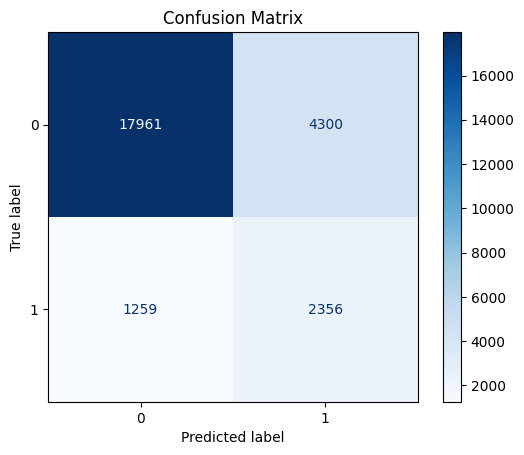

ROC AUC Score: 0.8203842469165166


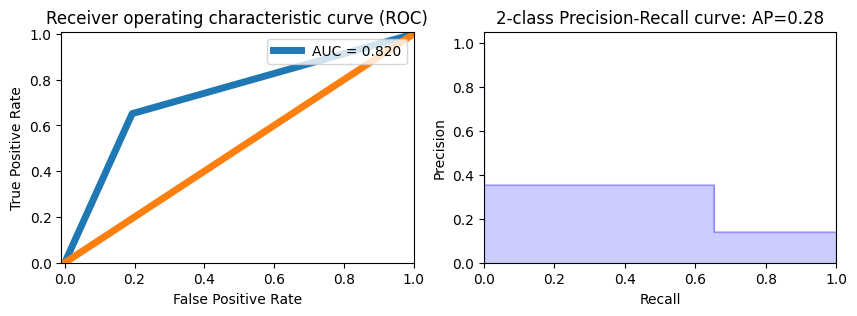

In [87]:
print(f"\n\033[1;34mResults for Ensemble {model_name1}, {model_name2} and {model_name3}:\033[0m")
    
# Predict labels and calculate accuracy and F1-score
(y_train_pred_ens,
y_validation_pred_ens,  
evaluation_results_ens,
y_train_pred_probs_ens,
y_validation_pred_probs_ens,
) = eval_model(model,X_train_final_dict[model_name1],X_validation_final_dict[model_name1],y_train_final_dict[model_name1], y_validation_final_dict[model_name1])

# Generate classification report and calculate confusion matrix
report_model(
y_train_final_dict[model_name1],
y_validation_final_dict[model_name1],
y_train_pred_ens,
y_validation_pred_ens,
y_train_pred_probs_ens,
y_validation_pred_probs_ens,
print_report=True)


In [88]:
y_validation_pred_probs_ens

array([[0.67275746, 0.32724254],
       [0.95611988, 0.04388012],
       [0.42367367, 0.57632633],
       ...,
       [0.8909949 , 0.1090051 ],
       [0.9960679 , 0.0039321 ],
       [0.96009716, 0.03990284]])

In [83]:
y_train_pred_probs_ens

array([[0.9815165 , 0.0184835 ],
       [0.95973585, 0.04026415],
       [0.95789136, 0.04210864],
       ...,
       [0.02684477, 0.97315523],
       [0.01232433, 0.98767567],
       [0.10361476, 0.89638524]])

In [89]:
# print(y_train_pred_prob)
y_true=y_validation_final_dict[model_name1]
y_pred=y_validation_pred_probs_ens[:,1]
# print(y_pred)
optimize_threshold_for_f1(y_true, y_pred)

Optimal Threshold: 0.510
Maximum F1 Score: 0.4598


(0.51, 0.45975201731942533)

In [ ]:
y_train_final_dict[model_name1],
y_validation_final_dict[model_name1],
y_train_pred_ens,
y_validation_pred_ens,
y_train_pred_probs_ens,
y_validation_pred_ens,
print_report=False)


Results for Ensemble LGBM, XGBoost and CatBoost:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9144    0.9577    0.9356     78461
           1     0.8022    0.6565    0.7220     20482

    accuracy                         0.8954     98943
   macro avg     0.8583    0.8071    0.8288     98943
weighted avg     0.8912    0.8954    0.8914     98943

Training Set Confusion Matrix:
[[75145  3316]
 [ 7036 13446]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9345    0.8068    0.8660     22261
           1     0.3540    0.6517    0.4588      3615

    accuracy                         0.7852     25876
   macro avg     0.6442    0.7293    0.6624     25876
weighted avg     0.8534    0.7852    0.8091     25876

Testing Set Confusion Matrix:


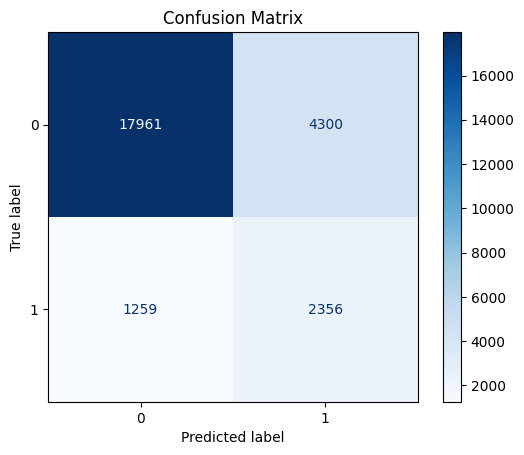

In [67]:
print(f"\n\033[1;34mResults for Ensemble {model_name1}, {model_name2} and {model_name3}:\033[0m")
    
# Predict labels and calculate accuracy and F1-score
(y_train_pred_ens,
y_validation_pred_ens,  
evaluation_results_ens,
y_train_pred_probs_ens,
y_validation_pred_probs_ens,
) = eval_model(model,X_train_final_dict[model_name1],X_validation_final_dict[model_name1],y_train_final_dict[model_name1], y_validation_final_dict[model_name1])

# Generate classification report and calculate confusion matrix
report_model(
y_train_final_dict[model_name1],
y_validation_final_dict[model_name1],
y_train_pred_ens,
y_validation_pred_ens,
y_train_pred_probs_ens,
y_validation_pred_ens,
print_report=False)



Results for MLP:

Training Set Classification Report:
              precision    recall  f1-score   support

           0     0.9143    0.9578    0.9355     78461
           1     0.8022    0.6563    0.7220     20482

    accuracy                         0.8954     98943
   macro avg     0.8583    0.8070    0.8287     98943
weighted avg     0.8911    0.8954    0.8913     98943

Training Set Confusion Matrix:
[[75147  3314]
 [ 7040 13442]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0     0.9347    0.8070    0.8662     22261
           1     0.3545    0.6528    0.4595      3615

    accuracy                         0.7854     25876
   macro avg     0.6446    0.7299    0.6628     25876
weighted avg     0.8536    0.7854    0.8093     25876

Testing Set Confusion Matrix:


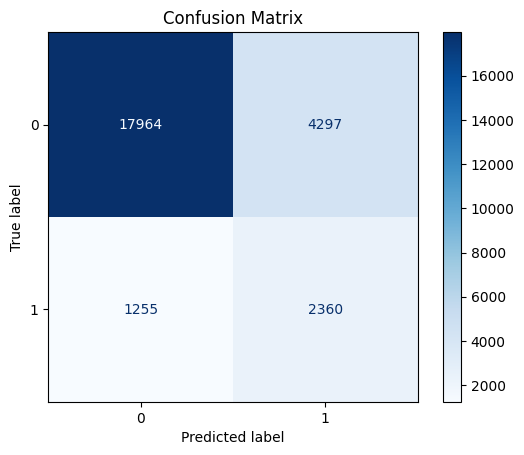

In [102]:
print(f"\n\033[1;34mResults for Ensemble {model_name}:\033[0m")
    
# Predict labels and calculate accuracy and F1-score
(y_train_pred_ens,
y_validation_pred_ens,  
evaluation_results_ens,
y_train_pred_probs_ens,
y_validation_pred_probs_ens,
) = eval_model(model,X_train_final_dict[model_name1],X_validation_final_dict[model_name1],y_train_final_dict[model_name1], y_validation_final_dict[model_name1])

# Generate classification report and calculate confusion matrix
report_model(
y_train_final_dict[model_name1],
y_validation_final_dict[model_name1],
y_train_pred_ens,
y_validation_pred_ens,
y_train_pred_probs_ens,
y_validation_pred_ens,
print_report=False)


In [ ]:
#Use the 3 models as an ensemble for majority voting 

# The models to be used 
model1 = grid_best_decision_tree # grid_best_decision_tree grid_best_logistic_regression
model2 = grid_best_lgbm
model3 = grid_best_xgboost

# Create a voting classifier (hard voting) and train the ensemble model
ensemble_hard_model = VotingClassifier(estimators=[('Decision Tree', model1), ('LGBM', model2), ('XGBoost', model3)], voting='hard')
ensemble_hard_model.fit(df_x_train_final, df_y_train_final)

# Create a voting classifier (soft voting) and train the ensemble model
ensemble_soft_model = VotingClassifier(estimators=[('Decision Tree', model1), ('LGBM', model2), ('XGBoost', model3)], voting='soft')
ensemble_soft_model.fit(df_x_train_final, df_y_train_final)

# Create a voting classifier (weighted soft voting) and train the ensemble model
ensemble_weighted_soft_model = VotingClassifier(estimators=[('Decision Tree', model1), ('LGBM', model2), ('XGBoost', model3)], voting='soft',weights=[0.2, 0.4, 0.4]) #weights=[0.2, 0.4, 0.4])
ensemble_weighted_soft_model.fit(df_x_train_final, df_y_train_final)


trained_models_grid = {
        # 'Logistic Regression':  grid_best_logistic_regression,     
        'Decision Tree': grid_best_decision_tree,        
        # 'Random Forest': cls_random_forest,
        # # 'SVM': cls_svm,
        # 'Extra Trees': cls_extra_trees,
        # 'Balanced Random Forest': cls_balanced_random_forest,
        'LGBM': grid_best_lgbm,
        'XGBoost': grid_best_xgboost,
        # 'Ensemble Hard Model': ensemble_hard_model,
        'Ensemble Soft Model': ensemble_soft_model,
        'Ensemble Weighted Soft Model': ensemble_weighted_soft_model,
    
    
        }

# predict labels and calculate accuracy and F1score
df_y_train_pred_dict_grid, df_y_validation_pred_dict_grid, evaluation_results_grid, y_train_pred_probs_dict_grid, y_validation_pred_probs_dict_grid = eval_model(trained_models_grid, df_x_train_final, df_x_validation_final, df_y_train_final, df_y_validation_final)

# classification report and calculate confusion matrix
report_model(df_y_train_final, df_y_validation_final, df_y_train_pred_dict_grid, df_y_validation_pred_dict_grid, y_train_pred_probs_dict_grid, y_validation_pred_probs_dict_grid)

# 7) Test the Final Models on Test Set

# 8) Use The Best Model to Predict the Competition Test Set

In [78]:
#Load the competition test set
df_x_test_competition=pd.read_csv("/kaggle/input/datasetkaggle/test.csv")

In [ ]:
# Pre-process, encode, and scale the test set based on the training set process
X_train_scaled_normalized, y_train_scaled_normalized, X_test_competition_scaled_normalized, y_test_competition_scaled_normalized =preprocess_and_transform_train_validation_sets(df_x_train_base, df_x_test_competition, df_y_train_base, None, scaler_to_use="StandardScaler", sampling_method="Oversampling_data", seed=seed)
df_x_test_competition_final=X_test_competition_scaled_normalized

In [ ]:
df_x_test_competition_final

In [ ]:
y_test_competition_pred = clf.predict(df_x_test_competition_final)
y_test_competition_pred

In [ ]:
df_x_test_competition['Diabetes_binary']=y_test_competition_pred
df_x_test_competition

In [ ]:
#Extract a dataframe with the IDs and the prediction
df_y_submission_competition=df_x_test_competition.loc[:, ['Unnamed: 0', 'Diabetes_binary']]

#Rename the index column to be inline with the submission requirements 
df_y_submission_competition.columns.values[0]='index'
#Save the results in a CSV file
df_y_submission_competition.to_csv('Submission.csv',index=False)

df_y_submission_competition